In [7]:
import torch
import numpy as np

from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

In [9]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 190),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(190, 1))
    def forward(self, x):
        output = self.regressor(x)
        return output

In [10]:
class SineApproximator2(nn.Module):
    def __init__(self):
        super(SineApproximator2, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 5),
                                       nn.ReLU(inplace=True),
                                        nn.Linear(5, 10),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                    nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(10, 5),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(5, 1))
        
    def forward(self, x):
        output = self.regressor(x)
        return output

In [11]:
class SineApproximator3(nn.Module):
    def __init__(self):
        super(SineApproximator3, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 10),
                                       nn.ReLU(inplace=True),
                                        nn.Linear(10, 18),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(18, 15),
                                       nn.ReLU(inplace=True),
                                    nn.Linear(15, 4),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(4, 1))
        
    def forward(self, x):
        output = self.regressor(x)
        return output

(2500,)


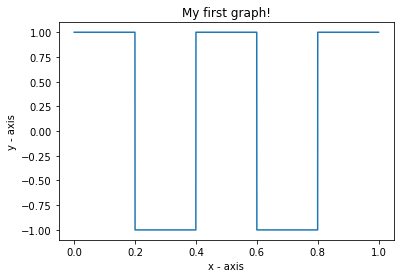

In [12]:
step = 0.1
X = np.linspace(1e-4, 1, 2500) 
y = np.sign(np.sin(5*np.pi*X))

import matplotlib.pyplot as plt
plt.plot(X, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()



In [13]:
LR = 1e-4
MAX_EPOCH = 20000
BATCH_SIZE = 512

X_train, X_val, y_train, y_val = map(torch.tensor, train_test_split(X, y, test_size=0.2))
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=BATCH_SIZE,
                              pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=BATCH_SIZE,
                            pin_memory=True, shuffle=True)

In [14]:
def returnLossPredictedOp(model, train_dataloader, val_dataloader):
    optimizer = optim.Adam(model.parameters(), lr=LR)
    criterion = nn.MSELoss()
    
    # training loop
    train_loss_list = list()
    val_loss_list = list()
    actual_x=[]
    predicted_y=[]
    org_y=[]
    for epoch in range(MAX_EPOCH):
        print("epoch %d / %d" % (epoch+1, MAX_EPOCH))
        model.train()
        actual_x=[]
        predicted_y=[]
        org_y=[]
        # training loop
        temp_loss_list = list()
        for X_train, y_train in train_dataloader:
            X_train = X_train.type(torch.float32).to(device)
            y_train = y_train.type(torch.float32).to(device)

            optimizer.zero_grad()

            score = model(X_train)

            actual_x.append(X_train.detach().cpu().numpy())
            predicted_y.append(score.detach().cpu().numpy())
            org_y.append(y_train.detach().cpu().numpy())

            loss = criterion(input=score, target=y_train)
            #loss.requires_grad = True
            loss.backward()

            optimizer.step()

            temp_loss_list.append(loss.detach().cpu().numpy())

        train_loss_list.append(np.average(temp_loss_list))

        # validation
        model.eval()

        temp_loss_list = list()

        for X_val, y_val in val_dataloader:
            X_val = X_val.type(torch.float32).to(device)
            y_val = y_val.type(torch.float32).to(device)

            score = model(X_val)        
            loss = criterion(input=score, target=y_val)

            temp_loss_list.append(loss.detach().cpu().numpy())

        val_loss_list.append(np.average(temp_loss_list))

        print("\ttrain loss: %.5f" % train_loss_list[-1])
        print("\tval loss: %.5f" % val_loss_list[-1])
    
    return actual_x, org_y, predicted_y, train_loss_list, val_loss_list

In [15]:
model1 = SineApproximator().to(device)
ac_x_1, ac_y_1, p_y_1, t_ls_1, v_ls_1 = returnLossPredictedOp(model1, train_dataloader, val_dataloader)

epoch 1 / 20000
	train loss: 1.12100
	val loss: 1.10472
epoch 2 / 20000
	train loss: 1.10484
	val loss: 1.08928
epoch 3 / 20000
	train loss: 1.08981
	val loss: 1.07481
epoch 4 / 20000
	train loss: 1.07540
	val loss: 1.06129
epoch 5 / 20000
	train loss: 1.06194
	val loss: 1.04890
epoch 6 / 20000
	train loss: 1.04977
	val loss: 1.03747
epoch 7 / 20000
	train loss: 1.03843
	val loss: 1.02706
epoch 8 / 20000
	train loss: 1.02820
	val loss: 1.01770
epoch 9 / 20000
	train loss: 1.01906
	val loss: 1.00912
epoch 10 / 20000
	train loss: 1.01091
	val loss: 1.00140
epoch 11 / 20000
	train loss: 1.00338
	val loss: 0.99451
epoch 12 / 20000
	train loss: 0.99621
	val loss: 0.98847
epoch 13 / 20000
	train loss: 0.99057
	val loss: 0.98307
epoch 14 / 20000
	train loss: 0.98546
	val loss: 0.97832
epoch 15 / 20000
	train loss: 0.98074
	val loss: 0.97423
epoch 16 / 20000
	train loss: 0.97670
	val loss: 0.97066
epoch 17 / 20000
	train loss: 0.97305
	val loss: 0.96763
epoch 18 / 20000
	train loss: 0.97074
	v

	train loss: 0.90385
	val loss: 0.90821
epoch 150 / 20000
	train loss: 0.90435
	val loss: 0.90780
epoch 151 / 20000
	train loss: 0.90330
	val loss: 0.90739
epoch 152 / 20000
	train loss: 0.90383
	val loss: 0.90697
epoch 153 / 20000
	train loss: 0.90322
	val loss: 0.90656
epoch 154 / 20000
	train loss: 0.90186
	val loss: 0.90613
epoch 155 / 20000
	train loss: 0.90205
	val loss: 0.90571
epoch 156 / 20000
	train loss: 0.90173
	val loss: 0.90529
epoch 157 / 20000
	train loss: 0.90143
	val loss: 0.90489
epoch 158 / 20000
	train loss: 0.90054
	val loss: 0.90446
epoch 159 / 20000
	train loss: 0.90011
	val loss: 0.90404
epoch 160 / 20000
	train loss: 0.89947
	val loss: 0.90362
epoch 161 / 20000
	train loss: 0.89967
	val loss: 0.90320
epoch 162 / 20000
	train loss: 0.89927
	val loss: 0.90279
epoch 163 / 20000
	train loss: 0.89834
	val loss: 0.90238
epoch 164 / 20000
	train loss: 0.89837
	val loss: 0.90197
epoch 165 / 20000
	train loss: 0.89780
	val loss: 0.90155
epoch 166 / 20000
	train loss: 0

	train loss: 0.83869
	val loss: 0.84210
epoch 307 / 20000
	train loss: 0.83809
	val loss: 0.84169
epoch 308 / 20000
	train loss: 0.83815
	val loss: 0.84128
epoch 309 / 20000
	train loss: 0.83793
	val loss: 0.84087
epoch 310 / 20000
	train loss: 0.83751
	val loss: 0.84047
epoch 311 / 20000
	train loss: 0.83744
	val loss: 0.84006
epoch 312 / 20000
	train loss: 0.83639
	val loss: 0.83967
epoch 313 / 20000
	train loss: 0.83603
	val loss: 0.83927
epoch 314 / 20000
	train loss: 0.83558
	val loss: 0.83887
epoch 315 / 20000
	train loss: 0.83552
	val loss: 0.83845
epoch 316 / 20000
	train loss: 0.83458
	val loss: 0.83806
epoch 317 / 20000
	train loss: 0.83465
	val loss: 0.83766
epoch 318 / 20000
	train loss: 0.83406
	val loss: 0.83726
epoch 319 / 20000
	train loss: 0.83373
	val loss: 0.83689
epoch 320 / 20000
	train loss: 0.83364
	val loss: 0.83649
epoch 321 / 20000
	train loss: 0.83280
	val loss: 0.83607
epoch 322 / 20000
	train loss: 0.83253
	val loss: 0.83567
epoch 323 / 20000
	train loss: 0

	train loss: 0.78144
	val loss: 0.78332
epoch 464 / 20000
	train loss: 0.78139
	val loss: 0.78295
epoch 465 / 20000
	train loss: 0.78059
	val loss: 0.78261
epoch 466 / 20000
	train loss: 0.78012
	val loss: 0.78227
epoch 467 / 20000
	train loss: 0.77998
	val loss: 0.78192
epoch 468 / 20000
	train loss: 0.77946
	val loss: 0.78159
epoch 469 / 20000
	train loss: 0.77932
	val loss: 0.78125
epoch 470 / 20000
	train loss: 0.77933
	val loss: 0.78089
epoch 471 / 20000
	train loss: 0.77894
	val loss: 0.78054
epoch 472 / 20000
	train loss: 0.77840
	val loss: 0.78020
epoch 473 / 20000
	train loss: 0.77770
	val loss: 0.77986
epoch 474 / 20000
	train loss: 0.77727
	val loss: 0.77953
epoch 475 / 20000
	train loss: 0.77663
	val loss: 0.77920
epoch 476 / 20000
	train loss: 0.77671
	val loss: 0.77886
epoch 477 / 20000
	train loss: 0.77678
	val loss: 0.77854
epoch 478 / 20000
	train loss: 0.77581
	val loss: 0.77818
epoch 479 / 20000
	train loss: 0.77558
	val loss: 0.77781
epoch 480 / 20000
	train loss: 0

	train loss: 0.73625
	val loss: 0.73680
epoch 613 / 20000
	train loss: 0.73651
	val loss: 0.73655
epoch 614 / 20000
	train loss: 0.73665
	val loss: 0.73630
epoch 615 / 20000
	train loss: 0.73619
	val loss: 0.73603
epoch 616 / 20000
	train loss: 0.73489
	val loss: 0.73581
epoch 617 / 20000
	train loss: 0.73506
	val loss: 0.73556
epoch 618 / 20000
	train loss: 0.73494
	val loss: 0.73529
epoch 619 / 20000
	train loss: 0.73543
	val loss: 0.73502
epoch 620 / 20000
	train loss: 0.73380
	val loss: 0.73476
epoch 621 / 20000
	train loss: 0.73417
	val loss: 0.73453
epoch 622 / 20000
	train loss: 0.73395
	val loss: 0.73425
epoch 623 / 20000
	train loss: 0.73403
	val loss: 0.73396
epoch 624 / 20000
	train loss: 0.73334
	val loss: 0.73367
epoch 625 / 20000
	train loss: 0.73360
	val loss: 0.73343
epoch 626 / 20000
	train loss: 0.73295
	val loss: 0.73318
epoch 627 / 20000
	train loss: 0.73268
	val loss: 0.73292
epoch 628 / 20000
	train loss: 0.73258
	val loss: 0.73268
epoch 629 / 20000
	train loss: 0

	train loss: 0.70313
	val loss: 0.70219
epoch 771 / 20000
	train loss: 0.70293
	val loss: 0.70206
epoch 772 / 20000
	train loss: 0.70258
	val loss: 0.70185
epoch 773 / 20000
	train loss: 0.70241
	val loss: 0.70166
epoch 774 / 20000
	train loss: 0.70190
	val loss: 0.70148
epoch 775 / 20000
	train loss: 0.70200
	val loss: 0.70131
epoch 776 / 20000
	train loss: 0.70155
	val loss: 0.70118
epoch 777 / 20000
	train loss: 0.70105
	val loss: 0.70097
epoch 778 / 20000
	train loss: 0.70072
	val loss: 0.70081
epoch 779 / 20000
	train loss: 0.70226
	val loss: 0.70064
epoch 780 / 20000
	train loss: 0.70130
	val loss: 0.70049
epoch 781 / 20000
	train loss: 0.70104
	val loss: 0.70023
epoch 782 / 20000
	train loss: 0.70014
	val loss: 0.70007
epoch 783 / 20000
	train loss: 0.70100
	val loss: 0.69987
epoch 784 / 20000
	train loss: 0.70001
	val loss: 0.69973
epoch 785 / 20000
	train loss: 0.70066
	val loss: 0.69960
epoch 786 / 20000
	train loss: 0.70056
	val loss: 0.69939
epoch 787 / 20000
	train loss: 0

	train loss: 0.68048
	val loss: 0.67977
epoch 921 / 20000
	train loss: 0.68123
	val loss: 0.67967
epoch 922 / 20000
	train loss: 0.68061
	val loss: 0.67956
epoch 923 / 20000
	train loss: 0.68024
	val loss: 0.67945
epoch 924 / 20000
	train loss: 0.67999
	val loss: 0.67932
epoch 925 / 20000
	train loss: 0.67947
	val loss: 0.67919
epoch 926 / 20000
	train loss: 0.68025
	val loss: 0.67912
epoch 927 / 20000
	train loss: 0.68111
	val loss: 0.67907
epoch 928 / 20000
	train loss: 0.68060
	val loss: 0.67896
epoch 929 / 20000
	train loss: 0.68033
	val loss: 0.67880
epoch 930 / 20000
	train loss: 0.68093
	val loss: 0.67860
epoch 931 / 20000
	train loss: 0.67961
	val loss: 0.67846
epoch 932 / 20000
	train loss: 0.67931
	val loss: 0.67835
epoch 933 / 20000
	train loss: 0.67971
	val loss: 0.67825
epoch 934 / 20000
	train loss: 0.67974
	val loss: 0.67811
epoch 935 / 20000
	train loss: 0.68002
	val loss: 0.67798
epoch 936 / 20000
	train loss: 0.67947
	val loss: 0.67785
epoch 937 / 20000
	train loss: 0

	train loss: 0.66661
	val loss: 0.66496
epoch 1076 / 20000
	train loss: 0.66655
	val loss: 0.66491
epoch 1077 / 20000
	train loss: 0.66654
	val loss: 0.66488
epoch 1078 / 20000
	train loss: 0.66640
	val loss: 0.66474
epoch 1079 / 20000
	train loss: 0.66576
	val loss: 0.66465
epoch 1080 / 20000
	train loss: 0.66680
	val loss: 0.66460
epoch 1081 / 20000
	train loss: 0.66592
	val loss: 0.66449
epoch 1082 / 20000
	train loss: 0.66576
	val loss: 0.66447
epoch 1083 / 20000
	train loss: 0.66541
	val loss: 0.66434
epoch 1084 / 20000
	train loss: 0.66562
	val loss: 0.66429
epoch 1085 / 20000
	train loss: 0.66616
	val loss: 0.66421
epoch 1086 / 20000
	train loss: 0.66512
	val loss: 0.66420
epoch 1087 / 20000
	train loss: 0.66554
	val loss: 0.66419
epoch 1088 / 20000
	train loss: 0.66536
	val loss: 0.66405
epoch 1089 / 20000
	train loss: 0.66524
	val loss: 0.66396
epoch 1090 / 20000
	train loss: 0.66519
	val loss: 0.66389
epoch 1091 / 20000
	train loss: 0.66494
	val loss: 0.66388
epoch 1092 / 200

	train loss: 0.65789
	val loss: 0.65686
epoch 1219 / 20000
	train loss: 0.65747
	val loss: 0.65688
epoch 1220 / 20000
	train loss: 0.65805
	val loss: 0.65685
epoch 1221 / 20000
	train loss: 0.65794
	val loss: 0.65685
epoch 1222 / 20000
	train loss: 0.65802
	val loss: 0.65684
epoch 1223 / 20000
	train loss: 0.65862
	val loss: 0.65680
epoch 1224 / 20000
	train loss: 0.65765
	val loss: 0.65669
epoch 1225 / 20000
	train loss: 0.65772
	val loss: 0.65657
epoch 1226 / 20000
	train loss: 0.65773
	val loss: 0.65655
epoch 1227 / 20000
	train loss: 0.65753
	val loss: 0.65654
epoch 1228 / 20000
	train loss: 0.65766
	val loss: 0.65646
epoch 1229 / 20000
	train loss: 0.65800
	val loss: 0.65643
epoch 1230 / 20000
	train loss: 0.65713
	val loss: 0.65649
epoch 1231 / 20000
	train loss: 0.65720
	val loss: 0.65643
epoch 1232 / 20000
	train loss: 0.65790
	val loss: 0.65645
epoch 1233 / 20000
	train loss: 0.65775
	val loss: 0.65643
epoch 1234 / 20000
	train loss: 0.65660
	val loss: 0.65642
epoch 1235 / 200

	train loss: 0.65250
	val loss: 0.65239
epoch 1371 / 20000
	train loss: 0.65262
	val loss: 0.65233
epoch 1372 / 20000
	train loss: 0.65286
	val loss: 0.65228
epoch 1373 / 20000
	train loss: 0.65390
	val loss: 0.65232
epoch 1374 / 20000
	train loss: 0.65275
	val loss: 0.65229
epoch 1375 / 20000
	train loss: 0.65318
	val loss: 0.65219
epoch 1376 / 20000
	train loss: 0.65241
	val loss: 0.65214
epoch 1377 / 20000
	train loss: 0.65266
	val loss: 0.65211
epoch 1378 / 20000
	train loss: 0.65199
	val loss: 0.65217
epoch 1379 / 20000
	train loss: 0.65220
	val loss: 0.65222
epoch 1380 / 20000
	train loss: 0.65198
	val loss: 0.65220
epoch 1381 / 20000
	train loss: 0.65329
	val loss: 0.65210
epoch 1382 / 20000
	train loss: 0.65236
	val loss: 0.65202
epoch 1383 / 20000
	train loss: 0.65184
	val loss: 0.65201
epoch 1384 / 20000
	train loss: 0.65240
	val loss: 0.65203
epoch 1385 / 20000
	train loss: 0.65306
	val loss: 0.65204
epoch 1386 / 20000
	train loss: 0.65301
	val loss: 0.65210
epoch 1387 / 200

	train loss: 0.64971
	val loss: 0.65064
epoch 1522 / 20000
	train loss: 0.65035
	val loss: 0.65057
epoch 1523 / 20000
	train loss: 0.64948
	val loss: 0.65059
epoch 1524 / 20000
	train loss: 0.65007
	val loss: 0.65059
epoch 1525 / 20000
	train loss: 0.64976
	val loss: 0.65051
epoch 1526 / 20000
	train loss: 0.64968
	val loss: 0.65050
epoch 1527 / 20000
	train loss: 0.65034
	val loss: 0.65044
epoch 1528 / 20000
	train loss: 0.65025
	val loss: 0.65043
epoch 1529 / 20000
	train loss: 0.64970
	val loss: 0.65042
epoch 1530 / 20000
	train loss: 0.64893
	val loss: 0.65039
epoch 1531 / 20000
	train loss: 0.64936
	val loss: 0.65043
epoch 1532 / 20000
	train loss: 0.65100
	val loss: 0.65048
epoch 1533 / 20000
	train loss: 0.65047
	val loss: 0.65042
epoch 1534 / 20000
	train loss: 0.64982
	val loss: 0.65041
epoch 1535 / 20000
	train loss: 0.65073
	val loss: 0.65045
epoch 1536 / 20000
	train loss: 0.64949
	val loss: 0.65046
epoch 1537 / 20000
	train loss: 0.65063
	val loss: 0.65047
epoch 1538 / 200

	train loss: 0.64899
	val loss: 0.64996
epoch 1672 / 20000
	train loss: 0.64926
	val loss: 0.64999
epoch 1673 / 20000
	train loss: 0.64805
	val loss: 0.65006
epoch 1674 / 20000
	train loss: 0.64885
	val loss: 0.65017
epoch 1675 / 20000
	train loss: 0.64880
	val loss: 0.65019
epoch 1676 / 20000
	train loss: 0.64817
	val loss: 0.65017
epoch 1677 / 20000
	train loss: 0.64872
	val loss: 0.65006
epoch 1678 / 20000
	train loss: 0.64863
	val loss: 0.65007
epoch 1679 / 20000
	train loss: 0.64885
	val loss: 0.65004
epoch 1680 / 20000
	train loss: 0.64851
	val loss: 0.65004
epoch 1681 / 20000
	train loss: 0.64849
	val loss: 0.65010
epoch 1682 / 20000
	train loss: 0.64814
	val loss: 0.65010
epoch 1683 / 20000
	train loss: 0.64864
	val loss: 0.65011
epoch 1684 / 20000
	train loss: 0.64861
	val loss: 0.65002
epoch 1685 / 20000
	train loss: 0.64919
	val loss: 0.65005
epoch 1686 / 20000
	train loss: 0.64857
	val loss: 0.65005
epoch 1687 / 20000
	train loss: 0.64860
	val loss: 0.65004
epoch 1688 / 200

	train loss: 0.64847
	val loss: 0.65027
epoch 1822 / 20000
	train loss: 0.64819
	val loss: 0.65023
epoch 1823 / 20000
	train loss: 0.64790
	val loss: 0.65025
epoch 1824 / 20000
	train loss: 0.64798
	val loss: 0.65024
epoch 1825 / 20000
	train loss: 0.64809
	val loss: 0.65029
epoch 1826 / 20000
	train loss: 0.64723
	val loss: 0.65024
epoch 1827 / 20000
	train loss: 0.64822
	val loss: 0.65029
epoch 1828 / 20000
	train loss: 0.64775
	val loss: 0.65020
epoch 1829 / 20000
	train loss: 0.64820
	val loss: 0.65021
epoch 1830 / 20000
	train loss: 0.64791
	val loss: 0.65023
epoch 1831 / 20000
	train loss: 0.64856
	val loss: 0.65028
epoch 1832 / 20000
	train loss: 0.64791
	val loss: 0.65029
epoch 1833 / 20000
	train loss: 0.64802
	val loss: 0.65026
epoch 1834 / 20000
	train loss: 0.64779
	val loss: 0.65024
epoch 1835 / 20000
	train loss: 0.64728
	val loss: 0.65024
epoch 1836 / 20000
	train loss: 0.64716
	val loss: 0.65024
epoch 1837 / 20000
	train loss: 0.64762
	val loss: 0.65020
epoch 1838 / 200

	train loss: 0.64729
	val loss: 0.65067
epoch 1979 / 20000
	train loss: 0.64770
	val loss: 0.65071
epoch 1980 / 20000
	train loss: 0.64825
	val loss: 0.65067
epoch 1981 / 20000
	train loss: 0.64754
	val loss: 0.65063
epoch 1982 / 20000
	train loss: 0.64849
	val loss: 0.65067
epoch 1983 / 20000
	train loss: 0.64767
	val loss: 0.65064
epoch 1984 / 20000
	train loss: 0.64791
	val loss: 0.65061
epoch 1985 / 20000
	train loss: 0.64744
	val loss: 0.65061
epoch 1986 / 20000
	train loss: 0.64725
	val loss: 0.65062
epoch 1987 / 20000
	train loss: 0.64762
	val loss: 0.65063
epoch 1988 / 20000
	train loss: 0.64816
	val loss: 0.65071
epoch 1989 / 20000
	train loss: 0.64767
	val loss: 0.65073
epoch 1990 / 20000
	train loss: 0.64786
	val loss: 0.65083
epoch 1991 / 20000
	train loss: 0.64758
	val loss: 0.65087
epoch 1992 / 20000
	train loss: 0.64733
	val loss: 0.65075
epoch 1993 / 20000
	train loss: 0.64788
	val loss: 0.65074
epoch 1994 / 20000
	train loss: 0.64868
	val loss: 0.65072
epoch 1995 / 200

	train loss: 0.64823
	val loss: 0.65120
epoch 2140 / 20000
	train loss: 0.64728
	val loss: 0.65115
epoch 2141 / 20000
	train loss: 0.64808
	val loss: 0.65118
epoch 2142 / 20000
	train loss: 0.64702
	val loss: 0.65112
epoch 2143 / 20000
	train loss: 0.64817
	val loss: 0.65120
epoch 2144 / 20000
	train loss: 0.64745
	val loss: 0.65123
epoch 2145 / 20000
	train loss: 0.64812
	val loss: 0.65126
epoch 2146 / 20000
	train loss: 0.64719
	val loss: 0.65122
epoch 2147 / 20000
	train loss: 0.64819
	val loss: 0.65116
epoch 2148 / 20000
	train loss: 0.64931
	val loss: 0.65109
epoch 2149 / 20000
	train loss: 0.64789
	val loss: 0.65115
epoch 2150 / 20000
	train loss: 0.64761
	val loss: 0.65115
epoch 2151 / 20000
	train loss: 0.64717
	val loss: 0.65119
epoch 2152 / 20000
	train loss: 0.64816
	val loss: 0.65120
epoch 2153 / 20000
	train loss: 0.64842
	val loss: 0.65128
epoch 2154 / 20000
	train loss: 0.64734
	val loss: 0.65124
epoch 2155 / 20000
	train loss: 0.64704
	val loss: 0.65123
epoch 2156 / 200

	train loss: 0.64753
	val loss: 0.65150
epoch 2290 / 20000
	train loss: 0.64752
	val loss: 0.65151
epoch 2291 / 20000
	train loss: 0.64769
	val loss: 0.65150
epoch 2292 / 20000
	train loss: 0.64768
	val loss: 0.65155
epoch 2293 / 20000
	train loss: 0.64756
	val loss: 0.65154
epoch 2294 / 20000
	train loss: 0.64749
	val loss: 0.65155
epoch 2295 / 20000
	train loss: 0.64788
	val loss: 0.65156
epoch 2296 / 20000
	train loss: 0.64765
	val loss: 0.65157
epoch 2297 / 20000
	train loss: 0.64704
	val loss: 0.65153
epoch 2298 / 20000
	train loss: 0.64861
	val loss: 0.65156
epoch 2299 / 20000
	train loss: 0.64755
	val loss: 0.65154
epoch 2300 / 20000
	train loss: 0.64777
	val loss: 0.65156
epoch 2301 / 20000
	train loss: 0.64707
	val loss: 0.65147
epoch 2302 / 20000
	train loss: 0.64768
	val loss: 0.65152
epoch 2303 / 20000
	train loss: 0.64793
	val loss: 0.65157
epoch 2304 / 20000
	train loss: 0.64773
	val loss: 0.65162
epoch 2305 / 20000
	train loss: 0.64689
	val loss: 0.65161
epoch 2306 / 200

	train loss: 0.64748
	val loss: 0.65182
epoch 2449 / 20000
	train loss: 0.64711
	val loss: 0.65183
epoch 2450 / 20000
	train loss: 0.64831
	val loss: 0.65188
epoch 2451 / 20000
	train loss: 0.64772
	val loss: 0.65187
epoch 2452 / 20000
	train loss: 0.64820
	val loss: 0.65186
epoch 2453 / 20000
	train loss: 0.64766
	val loss: 0.65183
epoch 2454 / 20000
	train loss: 0.64810
	val loss: 0.65188
epoch 2455 / 20000
	train loss: 0.64769
	val loss: 0.65186
epoch 2456 / 20000
	train loss: 0.64753
	val loss: 0.65183
epoch 2457 / 20000
	train loss: 0.64788
	val loss: 0.65181
epoch 2458 / 20000
	train loss: 0.64717
	val loss: 0.65178
epoch 2459 / 20000
	train loss: 0.64837
	val loss: 0.65181
epoch 2460 / 20000
	train loss: 0.64689
	val loss: 0.65189
epoch 2461 / 20000
	train loss: 0.64768
	val loss: 0.65193
epoch 2462 / 20000
	train loss: 0.64775
	val loss: 0.65188
epoch 2463 / 20000
	train loss: 0.64770
	val loss: 0.65192
epoch 2464 / 20000
	train loss: 0.64777
	val loss: 0.65189
epoch 2465 / 200

	train loss: 0.64750
	val loss: 0.65198
epoch 2605 / 20000
	train loss: 0.64735
	val loss: 0.65204
epoch 2606 / 20000
	train loss: 0.64732
	val loss: 0.65204
epoch 2607 / 20000
	train loss: 0.64723
	val loss: 0.65209
epoch 2608 / 20000
	train loss: 0.64712
	val loss: 0.65201
epoch 2609 / 20000
	train loss: 0.64786
	val loss: 0.65202
epoch 2610 / 20000
	train loss: 0.64779
	val loss: 0.65204
epoch 2611 / 20000
	train loss: 0.64783
	val loss: 0.65204
epoch 2612 / 20000
	train loss: 0.64776
	val loss: 0.65202
epoch 2613 / 20000
	train loss: 0.64724
	val loss: 0.65199
epoch 2614 / 20000
	train loss: 0.64713
	val loss: 0.65195
epoch 2615 / 20000
	train loss: 0.64834
	val loss: 0.65200
epoch 2616 / 20000
	train loss: 0.64763
	val loss: 0.65203
epoch 2617 / 20000
	train loss: 0.64789
	val loss: 0.65203
epoch 2618 / 20000
	train loss: 0.64725
	val loss: 0.65201
epoch 2619 / 20000
	train loss: 0.64776
	val loss: 0.65202
epoch 2620 / 20000
	train loss: 0.64709
	val loss: 0.65199
epoch 2621 / 200

	train loss: 0.64711
	val loss: 0.65213
epoch 2762 / 20000
	train loss: 0.64731
	val loss: 0.65203
epoch 2763 / 20000
	train loss: 0.64677
	val loss: 0.65197
epoch 2764 / 20000
	train loss: 0.64769
	val loss: 0.65202
epoch 2765 / 20000
	train loss: 0.64762
	val loss: 0.65206
epoch 2766 / 20000
	train loss: 0.64715
	val loss: 0.65212
epoch 2767 / 20000
	train loss: 0.64669
	val loss: 0.65210
epoch 2768 / 20000
	train loss: 0.64789
	val loss: 0.65219
epoch 2769 / 20000
	train loss: 0.64753
	val loss: 0.65213
epoch 2770 / 20000
	train loss: 0.64817
	val loss: 0.65219
epoch 2771 / 20000
	train loss: 0.64762
	val loss: 0.65212
epoch 2772 / 20000
	train loss: 0.64765
	val loss: 0.65208
epoch 2773 / 20000
	train loss: 0.64725
	val loss: 0.65202
epoch 2774 / 20000
	train loss: 0.64748
	val loss: 0.65202
epoch 2775 / 20000
	train loss: 0.64754
	val loss: 0.65205
epoch 2776 / 20000
	train loss: 0.64784
	val loss: 0.65209
epoch 2777 / 20000
	train loss: 0.64751
	val loss: 0.65215
epoch 2778 / 200

	train loss: 0.64705
	val loss: 0.65218
epoch 2913 / 20000
	train loss: 0.64745
	val loss: 0.65219
epoch 2914 / 20000
	train loss: 0.64688
	val loss: 0.65216
epoch 2915 / 20000
	train loss: 0.64705
	val loss: 0.65212
epoch 2916 / 20000
	train loss: 0.64818
	val loss: 0.65215
epoch 2917 / 20000
	train loss: 0.64837
	val loss: 0.65212
epoch 2918 / 20000
	train loss: 0.64824
	val loss: 0.65208
epoch 2919 / 20000
	train loss: 0.64828
	val loss: 0.65216
epoch 2920 / 20000
	train loss: 0.64798
	val loss: 0.65223
epoch 2921 / 20000
	train loss: 0.64779
	val loss: 0.65215
epoch 2922 / 20000
	train loss: 0.64810
	val loss: 0.65218
epoch 2923 / 20000
	train loss: 0.64717
	val loss: 0.65213
epoch 2924 / 20000
	train loss: 0.64780
	val loss: 0.65209
epoch 2925 / 20000
	train loss: 0.64862
	val loss: 0.65208
epoch 2926 / 20000
	train loss: 0.64651
	val loss: 0.65205
epoch 2927 / 20000
	train loss: 0.64839
	val loss: 0.65215
epoch 2928 / 20000
	train loss: 0.64722
	val loss: 0.65215
epoch 2929 / 200

	train loss: 0.64780
	val loss: 0.65229
epoch 3075 / 20000
	train loss: 0.64776
	val loss: 0.65224
epoch 3076 / 20000
	train loss: 0.64785
	val loss: 0.65210
epoch 3077 / 20000
	train loss: 0.64887
	val loss: 0.65213
epoch 3078 / 20000
	train loss: 0.64857
	val loss: 0.65221
epoch 3079 / 20000
	train loss: 0.64760
	val loss: 0.65222
epoch 3080 / 20000
	train loss: 0.64757
	val loss: 0.65220
epoch 3081 / 20000
	train loss: 0.64779
	val loss: 0.65227
epoch 3082 / 20000
	train loss: 0.64785
	val loss: 0.65232
epoch 3083 / 20000
	train loss: 0.64802
	val loss: 0.65219
epoch 3084 / 20000
	train loss: 0.64740
	val loss: 0.65215
epoch 3085 / 20000
	train loss: 0.64700
	val loss: 0.65213
epoch 3086 / 20000
	train loss: 0.64731
	val loss: 0.65214
epoch 3087 / 20000
	train loss: 0.64763
	val loss: 0.65218
epoch 3088 / 20000
	train loss: 0.64726
	val loss: 0.65217
epoch 3089 / 20000
	train loss: 0.64797
	val loss: 0.65213
epoch 3090 / 20000
	train loss: 0.64823
	val loss: 0.65217
epoch 3091 / 200

	train loss: 0.64803
	val loss: 0.65220
epoch 3235 / 20000
	train loss: 0.64682
	val loss: 0.65220
epoch 3236 / 20000
	train loss: 0.64796
	val loss: 0.65226
epoch 3237 / 20000
	train loss: 0.64748
	val loss: 0.65224
epoch 3238 / 20000
	train loss: 0.64711
	val loss: 0.65216
epoch 3239 / 20000
	train loss: 0.64786
	val loss: 0.65217
epoch 3240 / 20000
	train loss: 0.64764
	val loss: 0.65220
epoch 3241 / 20000
	train loss: 0.64742
	val loss: 0.65224
epoch 3242 / 20000
	train loss: 0.64837
	val loss: 0.65226
epoch 3243 / 20000
	train loss: 0.64780
	val loss: 0.65219
epoch 3244 / 20000
	train loss: 0.64693
	val loss: 0.65216
epoch 3245 / 20000
	train loss: 0.64678
	val loss: 0.65215
epoch 3246 / 20000
	train loss: 0.64775
	val loss: 0.65217
epoch 3247 / 20000
	train loss: 0.64733
	val loss: 0.65219
epoch 3248 / 20000
	train loss: 0.64803
	val loss: 0.65221
epoch 3249 / 20000
	train loss: 0.64650
	val loss: 0.65223
epoch 3250 / 20000
	train loss: 0.64718
	val loss: 0.65229
epoch 3251 / 200

	train loss: 0.64732
	val loss: 0.65221
epoch 3385 / 20000
	train loss: 0.64760
	val loss: 0.65221
epoch 3386 / 20000
	train loss: 0.64845
	val loss: 0.65221
epoch 3387 / 20000
	train loss: 0.64772
	val loss: 0.65216
epoch 3388 / 20000
	train loss: 0.64667
	val loss: 0.65215
epoch 3389 / 20000
	train loss: 0.64773
	val loss: 0.65215
epoch 3390 / 20000
	train loss: 0.64735
	val loss: 0.65217
epoch 3391 / 20000
	train loss: 0.64833
	val loss: 0.65223
epoch 3392 / 20000
	train loss: 0.64712
	val loss: 0.65227
epoch 3393 / 20000
	train loss: 0.64725
	val loss: 0.65223
epoch 3394 / 20000
	train loss: 0.64746
	val loss: 0.65221
epoch 3395 / 20000
	train loss: 0.64823
	val loss: 0.65221
epoch 3396 / 20000
	train loss: 0.64833
	val loss: 0.65218
epoch 3397 / 20000
	train loss: 0.64732
	val loss: 0.65217
epoch 3398 / 20000
	train loss: 0.64719
	val loss: 0.65221
epoch 3399 / 20000
	train loss: 0.64825
	val loss: 0.65225
epoch 3400 / 20000
	train loss: 0.64741
	val loss: 0.65222
epoch 3401 / 200

	train loss: 0.64771
	val loss: 0.65221
epoch 3545 / 20000
	train loss: 0.64823
	val loss: 0.65227
epoch 3546 / 20000
	train loss: 0.64703
	val loss: 0.65228
epoch 3547 / 20000
	train loss: 0.64779
	val loss: 0.65225
epoch 3548 / 20000
	train loss: 0.64781
	val loss: 0.65231
epoch 3549 / 20000
	train loss: 0.64765
	val loss: 0.65220
epoch 3550 / 20000
	train loss: 0.64693
	val loss: 0.65215
epoch 3551 / 20000
	train loss: 0.64812
	val loss: 0.65212
epoch 3552 / 20000
	train loss: 0.64806
	val loss: 0.65212
epoch 3553 / 20000
	train loss: 0.64751
	val loss: 0.65210
epoch 3554 / 20000
	train loss: 0.64749
	val loss: 0.65208
epoch 3555 / 20000
	train loss: 0.64767
	val loss: 0.65216
epoch 3556 / 20000
	train loss: 0.64743
	val loss: 0.65221
epoch 3557 / 20000
	train loss: 0.64765
	val loss: 0.65223
epoch 3558 / 20000
	train loss: 0.64715
	val loss: 0.65227
epoch 3559 / 20000
	train loss: 0.64686
	val loss: 0.65219
epoch 3560 / 20000
	train loss: 0.64845
	val loss: 0.65228
epoch 3561 / 200

	train loss: 0.64785
	val loss: 0.65235
epoch 3701 / 20000
	train loss: 0.64792
	val loss: 0.65219
epoch 3702 / 20000
	train loss: 0.64684
	val loss: 0.65216
epoch 3703 / 20000
	train loss: 0.64744
	val loss: 0.65219
epoch 3704 / 20000
	train loss: 0.64737
	val loss: 0.65216
epoch 3705 / 20000
	train loss: 0.64757
	val loss: 0.65217
epoch 3706 / 20000
	train loss: 0.64776
	val loss: 0.65221
epoch 3707 / 20000
	train loss: 0.64788
	val loss: 0.65221
epoch 3708 / 20000
	train loss: 0.64855
	val loss: 0.65222
epoch 3709 / 20000
	train loss: 0.64754
	val loss: 0.65223
epoch 3710 / 20000
	train loss: 0.64643
	val loss: 0.65223
epoch 3711 / 20000
	train loss: 0.64644
	val loss: 0.65222
epoch 3712 / 20000
	train loss: 0.64768
	val loss: 0.65226
epoch 3713 / 20000
	train loss: 0.64733
	val loss: 0.65227
epoch 3714 / 20000
	train loss: 0.64775
	val loss: 0.65228
epoch 3715 / 20000
	train loss: 0.64764
	val loss: 0.65224
epoch 3716 / 20000
	train loss: 0.64764
	val loss: 0.65222
epoch 3717 / 200

	train loss: 0.64751
	val loss: 0.65225
epoch 3860 / 20000
	train loss: 0.64745
	val loss: 0.65221
epoch 3861 / 20000
	train loss: 0.64724
	val loss: 0.65218
epoch 3862 / 20000
	train loss: 0.64819
	val loss: 0.65214
epoch 3863 / 20000
	train loss: 0.64741
	val loss: 0.65216
epoch 3864 / 20000
	train loss: 0.64802
	val loss: 0.65225
epoch 3865 / 20000
	train loss: 0.64733
	val loss: 0.65226
epoch 3866 / 20000
	train loss: 0.64736
	val loss: 0.65231
epoch 3867 / 20000
	train loss: 0.64772
	val loss: 0.65230
epoch 3868 / 20000
	train loss: 0.64772
	val loss: 0.65232
epoch 3869 / 20000
	train loss: 0.64685
	val loss: 0.65220
epoch 3870 / 20000
	train loss: 0.64761
	val loss: 0.65219
epoch 3871 / 20000
	train loss: 0.64804
	val loss: 0.65221
epoch 3872 / 20000
	train loss: 0.64715
	val loss: 0.65225
epoch 3873 / 20000
	train loss: 0.64834
	val loss: 0.65227
epoch 3874 / 20000
	train loss: 0.64774
	val loss: 0.65225
epoch 3875 / 20000
	train loss: 0.64801
	val loss: 0.65224
epoch 3876 / 200

	train loss: 0.64777
	val loss: 0.65226
epoch 4018 / 20000
	train loss: 0.64699
	val loss: 0.65230
epoch 4019 / 20000
	train loss: 0.64731
	val loss: 0.65217
epoch 4020 / 20000
	train loss: 0.64754
	val loss: 0.65217
epoch 4021 / 20000
	train loss: 0.64810
	val loss: 0.65222
epoch 4022 / 20000
	train loss: 0.64811
	val loss: 0.65228
epoch 4023 / 20000
	train loss: 0.64659
	val loss: 0.65221
epoch 4024 / 20000
	train loss: 0.64667
	val loss: 0.65222
epoch 4025 / 20000
	train loss: 0.64873
	val loss: 0.65227
epoch 4026 / 20000
	train loss: 0.64772
	val loss: 0.65227
epoch 4027 / 20000
	train loss: 0.64779
	val loss: 0.65223
epoch 4028 / 20000
	train loss: 0.64668
	val loss: 0.65214
epoch 4029 / 20000
	train loss: 0.64787
	val loss: 0.65213
epoch 4030 / 20000
	train loss: 0.64756
	val loss: 0.65217
epoch 4031 / 20000
	train loss: 0.64791
	val loss: 0.65218
epoch 4032 / 20000
	train loss: 0.64833
	val loss: 0.65226
epoch 4033 / 20000
	train loss: 0.64851
	val loss: 0.65226
epoch 4034 / 200

	train loss: 0.64689
	val loss: 0.65213
epoch 4176 / 20000
	train loss: 0.64698
	val loss: 0.65211
epoch 4177 / 20000
	train loss: 0.64814
	val loss: 0.65218
epoch 4178 / 20000
	train loss: 0.64713
	val loss: 0.65219
epoch 4179 / 20000
	train loss: 0.64853
	val loss: 0.65228
epoch 4180 / 20000
	train loss: 0.64815
	val loss: 0.65224
epoch 4181 / 20000
	train loss: 0.64760
	val loss: 0.65214
epoch 4182 / 20000
	train loss: 0.64768
	val loss: 0.65210
epoch 4183 / 20000
	train loss: 0.64685
	val loss: 0.65216
epoch 4184 / 20000
	train loss: 0.64675
	val loss: 0.65223
epoch 4185 / 20000
	train loss: 0.64801
	val loss: 0.65235
epoch 4186 / 20000
	train loss: 0.64763
	val loss: 0.65232
epoch 4187 / 20000
	train loss: 0.64705
	val loss: 0.65223
epoch 4188 / 20000
	train loss: 0.64781
	val loss: 0.65219
epoch 4189 / 20000
	train loss: 0.64731
	val loss: 0.65215
epoch 4190 / 20000
	train loss: 0.64698
	val loss: 0.65215
epoch 4191 / 20000
	train loss: 0.64756
	val loss: 0.65220
epoch 4192 / 200

	train loss: 0.64872
	val loss: 0.65226
epoch 4340 / 20000
	train loss: 0.64737
	val loss: 0.65231
epoch 4341 / 20000
	train loss: 0.64729
	val loss: 0.65221
epoch 4342 / 20000
	train loss: 0.64841
	val loss: 0.65221
epoch 4343 / 20000
	train loss: 0.64833
	val loss: 0.65229
epoch 4344 / 20000
	train loss: 0.64725
	val loss: 0.65220
epoch 4345 / 20000
	train loss: 0.64750
	val loss: 0.65219
epoch 4346 / 20000
	train loss: 0.64720
	val loss: 0.65218
epoch 4347 / 20000
	train loss: 0.64691
	val loss: 0.65221
epoch 4348 / 20000
	train loss: 0.64688
	val loss: 0.65227
epoch 4349 / 20000
	train loss: 0.64836
	val loss: 0.65227
epoch 4350 / 20000
	train loss: 0.64746
	val loss: 0.65227
epoch 4351 / 20000
	train loss: 0.64782
	val loss: 0.65225
epoch 4352 / 20000
	train loss: 0.64838
	val loss: 0.65228
epoch 4353 / 20000
	train loss: 0.64741
	val loss: 0.65218
epoch 4354 / 20000
	train loss: 0.64733
	val loss: 0.65218
epoch 4355 / 20000
	train loss: 0.64768
	val loss: 0.65221
epoch 4356 / 200

	train loss: 0.64789
	val loss: 0.65221
epoch 4492 / 20000
	train loss: 0.64738
	val loss: 0.65227
epoch 4493 / 20000
	train loss: 0.64785
	val loss: 0.65222
epoch 4494 / 20000
	train loss: 0.64675
	val loss: 0.65230
epoch 4495 / 20000
	train loss: 0.64699
	val loss: 0.65235
epoch 4496 / 20000
	train loss: 0.64703
	val loss: 0.65227
epoch 4497 / 20000
	train loss: 0.64702
	val loss: 0.65223
epoch 4498 / 20000
	train loss: 0.64833
	val loss: 0.65224
epoch 4499 / 20000
	train loss: 0.64788
	val loss: 0.65217
epoch 4500 / 20000
	train loss: 0.64861
	val loss: 0.65214
epoch 4501 / 20000
	train loss: 0.64768
	val loss: 0.65211
epoch 4502 / 20000
	train loss: 0.64759
	val loss: 0.65217
epoch 4503 / 20000
	train loss: 0.64709
	val loss: 0.65221
epoch 4504 / 20000
	train loss: 0.64799
	val loss: 0.65227
epoch 4505 / 20000
	train loss: 0.64772
	val loss: 0.65229
epoch 4506 / 20000
	train loss: 0.64729
	val loss: 0.65233
epoch 4507 / 20000
	train loss: 0.64739
	val loss: 0.65228
epoch 4508 / 200

	train loss: 0.64722
	val loss: 0.65226
epoch 4647 / 20000
	train loss: 0.64781
	val loss: 0.65224
epoch 4648 / 20000
	train loss: 0.64797
	val loss: 0.65228
epoch 4649 / 20000
	train loss: 0.64703
	val loss: 0.65222
epoch 4650 / 20000
	train loss: 0.64775
	val loss: 0.65221
epoch 4651 / 20000
	train loss: 0.64813
	val loss: 0.65221
epoch 4652 / 20000
	train loss: 0.64706
	val loss: 0.65221
epoch 4653 / 20000
	train loss: 0.64738
	val loss: 0.65225
epoch 4654 / 20000
	train loss: 0.64771
	val loss: 0.65227
epoch 4655 / 20000
	train loss: 0.64730
	val loss: 0.65219
epoch 4656 / 20000
	train loss: 0.64730
	val loss: 0.65223
epoch 4657 / 20000
	train loss: 0.64808
	val loss: 0.65225
epoch 4658 / 20000
	train loss: 0.64886
	val loss: 0.65234
epoch 4659 / 20000
	train loss: 0.64794
	val loss: 0.65234
epoch 4660 / 20000
	train loss: 0.64764
	val loss: 0.65219
epoch 4661 / 20000
	train loss: 0.64810
	val loss: 0.65219
epoch 4662 / 20000
	train loss: 0.64722
	val loss: 0.65221
epoch 4663 / 200

	train loss: 0.64776
	val loss: 0.65227
epoch 4805 / 20000
	train loss: 0.64794
	val loss: 0.65223
epoch 4806 / 20000
	train loss: 0.64714
	val loss: 0.65220
epoch 4807 / 20000
	train loss: 0.64763
	val loss: 0.65222
epoch 4808 / 20000
	train loss: 0.64696
	val loss: 0.65215
epoch 4809 / 20000
	train loss: 0.64748
	val loss: 0.65215
epoch 4810 / 20000
	train loss: 0.64821
	val loss: 0.65220
epoch 4811 / 20000
	train loss: 0.64777
	val loss: 0.65221
epoch 4812 / 20000
	train loss: 0.64736
	val loss: 0.65215
epoch 4813 / 20000
	train loss: 0.64851
	val loss: 0.65214
epoch 4814 / 20000
	train loss: 0.64731
	val loss: 0.65212
epoch 4815 / 20000
	train loss: 0.64706
	val loss: 0.65212
epoch 4816 / 20000
	train loss: 0.64748
	val loss: 0.65222
epoch 4817 / 20000
	train loss: 0.64704
	val loss: 0.65225
epoch 4818 / 20000
	train loss: 0.64741
	val loss: 0.65228
epoch 4819 / 20000
	train loss: 0.64708
	val loss: 0.65232
epoch 4820 / 20000
	train loss: 0.64810
	val loss: 0.65233
epoch 4821 / 200

	train loss: 0.64639
	val loss: 0.65222
epoch 4958 / 20000
	train loss: 0.64719
	val loss: 0.65220
epoch 4959 / 20000
	train loss: 0.64818
	val loss: 0.65225
epoch 4960 / 20000
	train loss: 0.64696
	val loss: 0.65227
epoch 4961 / 20000
	train loss: 0.64748
	val loss: 0.65227
epoch 4962 / 20000
	train loss: 0.64813
	val loss: 0.65228
epoch 4963 / 20000
	train loss: 0.64816
	val loss: 0.65220
epoch 4964 / 20000
	train loss: 0.64695
	val loss: 0.65212
epoch 4965 / 20000
	train loss: 0.64739
	val loss: 0.65214
epoch 4966 / 20000
	train loss: 0.64756
	val loss: 0.65222
epoch 4967 / 20000
	train loss: 0.64695
	val loss: 0.65230
epoch 4968 / 20000
	train loss: 0.64776
	val loss: 0.65234
epoch 4969 / 20000
	train loss: 0.64735
	val loss: 0.65232
epoch 4970 / 20000
	train loss: 0.64860
	val loss: 0.65224
epoch 4971 / 20000
	train loss: 0.64815
	val loss: 0.65219
epoch 4972 / 20000
	train loss: 0.64763
	val loss: 0.65211
epoch 4973 / 20000
	train loss: 0.64774
	val loss: 0.65209
epoch 4974 / 200

	train loss: 0.64724
	val loss: 0.65223
epoch 5117 / 20000
	train loss: 0.64748
	val loss: 0.65217
epoch 5118 / 20000
	train loss: 0.64717
	val loss: 0.65223
epoch 5119 / 20000
	train loss: 0.64860
	val loss: 0.65230
epoch 5120 / 20000
	train loss: 0.64836
	val loss: 0.65229
epoch 5121 / 20000
	train loss: 0.64783
	val loss: 0.65225
epoch 5122 / 20000
	train loss: 0.64691
	val loss: 0.65223
epoch 5123 / 20000
	train loss: 0.64804
	val loss: 0.65218
epoch 5124 / 20000
	train loss: 0.64753
	val loss: 0.65220
epoch 5125 / 20000
	train loss: 0.64732
	val loss: 0.65220
epoch 5126 / 20000
	train loss: 0.64739
	val loss: 0.65221
epoch 5127 / 20000
	train loss: 0.64674
	val loss: 0.65220
epoch 5128 / 20000
	train loss: 0.64758
	val loss: 0.65221
epoch 5129 / 20000
	train loss: 0.64766
	val loss: 0.65229
epoch 5130 / 20000
	train loss: 0.64798
	val loss: 0.65227
epoch 5131 / 20000
	train loss: 0.64728
	val loss: 0.65220
epoch 5132 / 20000
	train loss: 0.64768
	val loss: 0.65224
epoch 5133 / 200

	train loss: 0.64715
	val loss: 0.65226
epoch 5278 / 20000
	train loss: 0.64813
	val loss: 0.65231
epoch 5279 / 20000
	train loss: 0.64714
	val loss: 0.65228
epoch 5280 / 20000
	train loss: 0.64826
	val loss: 0.65228
epoch 5281 / 20000
	train loss: 0.64838
	val loss: 0.65226
epoch 5282 / 20000
	train loss: 0.64717
	val loss: 0.65222
epoch 5283 / 20000
	train loss: 0.64757
	val loss: 0.65220
epoch 5284 / 20000
	train loss: 0.64763
	val loss: 0.65216
epoch 5285 / 20000
	train loss: 0.64772
	val loss: 0.65219
epoch 5286 / 20000
	train loss: 0.64695
	val loss: 0.65217
epoch 5287 / 20000
	train loss: 0.64845
	val loss: 0.65217
epoch 5288 / 20000
	train loss: 0.64743
	val loss: 0.65218
epoch 5289 / 20000
	train loss: 0.64707
	val loss: 0.65221
epoch 5290 / 20000
	train loss: 0.64772
	val loss: 0.65228
epoch 5291 / 20000
	train loss: 0.64820
	val loss: 0.65228
epoch 5292 / 20000
	train loss: 0.64752
	val loss: 0.65223
epoch 5293 / 20000
	train loss: 0.64774
	val loss: 0.65226
epoch 5294 / 200

	train loss: 0.64831
	val loss: 0.65224
epoch 5431 / 20000
	train loss: 0.64757
	val loss: 0.65225
epoch 5432 / 20000
	train loss: 0.64679
	val loss: 0.65222
epoch 5433 / 20000
	train loss: 0.64731
	val loss: 0.65216
epoch 5434 / 20000
	train loss: 0.64811
	val loss: 0.65215
epoch 5435 / 20000
	train loss: 0.64807
	val loss: 0.65218
epoch 5436 / 20000
	train loss: 0.64709
	val loss: 0.65218
epoch 5437 / 20000
	train loss: 0.64714
	val loss: 0.65224
epoch 5438 / 20000
	train loss: 0.64728
	val loss: 0.65232
epoch 5439 / 20000
	train loss: 0.64735
	val loss: 0.65233
epoch 5440 / 20000
	train loss: 0.64813
	val loss: 0.65241
epoch 5441 / 20000
	train loss: 0.64757
	val loss: 0.65233
epoch 5442 / 20000
	train loss: 0.64736
	val loss: 0.65228
epoch 5443 / 20000
	train loss: 0.64688
	val loss: 0.65212
epoch 5444 / 20000
	train loss: 0.64839
	val loss: 0.65215
epoch 5445 / 20000
	train loss: 0.64688
	val loss: 0.65214
epoch 5446 / 20000
	train loss: 0.64713
	val loss: 0.65207
epoch 5447 / 200

	train loss: 0.64814
	val loss: 0.65219
epoch 5582 / 20000
	train loss: 0.64769
	val loss: 0.65220
epoch 5583 / 20000
	train loss: 0.64850
	val loss: 0.65214
epoch 5584 / 20000
	train loss: 0.64782
	val loss: 0.65216
epoch 5585 / 20000
	train loss: 0.64751
	val loss: 0.65215
epoch 5586 / 20000
	train loss: 0.64685
	val loss: 0.65216
epoch 5587 / 20000
	train loss: 0.64829
	val loss: 0.65221
epoch 5588 / 20000
	train loss: 0.64789
	val loss: 0.65227
epoch 5589 / 20000
	train loss: 0.64694
	val loss: 0.65227
epoch 5590 / 20000
	train loss: 0.64738
	val loss: 0.65225
epoch 5591 / 20000
	train loss: 0.64825
	val loss: 0.65221
epoch 5592 / 20000
	train loss: 0.64725
	val loss: 0.65217
epoch 5593 / 20000
	train loss: 0.64702
	val loss: 0.65224
epoch 5594 / 20000
	train loss: 0.64762
	val loss: 0.65221
epoch 5595 / 20000
	train loss: 0.64749
	val loss: 0.65217
epoch 5596 / 20000
	train loss: 0.64775
	val loss: 0.65216
epoch 5597 / 20000
	train loss: 0.64833
	val loss: 0.65221
epoch 5598 / 200

	train loss: 0.64745
	val loss: 0.65223
epoch 5742 / 20000
	train loss: 0.64707
	val loss: 0.65221
epoch 5743 / 20000
	train loss: 0.64742
	val loss: 0.65221
epoch 5744 / 20000
	train loss: 0.64762
	val loss: 0.65216
epoch 5745 / 20000
	train loss: 0.64741
	val loss: 0.65212
epoch 5746 / 20000
	train loss: 0.64799
	val loss: 0.65216
epoch 5747 / 20000
	train loss: 0.64688
	val loss: 0.65215
epoch 5748 / 20000
	train loss: 0.64723
	val loss: 0.65217
epoch 5749 / 20000
	train loss: 0.64816
	val loss: 0.65221
epoch 5750 / 20000
	train loss: 0.64772
	val loss: 0.65231
epoch 5751 / 20000
	train loss: 0.64785
	val loss: 0.65225
epoch 5752 / 20000
	train loss: 0.64727
	val loss: 0.65222
epoch 5753 / 20000
	train loss: 0.64800
	val loss: 0.65219
epoch 5754 / 20000
	train loss: 0.64746
	val loss: 0.65222
epoch 5755 / 20000
	train loss: 0.64779
	val loss: 0.65227
epoch 5756 / 20000
	train loss: 0.64701
	val loss: 0.65230
epoch 5757 / 20000
	train loss: 0.64745
	val loss: 0.65229
epoch 5758 / 200

	train loss: 0.64831
	val loss: 0.65215
epoch 5901 / 20000
	train loss: 0.64755
	val loss: 0.65217
epoch 5902 / 20000
	train loss: 0.64753
	val loss: 0.65218
epoch 5903 / 20000
	train loss: 0.64724
	val loss: 0.65220
epoch 5904 / 20000
	train loss: 0.64707
	val loss: 0.65222
epoch 5905 / 20000
	train loss: 0.64897
	val loss: 0.65216
epoch 5906 / 20000
	train loss: 0.64813
	val loss: 0.65227
epoch 5907 / 20000
	train loss: 0.64762
	val loss: 0.65221
epoch 5908 / 20000
	train loss: 0.64724
	val loss: 0.65216
epoch 5909 / 20000
	train loss: 0.64766
	val loss: 0.65221
epoch 5910 / 20000
	train loss: 0.64798
	val loss: 0.65230
epoch 5911 / 20000
	train loss: 0.64780
	val loss: 0.65230
epoch 5912 / 20000
	train loss: 0.64706
	val loss: 0.65222
epoch 5913 / 20000
	train loss: 0.64821
	val loss: 0.65221
epoch 5914 / 20000
	train loss: 0.64753
	val loss: 0.65222
epoch 5915 / 20000
	train loss: 0.64798
	val loss: 0.65221
epoch 5916 / 20000
	train loss: 0.64823
	val loss: 0.65225
epoch 5917 / 200

	train loss: 0.64721
	val loss: 0.65224
epoch 6062 / 20000
	train loss: 0.64709
	val loss: 0.65223
epoch 6063 / 20000
	train loss: 0.64787
	val loss: 0.65229
epoch 6064 / 20000
	train loss: 0.64708
	val loss: 0.65230
epoch 6065 / 20000
	train loss: 0.64814
	val loss: 0.65238
epoch 6066 / 20000
	train loss: 0.64764
	val loss: 0.65230
epoch 6067 / 20000
	train loss: 0.64685
	val loss: 0.65225
epoch 6068 / 20000
	train loss: 0.64707
	val loss: 0.65220
epoch 6069 / 20000
	train loss: 0.64757
	val loss: 0.65219
epoch 6070 / 20000
	train loss: 0.64803
	val loss: 0.65220
epoch 6071 / 20000
	train loss: 0.64688
	val loss: 0.65222
epoch 6072 / 20000
	train loss: 0.64825
	val loss: 0.65222
epoch 6073 / 20000
	train loss: 0.64787
	val loss: 0.65223
epoch 6074 / 20000
	train loss: 0.64690
	val loss: 0.65221
epoch 6075 / 20000
	train loss: 0.64774
	val loss: 0.65220
epoch 6076 / 20000
	train loss: 0.64804
	val loss: 0.65225
epoch 6077 / 20000
	train loss: 0.64761
	val loss: 0.65220
epoch 6078 / 200

	train loss: 0.64671
	val loss: 0.65216
epoch 6217 / 20000
	train loss: 0.64760
	val loss: 0.65216
epoch 6218 / 20000
	train loss: 0.64743
	val loss: 0.65218
epoch 6219 / 20000
	train loss: 0.64728
	val loss: 0.65222
epoch 6220 / 20000
	train loss: 0.64797
	val loss: 0.65230
epoch 6221 / 20000
	train loss: 0.64689
	val loss: 0.65226
epoch 6222 / 20000
	train loss: 0.64851
	val loss: 0.65226
epoch 6223 / 20000
	train loss: 0.64780
	val loss: 0.65219
epoch 6224 / 20000
	train loss: 0.64781
	val loss: 0.65220
epoch 6225 / 20000
	train loss: 0.64721
	val loss: 0.65216
epoch 6226 / 20000
	train loss: 0.64751
	val loss: 0.65215
epoch 6227 / 20000
	train loss: 0.64731
	val loss: 0.65219
epoch 6228 / 20000
	train loss: 0.64762
	val loss: 0.65224
epoch 6229 / 20000
	train loss: 0.64734
	val loss: 0.65229
epoch 6230 / 20000
	train loss: 0.64731
	val loss: 0.65226
epoch 6231 / 20000
	train loss: 0.64757
	val loss: 0.65227
epoch 6232 / 20000
	train loss: 0.64765
	val loss: 0.65222
epoch 6233 / 200

	train loss: 0.64730
	val loss: 0.65221
epoch 6368 / 20000
	train loss: 0.64756
	val loss: 0.65221
epoch 6369 / 20000
	train loss: 0.64760
	val loss: 0.65221
epoch 6370 / 20000
	train loss: 0.64775
	val loss: 0.65216
epoch 6371 / 20000
	train loss: 0.64712
	val loss: 0.65219
epoch 6372 / 20000
	train loss: 0.64724
	val loss: 0.65222
epoch 6373 / 20000
	train loss: 0.64728
	val loss: 0.65230
epoch 6374 / 20000
	train loss: 0.64807
	val loss: 0.65232
epoch 6375 / 20000
	train loss: 0.64822
	val loss: 0.65227
epoch 6376 / 20000
	train loss: 0.64760
	val loss: 0.65221
epoch 6377 / 20000
	train loss: 0.64754
	val loss: 0.65224
epoch 6378 / 20000
	train loss: 0.64770
	val loss: 0.65216
epoch 6379 / 20000
	train loss: 0.64847
	val loss: 0.65216
epoch 6380 / 20000
	train loss: 0.64813
	val loss: 0.65214
epoch 6381 / 20000
	train loss: 0.64764
	val loss: 0.65218
epoch 6382 / 20000
	train loss: 0.64745
	val loss: 0.65218
epoch 6383 / 20000
	train loss: 0.64763
	val loss: 0.65224
epoch 6384 / 200

	train loss: 0.64691
	val loss: 0.65230
epoch 6525 / 20000
	train loss: 0.64770
	val loss: 0.65233
epoch 6526 / 20000
	train loss: 0.64789
	val loss: 0.65232
epoch 6527 / 20000
	train loss: 0.64743
	val loss: 0.65231
epoch 6528 / 20000
	train loss: 0.64761
	val loss: 0.65220
epoch 6529 / 20000
	train loss: 0.64780
	val loss: 0.65221
epoch 6530 / 20000
	train loss: 0.64729
	val loss: 0.65220
epoch 6531 / 20000
	train loss: 0.64731
	val loss: 0.65221
epoch 6532 / 20000
	train loss: 0.64763
	val loss: 0.65218
epoch 6533 / 20000
	train loss: 0.64764
	val loss: 0.65220
epoch 6534 / 20000
	train loss: 0.64762
	val loss: 0.65219
epoch 6535 / 20000
	train loss: 0.64749
	val loss: 0.65222
epoch 6536 / 20000
	train loss: 0.64844
	val loss: 0.65219
epoch 6537 / 20000
	train loss: 0.64805
	val loss: 0.65223
epoch 6538 / 20000
	train loss: 0.64802
	val loss: 0.65224
epoch 6539 / 20000
	train loss: 0.64815
	val loss: 0.65221
epoch 6540 / 20000
	train loss: 0.64776
	val loss: 0.65223
epoch 6541 / 200

	train loss: 0.64740
	val loss: 0.65217
epoch 6677 / 20000
	train loss: 0.64847
	val loss: 0.65216
epoch 6678 / 20000
	train loss: 0.64736
	val loss: 0.65216
epoch 6679 / 20000
	train loss: 0.64795
	val loss: 0.65224
epoch 6680 / 20000
	train loss: 0.64790
	val loss: 0.65225
epoch 6681 / 20000
	train loss: 0.64708
	val loss: 0.65218
epoch 6682 / 20000
	train loss: 0.64880
	val loss: 0.65225
epoch 6683 / 20000
	train loss: 0.64708
	val loss: 0.65225
epoch 6684 / 20000
	train loss: 0.64735
	val loss: 0.65226
epoch 6685 / 20000
	train loss: 0.64766
	val loss: 0.65231
epoch 6686 / 20000
	train loss: 0.64760
	val loss: 0.65228
epoch 6687 / 20000
	train loss: 0.64851
	val loss: 0.65227
epoch 6688 / 20000
	train loss: 0.64816
	val loss: 0.65225
epoch 6689 / 20000
	train loss: 0.64681
	val loss: 0.65230
epoch 6690 / 20000
	train loss: 0.64754
	val loss: 0.65224
epoch 6691 / 20000
	train loss: 0.64719
	val loss: 0.65219
epoch 6692 / 20000
	train loss: 0.64734
	val loss: 0.65220
epoch 6693 / 200

	train loss: 0.64824
	val loss: 0.65213
epoch 6830 / 20000
	train loss: 0.64798
	val loss: 0.65214
epoch 6831 / 20000
	train loss: 0.64785
	val loss: 0.65213
epoch 6832 / 20000
	train loss: 0.64667
	val loss: 0.65212
epoch 6833 / 20000
	train loss: 0.64787
	val loss: 0.65218
epoch 6834 / 20000
	train loss: 0.64812
	val loss: 0.65222
epoch 6835 / 20000
	train loss: 0.64786
	val loss: 0.65222
epoch 6836 / 20000
	train loss: 0.64802
	val loss: 0.65223
epoch 6837 / 20000
	train loss: 0.64727
	val loss: 0.65222
epoch 6838 / 20000
	train loss: 0.64721
	val loss: 0.65218
epoch 6839 / 20000
	train loss: 0.64823
	val loss: 0.65218
epoch 6840 / 20000
	train loss: 0.64798
	val loss: 0.65224
epoch 6841 / 20000
	train loss: 0.64774
	val loss: 0.65221
epoch 6842 / 20000
	train loss: 0.64783
	val loss: 0.65220
epoch 6843 / 20000
	train loss: 0.64707
	val loss: 0.65218
epoch 6844 / 20000
	train loss: 0.64752
	val loss: 0.65221
epoch 6845 / 20000
	train loss: 0.64848
	val loss: 0.65225
epoch 6846 / 200

	train loss: 0.64793
	val loss: 0.65230
epoch 6977 / 20000
	train loss: 0.64681
	val loss: 0.65224
epoch 6978 / 20000
	train loss: 0.64727
	val loss: 0.65224
epoch 6979 / 20000
	train loss: 0.64783
	val loss: 0.65218
epoch 6980 / 20000
	train loss: 0.64869
	val loss: 0.65223
epoch 6981 / 20000
	train loss: 0.64813
	val loss: 0.65218
epoch 6982 / 20000
	train loss: 0.64781
	val loss: 0.65219
epoch 6983 / 20000
	train loss: 0.64717
	val loss: 0.65216
epoch 6984 / 20000
	train loss: 0.64780
	val loss: 0.65214
epoch 6985 / 20000
	train loss: 0.64704
	val loss: 0.65219
epoch 6986 / 20000
	train loss: 0.64775
	val loss: 0.65222
epoch 6987 / 20000
	train loss: 0.64732
	val loss: 0.65218
epoch 6988 / 20000
	train loss: 0.64733
	val loss: 0.65217
epoch 6989 / 20000
	train loss: 0.64798
	val loss: 0.65221
epoch 6990 / 20000
	train loss: 0.64776
	val loss: 0.65229
epoch 6991 / 20000
	train loss: 0.64830
	val loss: 0.65224
epoch 6992 / 20000
	train loss: 0.64775
	val loss: 0.65228
epoch 6993 / 200

	train loss: 0.64746
	val loss: 0.65230
epoch 7133 / 20000
	train loss: 0.64777
	val loss: 0.65235
epoch 7134 / 20000
	train loss: 0.64795
	val loss: 0.65236
epoch 7135 / 20000
	train loss: 0.64851
	val loss: 0.65233
epoch 7136 / 20000
	train loss: 0.64790
	val loss: 0.65220
epoch 7137 / 20000
	train loss: 0.64802
	val loss: 0.65215
epoch 7138 / 20000
	train loss: 0.64812
	val loss: 0.65213
epoch 7139 / 20000
	train loss: 0.64790
	val loss: 0.65210
epoch 7140 / 20000
	train loss: 0.64730
	val loss: 0.65212
epoch 7141 / 20000
	train loss: 0.64616
	val loss: 0.65221
epoch 7142 / 20000
	train loss: 0.64770
	val loss: 0.65222
epoch 7143 / 20000
	train loss: 0.64736
	val loss: 0.65223
epoch 7144 / 20000
	train loss: 0.64807
	val loss: 0.65226
epoch 7145 / 20000
	train loss: 0.64791
	val loss: 0.65225
epoch 7146 / 20000
	train loss: 0.64751
	val loss: 0.65229
epoch 7147 / 20000
	train loss: 0.64850
	val loss: 0.65231
epoch 7148 / 20000
	train loss: 0.64721
	val loss: 0.65229
epoch 7149 / 200

	train loss: 0.64749
	val loss: 0.65219
epoch 7288 / 20000
	train loss: 0.64769
	val loss: 0.65220
epoch 7289 / 20000
	train loss: 0.64707
	val loss: 0.65218
epoch 7290 / 20000
	train loss: 0.64780
	val loss: 0.65219
epoch 7291 / 20000
	train loss: 0.64827
	val loss: 0.65223
epoch 7292 / 20000
	train loss: 0.64744
	val loss: 0.65219
epoch 7293 / 20000
	train loss: 0.64825
	val loss: 0.65221
epoch 7294 / 20000
	train loss: 0.64783
	val loss: 0.65223
epoch 7295 / 20000
	train loss: 0.64701
	val loss: 0.65224
epoch 7296 / 20000
	train loss: 0.64643
	val loss: 0.65223
epoch 7297 / 20000
	train loss: 0.64743
	val loss: 0.65227
epoch 7298 / 20000
	train loss: 0.64773
	val loss: 0.65223
epoch 7299 / 20000
	train loss: 0.64691
	val loss: 0.65218
epoch 7300 / 20000
	train loss: 0.64746
	val loss: 0.65214
epoch 7301 / 20000
	train loss: 0.64771
	val loss: 0.65211
epoch 7302 / 20000
	train loss: 0.64808
	val loss: 0.65218
epoch 7303 / 20000
	train loss: 0.64774
	val loss: 0.65219
epoch 7304 / 200

	train loss: 0.64812
	val loss: 0.65222
epoch 7446 / 20000
	train loss: 0.64814
	val loss: 0.65222
epoch 7447 / 20000
	train loss: 0.64827
	val loss: 0.65217
epoch 7448 / 20000
	train loss: 0.64711
	val loss: 0.65214
epoch 7449 / 20000
	train loss: 0.64841
	val loss: 0.65214
epoch 7450 / 20000
	train loss: 0.64750
	val loss: 0.65210
epoch 7451 / 20000
	train loss: 0.64751
	val loss: 0.65218
epoch 7452 / 20000
	train loss: 0.64765
	val loss: 0.65225
epoch 7453 / 20000
	train loss: 0.64777
	val loss: 0.65228
epoch 7454 / 20000
	train loss: 0.64758
	val loss: 0.65225
epoch 7455 / 20000
	train loss: 0.64778
	val loss: 0.65225
epoch 7456 / 20000
	train loss: 0.64815
	val loss: 0.65230
epoch 7457 / 20000
	train loss: 0.64773
	val loss: 0.65225
epoch 7458 / 20000
	train loss: 0.64734
	val loss: 0.65224
epoch 7459 / 20000
	train loss: 0.64664
	val loss: 0.65220
epoch 7460 / 20000
	train loss: 0.64801
	val loss: 0.65220
epoch 7461 / 20000
	train loss: 0.64694
	val loss: 0.65228
epoch 7462 / 200

	train loss: 0.64738
	val loss: 0.65218
epoch 7599 / 20000
	train loss: 0.64806
	val loss: 0.65219
epoch 7600 / 20000
	train loss: 0.64744
	val loss: 0.65214
epoch 7601 / 20000
	train loss: 0.64790
	val loss: 0.65216
epoch 7602 / 20000
	train loss: 0.64699
	val loss: 0.65228
epoch 7603 / 20000
	train loss: 0.64822
	val loss: 0.65227
epoch 7604 / 20000
	train loss: 0.64750
	val loss: 0.65228
epoch 7605 / 20000
	train loss: 0.64755
	val loss: 0.65222
epoch 7606 / 20000
	train loss: 0.64745
	val loss: 0.65218
epoch 7607 / 20000
	train loss: 0.64755
	val loss: 0.65219
epoch 7608 / 20000
	train loss: 0.64715
	val loss: 0.65219
epoch 7609 / 20000
	train loss: 0.64756
	val loss: 0.65217
epoch 7610 / 20000
	train loss: 0.64771
	val loss: 0.65220
epoch 7611 / 20000
	train loss: 0.64739
	val loss: 0.65223
epoch 7612 / 20000
	train loss: 0.64672
	val loss: 0.65224
epoch 7613 / 20000
	train loss: 0.64810
	val loss: 0.65225
epoch 7614 / 20000
	train loss: 0.64716
	val loss: 0.65220
epoch 7615 / 200

	train loss: 0.64812
	val loss: 0.65216
epoch 7751 / 20000
	train loss: 0.64775
	val loss: 0.65213
epoch 7752 / 20000
	train loss: 0.64772
	val loss: 0.65217
epoch 7753 / 20000
	train loss: 0.64678
	val loss: 0.65215
epoch 7754 / 20000
	train loss: 0.64841
	val loss: 0.65220
epoch 7755 / 20000
	train loss: 0.64813
	val loss: 0.65218
epoch 7756 / 20000
	train loss: 0.64786
	val loss: 0.65213
epoch 7757 / 20000
	train loss: 0.64691
	val loss: 0.65216
epoch 7758 / 20000
	train loss: 0.64746
	val loss: 0.65223
epoch 7759 / 20000
	train loss: 0.64834
	val loss: 0.65221
epoch 7760 / 20000
	train loss: 0.64672
	val loss: 0.65219
epoch 7761 / 20000
	train loss: 0.64735
	val loss: 0.65224
epoch 7762 / 20000
	train loss: 0.64683
	val loss: 0.65221
epoch 7763 / 20000
	train loss: 0.64762
	val loss: 0.65220
epoch 7764 / 20000
	train loss: 0.64704
	val loss: 0.65226
epoch 7765 / 20000
	train loss: 0.64882
	val loss: 0.65223
epoch 7766 / 20000
	train loss: 0.64786
	val loss: 0.65222
epoch 7767 / 200

	train loss: 0.64752
	val loss: 0.65217
epoch 7910 / 20000
	train loss: 0.64729
	val loss: 0.65218
epoch 7911 / 20000
	train loss: 0.64812
	val loss: 0.65220
epoch 7912 / 20000
	train loss: 0.64800
	val loss: 0.65225
epoch 7913 / 20000
	train loss: 0.64763
	val loss: 0.65227
epoch 7914 / 20000
	train loss: 0.64745
	val loss: 0.65222
epoch 7915 / 20000
	train loss: 0.64691
	val loss: 0.65225
epoch 7916 / 20000
	train loss: 0.64733
	val loss: 0.65217
epoch 7917 / 20000
	train loss: 0.64831
	val loss: 0.65216
epoch 7918 / 20000
	train loss: 0.64742
	val loss: 0.65216
epoch 7919 / 20000
	train loss: 0.64742
	val loss: 0.65218
epoch 7920 / 20000
	train loss: 0.64724
	val loss: 0.65220
epoch 7921 / 20000
	train loss: 0.64766
	val loss: 0.65224
epoch 7922 / 20000
	train loss: 0.64800
	val loss: 0.65225
epoch 7923 / 20000
	train loss: 0.64791
	val loss: 0.65222
epoch 7924 / 20000
	train loss: 0.64734
	val loss: 0.65224
epoch 7925 / 20000
	train loss: 0.64745
	val loss: 0.65223
epoch 7926 / 200

	train loss: 0.64736
	val loss: 0.65224
epoch 8066 / 20000
	train loss: 0.64852
	val loss: 0.65225
epoch 8067 / 20000
	train loss: 0.64793
	val loss: 0.65224
epoch 8068 / 20000
	train loss: 0.64736
	val loss: 0.65219
epoch 8069 / 20000
	train loss: 0.64711
	val loss: 0.65221
epoch 8070 / 20000
	train loss: 0.64776
	val loss: 0.65225
epoch 8071 / 20000
	train loss: 0.64727
	val loss: 0.65221
epoch 8072 / 20000
	train loss: 0.64784
	val loss: 0.65223
epoch 8073 / 20000
	train loss: 0.64787
	val loss: 0.65221
epoch 8074 / 20000
	train loss: 0.64712
	val loss: 0.65221
epoch 8075 / 20000
	train loss: 0.64668
	val loss: 0.65222
epoch 8076 / 20000
	train loss: 0.64771
	val loss: 0.65227
epoch 8077 / 20000
	train loss: 0.64800
	val loss: 0.65223
epoch 8078 / 20000
	train loss: 0.64813
	val loss: 0.65219
epoch 8079 / 20000
	train loss: 0.64777
	val loss: 0.65222
epoch 8080 / 20000
	train loss: 0.64852
	val loss: 0.65223
epoch 8081 / 20000
	train loss: 0.64785
	val loss: 0.65216
epoch 8082 / 200

	train loss: 0.64733
	val loss: 0.65228
epoch 8217 / 20000
	train loss: 0.64881
	val loss: 0.65228
epoch 8218 / 20000
	train loss: 0.64769
	val loss: 0.65223
epoch 8219 / 20000
	train loss: 0.64698
	val loss: 0.65215
epoch 8220 / 20000
	train loss: 0.64759
	val loss: 0.65213
epoch 8221 / 20000
	train loss: 0.64797
	val loss: 0.65216
epoch 8222 / 20000
	train loss: 0.64675
	val loss: 0.65215
epoch 8223 / 20000
	train loss: 0.64792
	val loss: 0.65222
epoch 8224 / 20000
	train loss: 0.64686
	val loss: 0.65228
epoch 8225 / 20000
	train loss: 0.64785
	val loss: 0.65229
epoch 8226 / 20000
	train loss: 0.64741
	val loss: 0.65226
epoch 8227 / 20000
	train loss: 0.64756
	val loss: 0.65219
epoch 8228 / 20000
	train loss: 0.64750
	val loss: 0.65220
epoch 8229 / 20000
	train loss: 0.64681
	val loss: 0.65222
epoch 8230 / 20000
	train loss: 0.64734
	val loss: 0.65217
epoch 8231 / 20000
	train loss: 0.64749
	val loss: 0.65224
epoch 8232 / 20000
	train loss: 0.64739
	val loss: 0.65225
epoch 8233 / 200

	train loss: 0.64777
	val loss: 0.65223
epoch 8362 / 20000
	train loss: 0.64804
	val loss: 0.65226
epoch 8363 / 20000
	train loss: 0.64692
	val loss: 0.65221
epoch 8364 / 20000
	train loss: 0.64747
	val loss: 0.65214
epoch 8365 / 20000
	train loss: 0.64729
	val loss: 0.65213
epoch 8366 / 20000
	train loss: 0.64770
	val loss: 0.65223
epoch 8367 / 20000
	train loss: 0.64780
	val loss: 0.65234
epoch 8368 / 20000
	train loss: 0.64780
	val loss: 0.65235
epoch 8369 / 20000
	train loss: 0.64743
	val loss: 0.65223
epoch 8370 / 20000
	train loss: 0.64883
	val loss: 0.65226
epoch 8371 / 20000
	train loss: 0.64761
	val loss: 0.65222
epoch 8372 / 20000
	train loss: 0.64718
	val loss: 0.65214
epoch 8373 / 20000
	train loss: 0.64724
	val loss: 0.65217
epoch 8374 / 20000
	train loss: 0.64641
	val loss: 0.65217
epoch 8375 / 20000
	train loss: 0.64813
	val loss: 0.65227
epoch 8376 / 20000
	train loss: 0.64792
	val loss: 0.65225
epoch 8377 / 20000
	train loss: 0.64745
	val loss: 0.65222
epoch 8378 / 200

	train loss: 0.64783
	val loss: 0.65224
epoch 8519 / 20000
	train loss: 0.64799
	val loss: 0.65231
epoch 8520 / 20000
	train loss: 0.64881
	val loss: 0.65232
epoch 8521 / 20000
	train loss: 0.64814
	val loss: 0.65221
epoch 8522 / 20000
	train loss: 0.64716
	val loss: 0.65217
epoch 8523 / 20000
	train loss: 0.64816
	val loss: 0.65215
epoch 8524 / 20000
	train loss: 0.64787
	val loss: 0.65216
epoch 8525 / 20000
	train loss: 0.64719
	val loss: 0.65223
epoch 8526 / 20000
	train loss: 0.64746
	val loss: 0.65222
epoch 8527 / 20000
	train loss: 0.64773
	val loss: 0.65222
epoch 8528 / 20000
	train loss: 0.64774
	val loss: 0.65225
epoch 8529 / 20000
	train loss: 0.64792
	val loss: 0.65221
epoch 8530 / 20000
	train loss: 0.64660
	val loss: 0.65221
epoch 8531 / 20000
	train loss: 0.64740
	val loss: 0.65216
epoch 8532 / 20000
	train loss: 0.64734
	val loss: 0.65218
epoch 8533 / 20000
	train loss: 0.64737
	val loss: 0.65229
epoch 8534 / 20000
	train loss: 0.64697
	val loss: 0.65234
epoch 8535 / 200

	train loss: 0.64805
	val loss: 0.65214
epoch 8680 / 20000
	train loss: 0.64675
	val loss: 0.65212
epoch 8681 / 20000
	train loss: 0.64805
	val loss: 0.65221
epoch 8682 / 20000
	train loss: 0.64807
	val loss: 0.65218
epoch 8683 / 20000
	train loss: 0.64790
	val loss: 0.65223
epoch 8684 / 20000
	train loss: 0.64727
	val loss: 0.65225
epoch 8685 / 20000
	train loss: 0.64787
	val loss: 0.65223
epoch 8686 / 20000
	train loss: 0.64765
	val loss: 0.65221
epoch 8687 / 20000
	train loss: 0.64766
	val loss: 0.65217
epoch 8688 / 20000
	train loss: 0.64749
	val loss: 0.65222
epoch 8689 / 20000
	train loss: 0.64800
	val loss: 0.65222
epoch 8690 / 20000
	train loss: 0.64750
	val loss: 0.65231
epoch 8691 / 20000
	train loss: 0.64810
	val loss: 0.65225
epoch 8692 / 20000
	train loss: 0.64783
	val loss: 0.65220
epoch 8693 / 20000
	train loss: 0.64815
	val loss: 0.65217
epoch 8694 / 20000
	train loss: 0.64771
	val loss: 0.65219
epoch 8695 / 20000
	train loss: 0.64757
	val loss: 0.65220
epoch 8696 / 200

	train loss: 0.64734
	val loss: 0.65224
epoch 8833 / 20000
	train loss: 0.64862
	val loss: 0.65223
epoch 8834 / 20000
	train loss: 0.64784
	val loss: 0.65220
epoch 8835 / 20000
	train loss: 0.64711
	val loss: 0.65215
epoch 8836 / 20000
	train loss: 0.64805
	val loss: 0.65216
epoch 8837 / 20000
	train loss: 0.64803
	val loss: 0.65219
epoch 8838 / 20000
	train loss: 0.64736
	val loss: 0.65226
epoch 8839 / 20000
	train loss: 0.64735
	val loss: 0.65227
epoch 8840 / 20000
	train loss: 0.64737
	val loss: 0.65222
epoch 8841 / 20000
	train loss: 0.64716
	val loss: 0.65221
epoch 8842 / 20000
	train loss: 0.64676
	val loss: 0.65218
epoch 8843 / 20000
	train loss: 0.64779
	val loss: 0.65217
epoch 8844 / 20000
	train loss: 0.64801
	val loss: 0.65223
epoch 8845 / 20000
	train loss: 0.64758
	val loss: 0.65221
epoch 8846 / 20000
	train loss: 0.64825
	val loss: 0.65223
epoch 8847 / 20000
	train loss: 0.64711
	val loss: 0.65225
epoch 8848 / 20000
	train loss: 0.64817
	val loss: 0.65225
epoch 8849 / 200

	train loss: 0.64831
	val loss: 0.65218
epoch 8991 / 20000
	train loss: 0.64744
	val loss: 0.65223
epoch 8992 / 20000
	train loss: 0.64668
	val loss: 0.65224
epoch 8993 / 20000
	train loss: 0.64790
	val loss: 0.65228
epoch 8994 / 20000
	train loss: 0.64633
	val loss: 0.65219
epoch 8995 / 20000
	train loss: 0.64759
	val loss: 0.65224
epoch 8996 / 20000
	train loss: 0.64778
	val loss: 0.65222
epoch 8997 / 20000
	train loss: 0.64756
	val loss: 0.65219
epoch 8998 / 20000
	train loss: 0.64758
	val loss: 0.65221
epoch 8999 / 20000
	train loss: 0.64801
	val loss: 0.65225
epoch 9000 / 20000
	train loss: 0.64807
	val loss: 0.65226
epoch 9001 / 20000
	train loss: 0.64739
	val loss: 0.65220
epoch 9002 / 20000
	train loss: 0.64778
	val loss: 0.65222
epoch 9003 / 20000
	train loss: 0.64722
	val loss: 0.65223
epoch 9004 / 20000
	train loss: 0.64610
	val loss: 0.65224
epoch 9005 / 20000
	train loss: 0.64710
	val loss: 0.65225
epoch 9006 / 20000
	train loss: 0.64731
	val loss: 0.65224
epoch 9007 / 200

	train loss: 0.64743
	val loss: 0.65228
epoch 9138 / 20000
	train loss: 0.64756
	val loss: 0.65228
epoch 9139 / 20000
	train loss: 0.64765
	val loss: 0.65224
epoch 9140 / 20000
	train loss: 0.64780
	val loss: 0.65223
epoch 9141 / 20000
	train loss: 0.64745
	val loss: 0.65221
epoch 9142 / 20000
	train loss: 0.64726
	val loss: 0.65220
epoch 9143 / 20000
	train loss: 0.64785
	val loss: 0.65213
epoch 9144 / 20000
	train loss: 0.64763
	val loss: 0.65210
epoch 9145 / 20000
	train loss: 0.64765
	val loss: 0.65214
epoch 9146 / 20000
	train loss: 0.64795
	val loss: 0.65226
epoch 9147 / 20000
	train loss: 0.64781
	val loss: 0.65225
epoch 9148 / 20000
	train loss: 0.64712
	val loss: 0.65225
epoch 9149 / 20000
	train loss: 0.64823
	val loss: 0.65225
epoch 9150 / 20000
	train loss: 0.64830
	val loss: 0.65220
epoch 9151 / 20000
	train loss: 0.64790
	val loss: 0.65214
epoch 9152 / 20000
	train loss: 0.64724
	val loss: 0.65215
epoch 9153 / 20000
	train loss: 0.64724
	val loss: 0.65215
epoch 9154 / 200

	train loss: 0.64735
	val loss: 0.65223
epoch 9296 / 20000
	train loss: 0.64713
	val loss: 0.65224
epoch 9297 / 20000
	train loss: 0.64747
	val loss: 0.65223
epoch 9298 / 20000
	train loss: 0.64777
	val loss: 0.65224
epoch 9299 / 20000
	train loss: 0.64744
	val loss: 0.65222
epoch 9300 / 20000
	train loss: 0.64718
	val loss: 0.65215
epoch 9301 / 20000
	train loss: 0.64733
	val loss: 0.65219
epoch 9302 / 20000
	train loss: 0.64769
	val loss: 0.65225
epoch 9303 / 20000
	train loss: 0.64783
	val loss: 0.65232
epoch 9304 / 20000
	train loss: 0.64736
	val loss: 0.65230
epoch 9305 / 20000
	train loss: 0.64793
	val loss: 0.65222
epoch 9306 / 20000
	train loss: 0.64788
	val loss: 0.65219
epoch 9307 / 20000
	train loss: 0.64753
	val loss: 0.65219
epoch 9308 / 20000
	train loss: 0.64669
	val loss: 0.65215
epoch 9309 / 20000
	train loss: 0.64831
	val loss: 0.65216
epoch 9310 / 20000
	train loss: 0.64755
	val loss: 0.65216
epoch 9311 / 20000
	train loss: 0.64702
	val loss: 0.65217
epoch 9312 / 200

	train loss: 0.64825
	val loss: 0.65221
epoch 9458 / 20000
	train loss: 0.64727
	val loss: 0.65214
epoch 9459 / 20000
	train loss: 0.64801
	val loss: 0.65214
epoch 9460 / 20000
	train loss: 0.64729
	val loss: 0.65217
epoch 9461 / 20000
	train loss: 0.64727
	val loss: 0.65219
epoch 9462 / 20000
	train loss: 0.64703
	val loss: 0.65221
epoch 9463 / 20000
	train loss: 0.64684
	val loss: 0.65226
epoch 9464 / 20000
	train loss: 0.64725
	val loss: 0.65233
epoch 9465 / 20000
	train loss: 0.64768
	val loss: 0.65236
epoch 9466 / 20000
	train loss: 0.64740
	val loss: 0.65236
epoch 9467 / 20000
	train loss: 0.64738
	val loss: 0.65228
epoch 9468 / 20000
	train loss: 0.64789
	val loss: 0.65223
epoch 9469 / 20000
	train loss: 0.64807
	val loss: 0.65227
epoch 9470 / 20000
	train loss: 0.64820
	val loss: 0.65221
epoch 9471 / 20000
	train loss: 0.64801
	val loss: 0.65216
epoch 9472 / 20000
	train loss: 0.64804
	val loss: 0.65218
epoch 9473 / 20000
	train loss: 0.64817
	val loss: 0.65220
epoch 9474 / 200

	train loss: 0.64757
	val loss: 0.65223
epoch 9622 / 20000
	train loss: 0.64769
	val loss: 0.65227
epoch 9623 / 20000
	train loss: 0.64769
	val loss: 0.65226
epoch 9624 / 20000
	train loss: 0.64787
	val loss: 0.65223
epoch 9625 / 20000
	train loss: 0.64842
	val loss: 0.65224
epoch 9626 / 20000
	train loss: 0.64707
	val loss: 0.65219
epoch 9627 / 20000
	train loss: 0.64725
	val loss: 0.65215
epoch 9628 / 20000
	train loss: 0.64739
	val loss: 0.65211
epoch 9629 / 20000
	train loss: 0.64746
	val loss: 0.65215
epoch 9630 / 20000
	train loss: 0.64777
	val loss: 0.65218
epoch 9631 / 20000
	train loss: 0.64798
	val loss: 0.65226
epoch 9632 / 20000
	train loss: 0.64707
	val loss: 0.65233
epoch 9633 / 20000
	train loss: 0.64757
	val loss: 0.65222
epoch 9634 / 20000
	train loss: 0.64782
	val loss: 0.65223
epoch 9635 / 20000
	train loss: 0.64726
	val loss: 0.65217
epoch 9636 / 20000
	train loss: 0.64735
	val loss: 0.65222
epoch 9637 / 20000
	train loss: 0.64821
	val loss: 0.65223
epoch 9638 / 200

	train loss: 0.64801
	val loss: 0.65217
epoch 9772 / 20000
	train loss: 0.64827
	val loss: 0.65219
epoch 9773 / 20000
	train loss: 0.64771
	val loss: 0.65218
epoch 9774 / 20000
	train loss: 0.64754
	val loss: 0.65223
epoch 9775 / 20000
	train loss: 0.64733
	val loss: 0.65222
epoch 9776 / 20000
	train loss: 0.64865
	val loss: 0.65223
epoch 9777 / 20000
	train loss: 0.64791
	val loss: 0.65221
epoch 9778 / 20000
	train loss: 0.64769
	val loss: 0.65218
epoch 9779 / 20000
	train loss: 0.64747
	val loss: 0.65211
epoch 9780 / 20000
	train loss: 0.64794
	val loss: 0.65212
epoch 9781 / 20000
	train loss: 0.64786
	val loss: 0.65216
epoch 9782 / 20000
	train loss: 0.64756
	val loss: 0.65224
epoch 9783 / 20000
	train loss: 0.64790
	val loss: 0.65222
epoch 9784 / 20000
	train loss: 0.64779
	val loss: 0.65218
epoch 9785 / 20000
	train loss: 0.64706
	val loss: 0.65223
epoch 9786 / 20000
	train loss: 0.64755
	val loss: 0.65220
epoch 9787 / 20000
	train loss: 0.64813
	val loss: 0.65222
epoch 9788 / 200

	train loss: 0.64739
	val loss: 0.65225
epoch 9918 / 20000
	train loss: 0.64795
	val loss: 0.65230
epoch 9919 / 20000
	train loss: 0.64796
	val loss: 0.65226
epoch 9920 / 20000
	train loss: 0.64632
	val loss: 0.65225
epoch 9921 / 20000
	train loss: 0.64789
	val loss: 0.65221
epoch 9922 / 20000
	train loss: 0.64799
	val loss: 0.65216
epoch 9923 / 20000
	train loss: 0.64742
	val loss: 0.65213
epoch 9924 / 20000
	train loss: 0.64713
	val loss: 0.65213
epoch 9925 / 20000
	train loss: 0.64734
	val loss: 0.65217
epoch 9926 / 20000
	train loss: 0.64811
	val loss: 0.65226
epoch 9927 / 20000
	train loss: 0.64748
	val loss: 0.65220
epoch 9928 / 20000
	train loss: 0.64710
	val loss: 0.65227
epoch 9929 / 20000
	train loss: 0.64730
	val loss: 0.65229
epoch 9930 / 20000
	train loss: 0.64725
	val loss: 0.65223
epoch 9931 / 20000
	train loss: 0.64738
	val loss: 0.65234
epoch 9932 / 20000
	train loss: 0.64820
	val loss: 0.65231
epoch 9933 / 20000
	train loss: 0.64743
	val loss: 0.65220
epoch 9934 / 200

	train loss: 0.64780
	val loss: 0.65221
epoch 10060 / 20000
	train loss: 0.64661
	val loss: 0.65227
epoch 10061 / 20000
	train loss: 0.64812
	val loss: 0.65229
epoch 10062 / 20000
	train loss: 0.64847
	val loss: 0.65225
epoch 10063 / 20000
	train loss: 0.64793
	val loss: 0.65230
epoch 10064 / 20000
	train loss: 0.64740
	val loss: 0.65221
epoch 10065 / 20000
	train loss: 0.64692
	val loss: 0.65213
epoch 10066 / 20000
	train loss: 0.64771
	val loss: 0.65223
epoch 10067 / 20000
	train loss: 0.64813
	val loss: 0.65222
epoch 10068 / 20000
	train loss: 0.64772
	val loss: 0.65224
epoch 10069 / 20000
	train loss: 0.64684
	val loss: 0.65216
epoch 10070 / 20000
	train loss: 0.64758
	val loss: 0.65226
epoch 10071 / 20000
	train loss: 0.64758
	val loss: 0.65231
epoch 10072 / 20000
	train loss: 0.64724
	val loss: 0.65228
epoch 10073 / 20000
	train loss: 0.64735
	val loss: 0.65229
epoch 10074 / 20000
	train loss: 0.64740
	val loss: 0.65232
epoch 10075 / 20000
	train loss: 0.64833
	val loss: 0.65237


	train loss: 0.64766
	val loss: 0.65221
epoch 10206 / 20000
	train loss: 0.64804
	val loss: 0.65218
epoch 10207 / 20000
	train loss: 0.64767
	val loss: 0.65215
epoch 10208 / 20000
	train loss: 0.64724
	val loss: 0.65218
epoch 10209 / 20000
	train loss: 0.64776
	val loss: 0.65222
epoch 10210 / 20000
	train loss: 0.64825
	val loss: 0.65229
epoch 10211 / 20000
	train loss: 0.64769
	val loss: 0.65228
epoch 10212 / 20000
	train loss: 0.64761
	val loss: 0.65219
epoch 10213 / 20000
	train loss: 0.64745
	val loss: 0.65213
epoch 10214 / 20000
	train loss: 0.64772
	val loss: 0.65214
epoch 10215 / 20000
	train loss: 0.64760
	val loss: 0.65217
epoch 10216 / 20000
	train loss: 0.64724
	val loss: 0.65220
epoch 10217 / 20000
	train loss: 0.64806
	val loss: 0.65219
epoch 10218 / 20000
	train loss: 0.64826
	val loss: 0.65227
epoch 10219 / 20000
	train loss: 0.64791
	val loss: 0.65235
epoch 10220 / 20000
	train loss: 0.64776
	val loss: 0.65228
epoch 10221 / 20000
	train loss: 0.64729
	val loss: 0.65222


	train loss: 0.64774
	val loss: 0.65218
epoch 10359 / 20000
	train loss: 0.64702
	val loss: 0.65218
epoch 10360 / 20000
	train loss: 0.64763
	val loss: 0.65221
epoch 10361 / 20000
	train loss: 0.64724
	val loss: 0.65227
epoch 10362 / 20000
	train loss: 0.64713
	val loss: 0.65231
epoch 10363 / 20000
	train loss: 0.64775
	val loss: 0.65226
epoch 10364 / 20000
	train loss: 0.64756
	val loss: 0.65221
epoch 10365 / 20000
	train loss: 0.64804
	val loss: 0.65221
epoch 10366 / 20000
	train loss: 0.64787
	val loss: 0.65219
epoch 10367 / 20000
	train loss: 0.64819
	val loss: 0.65218
epoch 10368 / 20000
	train loss: 0.64809
	val loss: 0.65216
epoch 10369 / 20000
	train loss: 0.64827
	val loss: 0.65213
epoch 10370 / 20000
	train loss: 0.64717
	val loss: 0.65216
epoch 10371 / 20000
	train loss: 0.64814
	val loss: 0.65222
epoch 10372 / 20000
	train loss: 0.64750
	val loss: 0.65222
epoch 10373 / 20000
	train loss: 0.64755
	val loss: 0.65225
epoch 10374 / 20000
	train loss: 0.64792
	val loss: 0.65222


	train loss: 0.64814
	val loss: 0.65219
epoch 10513 / 20000
	train loss: 0.64761
	val loss: 0.65215
epoch 10514 / 20000
	train loss: 0.64704
	val loss: 0.65215
epoch 10515 / 20000
	train loss: 0.64741
	val loss: 0.65214
epoch 10516 / 20000
	train loss: 0.64845
	val loss: 0.65216
epoch 10517 / 20000
	train loss: 0.64748
	val loss: 0.65216
epoch 10518 / 20000
	train loss: 0.64794
	val loss: 0.65216
epoch 10519 / 20000
	train loss: 0.64736
	val loss: 0.65218
epoch 10520 / 20000
	train loss: 0.64806
	val loss: 0.65222
epoch 10521 / 20000
	train loss: 0.64671
	val loss: 0.65225
epoch 10522 / 20000
	train loss: 0.64821
	val loss: 0.65226
epoch 10523 / 20000
	train loss: 0.64742
	val loss: 0.65231
epoch 10524 / 20000
	train loss: 0.64732
	val loss: 0.65227
epoch 10525 / 20000
	train loss: 0.64752
	val loss: 0.65222
epoch 10526 / 20000
	train loss: 0.64690
	val loss: 0.65218
epoch 10527 / 20000
	train loss: 0.64717
	val loss: 0.65219
epoch 10528 / 20000
	train loss: 0.64742
	val loss: 0.65222


	train loss: 0.64769
	val loss: 0.65222
epoch 10671 / 20000
	train loss: 0.64809
	val loss: 0.65221
epoch 10672 / 20000
	train loss: 0.64821
	val loss: 0.65218
epoch 10673 / 20000
	train loss: 0.64815
	val loss: 0.65218
epoch 10674 / 20000
	train loss: 0.64768
	val loss: 0.65223
epoch 10675 / 20000
	train loss: 0.64737
	val loss: 0.65219
epoch 10676 / 20000
	train loss: 0.64791
	val loss: 0.65223
epoch 10677 / 20000
	train loss: 0.64753
	val loss: 0.65228
epoch 10678 / 20000
	train loss: 0.64828
	val loss: 0.65225
epoch 10679 / 20000
	train loss: 0.64871
	val loss: 0.65227
epoch 10680 / 20000
	train loss: 0.64736
	val loss: 0.65220
epoch 10681 / 20000
	train loss: 0.64772
	val loss: 0.65216
epoch 10682 / 20000
	train loss: 0.64728
	val loss: 0.65217
epoch 10683 / 20000
	train loss: 0.64727
	val loss: 0.65215
epoch 10684 / 20000
	train loss: 0.64731
	val loss: 0.65217
epoch 10685 / 20000
	train loss: 0.64714
	val loss: 0.65222
epoch 10686 / 20000
	train loss: 0.64697
	val loss: 0.65219


	train loss: 0.64811
	val loss: 0.65226
epoch 10816 / 20000
	train loss: 0.64765
	val loss: 0.65226
epoch 10817 / 20000
	train loss: 0.64830
	val loss: 0.65221
epoch 10818 / 20000
	train loss: 0.64749
	val loss: 0.65218
epoch 10819 / 20000
	train loss: 0.64687
	val loss: 0.65213
epoch 10820 / 20000
	train loss: 0.64825
	val loss: 0.65219
epoch 10821 / 20000
	train loss: 0.64712
	val loss: 0.65218
epoch 10822 / 20000
	train loss: 0.64648
	val loss: 0.65217
epoch 10823 / 20000
	train loss: 0.64706
	val loss: 0.65220
epoch 10824 / 20000
	train loss: 0.64785
	val loss: 0.65228
epoch 10825 / 20000
	train loss: 0.64781
	val loss: 0.65225
epoch 10826 / 20000
	train loss: 0.64813
	val loss: 0.65230
epoch 10827 / 20000
	train loss: 0.64791
	val loss: 0.65225
epoch 10828 / 20000
	train loss: 0.64867
	val loss: 0.65220
epoch 10829 / 20000
	train loss: 0.64751
	val loss: 0.65224
epoch 10830 / 20000
	train loss: 0.64732
	val loss: 0.65220
epoch 10831 / 20000
	train loss: 0.64796
	val loss: 0.65216


	train loss: 0.64802
	val loss: 0.65227
epoch 10967 / 20000
	train loss: 0.64767
	val loss: 0.65223
epoch 10968 / 20000
	train loss: 0.64849
	val loss: 0.65224
epoch 10969 / 20000
	train loss: 0.64807
	val loss: 0.65218
epoch 10970 / 20000
	train loss: 0.64796
	val loss: 0.65221
epoch 10971 / 20000
	train loss: 0.64703
	val loss: 0.65219
epoch 10972 / 20000
	train loss: 0.64758
	val loss: 0.65227
epoch 10973 / 20000
	train loss: 0.64846
	val loss: 0.65229
epoch 10974 / 20000
	train loss: 0.64834
	val loss: 0.65232
epoch 10975 / 20000
	train loss: 0.64704
	val loss: 0.65223
epoch 10976 / 20000
	train loss: 0.64721
	val loss: 0.65214
epoch 10977 / 20000
	train loss: 0.64765
	val loss: 0.65217
epoch 10978 / 20000
	train loss: 0.64727
	val loss: 0.65213
epoch 10979 / 20000
	train loss: 0.64681
	val loss: 0.65219
epoch 10980 / 20000
	train loss: 0.64765
	val loss: 0.65221
epoch 10981 / 20000
	train loss: 0.64720
	val loss: 0.65228
epoch 10982 / 20000
	train loss: 0.64743
	val loss: 0.65231


	train loss: 0.64666
	val loss: 0.65219
epoch 11120 / 20000
	train loss: 0.64676
	val loss: 0.65224
epoch 11121 / 20000
	train loss: 0.64684
	val loss: 0.65221
epoch 11122 / 20000
	train loss: 0.64769
	val loss: 0.65221
epoch 11123 / 20000
	train loss: 0.64804
	val loss: 0.65226
epoch 11124 / 20000
	train loss: 0.64773
	val loss: 0.65225
epoch 11125 / 20000
	train loss: 0.64793
	val loss: 0.65229
epoch 11126 / 20000
	train loss: 0.64726
	val loss: 0.65229
epoch 11127 / 20000
	train loss: 0.64788
	val loss: 0.65219
epoch 11128 / 20000
	train loss: 0.64698
	val loss: 0.65226
epoch 11129 / 20000
	train loss: 0.64731
	val loss: 0.65222
epoch 11130 / 20000
	train loss: 0.64738
	val loss: 0.65224
epoch 11131 / 20000
	train loss: 0.64785
	val loss: 0.65226
epoch 11132 / 20000
	train loss: 0.64781
	val loss: 0.65229
epoch 11133 / 20000
	train loss: 0.64778
	val loss: 0.65223
epoch 11134 / 20000
	train loss: 0.64752
	val loss: 0.65221
epoch 11135 / 20000
	train loss: 0.64812
	val loss: 0.65220


	train loss: 0.64723
	val loss: 0.65223
epoch 11277 / 20000
	train loss: 0.64718
	val loss: 0.65221
epoch 11278 / 20000
	train loss: 0.64765
	val loss: 0.65218
epoch 11279 / 20000
	train loss: 0.64739
	val loss: 0.65215
epoch 11280 / 20000
	train loss: 0.64823
	val loss: 0.65216
epoch 11281 / 20000
	train loss: 0.64668
	val loss: 0.65213
epoch 11282 / 20000
	train loss: 0.64691
	val loss: 0.65215
epoch 11283 / 20000
	train loss: 0.64764
	val loss: 0.65221
epoch 11284 / 20000
	train loss: 0.64710
	val loss: 0.65222
epoch 11285 / 20000
	train loss: 0.64723
	val loss: 0.65221
epoch 11286 / 20000
	train loss: 0.64818
	val loss: 0.65222
epoch 11287 / 20000
	train loss: 0.64654
	val loss: 0.65224
epoch 11288 / 20000
	train loss: 0.64866
	val loss: 0.65226
epoch 11289 / 20000
	train loss: 0.64777
	val loss: 0.65228
epoch 11290 / 20000
	train loss: 0.64709
	val loss: 0.65226
epoch 11291 / 20000
	train loss: 0.64731
	val loss: 0.65224
epoch 11292 / 20000
	train loss: 0.64690
	val loss: 0.65220


	train loss: 0.64756
	val loss: 0.65217
epoch 11441 / 20000
	train loss: 0.64845
	val loss: 0.65216
epoch 11442 / 20000
	train loss: 0.64767
	val loss: 0.65220
epoch 11443 / 20000
	train loss: 0.64818
	val loss: 0.65225
epoch 11444 / 20000
	train loss: 0.64741
	val loss: 0.65220
epoch 11445 / 20000
	train loss: 0.64822
	val loss: 0.65221
epoch 11446 / 20000
	train loss: 0.64761
	val loss: 0.65220
epoch 11447 / 20000
	train loss: 0.64715
	val loss: 0.65222
epoch 11448 / 20000
	train loss: 0.64717
	val loss: 0.65225
epoch 11449 / 20000
	train loss: 0.64693
	val loss: 0.65221
epoch 11450 / 20000
	train loss: 0.64732
	val loss: 0.65216
epoch 11451 / 20000
	train loss: 0.64802
	val loss: 0.65224
epoch 11452 / 20000
	train loss: 0.64823
	val loss: 0.65228
epoch 11453 / 20000
	train loss: 0.64779
	val loss: 0.65228
epoch 11454 / 20000
	train loss: 0.64763
	val loss: 0.65230
epoch 11455 / 20000
	train loss: 0.64738
	val loss: 0.65226
epoch 11456 / 20000
	train loss: 0.64824
	val loss: 0.65222


	train loss: 0.64813
	val loss: 0.65223
epoch 11594 / 20000
	train loss: 0.64715
	val loss: 0.65223
epoch 11595 / 20000
	train loss: 0.64796
	val loss: 0.65225
epoch 11596 / 20000
	train loss: 0.64710
	val loss: 0.65216
epoch 11597 / 20000
	train loss: 0.64768
	val loss: 0.65218
epoch 11598 / 20000
	train loss: 0.64768
	val loss: 0.65225
epoch 11599 / 20000
	train loss: 0.64747
	val loss: 0.65235
epoch 11600 / 20000
	train loss: 0.64759
	val loss: 0.65230
epoch 11601 / 20000
	train loss: 0.64766
	val loss: 0.65218
epoch 11602 / 20000
	train loss: 0.64753
	val loss: 0.65213
epoch 11603 / 20000
	train loss: 0.64676
	val loss: 0.65213
epoch 11604 / 20000
	train loss: 0.64768
	val loss: 0.65218
epoch 11605 / 20000
	train loss: 0.64831
	val loss: 0.65222
epoch 11606 / 20000
	train loss: 0.64737
	val loss: 0.65225
epoch 11607 / 20000
	train loss: 0.64756
	val loss: 0.65224
epoch 11608 / 20000
	train loss: 0.64753
	val loss: 0.65217
epoch 11609 / 20000
	train loss: 0.64861
	val loss: 0.65221


	train loss: 0.64734
	val loss: 0.65221
epoch 11746 / 20000
	train loss: 0.64731
	val loss: 0.65220
epoch 11747 / 20000
	train loss: 0.64821
	val loss: 0.65224
epoch 11748 / 20000
	train loss: 0.64784
	val loss: 0.65220
epoch 11749 / 20000
	train loss: 0.64813
	val loss: 0.65222
epoch 11750 / 20000
	train loss: 0.64764
	val loss: 0.65222
epoch 11751 / 20000
	train loss: 0.64759
	val loss: 0.65219
epoch 11752 / 20000
	train loss: 0.64728
	val loss: 0.65224
epoch 11753 / 20000
	train loss: 0.64717
	val loss: 0.65221
epoch 11754 / 20000
	train loss: 0.64750
	val loss: 0.65224
epoch 11755 / 20000
	train loss: 0.64716
	val loss: 0.65219
epoch 11756 / 20000
	train loss: 0.64731
	val loss: 0.65218
epoch 11757 / 20000
	train loss: 0.64682
	val loss: 0.65221
epoch 11758 / 20000
	train loss: 0.64718
	val loss: 0.65223
epoch 11759 / 20000
	train loss: 0.64753
	val loss: 0.65218
epoch 11760 / 20000
	train loss: 0.64777
	val loss: 0.65221
epoch 11761 / 20000
	train loss: 0.64776
	val loss: 0.65220


	train loss: 0.64768
	val loss: 0.65222
epoch 11900 / 20000
	train loss: 0.64801
	val loss: 0.65218
epoch 11901 / 20000
	train loss: 0.64763
	val loss: 0.65219
epoch 11902 / 20000
	train loss: 0.64844
	val loss: 0.65224
epoch 11903 / 20000
	train loss: 0.64761
	val loss: 0.65222
epoch 11904 / 20000
	train loss: 0.64755
	val loss: 0.65221
epoch 11905 / 20000
	train loss: 0.64738
	val loss: 0.65223
epoch 11906 / 20000
	train loss: 0.64818
	val loss: 0.65224
epoch 11907 / 20000
	train loss: 0.64827
	val loss: 0.65228
epoch 11908 / 20000
	train loss: 0.64794
	val loss: 0.65223
epoch 11909 / 20000
	train loss: 0.64738
	val loss: 0.65216
epoch 11910 / 20000
	train loss: 0.64741
	val loss: 0.65220
epoch 11911 / 20000
	train loss: 0.64621
	val loss: 0.65214
epoch 11912 / 20000
	train loss: 0.64714
	val loss: 0.65217
epoch 11913 / 20000
	train loss: 0.64747
	val loss: 0.65222
epoch 11914 / 20000
	train loss: 0.64795
	val loss: 0.65235
epoch 11915 / 20000
	train loss: 0.64853
	val loss: 0.65234


	train loss: 0.64576
	val loss: 0.65217
epoch 12046 / 20000
	train loss: 0.64676
	val loss: 0.65218
epoch 12047 / 20000
	train loss: 0.64778
	val loss: 0.65220
epoch 12048 / 20000
	train loss: 0.64708
	val loss: 0.65218
epoch 12049 / 20000
	train loss: 0.64813
	val loss: 0.65222
epoch 12050 / 20000
	train loss: 0.64810
	val loss: 0.65227
epoch 12051 / 20000
	train loss: 0.64856
	val loss: 0.65226
epoch 12052 / 20000
	train loss: 0.64714
	val loss: 0.65222
epoch 12053 / 20000
	train loss: 0.64850
	val loss: 0.65218
epoch 12054 / 20000
	train loss: 0.64824
	val loss: 0.65221
epoch 12055 / 20000
	train loss: 0.64768
	val loss: 0.65215
epoch 12056 / 20000
	train loss: 0.64737
	val loss: 0.65213
epoch 12057 / 20000
	train loss: 0.64747
	val loss: 0.65221
epoch 12058 / 20000
	train loss: 0.64792
	val loss: 0.65223
epoch 12059 / 20000
	train loss: 0.64735
	val loss: 0.65220
epoch 12060 / 20000
	train loss: 0.64700
	val loss: 0.65222
epoch 12061 / 20000
	train loss: 0.64812
	val loss: 0.65225


	train loss: 0.64810
	val loss: 0.65221
epoch 12193 / 20000
	train loss: 0.64729
	val loss: 0.65224
epoch 12194 / 20000
	train loss: 0.64764
	val loss: 0.65229
epoch 12195 / 20000
	train loss: 0.64790
	val loss: 0.65227
epoch 12196 / 20000
	train loss: 0.64804
	val loss: 0.65226
epoch 12197 / 20000
	train loss: 0.64745
	val loss: 0.65219
epoch 12198 / 20000
	train loss: 0.64812
	val loss: 0.65215
epoch 12199 / 20000
	train loss: 0.64768
	val loss: 0.65217
epoch 12200 / 20000
	train loss: 0.64730
	val loss: 0.65217
epoch 12201 / 20000
	train loss: 0.64829
	val loss: 0.65223
epoch 12202 / 20000
	train loss: 0.64738
	val loss: 0.65224
epoch 12203 / 20000
	train loss: 0.64810
	val loss: 0.65229
epoch 12204 / 20000
	train loss: 0.64785
	val loss: 0.65227
epoch 12205 / 20000
	train loss: 0.64718
	val loss: 0.65220
epoch 12206 / 20000
	train loss: 0.64755
	val loss: 0.65223
epoch 12207 / 20000
	train loss: 0.64879
	val loss: 0.65222
epoch 12208 / 20000
	train loss: 0.64755
	val loss: 0.65213


	train loss: 0.64806
	val loss: 0.65226
epoch 12340 / 20000
	train loss: 0.64841
	val loss: 0.65224
epoch 12341 / 20000
	train loss: 0.64804
	val loss: 0.65221
epoch 12342 / 20000
	train loss: 0.64738
	val loss: 0.65225
epoch 12343 / 20000
	train loss: 0.64818
	val loss: 0.65230
epoch 12344 / 20000
	train loss: 0.64675
	val loss: 0.65230
epoch 12345 / 20000
	train loss: 0.64775
	val loss: 0.65221
epoch 12346 / 20000
	train loss: 0.64758
	val loss: 0.65218
epoch 12347 / 20000
	train loss: 0.64765
	val loss: 0.65218
epoch 12348 / 20000
	train loss: 0.64830
	val loss: 0.65216
epoch 12349 / 20000
	train loss: 0.64731
	val loss: 0.65215
epoch 12350 / 20000
	train loss: 0.64796
	val loss: 0.65221
epoch 12351 / 20000
	train loss: 0.64769
	val loss: 0.65225
epoch 12352 / 20000
	train loss: 0.64742
	val loss: 0.65232
epoch 12353 / 20000
	train loss: 0.64758
	val loss: 0.65223
epoch 12354 / 20000
	train loss: 0.64768
	val loss: 0.65221
epoch 12355 / 20000
	train loss: 0.64759
	val loss: 0.65223


	train loss: 0.64763
	val loss: 0.65222
epoch 12493 / 20000
	train loss: 0.64683
	val loss: 0.65217
epoch 12494 / 20000
	train loss: 0.64679
	val loss: 0.65218
epoch 12495 / 20000
	train loss: 0.64733
	val loss: 0.65221
epoch 12496 / 20000
	train loss: 0.64779
	val loss: 0.65218
epoch 12497 / 20000
	train loss: 0.64699
	val loss: 0.65221
epoch 12498 / 20000
	train loss: 0.64758
	val loss: 0.65223
epoch 12499 / 20000
	train loss: 0.64670
	val loss: 0.65222
epoch 12500 / 20000
	train loss: 0.64700
	val loss: 0.65220
epoch 12501 / 20000
	train loss: 0.64764
	val loss: 0.65224
epoch 12502 / 20000
	train loss: 0.64756
	val loss: 0.65232
epoch 12503 / 20000
	train loss: 0.64744
	val loss: 0.65235
epoch 12504 / 20000
	train loss: 0.64773
	val loss: 0.65223
epoch 12505 / 20000
	train loss: 0.64832
	val loss: 0.65214
epoch 12506 / 20000
	train loss: 0.64778
	val loss: 0.65215
epoch 12507 / 20000
	train loss: 0.64840
	val loss: 0.65215
epoch 12508 / 20000
	train loss: 0.64726
	val loss: 0.65214


	train loss: 0.64788
	val loss: 0.65231
epoch 12644 / 20000
	train loss: 0.64861
	val loss: 0.65230
epoch 12645 / 20000
	train loss: 0.64786
	val loss: 0.65238
epoch 12646 / 20000
	train loss: 0.64780
	val loss: 0.65227
epoch 12647 / 20000
	train loss: 0.64728
	val loss: 0.65223
epoch 12648 / 20000
	train loss: 0.64773
	val loss: 0.65219
epoch 12649 / 20000
	train loss: 0.64766
	val loss: 0.65219
epoch 12650 / 20000
	train loss: 0.64791
	val loss: 0.65219
epoch 12651 / 20000
	train loss: 0.64691
	val loss: 0.65226
epoch 12652 / 20000
	train loss: 0.64814
	val loss: 0.65225
epoch 12653 / 20000
	train loss: 0.64782
	val loss: 0.65227
epoch 12654 / 20000
	train loss: 0.64787
	val loss: 0.65229
epoch 12655 / 20000
	train loss: 0.64769
	val loss: 0.65229
epoch 12656 / 20000
	train loss: 0.64857
	val loss: 0.65231
epoch 12657 / 20000
	train loss: 0.64725
	val loss: 0.65224
epoch 12658 / 20000
	train loss: 0.64809
	val loss: 0.65216
epoch 12659 / 20000
	train loss: 0.64684
	val loss: 0.65218


	train loss: 0.64842
	val loss: 0.65217
epoch 12792 / 20000
	train loss: 0.64798
	val loss: 0.65219
epoch 12793 / 20000
	train loss: 0.64699
	val loss: 0.65223
epoch 12794 / 20000
	train loss: 0.64789
	val loss: 0.65227
epoch 12795 / 20000
	train loss: 0.64779
	val loss: 0.65231
epoch 12796 / 20000
	train loss: 0.64846
	val loss: 0.65225
epoch 12797 / 20000
	train loss: 0.64781
	val loss: 0.65223
epoch 12798 / 20000
	train loss: 0.64818
	val loss: 0.65222
epoch 12799 / 20000
	train loss: 0.64733
	val loss: 0.65227
epoch 12800 / 20000
	train loss: 0.64697
	val loss: 0.65223
epoch 12801 / 20000
	train loss: 0.64765
	val loss: 0.65221
epoch 12802 / 20000
	train loss: 0.64732
	val loss: 0.65220
epoch 12803 / 20000
	train loss: 0.64789
	val loss: 0.65224
epoch 12804 / 20000
	train loss: 0.64790
	val loss: 0.65219
epoch 12805 / 20000
	train loss: 0.64786
	val loss: 0.65222
epoch 12806 / 20000
	train loss: 0.64706
	val loss: 0.65219
epoch 12807 / 20000
	train loss: 0.64799
	val loss: 0.65225


	train loss: 0.64762
	val loss: 0.65223
epoch 12942 / 20000
	train loss: 0.64725
	val loss: 0.65224
epoch 12943 / 20000
	train loss: 0.64790
	val loss: 0.65226
epoch 12944 / 20000
	train loss: 0.64730
	val loss: 0.65224
epoch 12945 / 20000
	train loss: 0.64678
	val loss: 0.65224
epoch 12946 / 20000
	train loss: 0.64718
	val loss: 0.65221
epoch 12947 / 20000
	train loss: 0.64728
	val loss: 0.65220
epoch 12948 / 20000
	train loss: 0.64802
	val loss: 0.65222
epoch 12949 / 20000
	train loss: 0.64714
	val loss: 0.65226
epoch 12950 / 20000
	train loss: 0.64792
	val loss: 0.65235
epoch 12951 / 20000
	train loss: 0.64723
	val loss: 0.65228
epoch 12952 / 20000
	train loss: 0.64813
	val loss: 0.65219
epoch 12953 / 20000
	train loss: 0.64731
	val loss: 0.65214
epoch 12954 / 20000
	train loss: 0.64730
	val loss: 0.65222
epoch 12955 / 20000
	train loss: 0.64764
	val loss: 0.65230
epoch 12956 / 20000
	train loss: 0.64701
	val loss: 0.65227
epoch 12957 / 20000
	train loss: 0.64708
	val loss: 0.65220


	train loss: 0.64777
	val loss: 0.65222
epoch 13093 / 20000
	train loss: 0.64790
	val loss: 0.65224
epoch 13094 / 20000
	train loss: 0.64769
	val loss: 0.65227
epoch 13095 / 20000
	train loss: 0.64807
	val loss: 0.65226
epoch 13096 / 20000
	train loss: 0.64758
	val loss: 0.65218
epoch 13097 / 20000
	train loss: 0.64772
	val loss: 0.65227
epoch 13098 / 20000
	train loss: 0.64735
	val loss: 0.65230
epoch 13099 / 20000
	train loss: 0.64730
	val loss: 0.65218
epoch 13100 / 20000
	train loss: 0.64785
	val loss: 0.65217
epoch 13101 / 20000
	train loss: 0.64783
	val loss: 0.65217
epoch 13102 / 20000
	train loss: 0.64773
	val loss: 0.65218
epoch 13103 / 20000
	train loss: 0.64709
	val loss: 0.65217
epoch 13104 / 20000
	train loss: 0.64767
	val loss: 0.65215
epoch 13105 / 20000
	train loss: 0.64737
	val loss: 0.65219
epoch 13106 / 20000
	train loss: 0.64758
	val loss: 0.65227
epoch 13107 / 20000
	train loss: 0.64758
	val loss: 0.65226
epoch 13108 / 20000
	train loss: 0.64770
	val loss: 0.65232


	train loss: 0.64721
	val loss: 0.65220
epoch 13245 / 20000
	train loss: 0.64691
	val loss: 0.65226
epoch 13246 / 20000
	train loss: 0.64784
	val loss: 0.65224
epoch 13247 / 20000
	train loss: 0.64811
	val loss: 0.65228
epoch 13248 / 20000
	train loss: 0.64732
	val loss: 0.65222
epoch 13249 / 20000
	train loss: 0.64754
	val loss: 0.65222
epoch 13250 / 20000
	train loss: 0.64742
	val loss: 0.65225
epoch 13251 / 20000
	train loss: 0.64744
	val loss: 0.65227
epoch 13252 / 20000
	train loss: 0.64798
	val loss: 0.65225
epoch 13253 / 20000
	train loss: 0.64738
	val loss: 0.65227
epoch 13254 / 20000
	train loss: 0.64733
	val loss: 0.65223
epoch 13255 / 20000
	train loss: 0.64774
	val loss: 0.65224
epoch 13256 / 20000
	train loss: 0.64695
	val loss: 0.65215
epoch 13257 / 20000
	train loss: 0.64761
	val loss: 0.65218
epoch 13258 / 20000
	train loss: 0.64865
	val loss: 0.65217
epoch 13259 / 20000
	train loss: 0.64749
	val loss: 0.65217
epoch 13260 / 20000
	train loss: 0.64741
	val loss: 0.65222


	train loss: 0.64814
	val loss: 0.65222
epoch 13397 / 20000
	train loss: 0.64819
	val loss: 0.65229
epoch 13398 / 20000
	train loss: 0.64745
	val loss: 0.65221
epoch 13399 / 20000
	train loss: 0.64818
	val loss: 0.65222
epoch 13400 / 20000
	train loss: 0.64721
	val loss: 0.65218
epoch 13401 / 20000
	train loss: 0.64703
	val loss: 0.65215
epoch 13402 / 20000
	train loss: 0.64795
	val loss: 0.65215
epoch 13403 / 20000
	train loss: 0.64727
	val loss: 0.65216
epoch 13404 / 20000
	train loss: 0.64779
	val loss: 0.65222
epoch 13405 / 20000
	train loss: 0.64888
	val loss: 0.65233
epoch 13406 / 20000
	train loss: 0.64741
	val loss: 0.65229
epoch 13407 / 20000
	train loss: 0.64751
	val loss: 0.65234
epoch 13408 / 20000
	train loss: 0.64757
	val loss: 0.65226
epoch 13409 / 20000
	train loss: 0.64762
	val loss: 0.65219
epoch 13410 / 20000
	train loss: 0.64774
	val loss: 0.65218
epoch 13411 / 20000
	train loss: 0.64853
	val loss: 0.65223
epoch 13412 / 20000
	train loss: 0.64729
	val loss: 0.65213


	train loss: 0.64733
	val loss: 0.65231
epoch 13550 / 20000
	train loss: 0.64812
	val loss: 0.65227
epoch 13551 / 20000
	train loss: 0.64740
	val loss: 0.65223
epoch 13552 / 20000
	train loss: 0.64757
	val loss: 0.65218
epoch 13553 / 20000
	train loss: 0.64776
	val loss: 0.65219
epoch 13554 / 20000
	train loss: 0.64814
	val loss: 0.65220
epoch 13555 / 20000
	train loss: 0.64812
	val loss: 0.65219
epoch 13556 / 20000
	train loss: 0.64761
	val loss: 0.65217
epoch 13557 / 20000
	train loss: 0.64763
	val loss: 0.65217
epoch 13558 / 20000
	train loss: 0.64789
	val loss: 0.65220
epoch 13559 / 20000
	train loss: 0.64720
	val loss: 0.65223
epoch 13560 / 20000
	train loss: 0.64815
	val loss: 0.65227
epoch 13561 / 20000
	train loss: 0.64750
	val loss: 0.65227
epoch 13562 / 20000
	train loss: 0.64698
	val loss: 0.65226
epoch 13563 / 20000
	train loss: 0.64749
	val loss: 0.65227
epoch 13564 / 20000
	train loss: 0.64798
	val loss: 0.65225
epoch 13565 / 20000
	train loss: 0.64800
	val loss: 0.65217


	train loss: 0.64749
	val loss: 0.65218
epoch 13709 / 20000
	train loss: 0.64750
	val loss: 0.65218
epoch 13710 / 20000
	train loss: 0.64743
	val loss: 0.65212
epoch 13711 / 20000
	train loss: 0.64778
	val loss: 0.65216
epoch 13712 / 20000
	train loss: 0.64790
	val loss: 0.65223
epoch 13713 / 20000
	train loss: 0.64738
	val loss: 0.65225
epoch 13714 / 20000
	train loss: 0.64741
	val loss: 0.65227
epoch 13715 / 20000
	train loss: 0.64792
	val loss: 0.65229
epoch 13716 / 20000
	train loss: 0.64696
	val loss: 0.65230
epoch 13717 / 20000
	train loss: 0.64800
	val loss: 0.65229
epoch 13718 / 20000
	train loss: 0.64762
	val loss: 0.65214
epoch 13719 / 20000
	train loss: 0.64758
	val loss: 0.65212
epoch 13720 / 20000
	train loss: 0.64799
	val loss: 0.65214
epoch 13721 / 20000
	train loss: 0.64718
	val loss: 0.65220
epoch 13722 / 20000
	train loss: 0.64734
	val loss: 0.65225
epoch 13723 / 20000
	train loss: 0.64771
	val loss: 0.65236
epoch 13724 / 20000
	train loss: 0.64689
	val loss: 0.65237


	train loss: 0.64734
	val loss: 0.65226
epoch 13867 / 20000
	train loss: 0.64807
	val loss: 0.65226
epoch 13868 / 20000
	train loss: 0.64758
	val loss: 0.65223
epoch 13869 / 20000
	train loss: 0.64681
	val loss: 0.65216
epoch 13870 / 20000
	train loss: 0.64813
	val loss: 0.65224
epoch 13871 / 20000
	train loss: 0.64766
	val loss: 0.65234
epoch 13872 / 20000
	train loss: 0.64754
	val loss: 0.65234
epoch 13873 / 20000
	train loss: 0.64742
	val loss: 0.65224
epoch 13874 / 20000
	train loss: 0.64825
	val loss: 0.65221
epoch 13875 / 20000
	train loss: 0.64781
	val loss: 0.65225
epoch 13876 / 20000
	train loss: 0.64821
	val loss: 0.65220
epoch 13877 / 20000
	train loss: 0.64761
	val loss: 0.65219
epoch 13878 / 20000
	train loss: 0.64764
	val loss: 0.65220
epoch 13879 / 20000
	train loss: 0.64691
	val loss: 0.65225
epoch 13880 / 20000
	train loss: 0.64731
	val loss: 0.65223
epoch 13881 / 20000
	train loss: 0.64719
	val loss: 0.65221
epoch 13882 / 20000
	train loss: 0.64708
	val loss: 0.65221


	train loss: 0.64819
	val loss: 0.65218
epoch 14027 / 20000
	train loss: 0.64742
	val loss: 0.65218
epoch 14028 / 20000
	train loss: 0.64749
	val loss: 0.65219
epoch 14029 / 20000
	train loss: 0.64787
	val loss: 0.65222
epoch 14030 / 20000
	train loss: 0.64851
	val loss: 0.65232
epoch 14031 / 20000
	train loss: 0.64754
	val loss: 0.65224
epoch 14032 / 20000
	train loss: 0.64779
	val loss: 0.65220
epoch 14033 / 20000
	train loss: 0.64794
	val loss: 0.65216
epoch 14034 / 20000
	train loss: 0.64745
	val loss: 0.65223
epoch 14035 / 20000
	train loss: 0.64808
	val loss: 0.65227
epoch 14036 / 20000
	train loss: 0.64847
	val loss: 0.65226
epoch 14037 / 20000
	train loss: 0.64804
	val loss: 0.65219
epoch 14038 / 20000
	train loss: 0.64787
	val loss: 0.65214
epoch 14039 / 20000
	train loss: 0.64715
	val loss: 0.65216
epoch 14040 / 20000
	train loss: 0.64791
	val loss: 0.65220
epoch 14041 / 20000
	train loss: 0.64681
	val loss: 0.65222
epoch 14042 / 20000
	train loss: 0.64735
	val loss: 0.65225


	train loss: 0.64808
	val loss: 0.65236
epoch 14178 / 20000
	train loss: 0.64726
	val loss: 0.65232
epoch 14179 / 20000
	train loss: 0.64778
	val loss: 0.65222
epoch 14180 / 20000
	train loss: 0.64798
	val loss: 0.65221
epoch 14181 / 20000
	train loss: 0.64819
	val loss: 0.65215
epoch 14182 / 20000
	train loss: 0.64801
	val loss: 0.65210
epoch 14183 / 20000
	train loss: 0.64717
	val loss: 0.65214
epoch 14184 / 20000
	train loss: 0.64683
	val loss: 0.65223
epoch 14185 / 20000
	train loss: 0.64748
	val loss: 0.65230
epoch 14186 / 20000
	train loss: 0.64788
	val loss: 0.65233
epoch 14187 / 20000
	train loss: 0.64721
	val loss: 0.65231
epoch 14188 / 20000
	train loss: 0.64806
	val loss: 0.65234
epoch 14189 / 20000
	train loss: 0.64771
	val loss: 0.65230
epoch 14190 / 20000
	train loss: 0.64749
	val loss: 0.65223
epoch 14191 / 20000
	train loss: 0.64810
	val loss: 0.65220
epoch 14192 / 20000
	train loss: 0.64749
	val loss: 0.65220
epoch 14193 / 20000
	train loss: 0.64743
	val loss: 0.65216


	train loss: 0.64736
	val loss: 0.65227
epoch 14328 / 20000
	train loss: 0.64807
	val loss: 0.65231
epoch 14329 / 20000
	train loss: 0.64731
	val loss: 0.65228
epoch 14330 / 20000
	train loss: 0.64771
	val loss: 0.65222
epoch 14331 / 20000
	train loss: 0.64838
	val loss: 0.65218
epoch 14332 / 20000
	train loss: 0.64815
	val loss: 0.65214
epoch 14333 / 20000
	train loss: 0.64803
	val loss: 0.65212
epoch 14334 / 20000
	train loss: 0.64804
	val loss: 0.65220
epoch 14335 / 20000
	train loss: 0.64780
	val loss: 0.65220
epoch 14336 / 20000
	train loss: 0.64773
	val loss: 0.65220
epoch 14337 / 20000
	train loss: 0.64752
	val loss: 0.65223
epoch 14338 / 20000
	train loss: 0.64828
	val loss: 0.65225
epoch 14339 / 20000
	train loss: 0.64806
	val loss: 0.65227
epoch 14340 / 20000
	train loss: 0.64726
	val loss: 0.65223
epoch 14341 / 20000
	train loss: 0.64724
	val loss: 0.65218
epoch 14342 / 20000
	train loss: 0.64858
	val loss: 0.65223
epoch 14343 / 20000
	train loss: 0.64766
	val loss: 0.65222


	train loss: 0.64800
	val loss: 0.65221
epoch 14480 / 20000
	train loss: 0.64716
	val loss: 0.65221
epoch 14481 / 20000
	train loss: 0.64703
	val loss: 0.65217
epoch 14482 / 20000
	train loss: 0.64790
	val loss: 0.65221
epoch 14483 / 20000
	train loss: 0.64692
	val loss: 0.65224
epoch 14484 / 20000
	train loss: 0.64839
	val loss: 0.65229
epoch 14485 / 20000
	train loss: 0.64802
	val loss: 0.65228
epoch 14486 / 20000
	train loss: 0.64704
	val loss: 0.65227
epoch 14487 / 20000
	train loss: 0.64830
	val loss: 0.65228
epoch 14488 / 20000
	train loss: 0.64784
	val loss: 0.65227
epoch 14489 / 20000
	train loss: 0.64820
	val loss: 0.65225
epoch 14490 / 20000
	train loss: 0.64748
	val loss: 0.65223
epoch 14491 / 20000
	train loss: 0.64804
	val loss: 0.65224
epoch 14492 / 20000
	train loss: 0.64788
	val loss: 0.65223
epoch 14493 / 20000
	train loss: 0.64794
	val loss: 0.65223
epoch 14494 / 20000
	train loss: 0.64721
	val loss: 0.65224
epoch 14495 / 20000
	train loss: 0.64804
	val loss: 0.65226


	train loss: 0.64875
	val loss: 0.65215
epoch 14624 / 20000
	train loss: 0.64734
	val loss: 0.65225
epoch 14625 / 20000
	train loss: 0.64743
	val loss: 0.65222
epoch 14626 / 20000
	train loss: 0.64676
	val loss: 0.65223
epoch 14627 / 20000
	train loss: 0.64846
	val loss: 0.65234
epoch 14628 / 20000
	train loss: 0.64688
	val loss: 0.65225
epoch 14629 / 20000
	train loss: 0.64678
	val loss: 0.65224
epoch 14630 / 20000
	train loss: 0.64770
	val loss: 0.65225
epoch 14631 / 20000
	train loss: 0.64816
	val loss: 0.65222
epoch 14632 / 20000
	train loss: 0.64700
	val loss: 0.65223
epoch 14633 / 20000
	train loss: 0.64734
	val loss: 0.65221
epoch 14634 / 20000
	train loss: 0.64724
	val loss: 0.65224
epoch 14635 / 20000
	train loss: 0.64729
	val loss: 0.65231
epoch 14636 / 20000
	train loss: 0.64769
	val loss: 0.65235
epoch 14637 / 20000
	train loss: 0.64765
	val loss: 0.65235
epoch 14638 / 20000
	train loss: 0.64813
	val loss: 0.65226
epoch 14639 / 20000
	train loss: 0.64762
	val loss: 0.65218


	train loss: 0.64803
	val loss: 0.65222
epoch 14778 / 20000
	train loss: 0.64716
	val loss: 0.65218
epoch 14779 / 20000
	train loss: 0.64827
	val loss: 0.65221
epoch 14780 / 20000
	train loss: 0.64724
	val loss: 0.65227
epoch 14781 / 20000
	train loss: 0.64762
	val loss: 0.65223
epoch 14782 / 20000
	train loss: 0.64759
	val loss: 0.65221
epoch 14783 / 20000
	train loss: 0.64673
	val loss: 0.65219
epoch 14784 / 20000
	train loss: 0.64778
	val loss: 0.65216
epoch 14785 / 20000
	train loss: 0.64794
	val loss: 0.65218
epoch 14786 / 20000
	train loss: 0.64779
	val loss: 0.65226
epoch 14787 / 20000
	train loss: 0.64797
	val loss: 0.65227
epoch 14788 / 20000
	train loss: 0.64750
	val loss: 0.65218
epoch 14789 / 20000
	train loss: 0.64780
	val loss: 0.65221
epoch 14790 / 20000
	train loss: 0.64714
	val loss: 0.65221
epoch 14791 / 20000
	train loss: 0.64733
	val loss: 0.65214
epoch 14792 / 20000
	train loss: 0.64733
	val loss: 0.65217
epoch 14793 / 20000
	train loss: 0.64752
	val loss: 0.65220


	train loss: 0.64721
	val loss: 0.65219
epoch 14937 / 20000
	train loss: 0.64754
	val loss: 0.65221
epoch 14938 / 20000
	train loss: 0.64830
	val loss: 0.65232
epoch 14939 / 20000
	train loss: 0.64784
	val loss: 0.65234
epoch 14940 / 20000
	train loss: 0.64749
	val loss: 0.65222
epoch 14941 / 20000
	train loss: 0.64788
	val loss: 0.65224
epoch 14942 / 20000
	train loss: 0.64778
	val loss: 0.65223
epoch 14943 / 20000
	train loss: 0.64828
	val loss: 0.65217
epoch 14944 / 20000
	train loss: 0.64796
	val loss: 0.65213
epoch 14945 / 20000
	train loss: 0.64750
	val loss: 0.65215
epoch 14946 / 20000
	train loss: 0.64699
	val loss: 0.65220
epoch 14947 / 20000
	train loss: 0.64803
	val loss: 0.65226
epoch 14948 / 20000
	train loss: 0.64787
	val loss: 0.65222
epoch 14949 / 20000
	train loss: 0.64754
	val loss: 0.65221
epoch 14950 / 20000
	train loss: 0.64727
	val loss: 0.65222
epoch 14951 / 20000
	train loss: 0.64734
	val loss: 0.65222
epoch 14952 / 20000
	train loss: 0.64811
	val loss: 0.65228


	train loss: 0.64747
	val loss: 0.65219
epoch 15096 / 20000
	train loss: 0.64793
	val loss: 0.65216
epoch 15097 / 20000
	train loss: 0.64758
	val loss: 0.65218
epoch 15098 / 20000
	train loss: 0.64774
	val loss: 0.65218
epoch 15099 / 20000
	train loss: 0.64740
	val loss: 0.65214
epoch 15100 / 20000
	train loss: 0.64754
	val loss: 0.65220
epoch 15101 / 20000
	train loss: 0.64820
	val loss: 0.65232
epoch 15102 / 20000
	train loss: 0.64767
	val loss: 0.65227
epoch 15103 / 20000
	train loss: 0.64795
	val loss: 0.65219
epoch 15104 / 20000
	train loss: 0.64785
	val loss: 0.65216
epoch 15105 / 20000
	train loss: 0.64765
	val loss: 0.65222
epoch 15106 / 20000
	train loss: 0.64810
	val loss: 0.65225
epoch 15107 / 20000
	train loss: 0.64735
	val loss: 0.65226
epoch 15108 / 20000
	train loss: 0.64807
	val loss: 0.65228
epoch 15109 / 20000
	train loss: 0.64706
	val loss: 0.65223
epoch 15110 / 20000
	train loss: 0.64781
	val loss: 0.65222
epoch 15111 / 20000
	train loss: 0.64770
	val loss: 0.65221


	train loss: 0.64823
	val loss: 0.65217
epoch 15257 / 20000
	train loss: 0.64739
	val loss: 0.65216
epoch 15258 / 20000
	train loss: 0.64834
	val loss: 0.65224
epoch 15259 / 20000
	train loss: 0.64723
	val loss: 0.65229
epoch 15260 / 20000
	train loss: 0.64840
	val loss: 0.65228
epoch 15261 / 20000
	train loss: 0.64740
	val loss: 0.65223
epoch 15262 / 20000
	train loss: 0.64723
	val loss: 0.65222
epoch 15263 / 20000
	train loss: 0.64791
	val loss: 0.65223
epoch 15264 / 20000
	train loss: 0.64738
	val loss: 0.65223
epoch 15265 / 20000
	train loss: 0.64780
	val loss: 0.65217
epoch 15266 / 20000
	train loss: 0.64762
	val loss: 0.65218
epoch 15267 / 20000
	train loss: 0.64770
	val loss: 0.65220
epoch 15268 / 20000
	train loss: 0.64902
	val loss: 0.65223
epoch 15269 / 20000
	train loss: 0.64832
	val loss: 0.65227
epoch 15270 / 20000
	train loss: 0.64710
	val loss: 0.65219
epoch 15271 / 20000
	train loss: 0.64676
	val loss: 0.65221
epoch 15272 / 20000
	train loss: 0.64700
	val loss: 0.65221


	train loss: 0.64762
	val loss: 0.65232
epoch 15394 / 20000
	train loss: 0.64695
	val loss: 0.65232
epoch 15395 / 20000
	train loss: 0.64752
	val loss: 0.65231
epoch 15396 / 20000
	train loss: 0.64723
	val loss: 0.65225
epoch 15397 / 20000
	train loss: 0.64789
	val loss: 0.65225
epoch 15398 / 20000
	train loss: 0.64704
	val loss: 0.65218
epoch 15399 / 20000
	train loss: 0.64770
	val loss: 0.65225
epoch 15400 / 20000
	train loss: 0.64760
	val loss: 0.65221
epoch 15401 / 20000
	train loss: 0.64753
	val loss: 0.65216
epoch 15402 / 20000
	train loss: 0.64680
	val loss: 0.65219
epoch 15403 / 20000
	train loss: 0.64719
	val loss: 0.65219
epoch 15404 / 20000
	train loss: 0.64737
	val loss: 0.65221
epoch 15405 / 20000
	train loss: 0.64721
	val loss: 0.65219
epoch 15406 / 20000
	train loss: 0.64761
	val loss: 0.65223
epoch 15407 / 20000
	train loss: 0.64798
	val loss: 0.65218
epoch 15408 / 20000
	train loss: 0.64706
	val loss: 0.65218
epoch 15409 / 20000
	train loss: 0.64743
	val loss: 0.65220


	train loss: 0.64775
	val loss: 0.65212
epoch 15553 / 20000
	train loss: 0.64817
	val loss: 0.65217
epoch 15554 / 20000
	train loss: 0.64769
	val loss: 0.65222
epoch 15555 / 20000
	train loss: 0.64796
	val loss: 0.65231
epoch 15556 / 20000
	train loss: 0.64698
	val loss: 0.65218
epoch 15557 / 20000
	train loss: 0.64792
	val loss: 0.65218
epoch 15558 / 20000
	train loss: 0.64712
	val loss: 0.65218
epoch 15559 / 20000
	train loss: 0.64765
	val loss: 0.65216
epoch 15560 / 20000
	train loss: 0.64810
	val loss: 0.65219
epoch 15561 / 20000
	train loss: 0.64745
	val loss: 0.65221
epoch 15562 / 20000
	train loss: 0.64781
	val loss: 0.65231
epoch 15563 / 20000
	train loss: 0.64721
	val loss: 0.65224
epoch 15564 / 20000
	train loss: 0.64699
	val loss: 0.65223
epoch 15565 / 20000
	train loss: 0.64848
	val loss: 0.65222
epoch 15566 / 20000
	train loss: 0.64749
	val loss: 0.65217
epoch 15567 / 20000
	train loss: 0.64838
	val loss: 0.65221
epoch 15568 / 20000
	train loss: 0.64780
	val loss: 0.65215


	train loss: 0.64821
	val loss: 0.65224
epoch 15705 / 20000
	train loss: 0.64745
	val loss: 0.65225
epoch 15706 / 20000
	train loss: 0.64835
	val loss: 0.65221
epoch 15707 / 20000
	train loss: 0.64803
	val loss: 0.65220
epoch 15708 / 20000
	train loss: 0.64688
	val loss: 0.65221
epoch 15709 / 20000
	train loss: 0.64774
	val loss: 0.65220
epoch 15710 / 20000
	train loss: 0.64852
	val loss: 0.65223
epoch 15711 / 20000
	train loss: 0.64746
	val loss: 0.65222
epoch 15712 / 20000
	train loss: 0.64775
	val loss: 0.65218
epoch 15713 / 20000
	train loss: 0.64825
	val loss: 0.65224
epoch 15714 / 20000
	train loss: 0.64711
	val loss: 0.65225
epoch 15715 / 20000
	train loss: 0.64778
	val loss: 0.65223
epoch 15716 / 20000
	train loss: 0.64758
	val loss: 0.65216
epoch 15717 / 20000
	train loss: 0.64799
	val loss: 0.65215
epoch 15718 / 20000
	train loss: 0.64783
	val loss: 0.65217
epoch 15719 / 20000
	train loss: 0.64887
	val loss: 0.65225
epoch 15720 / 20000
	train loss: 0.64788
	val loss: 0.65225


	train loss: 0.64776
	val loss: 0.65218
epoch 15856 / 20000
	train loss: 0.64785
	val loss: 0.65219
epoch 15857 / 20000
	train loss: 0.64778
	val loss: 0.65230
epoch 15858 / 20000
	train loss: 0.64782
	val loss: 0.65241
epoch 15859 / 20000
	train loss: 0.64795
	val loss: 0.65241
epoch 15860 / 20000
	train loss: 0.64754
	val loss: 0.65236
epoch 15861 / 20000
	train loss: 0.64761
	val loss: 0.65225
epoch 15862 / 20000
	train loss: 0.64726
	val loss: 0.65213
epoch 15863 / 20000
	train loss: 0.64698
	val loss: 0.65213
epoch 15864 / 20000
	train loss: 0.64882
	val loss: 0.65215
epoch 15865 / 20000
	train loss: 0.64716
	val loss: 0.65214
epoch 15866 / 20000
	train loss: 0.64774
	val loss: 0.65212
epoch 15867 / 20000
	train loss: 0.64768
	val loss: 0.65216
epoch 15868 / 20000
	train loss: 0.64733
	val loss: 0.65225
epoch 15869 / 20000
	train loss: 0.64719
	val loss: 0.65224
epoch 15870 / 20000
	train loss: 0.64735
	val loss: 0.65224
epoch 15871 / 20000
	train loss: 0.64750
	val loss: 0.65217


	train loss: 0.64713
	val loss: 0.65214
epoch 16010 / 20000
	train loss: 0.64672
	val loss: 0.65215
epoch 16011 / 20000
	train loss: 0.64720
	val loss: 0.65215
epoch 16012 / 20000
	train loss: 0.64733
	val loss: 0.65219
epoch 16013 / 20000
	train loss: 0.64767
	val loss: 0.65223
epoch 16014 / 20000
	train loss: 0.64726
	val loss: 0.65227
epoch 16015 / 20000
	train loss: 0.64690
	val loss: 0.65224
epoch 16016 / 20000
	train loss: 0.64699
	val loss: 0.65226
epoch 16017 / 20000
	train loss: 0.64767
	val loss: 0.65223
epoch 16018 / 20000
	train loss: 0.64748
	val loss: 0.65219
epoch 16019 / 20000
	train loss: 0.64873
	val loss: 0.65214
epoch 16020 / 20000
	train loss: 0.64816
	val loss: 0.65214
epoch 16021 / 20000
	train loss: 0.64779
	val loss: 0.65214
epoch 16022 / 20000
	train loss: 0.64708
	val loss: 0.65213
epoch 16023 / 20000
	train loss: 0.64778
	val loss: 0.65220
epoch 16024 / 20000
	train loss: 0.64790
	val loss: 0.65223
epoch 16025 / 20000
	train loss: 0.64781
	val loss: 0.65228


	train loss: 0.64765
	val loss: 0.65226
epoch 16162 / 20000
	train loss: 0.64752
	val loss: 0.65235
epoch 16163 / 20000
	train loss: 0.64689
	val loss: 0.65225
epoch 16164 / 20000
	train loss: 0.64750
	val loss: 0.65219
epoch 16165 / 20000
	train loss: 0.64788
	val loss: 0.65219
epoch 16166 / 20000
	train loss: 0.64799
	val loss: 0.65219
epoch 16167 / 20000
	train loss: 0.64723
	val loss: 0.65220
epoch 16168 / 20000
	train loss: 0.64727
	val loss: 0.65220
epoch 16169 / 20000
	train loss: 0.64706
	val loss: 0.65219
epoch 16170 / 20000
	train loss: 0.64743
	val loss: 0.65225
epoch 16171 / 20000
	train loss: 0.64689
	val loss: 0.65223
epoch 16172 / 20000
	train loss: 0.64773
	val loss: 0.65221
epoch 16173 / 20000
	train loss: 0.64830
	val loss: 0.65221
epoch 16174 / 20000
	train loss: 0.64770
	val loss: 0.65223
epoch 16175 / 20000
	train loss: 0.64844
	val loss: 0.65220
epoch 16176 / 20000
	train loss: 0.64800
	val loss: 0.65222
epoch 16177 / 20000
	train loss: 0.64744
	val loss: 0.65219


	train loss: 0.64702
	val loss: 0.65221
epoch 16316 / 20000
	train loss: 0.64750
	val loss: 0.65224
epoch 16317 / 20000
	train loss: 0.64791
	val loss: 0.65230
epoch 16318 / 20000
	train loss: 0.64772
	val loss: 0.65231
epoch 16319 / 20000
	train loss: 0.64728
	val loss: 0.65229
epoch 16320 / 20000
	train loss: 0.64706
	val loss: 0.65221
epoch 16321 / 20000
	train loss: 0.64761
	val loss: 0.65221
epoch 16322 / 20000
	train loss: 0.64733
	val loss: 0.65226
epoch 16323 / 20000
	train loss: 0.64700
	val loss: 0.65221
epoch 16324 / 20000
	train loss: 0.64747
	val loss: 0.65217
epoch 16325 / 20000
	train loss: 0.64711
	val loss: 0.65214
epoch 16326 / 20000
	train loss: 0.64660
	val loss: 0.65213
epoch 16327 / 20000
	train loss: 0.64744
	val loss: 0.65217
epoch 16328 / 20000
	train loss: 0.64774
	val loss: 0.65223
epoch 16329 / 20000
	train loss: 0.64772
	val loss: 0.65231
epoch 16330 / 20000
	train loss: 0.64831
	val loss: 0.65236
epoch 16331 / 20000
	train loss: 0.64858
	val loss: 0.65230


	train loss: 0.64782
	val loss: 0.65217
epoch 16475 / 20000
	train loss: 0.64761
	val loss: 0.65217
epoch 16476 / 20000
	train loss: 0.64731
	val loss: 0.65213
epoch 16477 / 20000
	train loss: 0.64774
	val loss: 0.65216
epoch 16478 / 20000
	train loss: 0.64735
	val loss: 0.65219
epoch 16479 / 20000
	train loss: 0.64786
	val loss: 0.65230
epoch 16480 / 20000
	train loss: 0.64799
	val loss: 0.65226
epoch 16481 / 20000
	train loss: 0.64752
	val loss: 0.65223
epoch 16482 / 20000
	train loss: 0.64756
	val loss: 0.65220
epoch 16483 / 20000
	train loss: 0.64771
	val loss: 0.65220
epoch 16484 / 20000
	train loss: 0.64725
	val loss: 0.65217
epoch 16485 / 20000
	train loss: 0.64727
	val loss: 0.65216
epoch 16486 / 20000
	train loss: 0.64845
	val loss: 0.65217
epoch 16487 / 20000
	train loss: 0.64774
	val loss: 0.65219
epoch 16488 / 20000
	train loss: 0.64747
	val loss: 0.65222
epoch 16489 / 20000
	train loss: 0.64669
	val loss: 0.65220
epoch 16490 / 20000
	train loss: 0.64785
	val loss: 0.65214


	train loss: 0.64808
	val loss: 0.65224
epoch 16629 / 20000
	train loss: 0.64850
	val loss: 0.65227
epoch 16630 / 20000
	train loss: 0.64789
	val loss: 0.65223
epoch 16631 / 20000
	train loss: 0.64797
	val loss: 0.65213
epoch 16632 / 20000
	train loss: 0.64748
	val loss: 0.65209
epoch 16633 / 20000
	train loss: 0.64759
	val loss: 0.65208
epoch 16634 / 20000
	train loss: 0.64698
	val loss: 0.65210
epoch 16635 / 20000
	train loss: 0.64787
	val loss: 0.65219
epoch 16636 / 20000
	train loss: 0.64746
	val loss: 0.65224
epoch 16637 / 20000
	train loss: 0.64810
	val loss: 0.65230
epoch 16638 / 20000
	train loss: 0.64771
	val loss: 0.65229
epoch 16639 / 20000
	train loss: 0.64745
	val loss: 0.65222
epoch 16640 / 20000
	train loss: 0.64801
	val loss: 0.65219
epoch 16641 / 20000
	train loss: 0.64761
	val loss: 0.65218
epoch 16642 / 20000
	train loss: 0.64839
	val loss: 0.65222
epoch 16643 / 20000
	train loss: 0.64808
	val loss: 0.65218
epoch 16644 / 20000
	train loss: 0.64793
	val loss: 0.65222


	train loss: 0.64674
	val loss: 0.65225
epoch 16779 / 20000
	train loss: 0.64695
	val loss: 0.65224
epoch 16780 / 20000
	train loss: 0.64789
	val loss: 0.65230
epoch 16781 / 20000
	train loss: 0.64784
	val loss: 0.65226
epoch 16782 / 20000
	train loss: 0.64667
	val loss: 0.65222
epoch 16783 / 20000
	train loss: 0.64655
	val loss: 0.65225
epoch 16784 / 20000
	train loss: 0.64772
	val loss: 0.65228
epoch 16785 / 20000
	train loss: 0.64782
	val loss: 0.65226
epoch 16786 / 20000
	train loss: 0.64864
	val loss: 0.65229
epoch 16787 / 20000
	train loss: 0.64809
	val loss: 0.65225
epoch 16788 / 20000
	train loss: 0.64796
	val loss: 0.65226
epoch 16789 / 20000
	train loss: 0.64788
	val loss: 0.65220
epoch 16790 / 20000
	train loss: 0.64852
	val loss: 0.65212
epoch 16791 / 20000
	train loss: 0.64745
	val loss: 0.65209
epoch 16792 / 20000
	train loss: 0.64864
	val loss: 0.65212
epoch 16793 / 20000
	train loss: 0.64734
	val loss: 0.65209
epoch 16794 / 20000
	train loss: 0.64743
	val loss: 0.65213


	train loss: 0.64784
	val loss: 0.65210
epoch 16937 / 20000
	train loss: 0.64776
	val loss: 0.65208
epoch 16938 / 20000
	train loss: 0.64743
	val loss: 0.65212
epoch 16939 / 20000
	train loss: 0.64654
	val loss: 0.65210
epoch 16940 / 20000
	train loss: 0.64716
	val loss: 0.65215
epoch 16941 / 20000
	train loss: 0.64710
	val loss: 0.65221
epoch 16942 / 20000
	train loss: 0.64726
	val loss: 0.65222
epoch 16943 / 20000
	train loss: 0.64726
	val loss: 0.65229
epoch 16944 / 20000
	train loss: 0.64746
	val loss: 0.65231
epoch 16945 / 20000
	train loss: 0.64815
	val loss: 0.65232
epoch 16946 / 20000
	train loss: 0.64777
	val loss: 0.65228
epoch 16947 / 20000
	train loss: 0.64858
	val loss: 0.65219
epoch 16948 / 20000
	train loss: 0.64761
	val loss: 0.65215
epoch 16949 / 20000
	train loss: 0.64769
	val loss: 0.65211
epoch 16950 / 20000
	train loss: 0.64720
	val loss: 0.65215
epoch 16951 / 20000
	train loss: 0.64842
	val loss: 0.65221
epoch 16952 / 20000
	train loss: 0.64697
	val loss: 0.65222


	train loss: 0.64723
	val loss: 0.65218
epoch 17094 / 20000
	train loss: 0.64737
	val loss: 0.65211
epoch 17095 / 20000
	train loss: 0.64740
	val loss: 0.65213
epoch 17096 / 20000
	train loss: 0.64725
	val loss: 0.65215
epoch 17097 / 20000
	train loss: 0.64833
	val loss: 0.65227
epoch 17098 / 20000
	train loss: 0.64696
	val loss: 0.65227
epoch 17099 / 20000
	train loss: 0.64748
	val loss: 0.65228
epoch 17100 / 20000
	train loss: 0.64713
	val loss: 0.65220
epoch 17101 / 20000
	train loss: 0.64747
	val loss: 0.65218
epoch 17102 / 20000
	train loss: 0.64797
	val loss: 0.65213
epoch 17103 / 20000
	train loss: 0.64742
	val loss: 0.65216
epoch 17104 / 20000
	train loss: 0.64796
	val loss: 0.65228
epoch 17105 / 20000
	train loss: 0.64717
	val loss: 0.65223
epoch 17106 / 20000
	train loss: 0.64756
	val loss: 0.65227
epoch 17107 / 20000
	train loss: 0.64778
	val loss: 0.65221
epoch 17108 / 20000
	train loss: 0.64760
	val loss: 0.65225
epoch 17109 / 20000
	train loss: 0.64750
	val loss: 0.65223


	train loss: 0.64850
	val loss: 0.65226
epoch 17253 / 20000
	train loss: 0.64801
	val loss: 0.65228
epoch 17254 / 20000
	train loss: 0.64732
	val loss: 0.65225
epoch 17255 / 20000
	train loss: 0.64788
	val loss: 0.65225
epoch 17256 / 20000
	train loss: 0.64761
	val loss: 0.65224
epoch 17257 / 20000
	train loss: 0.64784
	val loss: 0.65216
epoch 17258 / 20000
	train loss: 0.64765
	val loss: 0.65215
epoch 17259 / 20000
	train loss: 0.64735
	val loss: 0.65222
epoch 17260 / 20000
	train loss: 0.64770
	val loss: 0.65223
epoch 17261 / 20000
	train loss: 0.64832
	val loss: 0.65223
epoch 17262 / 20000
	train loss: 0.64793
	val loss: 0.65218
epoch 17263 / 20000
	train loss: 0.64719
	val loss: 0.65218
epoch 17264 / 20000
	train loss: 0.64802
	val loss: 0.65224
epoch 17265 / 20000
	train loss: 0.64656
	val loss: 0.65221
epoch 17266 / 20000
	train loss: 0.64762
	val loss: 0.65222
epoch 17267 / 20000
	train loss: 0.64803
	val loss: 0.65230
epoch 17268 / 20000
	train loss: 0.64735
	val loss: 0.65229


	train loss: 0.64697
	val loss: 0.65216
epoch 17411 / 20000
	train loss: 0.64770
	val loss: 0.65215
epoch 17412 / 20000
	train loss: 0.64916
	val loss: 0.65223
epoch 17413 / 20000
	train loss: 0.64753
	val loss: 0.65223
epoch 17414 / 20000
	train loss: 0.64739
	val loss: 0.65219
epoch 17415 / 20000
	train loss: 0.64742
	val loss: 0.65219
epoch 17416 / 20000
	train loss: 0.64695
	val loss: 0.65217
epoch 17417 / 20000
	train loss: 0.64772
	val loss: 0.65218
epoch 17418 / 20000
	train loss: 0.64680
	val loss: 0.65217
epoch 17419 / 20000
	train loss: 0.64751
	val loss: 0.65220
epoch 17420 / 20000
	train loss: 0.64774
	val loss: 0.65229
epoch 17421 / 20000
	train loss: 0.64703
	val loss: 0.65231
epoch 17422 / 20000
	train loss: 0.64884
	val loss: 0.65232
epoch 17423 / 20000
	train loss: 0.64756
	val loss: 0.65221
epoch 17424 / 20000
	train loss: 0.64668
	val loss: 0.65216
epoch 17425 / 20000
	train loss: 0.64750
	val loss: 0.65214
epoch 17426 / 20000
	train loss: 0.64704
	val loss: 0.65211


	train loss: 0.64820
	val loss: 0.65230
epoch 17563 / 20000
	train loss: 0.64818
	val loss: 0.65227
epoch 17564 / 20000
	train loss: 0.64755
	val loss: 0.65221
epoch 17565 / 20000
	train loss: 0.64703
	val loss: 0.65218
epoch 17566 / 20000
	train loss: 0.64685
	val loss: 0.65214
epoch 17567 / 20000
	train loss: 0.64810
	val loss: 0.65216
epoch 17568 / 20000
	train loss: 0.64834
	val loss: 0.65222
epoch 17569 / 20000
	train loss: 0.64759
	val loss: 0.65223
epoch 17570 / 20000
	train loss: 0.64793
	val loss: 0.65233
epoch 17571 / 20000
	train loss: 0.64809
	val loss: 0.65231
epoch 17572 / 20000
	train loss: 0.64760
	val loss: 0.65232
epoch 17573 / 20000
	train loss: 0.64813
	val loss: 0.65237
epoch 17574 / 20000
	train loss: 0.64779
	val loss: 0.65228
epoch 17575 / 20000
	train loss: 0.64809
	val loss: 0.65222
epoch 17576 / 20000
	train loss: 0.64709
	val loss: 0.65215
epoch 17577 / 20000
	train loss: 0.64758
	val loss: 0.65213
epoch 17578 / 20000
	train loss: 0.64725
	val loss: 0.65217


	train loss: 0.64771
	val loss: 0.65225
epoch 17713 / 20000
	train loss: 0.64791
	val loss: 0.65219
epoch 17714 / 20000
	train loss: 0.64694
	val loss: 0.65220
epoch 17715 / 20000
	train loss: 0.64819
	val loss: 0.65227
epoch 17716 / 20000
	train loss: 0.64739
	val loss: 0.65222
epoch 17717 / 20000
	train loss: 0.64806
	val loss: 0.65221
epoch 17718 / 20000
	train loss: 0.64692
	val loss: 0.65217
epoch 17719 / 20000
	train loss: 0.64677
	val loss: 0.65220
epoch 17720 / 20000
	train loss: 0.64746
	val loss: 0.65215
epoch 17721 / 20000
	train loss: 0.64730
	val loss: 0.65220
epoch 17722 / 20000
	train loss: 0.64864
	val loss: 0.65228
epoch 17723 / 20000
	train loss: 0.64771
	val loss: 0.65224
epoch 17724 / 20000
	train loss: 0.64700
	val loss: 0.65225
epoch 17725 / 20000
	train loss: 0.64759
	val loss: 0.65226
epoch 17726 / 20000
	train loss: 0.64730
	val loss: 0.65222
epoch 17727 / 20000
	train loss: 0.64798
	val loss: 0.65221
epoch 17728 / 20000
	train loss: 0.64797
	val loss: 0.65226


	train loss: 0.64679
	val loss: 0.65228
epoch 17868 / 20000
	train loss: 0.64804
	val loss: 0.65232
epoch 17869 / 20000
	train loss: 0.64809
	val loss: 0.65235
epoch 17870 / 20000
	train loss: 0.64763
	val loss: 0.65235
epoch 17871 / 20000
	train loss: 0.64799
	val loss: 0.65219
epoch 17872 / 20000
	train loss: 0.64742
	val loss: 0.65214
epoch 17873 / 20000
	train loss: 0.64798
	val loss: 0.65217
epoch 17874 / 20000
	train loss: 0.64821
	val loss: 0.65218
epoch 17875 / 20000
	train loss: 0.64828
	val loss: 0.65217
epoch 17876 / 20000
	train loss: 0.64759
	val loss: 0.65220
epoch 17877 / 20000
	train loss: 0.64761
	val loss: 0.65217
epoch 17878 / 20000
	train loss: 0.64762
	val loss: 0.65213
epoch 17879 / 20000
	train loss: 0.64773
	val loss: 0.65212
epoch 17880 / 20000
	train loss: 0.64686
	val loss: 0.65218
epoch 17881 / 20000
	train loss: 0.64763
	val loss: 0.65222
epoch 17882 / 20000
	train loss: 0.64799
	val loss: 0.65233
epoch 17883 / 20000
	train loss: 0.64812
	val loss: 0.65237


	train loss: 0.64768
	val loss: 0.65221
epoch 18023 / 20000
	train loss: 0.64763
	val loss: 0.65216
epoch 18024 / 20000
	train loss: 0.64723
	val loss: 0.65222
epoch 18025 / 20000
	train loss: 0.64692
	val loss: 0.65224
epoch 18026 / 20000
	train loss: 0.64727
	val loss: 0.65224
epoch 18027 / 20000
	train loss: 0.64801
	val loss: 0.65229
epoch 18028 / 20000
	train loss: 0.64768
	val loss: 0.65226
epoch 18029 / 20000
	train loss: 0.64754
	val loss: 0.65232
epoch 18030 / 20000
	train loss: 0.64821
	val loss: 0.65225
epoch 18031 / 20000
	train loss: 0.64798
	val loss: 0.65223
epoch 18032 / 20000
	train loss: 0.64747
	val loss: 0.65221
epoch 18033 / 20000
	train loss: 0.64791
	val loss: 0.65219
epoch 18034 / 20000
	train loss: 0.64742
	val loss: 0.65220
epoch 18035 / 20000
	train loss: 0.64701
	val loss: 0.65220
epoch 18036 / 20000
	train loss: 0.64800
	val loss: 0.65228
epoch 18037 / 20000
	train loss: 0.64748
	val loss: 0.65225
epoch 18038 / 20000
	train loss: 0.64823
	val loss: 0.65223


	train loss: 0.64733
	val loss: 0.65216
epoch 18187 / 20000
	train loss: 0.64760
	val loss: 0.65213
epoch 18188 / 20000
	train loss: 0.64746
	val loss: 0.65216
epoch 18189 / 20000
	train loss: 0.64785
	val loss: 0.65221
epoch 18190 / 20000
	train loss: 0.64781
	val loss: 0.65228
epoch 18191 / 20000
	train loss: 0.64783
	val loss: 0.65234
epoch 18192 / 20000
	train loss: 0.64706
	val loss: 0.65230
epoch 18193 / 20000
	train loss: 0.64734
	val loss: 0.65220
epoch 18194 / 20000
	train loss: 0.64667
	val loss: 0.65217
epoch 18195 / 20000
	train loss: 0.64687
	val loss: 0.65215
epoch 18196 / 20000
	train loss: 0.64806
	val loss: 0.65218
epoch 18197 / 20000
	train loss: 0.64756
	val loss: 0.65215
epoch 18198 / 20000
	train loss: 0.64722
	val loss: 0.65217
epoch 18199 / 20000
	train loss: 0.64776
	val loss: 0.65221
epoch 18200 / 20000
	train loss: 0.64769
	val loss: 0.65220
epoch 18201 / 20000
	train loss: 0.64808
	val loss: 0.65221
epoch 18202 / 20000
	train loss: 0.64805
	val loss: 0.65230


	train loss: 0.64748
	val loss: 0.65220
epoch 18333 / 20000
	train loss: 0.64765
	val loss: 0.65219
epoch 18334 / 20000
	train loss: 0.64710
	val loss: 0.65225
epoch 18335 / 20000
	train loss: 0.64718
	val loss: 0.65223
epoch 18336 / 20000
	train loss: 0.64849
	val loss: 0.65224
epoch 18337 / 20000
	train loss: 0.64742
	val loss: 0.65221
epoch 18338 / 20000
	train loss: 0.64774
	val loss: 0.65221
epoch 18339 / 20000
	train loss: 0.64729
	val loss: 0.65223
epoch 18340 / 20000
	train loss: 0.64736
	val loss: 0.65224
epoch 18341 / 20000
	train loss: 0.64730
	val loss: 0.65219
epoch 18342 / 20000
	train loss: 0.64765
	val loss: 0.65218
epoch 18343 / 20000
	train loss: 0.64713
	val loss: 0.65223
epoch 18344 / 20000
	train loss: 0.64718
	val loss: 0.65222
epoch 18345 / 20000
	train loss: 0.64747
	val loss: 0.65229
epoch 18346 / 20000
	train loss: 0.64709
	val loss: 0.65238
epoch 18347 / 20000
	train loss: 0.64756
	val loss: 0.65231
epoch 18348 / 20000
	train loss: 0.64771
	val loss: 0.65225


	train loss: 0.64803
	val loss: 0.65228
epoch 18491 / 20000
	train loss: 0.64778
	val loss: 0.65227
epoch 18492 / 20000
	train loss: 0.64728
	val loss: 0.65219
epoch 18493 / 20000
	train loss: 0.64696
	val loss: 0.65216
epoch 18494 / 20000
	train loss: 0.64764
	val loss: 0.65220
epoch 18495 / 20000
	train loss: 0.64732
	val loss: 0.65220
epoch 18496 / 20000
	train loss: 0.64676
	val loss: 0.65219
epoch 18497 / 20000
	train loss: 0.64798
	val loss: 0.65221
epoch 18498 / 20000
	train loss: 0.64781
	val loss: 0.65221
epoch 18499 / 20000
	train loss: 0.64788
	val loss: 0.65219
epoch 18500 / 20000
	train loss: 0.64850
	val loss: 0.65231
epoch 18501 / 20000
	train loss: 0.64703
	val loss: 0.65223
epoch 18502 / 20000
	train loss: 0.64705
	val loss: 0.65216
epoch 18503 / 20000
	train loss: 0.64723
	val loss: 0.65223
epoch 18504 / 20000
	train loss: 0.64866
	val loss: 0.65224
epoch 18505 / 20000
	train loss: 0.64773
	val loss: 0.65219
epoch 18506 / 20000
	train loss: 0.64838
	val loss: 0.65216


	train loss: 0.64762
	val loss: 0.65219
epoch 18645 / 20000
	train loss: 0.64794
	val loss: 0.65216
epoch 18646 / 20000
	train loss: 0.64729
	val loss: 0.65223
epoch 18647 / 20000
	train loss: 0.64776
	val loss: 0.65228
epoch 18648 / 20000
	train loss: 0.64688
	val loss: 0.65229
epoch 18649 / 20000
	train loss: 0.64816
	val loss: 0.65225
epoch 18650 / 20000
	train loss: 0.64767
	val loss: 0.65220
epoch 18651 / 20000
	train loss: 0.64773
	val loss: 0.65217
epoch 18652 / 20000
	train loss: 0.64758
	val loss: 0.65214
epoch 18653 / 20000
	train loss: 0.64732
	val loss: 0.65216
epoch 18654 / 20000
	train loss: 0.64688
	val loss: 0.65218
epoch 18655 / 20000
	train loss: 0.64723
	val loss: 0.65224
epoch 18656 / 20000
	train loss: 0.64647
	val loss: 0.65229
epoch 18657 / 20000
	train loss: 0.64818
	val loss: 0.65233
epoch 18658 / 20000
	train loss: 0.64702
	val loss: 0.65227
epoch 18659 / 20000
	train loss: 0.64737
	val loss: 0.65227
epoch 18660 / 20000
	train loss: 0.64868
	val loss: 0.65224


	train loss: 0.64796
	val loss: 0.65218
epoch 18799 / 20000
	train loss: 0.64826
	val loss: 0.65223
epoch 18800 / 20000
	train loss: 0.64778
	val loss: 0.65223
epoch 18801 / 20000
	train loss: 0.64784
	val loss: 0.65227
epoch 18802 / 20000
	train loss: 0.64627
	val loss: 0.65222
epoch 18803 / 20000
	train loss: 0.64727
	val loss: 0.65214
epoch 18804 / 20000
	train loss: 0.64770
	val loss: 0.65212
epoch 18805 / 20000
	train loss: 0.64721
	val loss: 0.65216
epoch 18806 / 20000
	train loss: 0.64758
	val loss: 0.65228
epoch 18807 / 20000
	train loss: 0.64674
	val loss: 0.65223
epoch 18808 / 20000
	train loss: 0.64716
	val loss: 0.65221
epoch 18809 / 20000
	train loss: 0.64732
	val loss: 0.65227
epoch 18810 / 20000
	train loss: 0.64718
	val loss: 0.65222
epoch 18811 / 20000
	train loss: 0.64750
	val loss: 0.65218
epoch 18812 / 20000
	train loss: 0.64752
	val loss: 0.65214
epoch 18813 / 20000
	train loss: 0.64710
	val loss: 0.65216
epoch 18814 / 20000
	train loss: 0.64769
	val loss: 0.65221


	train loss: 0.64741
	val loss: 0.65217
epoch 18952 / 20000
	train loss: 0.64661
	val loss: 0.65211
epoch 18953 / 20000
	train loss: 0.64706
	val loss: 0.65205
epoch 18954 / 20000
	train loss: 0.64694
	val loss: 0.65209
epoch 18955 / 20000
	train loss: 0.64777
	val loss: 0.65210
epoch 18956 / 20000
	train loss: 0.64789
	val loss: 0.65215
epoch 18957 / 20000
	train loss: 0.64706
	val loss: 0.65221
epoch 18958 / 20000
	train loss: 0.64754
	val loss: 0.65224
epoch 18959 / 20000
	train loss: 0.64819
	val loss: 0.65231
epoch 18960 / 20000
	train loss: 0.64770
	val loss: 0.65223
epoch 18961 / 20000
	train loss: 0.64835
	val loss: 0.65223
epoch 18962 / 20000
	train loss: 0.64735
	val loss: 0.65217
epoch 18963 / 20000
	train loss: 0.64730
	val loss: 0.65212
epoch 18964 / 20000
	train loss: 0.64676
	val loss: 0.65213
epoch 18965 / 20000
	train loss: 0.64782
	val loss: 0.65220
epoch 18966 / 20000
	train loss: 0.64737
	val loss: 0.65225
epoch 18967 / 20000
	train loss: 0.64764
	val loss: 0.65221


	train loss: 0.64730
	val loss: 0.65220
epoch 19110 / 20000
	train loss: 0.64823
	val loss: 0.65214
epoch 19111 / 20000
	train loss: 0.64790
	val loss: 0.65217
epoch 19112 / 20000
	train loss: 0.64792
	val loss: 0.65226
epoch 19113 / 20000
	train loss: 0.64789
	val loss: 0.65220
epoch 19114 / 20000
	train loss: 0.64696
	val loss: 0.65215
epoch 19115 / 20000
	train loss: 0.64774
	val loss: 0.65208
epoch 19116 / 20000
	train loss: 0.64772
	val loss: 0.65216
epoch 19117 / 20000
	train loss: 0.64804
	val loss: 0.65217
epoch 19118 / 20000
	train loss: 0.64835
	val loss: 0.65226
epoch 19119 / 20000
	train loss: 0.64845
	val loss: 0.65229
epoch 19120 / 20000
	train loss: 0.64799
	val loss: 0.65223
epoch 19121 / 20000
	train loss: 0.64724
	val loss: 0.65222
epoch 19122 / 20000
	train loss: 0.64737
	val loss: 0.65218
epoch 19123 / 20000
	train loss: 0.64736
	val loss: 0.65218
epoch 19124 / 20000
	train loss: 0.64754
	val loss: 0.65217
epoch 19125 / 20000
	train loss: 0.64774
	val loss: 0.65215


	train loss: 0.64773
	val loss: 0.65214
epoch 19263 / 20000
	train loss: 0.64676
	val loss: 0.65214
epoch 19264 / 20000
	train loss: 0.64843
	val loss: 0.65222
epoch 19265 / 20000
	train loss: 0.64783
	val loss: 0.65221
epoch 19266 / 20000
	train loss: 0.64859
	val loss: 0.65228
epoch 19267 / 20000
	train loss: 0.64748
	val loss: 0.65219
epoch 19268 / 20000
	train loss: 0.64745
	val loss: 0.65220
epoch 19269 / 20000
	train loss: 0.64795
	val loss: 0.65223
epoch 19270 / 20000
	train loss: 0.64883
	val loss: 0.65231
epoch 19271 / 20000
	train loss: 0.64730
	val loss: 0.65226
epoch 19272 / 20000
	train loss: 0.64819
	val loss: 0.65224
epoch 19273 / 20000
	train loss: 0.64800
	val loss: 0.65221
epoch 19274 / 20000
	train loss: 0.64820
	val loss: 0.65223
epoch 19275 / 20000
	train loss: 0.64795
	val loss: 0.65227
epoch 19276 / 20000
	train loss: 0.64755
	val loss: 0.65223
epoch 19277 / 20000
	train loss: 0.64764
	val loss: 0.65218
epoch 19278 / 20000
	train loss: 0.64833
	val loss: 0.65218


	train loss: 0.64713
	val loss: 0.65222
epoch 19414 / 20000
	train loss: 0.64747
	val loss: 0.65224
epoch 19415 / 20000
	train loss: 0.64744
	val loss: 0.65234
epoch 19416 / 20000
	train loss: 0.64729
	val loss: 0.65230
epoch 19417 / 20000
	train loss: 0.64818
	val loss: 0.65231
epoch 19418 / 20000
	train loss: 0.64782
	val loss: 0.65236
epoch 19419 / 20000
	train loss: 0.64733
	val loss: 0.65225
epoch 19420 / 20000
	train loss: 0.64762
	val loss: 0.65219
epoch 19421 / 20000
	train loss: 0.64738
	val loss: 0.65218
epoch 19422 / 20000
	train loss: 0.64858
	val loss: 0.65219
epoch 19423 / 20000
	train loss: 0.64766
	val loss: 0.65221
epoch 19424 / 20000
	train loss: 0.64817
	val loss: 0.65224
epoch 19425 / 20000
	train loss: 0.64713
	val loss: 0.65226
epoch 19426 / 20000
	train loss: 0.64738
	val loss: 0.65226
epoch 19427 / 20000
	train loss: 0.64825
	val loss: 0.65222
epoch 19428 / 20000
	train loss: 0.64802
	val loss: 0.65220
epoch 19429 / 20000
	train loss: 0.64750
	val loss: 0.65222


	train loss: 0.64757
	val loss: 0.65221
epoch 19560 / 20000
	train loss: 0.64839
	val loss: 0.65220
epoch 19561 / 20000
	train loss: 0.64713
	val loss: 0.65216
epoch 19562 / 20000
	train loss: 0.64700
	val loss: 0.65217
epoch 19563 / 20000
	train loss: 0.64708
	val loss: 0.65217
epoch 19564 / 20000
	train loss: 0.64715
	val loss: 0.65226
epoch 19565 / 20000
	train loss: 0.64783
	val loss: 0.65225
epoch 19566 / 20000
	train loss: 0.64754
	val loss: 0.65226
epoch 19567 / 20000
	train loss: 0.64795
	val loss: 0.65228
epoch 19568 / 20000
	train loss: 0.64753
	val loss: 0.65227
epoch 19569 / 20000
	train loss: 0.64768
	val loss: 0.65225
epoch 19570 / 20000
	train loss: 0.64714
	val loss: 0.65221
epoch 19571 / 20000
	train loss: 0.64747
	val loss: 0.65218
epoch 19572 / 20000
	train loss: 0.64789
	val loss: 0.65217
epoch 19573 / 20000
	train loss: 0.64812
	val loss: 0.65228
epoch 19574 / 20000
	train loss: 0.64811
	val loss: 0.65235
epoch 19575 / 20000
	train loss: 0.64828
	val loss: 0.65231


	train loss: 0.64748
	val loss: 0.65218
epoch 19722 / 20000
	train loss: 0.64826
	val loss: 0.65213
epoch 19723 / 20000
	train loss: 0.64657
	val loss: 0.65219
epoch 19724 / 20000
	train loss: 0.64746
	val loss: 0.65224
epoch 19725 / 20000
	train loss: 0.64787
	val loss: 0.65237
epoch 19726 / 20000
	train loss: 0.64851
	val loss: 0.65240
epoch 19727 / 20000
	train loss: 0.64805
	val loss: 0.65233
epoch 19728 / 20000
	train loss: 0.64771
	val loss: 0.65223
epoch 19729 / 20000
	train loss: 0.64786
	val loss: 0.65221
epoch 19730 / 20000
	train loss: 0.64781
	val loss: 0.65214
epoch 19731 / 20000
	train loss: 0.64738
	val loss: 0.65218
epoch 19732 / 20000
	train loss: 0.64852
	val loss: 0.65221
epoch 19733 / 20000
	train loss: 0.64735
	val loss: 0.65222
epoch 19734 / 20000
	train loss: 0.64813
	val loss: 0.65224
epoch 19735 / 20000
	train loss: 0.64711
	val loss: 0.65225
epoch 19736 / 20000
	train loss: 0.64813
	val loss: 0.65224
epoch 19737 / 20000
	train loss: 0.64761
	val loss: 0.65223


	train loss: 0.64772
	val loss: 0.65220
epoch 19872 / 20000
	train loss: 0.64736
	val loss: 0.65218
epoch 19873 / 20000
	train loss: 0.64794
	val loss: 0.65219
epoch 19874 / 20000
	train loss: 0.64769
	val loss: 0.65216
epoch 19875 / 20000
	train loss: 0.64722
	val loss: 0.65218
epoch 19876 / 20000
	train loss: 0.64714
	val loss: 0.65217
epoch 19877 / 20000
	train loss: 0.64811
	val loss: 0.65216
epoch 19878 / 20000
	train loss: 0.64730
	val loss: 0.65216
epoch 19879 / 20000
	train loss: 0.64741
	val loss: 0.65223
epoch 19880 / 20000
	train loss: 0.64843
	val loss: 0.65222
epoch 19881 / 20000
	train loss: 0.64709
	val loss: 0.65218
epoch 19882 / 20000
	train loss: 0.64854
	val loss: 0.65217
epoch 19883 / 20000
	train loss: 0.64696
	val loss: 0.65221
epoch 19884 / 20000
	train loss: 0.64736
	val loss: 0.65223
epoch 19885 / 20000
	train loss: 0.64795
	val loss: 0.65227
epoch 19886 / 20000
	train loss: 0.64702
	val loss: 0.65219
epoch 19887 / 20000
	train loss: 0.64726
	val loss: 0.65218


In [16]:
model2 = SineApproximator2().to(device)
ac_x_2, ac_y_2, p_y_2, t_ls_2, v_ls_2 = returnLossPredictedOp(model2, train_dataloader, val_dataloader)

epoch 1 / 20000
	train loss: 1.24130
	val loss: 1.23298
epoch 2 / 20000
	train loss: 1.23893
	val loss: 1.23044
epoch 3 / 20000
	train loss: 1.23561
	val loss: 1.22790
epoch 4 / 20000
	train loss: 1.23253
	val loss: 1.22538
epoch 5 / 20000
	train loss: 1.23066
	val loss: 1.22289
epoch 6 / 20000
	train loss: 1.22781
	val loss: 1.22040
epoch 7 / 20000
	train loss: 1.22596
	val loss: 1.21794
epoch 8 / 20000
	train loss: 1.22274
	val loss: 1.21548
epoch 9 / 20000
	train loss: 1.22058
	val loss: 1.21304
epoch 10 / 20000
	train loss: 1.21905
	val loss: 1.21063
epoch 11 / 20000
	train loss: 1.21670
	val loss: 1.20823
epoch 12 / 20000
	train loss: 1.21331
	val loss: 1.20582
epoch 13 / 20000
	train loss: 1.20995
	val loss: 1.20342
epoch 14 / 20000
	train loss: 1.20829
	val loss: 1.20105
epoch 15 / 20000
	train loss: 1.20559
	val loss: 1.19869
epoch 16 / 20000
	train loss: 1.20511
	val loss: 1.19637
epoch 17 / 20000
	train loss: 1.20149
	val loss: 1.19404
epoch 18 / 20000
	train loss: 1.19863
	v

	train loss: 1.00563
	val loss: 1.00459
epoch 149 / 20000
	train loss: 1.00471
	val loss: 1.00372
epoch 150 / 20000
	train loss: 1.00381
	val loss: 1.00284
epoch 151 / 20000
	train loss: 1.00291
	val loss: 1.00196
epoch 152 / 20000
	train loss: 1.00200
	val loss: 1.00108
epoch 153 / 20000
	train loss: 1.00106
	val loss: 1.00022
epoch 154 / 20000
	train loss: 1.00015
	val loss: 0.99937
epoch 155 / 20000
	train loss: 0.99927
	val loss: 0.99851
epoch 156 / 20000
	train loss: 0.99836
	val loss: 0.99766
epoch 157 / 20000
	train loss: 0.99748
	val loss: 0.99681
epoch 158 / 20000
	train loss: 0.99655
	val loss: 0.99597
epoch 159 / 20000
	train loss: 0.99581
	val loss: 0.99511
epoch 160 / 20000
	train loss: 0.99476
	val loss: 0.99429
epoch 161 / 20000
	train loss: 0.99396
	val loss: 0.99345
epoch 162 / 20000
	train loss: 0.99313
	val loss: 0.99263
epoch 163 / 20000
	train loss: 0.99228
	val loss: 0.99181
epoch 164 / 20000
	train loss: 0.99126
	val loss: 0.99101
epoch 165 / 20000
	train loss: 0

	train loss: 0.95820
	val loss: 0.96030
epoch 296 / 20000
	train loss: 0.95802
	val loss: 0.96029
epoch 297 / 20000
	train loss: 0.95821
	val loss: 0.96028
epoch 298 / 20000
	train loss: 0.95786
	val loss: 0.96028
epoch 299 / 20000
	train loss: 0.95775
	val loss: 0.96027
epoch 300 / 20000
	train loss: 0.95802
	val loss: 0.96027
epoch 301 / 20000
	train loss: 0.95804
	val loss: 0.96026
epoch 302 / 20000
	train loss: 0.95789
	val loss: 0.96025
epoch 303 / 20000
	train loss: 0.95784
	val loss: 0.96024
epoch 304 / 20000
	train loss: 0.95828
	val loss: 0.96024
epoch 305 / 20000
	train loss: 0.95743
	val loss: 0.96023
epoch 306 / 20000
	train loss: 0.95843
	val loss: 0.96022
epoch 307 / 20000
	train loss: 0.95777
	val loss: 0.96022
epoch 308 / 20000
	train loss: 0.95914
	val loss: 0.96021
epoch 309 / 20000
	train loss: 0.95871
	val loss: 0.96021
epoch 310 / 20000
	train loss: 0.95856
	val loss: 0.96020
epoch 311 / 20000
	train loss: 0.95768
	val loss: 0.96019
epoch 312 / 20000
	train loss: 0

	train loss: 0.95652
	val loss: 0.95895
epoch 454 / 20000
	train loss: 0.95706
	val loss: 0.95894
epoch 455 / 20000
	train loss: 0.95668
	val loss: 0.95894
epoch 456 / 20000
	train loss: 0.95654
	val loss: 0.95893
epoch 457 / 20000
	train loss: 0.95696
	val loss: 0.95892
epoch 458 / 20000
	train loss: 0.95685
	val loss: 0.95891
epoch 459 / 20000
	train loss: 0.95693
	val loss: 0.95889
epoch 460 / 20000
	train loss: 0.95807
	val loss: 0.95888
epoch 461 / 20000
	train loss: 0.95717
	val loss: 0.95887
epoch 462 / 20000
	train loss: 0.95738
	val loss: 0.95886
epoch 463 / 20000
	train loss: 0.95644
	val loss: 0.95885
epoch 464 / 20000
	train loss: 0.95655
	val loss: 0.95884
epoch 465 / 20000
	train loss: 0.95695
	val loss: 0.95883
epoch 466 / 20000
	train loss: 0.95688
	val loss: 0.95881
epoch 467 / 20000
	train loss: 0.95609
	val loss: 0.95880
epoch 468 / 20000
	train loss: 0.95645
	val loss: 0.95879
epoch 469 / 20000
	train loss: 0.95711
	val loss: 0.95878
epoch 470 / 20000
	train loss: 0

	train loss: 0.95512
	val loss: 0.95677
epoch 609 / 20000
	train loss: 0.95427
	val loss: 0.95675
epoch 610 / 20000
	train loss: 0.95502
	val loss: 0.95674
epoch 611 / 20000
	train loss: 0.95507
	val loss: 0.95672
epoch 612 / 20000
	train loss: 0.95462
	val loss: 0.95669
epoch 613 / 20000
	train loss: 0.95419
	val loss: 0.95668
epoch 614 / 20000
	train loss: 0.95429
	val loss: 0.95666
epoch 615 / 20000
	train loss: 0.95492
	val loss: 0.95663
epoch 616 / 20000
	train loss: 0.95474
	val loss: 0.95662
epoch 617 / 20000
	train loss: 0.95507
	val loss: 0.95660
epoch 618 / 20000
	train loss: 0.95453
	val loss: 0.95659
epoch 619 / 20000
	train loss: 0.95513
	val loss: 0.95657
epoch 620 / 20000
	train loss: 0.95480
	val loss: 0.95655
epoch 621 / 20000
	train loss: 0.95454
	val loss: 0.95653
epoch 622 / 20000
	train loss: 0.95455
	val loss: 0.95651
epoch 623 / 20000
	train loss: 0.95457
	val loss: 0.95648
epoch 624 / 20000
	train loss: 0.95513
	val loss: 0.95647
epoch 625 / 20000
	train loss: 0

	train loss: 0.95106
	val loss: 0.95269
epoch 766 / 20000
	train loss: 0.95176
	val loss: 0.95266
epoch 767 / 20000
	train loss: 0.95126
	val loss: 0.95263
epoch 768 / 20000
	train loss: 0.95144
	val loss: 0.95260
epoch 769 / 20000
	train loss: 0.95125
	val loss: 0.95256
epoch 770 / 20000
	train loss: 0.95107
	val loss: 0.95252
epoch 771 / 20000
	train loss: 0.95097
	val loss: 0.95248
epoch 772 / 20000
	train loss: 0.95072
	val loss: 0.95244
epoch 773 / 20000
	train loss: 0.95085
	val loss: 0.95240
epoch 774 / 20000
	train loss: 0.94969
	val loss: 0.95236
epoch 775 / 20000
	train loss: 0.95013
	val loss: 0.95233
epoch 776 / 20000
	train loss: 0.95099
	val loss: 0.95229
epoch 777 / 20000
	train loss: 0.95088
	val loss: 0.95225
epoch 778 / 20000
	train loss: 0.95104
	val loss: 0.95221
epoch 779 / 20000
	train loss: 0.95108
	val loss: 0.95218
epoch 780 / 20000
	train loss: 0.95058
	val loss: 0.95215
epoch 781 / 20000
	train loss: 0.95055
	val loss: 0.95211
epoch 782 / 20000
	train loss: 0

	train loss: 0.94289
	val loss: 0.94358
epoch 926 / 20000
	train loss: 0.94186
	val loss: 0.94351
epoch 927 / 20000
	train loss: 0.94259
	val loss: 0.94341
epoch 928 / 20000
	train loss: 0.94266
	val loss: 0.94332
epoch 929 / 20000
	train loss: 0.94237
	val loss: 0.94324
epoch 930 / 20000
	train loss: 0.94249
	val loss: 0.94314
epoch 931 / 20000
	train loss: 0.94191
	val loss: 0.94304
epoch 932 / 20000
	train loss: 0.94317
	val loss: 0.94294
epoch 933 / 20000
	train loss: 0.94225
	val loss: 0.94288
epoch 934 / 20000
	train loss: 0.94161
	val loss: 0.94279
epoch 935 / 20000
	train loss: 0.94200
	val loss: 0.94268
epoch 936 / 20000
	train loss: 0.94156
	val loss: 0.94259
epoch 937 / 20000
	train loss: 0.94140
	val loss: 0.94248
epoch 938 / 20000
	train loss: 0.94137
	val loss: 0.94241
epoch 939 / 20000
	train loss: 0.94059
	val loss: 0.94231
epoch 940 / 20000
	train loss: 0.94202
	val loss: 0.94219
epoch 941 / 20000
	train loss: 0.94185
	val loss: 0.94209
epoch 942 / 20000
	train loss: 0

	train loss: 0.91861
	val loss: 0.91878
epoch 1073 / 20000
	train loss: 0.91832
	val loss: 0.91847
epoch 1074 / 20000
	train loss: 0.91801
	val loss: 0.91816
epoch 1075 / 20000
	train loss: 0.91693
	val loss: 0.91788
epoch 1076 / 20000
	train loss: 0.91696
	val loss: 0.91753
epoch 1077 / 20000
	train loss: 0.91645
	val loss: 0.91719
epoch 1078 / 20000
	train loss: 0.91639
	val loss: 0.91683
epoch 1079 / 20000
	train loss: 0.91600
	val loss: 0.91650
epoch 1080 / 20000
	train loss: 0.91535
	val loss: 0.91620
epoch 1081 / 20000
	train loss: 0.91520
	val loss: 0.91583
epoch 1082 / 20000
	train loss: 0.91623
	val loss: 0.91545
epoch 1083 / 20000
	train loss: 0.91476
	val loss: 0.91512
epoch 1084 / 20000
	train loss: 0.91470
	val loss: 0.91476
epoch 1085 / 20000
	train loss: 0.91366
	val loss: 0.91441
epoch 1086 / 20000
	train loss: 0.91429
	val loss: 0.91404
epoch 1087 / 20000
	train loss: 0.91305
	val loss: 0.91373
epoch 1088 / 20000
	train loss: 0.91300
	val loss: 0.91341
epoch 1089 / 200

	train loss: 0.81579
	val loss: 0.82227
epoch 1230 / 20000
	train loss: 0.81477
	val loss: 0.82136
epoch 1231 / 20000
	train loss: 0.81422
	val loss: 0.82040
epoch 1232 / 20000
	train loss: 0.81245
	val loss: 0.81935
epoch 1233 / 20000
	train loss: 0.81135
	val loss: 0.81831
epoch 1234 / 20000
	train loss: 0.81019
	val loss: 0.81734
epoch 1235 / 20000
	train loss: 0.80901
	val loss: 0.81637
epoch 1236 / 20000
	train loss: 0.80789
	val loss: 0.81528
epoch 1237 / 20000
	train loss: 0.80617
	val loss: 0.81425
epoch 1238 / 20000
	train loss: 0.80649
	val loss: 0.81307
epoch 1239 / 20000
	train loss: 0.80468
	val loss: 0.81201
epoch 1240 / 20000
	train loss: 0.80381
	val loss: 0.81105
epoch 1241 / 20000
	train loss: 0.80248
	val loss: 0.81004
epoch 1242 / 20000
	train loss: 0.80158
	val loss: 0.80894
epoch 1243 / 20000
	train loss: 0.79981
	val loss: 0.80788
epoch 1244 / 20000
	train loss: 0.79838
	val loss: 0.80674
epoch 1245 / 20000
	train loss: 0.79787
	val loss: 0.80573
epoch 1246 / 200

	train loss: 0.66346
	val loss: 0.68252
epoch 1370 / 20000
	train loss: 0.66199
	val loss: 0.68235
epoch 1371 / 20000
	train loss: 0.66155
	val loss: 0.68186
epoch 1372 / 20000
	train loss: 0.66155
	val loss: 0.68161
epoch 1373 / 20000
	train loss: 0.66176
	val loss: 0.68112
epoch 1374 / 20000
	train loss: 0.66002
	val loss: 0.68095
epoch 1375 / 20000
	train loss: 0.66014
	val loss: 0.68042
epoch 1376 / 20000
	train loss: 0.65926
	val loss: 0.67972
epoch 1377 / 20000
	train loss: 0.65988
	val loss: 0.67938
epoch 1378 / 20000
	train loss: 0.65972
	val loss: 0.67898
epoch 1379 / 20000
	train loss: 0.65873
	val loss: 0.67883
epoch 1380 / 20000
	train loss: 0.65852
	val loss: 0.67860
epoch 1381 / 20000
	train loss: 0.65819
	val loss: 0.67828
epoch 1382 / 20000
	train loss: 0.65768
	val loss: 0.67778
epoch 1383 / 20000
	train loss: 0.65723
	val loss: 0.67739
epoch 1384 / 20000
	train loss: 0.65727
	val loss: 0.67719
epoch 1385 / 20000
	train loss: 0.65697
	val loss: 0.67704
epoch 1386 / 200

	train loss: 0.63027
	val loss: 0.65173
epoch 1523 / 20000
	train loss: 0.62935
	val loss: 0.65180
epoch 1524 / 20000
	train loss: 0.62944
	val loss: 0.65146
epoch 1525 / 20000
	train loss: 0.63010
	val loss: 0.65111
epoch 1526 / 20000
	train loss: 0.62906
	val loss: 0.65091
epoch 1527 / 20000
	train loss: 0.62945
	val loss: 0.65095
epoch 1528 / 20000
	train loss: 0.63003
	val loss: 0.65110
epoch 1529 / 20000
	train loss: 0.62959
	val loss: 0.65101
epoch 1530 / 20000
	train loss: 0.62874
	val loss: 0.65091
epoch 1531 / 20000
	train loss: 0.62896
	val loss: 0.65084
epoch 1532 / 20000
	train loss: 0.62772
	val loss: 0.65056
epoch 1533 / 20000
	train loss: 0.62830
	val loss: 0.65048
epoch 1534 / 20000
	train loss: 0.62796
	val loss: 0.65028
epoch 1535 / 20000
	train loss: 0.62907
	val loss: 0.65022
epoch 1536 / 20000
	train loss: 0.62890
	val loss: 0.64994
epoch 1537 / 20000
	train loss: 0.62821
	val loss: 0.64988
epoch 1538 / 20000
	train loss: 0.62903
	val loss: 0.65003
epoch 1539 / 200

	train loss: 0.61369
	val loss: 0.64020
epoch 1664 / 20000
	train loss: 0.61437
	val loss: 0.63976
epoch 1665 / 20000
	train loss: 0.61376
	val loss: 0.63954
epoch 1666 / 20000
	train loss: 0.61375
	val loss: 0.63966
epoch 1667 / 20000
	train loss: 0.61362
	val loss: 0.63946
epoch 1668 / 20000
	train loss: 0.61434
	val loss: 0.63967
epoch 1669 / 20000
	train loss: 0.61361
	val loss: 0.63916
epoch 1670 / 20000
	train loss: 0.61386
	val loss: 0.63905
epoch 1671 / 20000
	train loss: 0.61276
	val loss: 0.63941
epoch 1672 / 20000
	train loss: 0.61412
	val loss: 0.64005
epoch 1673 / 20000
	train loss: 0.61282
	val loss: 0.63935
epoch 1674 / 20000
	train loss: 0.61343
	val loss: 0.63899
epoch 1675 / 20000
	train loss: 0.61399
	val loss: 0.63899
epoch 1676 / 20000
	train loss: 0.61314
	val loss: 0.63923
epoch 1677 / 20000
	train loss: 0.61338
	val loss: 0.63883
epoch 1678 / 20000
	train loss: 0.61306
	val loss: 0.63849
epoch 1679 / 20000
	train loss: 0.61252
	val loss: 0.63879
epoch 1680 / 200

	train loss: 0.60091
	val loss: 0.63048
epoch 1815 / 20000
	train loss: 0.60063
	val loss: 0.63011
epoch 1816 / 20000
	train loss: 0.60006
	val loss: 0.63026
epoch 1817 / 20000
	train loss: 0.59983
	val loss: 0.63075
epoch 1818 / 20000
	train loss: 0.59922
	val loss: 0.62988
epoch 1819 / 20000
	train loss: 0.59936
	val loss: 0.62964
epoch 1820 / 20000
	train loss: 0.59909
	val loss: 0.63006
epoch 1821 / 20000
	train loss: 0.59925
	val loss: 0.63004
epoch 1822 / 20000
	train loss: 0.59966
	val loss: 0.63016
epoch 1823 / 20000
	train loss: 0.59851
	val loss: 0.62953
epoch 1824 / 20000
	train loss: 0.59928
	val loss: 0.62991
epoch 1825 / 20000
	train loss: 0.59969
	val loss: 0.62992
epoch 1826 / 20000
	train loss: 0.59892
	val loss: 0.62962
epoch 1827 / 20000
	train loss: 0.59906
	val loss: 0.62930
epoch 1828 / 20000
	train loss: 0.59861
	val loss: 0.62956
epoch 1829 / 20000
	train loss: 0.59833
	val loss: 0.62952
epoch 1830 / 20000
	train loss: 0.59903
	val loss: 0.62907
epoch 1831 / 200

	train loss: 0.58630
	val loss: 0.62193
epoch 1970 / 20000
	train loss: 0.58629
	val loss: 0.62146
epoch 1971 / 20000
	train loss: 0.58630
	val loss: 0.62124
epoch 1972 / 20000
	train loss: 0.58491
	val loss: 0.62154
epoch 1973 / 20000
	train loss: 0.58598
	val loss: 0.62213
epoch 1974 / 20000
	train loss: 0.58585
	val loss: 0.62121
epoch 1975 / 20000
	train loss: 0.58608
	val loss: 0.62089
epoch 1976 / 20000
	train loss: 0.58606
	val loss: 0.62121
epoch 1977 / 20000
	train loss: 0.58534
	val loss: 0.62169
epoch 1978 / 20000
	train loss: 0.58574
	val loss: 0.62096
epoch 1979 / 20000
	train loss: 0.58504
	val loss: 0.62093
epoch 1980 / 20000
	train loss: 0.58546
	val loss: 0.62139
epoch 1981 / 20000
	train loss: 0.58596
	val loss: 0.62146
epoch 1982 / 20000
	train loss: 0.58563
	val loss: 0.62059
epoch 1983 / 20000
	train loss: 0.58558
	val loss: 0.62096
epoch 1984 / 20000
	train loss: 0.58447
	val loss: 0.62108
epoch 1985 / 20000
	train loss: 0.58539
	val loss: 0.62097
epoch 1986 / 200

	train loss: 0.57340
	val loss: 0.61405
epoch 2126 / 20000
	train loss: 0.57242
	val loss: 0.61329
epoch 2127 / 20000
	train loss: 0.57275
	val loss: 0.61357
epoch 2128 / 20000
	train loss: 0.57123
	val loss: 0.61350
epoch 2129 / 20000
	train loss: 0.57311
	val loss: 0.61340
epoch 2130 / 20000
	train loss: 0.57108
	val loss: 0.61289
epoch 2131 / 20000
	train loss: 0.57184
	val loss: 0.61324
epoch 2132 / 20000
	train loss: 0.57261
	val loss: 0.61363
epoch 2133 / 20000
	train loss: 0.57255
	val loss: 0.61294
epoch 2134 / 20000
	train loss: 0.57144
	val loss: 0.61305
epoch 2135 / 20000
	train loss: 0.57225
	val loss: 0.61312
epoch 2136 / 20000
	train loss: 0.57180
	val loss: 0.61295
epoch 2137 / 20000
	train loss: 0.57084
	val loss: 0.61264
epoch 2138 / 20000
	train loss: 0.57250
	val loss: 0.61309
epoch 2139 / 20000
	train loss: 0.57274
	val loss: 0.61295
epoch 2140 / 20000
	train loss: 0.57118
	val loss: 0.61214
epoch 2141 / 20000
	train loss: 0.57091
	val loss: 0.61252
epoch 2142 / 200

	train loss: 0.55992
	val loss: 0.60487
epoch 2284 / 20000
	train loss: 0.55914
	val loss: 0.60422
epoch 2285 / 20000
	train loss: 0.55885
	val loss: 0.60424
epoch 2286 / 20000
	train loss: 0.55964
	val loss: 0.60563
epoch 2287 / 20000
	train loss: 0.55979
	val loss: 0.60430
epoch 2288 / 20000
	train loss: 0.55865
	val loss: 0.60423
epoch 2289 / 20000
	train loss: 0.55830
	val loss: 0.60451
epoch 2290 / 20000
	train loss: 0.55930
	val loss: 0.60470
epoch 2291 / 20000
	train loss: 0.55871
	val loss: 0.60397
epoch 2292 / 20000
	train loss: 0.55845
	val loss: 0.60392
epoch 2293 / 20000
	train loss: 0.55850
	val loss: 0.60387
epoch 2294 / 20000
	train loss: 0.55786
	val loss: 0.60398
epoch 2295 / 20000
	train loss: 0.55865
	val loss: 0.60376
epoch 2296 / 20000
	train loss: 0.55853
	val loss: 0.60384
epoch 2297 / 20000
	train loss: 0.55960
	val loss: 0.60355
epoch 2298 / 20000
	train loss: 0.55922
	val loss: 0.60437
epoch 2299 / 20000
	train loss: 0.55772
	val loss: 0.60340
epoch 2300 / 200

	train loss: 0.54743
	val loss: 0.59557
epoch 2436 / 20000
	train loss: 0.54740
	val loss: 0.59567
epoch 2437 / 20000
	train loss: 0.54708
	val loss: 0.59545
epoch 2438 / 20000
	train loss: 0.54690
	val loss: 0.59549
epoch 2439 / 20000
	train loss: 0.54694
	val loss: 0.59565
epoch 2440 / 20000
	train loss: 0.54686
	val loss: 0.59521
epoch 2441 / 20000
	train loss: 0.54607
	val loss: 0.59550
epoch 2442 / 20000
	train loss: 0.54742
	val loss: 0.59551
epoch 2443 / 20000
	train loss: 0.54664
	val loss: 0.59515
epoch 2444 / 20000
	train loss: 0.54747
	val loss: 0.59508
epoch 2445 / 20000
	train loss: 0.54636
	val loss: 0.59517
epoch 2446 / 20000
	train loss: 0.54597
	val loss: 0.59497
epoch 2447 / 20000
	train loss: 0.54730
	val loss: 0.59509
epoch 2448 / 20000
	train loss: 0.54649
	val loss: 0.59480
epoch 2449 / 20000
	train loss: 0.54683
	val loss: 0.59481
epoch 2450 / 20000
	train loss: 0.54579
	val loss: 0.59501
epoch 2451 / 20000
	train loss: 0.54634
	val loss: 0.59466
epoch 2452 / 200

	train loss: 0.53524
	val loss: 0.58587
epoch 2594 / 20000
	train loss: 0.53575
	val loss: 0.58581
epoch 2595 / 20000
	train loss: 0.53536
	val loss: 0.58589
epoch 2596 / 20000
	train loss: 0.53448
	val loss: 0.58571
epoch 2597 / 20000
	train loss: 0.53607
	val loss: 0.58562
epoch 2598 / 20000
	train loss: 0.53582
	val loss: 0.58559
epoch 2599 / 20000
	train loss: 0.53502
	val loss: 0.58545
epoch 2600 / 20000
	train loss: 0.53517
	val loss: 0.58549
epoch 2601 / 20000
	train loss: 0.53636
	val loss: 0.58551
epoch 2602 / 20000
	train loss: 0.53484
	val loss: 0.58534
epoch 2603 / 20000
	train loss: 0.53414
	val loss: 0.58559
epoch 2604 / 20000
	train loss: 0.53427
	val loss: 0.58515
epoch 2605 / 20000
	train loss: 0.53437
	val loss: 0.58509
epoch 2606 / 20000
	train loss: 0.53458
	val loss: 0.58537
epoch 2607 / 20000
	train loss: 0.53453
	val loss: 0.58500
epoch 2608 / 20000
	train loss: 0.53441
	val loss: 0.58487
epoch 2609 / 20000
	train loss: 0.53421
	val loss: 0.58527
epoch 2610 / 200

	train loss: 0.52466
	val loss: 0.57575
epoch 2753 / 20000
	train loss: 0.52399
	val loss: 0.57558
epoch 2754 / 20000
	train loss: 0.52409
	val loss: 0.57558
epoch 2755 / 20000
	train loss: 0.52419
	val loss: 0.57601
epoch 2756 / 20000
	train loss: 0.52452
	val loss: 0.57543
epoch 2757 / 20000
	train loss: 0.52398
	val loss: 0.57537
epoch 2758 / 20000
	train loss: 0.52347
	val loss: 0.57528
epoch 2759 / 20000
	train loss: 0.52342
	val loss: 0.57528
epoch 2760 / 20000
	train loss: 0.52380
	val loss: 0.57518
epoch 2761 / 20000
	train loss: 0.52391
	val loss: 0.57527
epoch 2762 / 20000
	train loss: 0.52399
	val loss: 0.57514
epoch 2763 / 20000
	train loss: 0.52342
	val loss: 0.57500
epoch 2764 / 20000
	train loss: 0.52370
	val loss: 0.57499
epoch 2765 / 20000
	train loss: 0.52369
	val loss: 0.57498
epoch 2766 / 20000
	train loss: 0.52403
	val loss: 0.57485
epoch 2767 / 20000
	train loss: 0.52262
	val loss: 0.57502
epoch 2768 / 20000
	train loss: 0.52319
	val loss: 0.57468
epoch 2769 / 200

	train loss: 0.51247
	val loss: 0.56481
epoch 2903 / 20000
	train loss: 0.51252
	val loss: 0.56470
epoch 2904 / 20000
	train loss: 0.51357
	val loss: 0.56490
epoch 2905 / 20000
	train loss: 0.51339
	val loss: 0.56459
epoch 2906 / 20000
	train loss: 0.51353
	val loss: 0.56481
epoch 2907 / 20000
	train loss: 0.51338
	val loss: 0.56433
epoch 2908 / 20000
	train loss: 0.51212
	val loss: 0.56430
epoch 2909 / 20000
	train loss: 0.51319
	val loss: 0.56430
epoch 2910 / 20000
	train loss: 0.51337
	val loss: 0.56411
epoch 2911 / 20000
	train loss: 0.51266
	val loss: 0.56414
epoch 2912 / 20000
	train loss: 0.51167
	val loss: 0.56387
epoch 2913 / 20000
	train loss: 0.51288
	val loss: 0.56385
epoch 2914 / 20000
	train loss: 0.51205
	val loss: 0.56380
epoch 2915 / 20000
	train loss: 0.51229
	val loss: 0.56366
epoch 2916 / 20000
	train loss: 0.51292
	val loss: 0.56379
epoch 2917 / 20000
	train loss: 0.51126
	val loss: 0.56353
epoch 2918 / 20000
	train loss: 0.51193
	val loss: 0.56342
epoch 2919 / 200

	train loss: 0.50018
	val loss: 0.55054
epoch 3061 / 20000
	train loss: 0.49973
	val loss: 0.55029
epoch 3062 / 20000
	train loss: 0.49993
	val loss: 0.55068
epoch 3063 / 20000
	train loss: 0.49907
	val loss: 0.55025
epoch 3064 / 20000
	train loss: 0.49900
	val loss: 0.55018
epoch 3065 / 20000
	train loss: 0.49927
	val loss: 0.54996
epoch 3066 / 20000
	train loss: 0.49890
	val loss: 0.54981
epoch 3067 / 20000
	train loss: 0.49959
	val loss: 0.54974
epoch 3068 / 20000
	train loss: 0.49817
	val loss: 0.54952
epoch 3069 / 20000
	train loss: 0.49869
	val loss: 0.54968
epoch 3070 / 20000
	train loss: 0.49858
	val loss: 0.54940
epoch 3071 / 20000
	train loss: 0.49935
	val loss: 0.54913
epoch 3072 / 20000
	train loss: 0.49853
	val loss: 0.54978
epoch 3073 / 20000
	train loss: 0.49892
	val loss: 0.54898
epoch 3074 / 20000
	train loss: 0.49848
	val loss: 0.54896
epoch 3075 / 20000
	train loss: 0.49656
	val loss: 0.54888
epoch 3076 / 20000
	train loss: 0.49841
	val loss: 0.54878
epoch 3077 / 200

	train loss: 0.48033
	val loss: 0.52964
epoch 3222 / 20000
	train loss: 0.47845
	val loss: 0.52937
epoch 3223 / 20000
	train loss: 0.47990
	val loss: 0.52906
epoch 3224 / 20000
	train loss: 0.47859
	val loss: 0.52951
epoch 3225 / 20000
	train loss: 0.48026
	val loss: 0.52860
epoch 3226 / 20000
	train loss: 0.47958
	val loss: 0.52937
epoch 3227 / 20000
	train loss: 0.47988
	val loss: 0.52853
epoch 3228 / 20000
	train loss: 0.47850
	val loss: 0.52888
epoch 3229 / 20000
	train loss: 0.47834
	val loss: 0.52836
epoch 3230 / 20000
	train loss: 0.47871
	val loss: 0.52809
epoch 3231 / 20000
	train loss: 0.47934
	val loss: 0.52756
epoch 3232 / 20000
	train loss: 0.47845
	val loss: 0.52732
epoch 3233 / 20000
	train loss: 0.47841
	val loss: 0.52792
epoch 3234 / 20000
	train loss: 0.47883
	val loss: 0.52772
epoch 3235 / 20000
	train loss: 0.47811
	val loss: 0.52759
epoch 3236 / 20000
	train loss: 0.47746
	val loss: 0.52684
epoch 3237 / 20000
	train loss: 0.47694
	val loss: 0.52696
epoch 3238 / 200

	train loss: 0.44821
	val loss: 0.49517
epoch 3380 / 20000
	train loss: 0.44766
	val loss: 0.49526
epoch 3381 / 20000
	train loss: 0.44931
	val loss: 0.49389
epoch 3382 / 20000
	train loss: 0.44841
	val loss: 0.49342
epoch 3383 / 20000
	train loss: 0.44706
	val loss: 0.49323
epoch 3384 / 20000
	train loss: 0.44725
	val loss: 0.49268
epoch 3385 / 20000
	train loss: 0.44682
	val loss: 0.49267
epoch 3386 / 20000
	train loss: 0.44619
	val loss: 0.49207
epoch 3387 / 20000
	train loss: 0.44615
	val loss: 0.49226
epoch 3388 / 20000
	train loss: 0.44537
	val loss: 0.49173
epoch 3389 / 20000
	train loss: 0.44501
	val loss: 0.49152
epoch 3390 / 20000
	train loss: 0.44422
	val loss: 0.49088
epoch 3391 / 20000
	train loss: 0.44424
	val loss: 0.49120
epoch 3392 / 20000
	train loss: 0.44463
	val loss: 0.49025
epoch 3393 / 20000
	train loss: 0.44430
	val loss: 0.48988
epoch 3394 / 20000
	train loss: 0.44419
	val loss: 0.48963
epoch 3395 / 20000
	train loss: 0.44371
	val loss: 0.48939
epoch 3396 / 200

	train loss: 0.39751
	val loss: 0.44253
epoch 3532 / 20000
	train loss: 0.39788
	val loss: 0.44151
epoch 3533 / 20000
	train loss: 0.39661
	val loss: 0.44131
epoch 3534 / 20000
	train loss: 0.39645
	val loss: 0.44073
epoch 3535 / 20000
	train loss: 0.39639
	val loss: 0.44047
epoch 3536 / 20000
	train loss: 0.39574
	val loss: 0.43983
epoch 3537 / 20000
	train loss: 0.39426
	val loss: 0.43943
epoch 3538 / 20000
	train loss: 0.39446
	val loss: 0.43931
epoch 3539 / 20000
	train loss: 0.39540
	val loss: 0.43861
epoch 3540 / 20000
	train loss: 0.39477
	val loss: 0.43820
epoch 3541 / 20000
	train loss: 0.39437
	val loss: 0.43813
epoch 3542 / 20000
	train loss: 0.39317
	val loss: 0.43776
epoch 3543 / 20000
	train loss: 0.39265
	val loss: 0.43720
epoch 3544 / 20000
	train loss: 0.39288
	val loss: 0.43653
epoch 3545 / 20000
	train loss: 0.39241
	val loss: 0.43610
epoch 3546 / 20000
	train loss: 0.39194
	val loss: 0.43601
epoch 3547 / 20000
	train loss: 0.39146
	val loss: 0.43544
epoch 3548 / 200

	train loss: 0.32932
	val loss: 0.36882
epoch 3690 / 20000
	train loss: 0.32732
	val loss: 0.36833
epoch 3691 / 20000
	train loss: 0.32831
	val loss: 0.36779
epoch 3692 / 20000
	train loss: 0.32804
	val loss: 0.36776
epoch 3693 / 20000
	train loss: 0.32765
	val loss: 0.36733
epoch 3694 / 20000
	train loss: 0.32659
	val loss: 0.36688
epoch 3695 / 20000
	train loss: 0.32659
	val loss: 0.36616
epoch 3696 / 20000
	train loss: 0.32604
	val loss: 0.36573
epoch 3697 / 20000
	train loss: 0.32513
	val loss: 0.36542
epoch 3698 / 20000
	train loss: 0.32566
	val loss: 0.36467
epoch 3699 / 20000
	train loss: 0.32486
	val loss: 0.36447
epoch 3700 / 20000
	train loss: 0.32374
	val loss: 0.36388
epoch 3701 / 20000
	train loss: 0.32400
	val loss: 0.36320
epoch 3702 / 20000
	train loss: 0.32379
	val loss: 0.36282
epoch 3703 / 20000
	train loss: 0.32352
	val loss: 0.36277
epoch 3704 / 20000
	train loss: 0.32235
	val loss: 0.36259
epoch 3705 / 20000
	train loss: 0.32221
	val loss: 0.36180
epoch 3706 / 200

	train loss: 0.25958
	val loss: 0.29443
epoch 3849 / 20000
	train loss: 0.25892
	val loss: 0.29394
epoch 3850 / 20000
	train loss: 0.25803
	val loss: 0.29387
epoch 3851 / 20000
	train loss: 0.25727
	val loss: 0.29278
epoch 3852 / 20000
	train loss: 0.25790
	val loss: 0.29188
epoch 3853 / 20000
	train loss: 0.25672
	val loss: 0.29118
epoch 3854 / 20000
	train loss: 0.25561
	val loss: 0.29062
epoch 3855 / 20000
	train loss: 0.25504
	val loss: 0.29017
epoch 3856 / 20000
	train loss: 0.25458
	val loss: 0.28921
epoch 3857 / 20000
	train loss: 0.25360
	val loss: 0.28884
epoch 3858 / 20000
	train loss: 0.25388
	val loss: 0.28830
epoch 3859 / 20000
	train loss: 0.25303
	val loss: 0.28784
epoch 3860 / 20000
	train loss: 0.25188
	val loss: 0.28744
epoch 3861 / 20000
	train loss: 0.25169
	val loss: 0.28699
epoch 3862 / 20000
	train loss: 0.25183
	val loss: 0.28663
epoch 3863 / 20000
	train loss: 0.25168
	val loss: 0.28601
epoch 3864 / 20000
	train loss: 0.25046
	val loss: 0.28564
epoch 3865 / 200

	train loss: 0.19613
	val loss: 0.22766
epoch 4002 / 20000
	train loss: 0.19449
	val loss: 0.22663
epoch 4003 / 20000
	train loss: 0.19524
	val loss: 0.22671
epoch 4004 / 20000
	train loss: 0.19395
	val loss: 0.22611
epoch 4005 / 20000
	train loss: 0.19376
	val loss: 0.22550
epoch 4006 / 20000
	train loss: 0.19327
	val loss: 0.22498
epoch 4007 / 20000
	train loss: 0.19348
	val loss: 0.22461
epoch 4008 / 20000
	train loss: 0.19240
	val loss: 0.22411
epoch 4009 / 20000
	train loss: 0.19237
	val loss: 0.22387
epoch 4010 / 20000
	train loss: 0.19237
	val loss: 0.22378
epoch 4011 / 20000
	train loss: 0.19114
	val loss: 0.22265
epoch 4012 / 20000
	train loss: 0.19073
	val loss: 0.22231
epoch 4013 / 20000
	train loss: 0.18998
	val loss: 0.22212
epoch 4014 / 20000
	train loss: 0.18984
	val loss: 0.22113
epoch 4015 / 20000
	train loss: 0.18900
	val loss: 0.22069
epoch 4016 / 20000
	train loss: 0.18871
	val loss: 0.21992
epoch 4017 / 20000
	train loss: 0.18866
	val loss: 0.21972
epoch 4018 / 200

	train loss: 0.14576
	val loss: 0.17361
epoch 4160 / 20000
	train loss: 0.14524
	val loss: 0.17270
epoch 4161 / 20000
	train loss: 0.14570
	val loss: 0.17222
epoch 4162 / 20000
	train loss: 0.14502
	val loss: 0.17207
epoch 4163 / 20000
	train loss: 0.14496
	val loss: 0.17175
epoch 4164 / 20000
	train loss: 0.14512
	val loss: 0.17129
epoch 4165 / 20000
	train loss: 0.14420
	val loss: 0.17192
epoch 4166 / 20000
	train loss: 0.14471
	val loss: 0.17088
epoch 4167 / 20000
	train loss: 0.14382
	val loss: 0.17101
epoch 4168 / 20000
	train loss: 0.14382
	val loss: 0.17068
epoch 4169 / 20000
	train loss: 0.14399
	val loss: 0.17021
epoch 4170 / 20000
	train loss: 0.14363
	val loss: 0.17041
epoch 4171 / 20000
	train loss: 0.14328
	val loss: 0.16963
epoch 4172 / 20000
	train loss: 0.14236
	val loss: 0.16947
epoch 4173 / 20000
	train loss: 0.14214
	val loss: 0.16894
epoch 4174 / 20000
	train loss: 0.14226
	val loss: 0.16895
epoch 4175 / 20000
	train loss: 0.14190
	val loss: 0.16882
epoch 4176 / 200

	train loss: 0.11606
	val loss: 0.13966
epoch 4323 / 20000
	train loss: 0.11598
	val loss: 0.13904
epoch 4324 / 20000
	train loss: 0.11571
	val loss: 0.13856
epoch 4325 / 20000
	train loss: 0.11595
	val loss: 0.13883
epoch 4326 / 20000
	train loss: 0.11603
	val loss: 0.13825
epoch 4327 / 20000
	train loss: 0.11577
	val loss: 0.13852
epoch 4328 / 20000
	train loss: 0.11529
	val loss: 0.13790
epoch 4329 / 20000
	train loss: 0.11473
	val loss: 0.13815
epoch 4330 / 20000
	train loss: 0.11517
	val loss: 0.13807
epoch 4331 / 20000
	train loss: 0.11482
	val loss: 0.13754
epoch 4332 / 20000
	train loss: 0.11475
	val loss: 0.13736
epoch 4333 / 20000
	train loss: 0.11558
	val loss: 0.13747
epoch 4334 / 20000
	train loss: 0.11494
	val loss: 0.13707
epoch 4335 / 20000
	train loss: 0.11435
	val loss: 0.13799
epoch 4336 / 20000
	train loss: 0.11434
	val loss: 0.13681
epoch 4337 / 20000
	train loss: 0.11399
	val loss: 0.13648
epoch 4338 / 20000
	train loss: 0.11425
	val loss: 0.13630
epoch 4339 / 200

	train loss: 0.09535
	val loss: 0.11440
epoch 4484 / 20000
	train loss: 0.09555
	val loss: 0.11414
epoch 4485 / 20000
	train loss: 0.09505
	val loss: 0.11424
epoch 4486 / 20000
	train loss: 0.09497
	val loss: 0.11406
epoch 4487 / 20000
	train loss: 0.09494
	val loss: 0.11398
epoch 4488 / 20000
	train loss: 0.09429
	val loss: 0.11381
epoch 4489 / 20000
	train loss: 0.09461
	val loss: 0.11364
epoch 4490 / 20000
	train loss: 0.09483
	val loss: 0.11390
epoch 4491 / 20000
	train loss: 0.09474
	val loss: 0.11339
epoch 4492 / 20000
	train loss: 0.09446
	val loss: 0.11390
epoch 4493 / 20000
	train loss: 0.09393
	val loss: 0.11305
epoch 4494 / 20000
	train loss: 0.09446
	val loss: 0.11299
epoch 4495 / 20000
	train loss: 0.09391
	val loss: 0.11281
epoch 4496 / 20000
	train loss: 0.09390
	val loss: 0.11272
epoch 4497 / 20000
	train loss: 0.09506
	val loss: 0.11268
epoch 4498 / 20000
	train loss: 0.09362
	val loss: 0.11371
epoch 4499 / 20000
	train loss: 0.09396
	val loss: 0.11260
epoch 4500 / 200

	train loss: 0.08070
	val loss: 0.09664
epoch 4636 / 20000
	train loss: 0.08073
	val loss: 0.09637
epoch 4637 / 20000
	train loss: 0.08039
	val loss: 0.09689
epoch 4638 / 20000
	train loss: 0.08090
	val loss: 0.09647
epoch 4639 / 20000
	train loss: 0.08055
	val loss: 0.09657
epoch 4640 / 20000
	train loss: 0.08025
	val loss: 0.09581
epoch 4641 / 20000
	train loss: 0.08067
	val loss: 0.09612
epoch 4642 / 20000
	train loss: 0.08049
	val loss: 0.09602
epoch 4643 / 20000
	train loss: 0.08048
	val loss: 0.09614
epoch 4644 / 20000
	train loss: 0.07996
	val loss: 0.09650
epoch 4645 / 20000
	train loss: 0.07962
	val loss: 0.09557
epoch 4646 / 20000
	train loss: 0.08008
	val loss: 0.09530
epoch 4647 / 20000
	train loss: 0.07982
	val loss: 0.09550
epoch 4648 / 20000
	train loss: 0.07956
	val loss: 0.09534
epoch 4649 / 20000
	train loss: 0.07957
	val loss: 0.09593
epoch 4650 / 20000
	train loss: 0.07949
	val loss: 0.09517
epoch 4651 / 20000
	train loss: 0.07893
	val loss: 0.09526
epoch 4652 / 200

	train loss: 0.06937
	val loss: 0.08143
epoch 4794 / 20000
	train loss: 0.06853
	val loss: 0.08154
epoch 4795 / 20000
	train loss: 0.06796
	val loss: 0.08205
epoch 4796 / 20000
	train loss: 0.06857
	val loss: 0.08104
epoch 4797 / 20000
	train loss: 0.06851
	val loss: 0.08120
epoch 4798 / 20000
	train loss: 0.06782
	val loss: 0.08225
epoch 4799 / 20000
	train loss: 0.06844
	val loss: 0.08063
epoch 4800 / 20000
	train loss: 0.06865
	val loss: 0.08073
epoch 4801 / 20000
	train loss: 0.06814
	val loss: 0.08069
epoch 4802 / 20000
	train loss: 0.06730
	val loss: 0.08078
epoch 4803 / 20000
	train loss: 0.06784
	val loss: 0.08118
epoch 4804 / 20000
	train loss: 0.06813
	val loss: 0.08072
epoch 4805 / 20000
	train loss: 0.06812
	val loss: 0.08013
epoch 4806 / 20000
	train loss: 0.06767
	val loss: 0.08105
epoch 4807 / 20000
	train loss: 0.06812
	val loss: 0.08024
epoch 4808 / 20000
	train loss: 0.06789
	val loss: 0.08070
epoch 4809 / 20000
	train loss: 0.06751
	val loss: 0.08025
epoch 4810 / 200

	train loss: 0.05821
	val loss: 0.06857
epoch 4952 / 20000
	train loss: 0.05836
	val loss: 0.06893
epoch 4953 / 20000
	train loss: 0.05763
	val loss: 0.06851
epoch 4954 / 20000
	train loss: 0.05815
	val loss: 0.06818
epoch 4955 / 20000
	train loss: 0.05791
	val loss: 0.06822
epoch 4956 / 20000
	train loss: 0.05783
	val loss: 0.06926
epoch 4957 / 20000
	train loss: 0.05784
	val loss: 0.06820
epoch 4958 / 20000
	train loss: 0.05848
	val loss: 0.06781
epoch 4959 / 20000
	train loss: 0.05753
	val loss: 0.06854
epoch 4960 / 20000
	train loss: 0.05767
	val loss: 0.06794
epoch 4961 / 20000
	train loss: 0.05837
	val loss: 0.06826
epoch 4962 / 20000
	train loss: 0.05717
	val loss: 0.06869
epoch 4963 / 20000
	train loss: 0.05757
	val loss: 0.06755
epoch 4964 / 20000
	train loss: 0.05789
	val loss: 0.06745
epoch 4965 / 20000
	train loss: 0.05702
	val loss: 0.06776
epoch 4966 / 20000
	train loss: 0.05695
	val loss: 0.06750
epoch 4967 / 20000
	train loss: 0.05757
	val loss: 0.06771
epoch 4968 / 200

	train loss: 0.05035
	val loss: 0.05831
epoch 5113 / 20000
	train loss: 0.04999
	val loss: 0.05826
epoch 5114 / 20000
	train loss: 0.04971
	val loss: 0.05782
epoch 5115 / 20000
	train loss: 0.04951
	val loss: 0.05793
epoch 5116 / 20000
	train loss: 0.04996
	val loss: 0.05764
epoch 5117 / 20000
	train loss: 0.05026
	val loss: 0.05748
epoch 5118 / 20000
	train loss: 0.04931
	val loss: 0.05838
epoch 5119 / 20000
	train loss: 0.04923
	val loss: 0.05746
epoch 5120 / 20000
	train loss: 0.04959
	val loss: 0.05765
epoch 5121 / 20000
	train loss: 0.04891
	val loss: 0.05747
epoch 5122 / 20000
	train loss: 0.04885
	val loss: 0.05739
epoch 5123 / 20000
	train loss: 0.04922
	val loss: 0.05723
epoch 5124 / 20000
	train loss: 0.04868
	val loss: 0.05756
epoch 5125 / 20000
	train loss: 0.04884
	val loss: 0.05716
epoch 5126 / 20000
	train loss: 0.04917
	val loss: 0.05718
epoch 5127 / 20000
	train loss: 0.04911
	val loss: 0.05662
epoch 5128 / 20000
	train loss: 0.04917
	val loss: 0.05677
epoch 5129 / 200

	train loss: 0.04270
	val loss: 0.04926
epoch 5270 / 20000
	train loss: 0.04245
	val loss: 0.04941
epoch 5271 / 20000
	train loss: 0.04258
	val loss: 0.04894
epoch 5272 / 20000
	train loss: 0.04242
	val loss: 0.04927
epoch 5273 / 20000
	train loss: 0.04208
	val loss: 0.04965
epoch 5274 / 20000
	train loss: 0.04230
	val loss: 0.04919
epoch 5275 / 20000
	train loss: 0.04248
	val loss: 0.04907
epoch 5276 / 20000
	train loss: 0.04274
	val loss: 0.04879
epoch 5277 / 20000
	train loss: 0.04218
	val loss: 0.04870
epoch 5278 / 20000
	train loss: 0.04263
	val loss: 0.04945
epoch 5279 / 20000
	train loss: 0.04206
	val loss: 0.04874
epoch 5280 / 20000
	train loss: 0.04262
	val loss: 0.04860
epoch 5281 / 20000
	train loss: 0.04341
	val loss: 0.04874
epoch 5282 / 20000
	train loss: 0.04303
	val loss: 0.04936
epoch 5283 / 20000
	train loss: 0.04224
	val loss: 0.04976
epoch 5284 / 20000
	train loss: 0.04184
	val loss: 0.04868
epoch 5285 / 20000
	train loss: 0.04221
	val loss: 0.04838
epoch 5286 / 200

	train loss: 0.03674
	val loss: 0.04259
epoch 5428 / 20000
	train loss: 0.03714
	val loss: 0.04278
epoch 5429 / 20000
	train loss: 0.03704
	val loss: 0.04273
epoch 5430 / 20000
	train loss: 0.03679
	val loss: 0.04234
epoch 5431 / 20000
	train loss: 0.03663
	val loss: 0.04266
epoch 5432 / 20000
	train loss: 0.03687
	val loss: 0.04215
epoch 5433 / 20000
	train loss: 0.03855
	val loss: 0.04254
epoch 5434 / 20000
	train loss: 0.03840
	val loss: 0.04279
epoch 5435 / 20000
	train loss: 0.03678
	val loss: 0.04263
epoch 5436 / 20000
	train loss: 0.03748
	val loss: 0.04266
epoch 5437 / 20000
	train loss: 0.03634
	val loss: 0.04216
epoch 5438 / 20000
	train loss: 0.03676
	val loss: 0.04248
epoch 5439 / 20000
	train loss: 0.03655
	val loss: 0.04227
epoch 5440 / 20000
	train loss: 0.03664
	val loss: 0.04214
epoch 5441 / 20000
	train loss: 0.03714
	val loss: 0.04219
epoch 5442 / 20000
	train loss: 0.03655
	val loss: 0.04180
epoch 5443 / 20000
	train loss: 0.03719
	val loss: 0.04229
epoch 5444 / 200

	train loss: 0.03354
	val loss: 0.03779
epoch 5581 / 20000
	train loss: 0.03312
	val loss: 0.03764
epoch 5582 / 20000
	train loss: 0.03456
	val loss: 0.03819
epoch 5583 / 20000
	train loss: 0.03350
	val loss: 0.03802
epoch 5584 / 20000
	train loss: 0.03288
	val loss: 0.03818
epoch 5585 / 20000
	train loss: 0.03302
	val loss: 0.03728
epoch 5586 / 20000
	train loss: 0.03351
	val loss: 0.03702
epoch 5587 / 20000
	train loss: 0.03341
	val loss: 0.03747
epoch 5588 / 20000
	train loss: 0.03213
	val loss: 0.03736
epoch 5589 / 20000
	train loss: 0.03299
	val loss: 0.03820
epoch 5590 / 20000
	train loss: 0.03275
	val loss: 0.03710
epoch 5591 / 20000
	train loss: 0.03223
	val loss: 0.03693
epoch 5592 / 20000
	train loss: 0.03256
	val loss: 0.03671
epoch 5593 / 20000
	train loss: 0.03293
	val loss: 0.03701
epoch 5594 / 20000
	train loss: 0.03229
	val loss: 0.03787
epoch 5595 / 20000
	train loss: 0.03205
	val loss: 0.03730
epoch 5596 / 20000
	train loss: 0.03244
	val loss: 0.03685
epoch 5597 / 200

	train loss: 0.02961
	val loss: 0.03353
epoch 5731 / 20000
	train loss: 0.02956
	val loss: 0.03385
epoch 5732 / 20000
	train loss: 0.02934
	val loss: 0.03354
epoch 5733 / 20000
	train loss: 0.02948
	val loss: 0.03319
epoch 5734 / 20000
	train loss: 0.02913
	val loss: 0.03324
epoch 5735 / 20000
	train loss: 0.02963
	val loss: 0.03366
epoch 5736 / 20000
	train loss: 0.03108
	val loss: 0.03373
epoch 5737 / 20000
	train loss: 0.02985
	val loss: 0.03342
epoch 5738 / 20000
	train loss: 0.02958
	val loss: 0.03422
epoch 5739 / 20000
	train loss: 0.02928
	val loss: 0.03338
epoch 5740 / 20000
	train loss: 0.03042
	val loss: 0.03337
epoch 5741 / 20000
	train loss: 0.02984
	val loss: 0.03369
epoch 5742 / 20000
	train loss: 0.02940
	val loss: 0.03534
epoch 5743 / 20000
	train loss: 0.02979
	val loss: 0.03348
epoch 5744 / 20000
	train loss: 0.02939
	val loss: 0.03354
epoch 5745 / 20000
	train loss: 0.02965
	val loss: 0.03289
epoch 5746 / 20000
	train loss: 0.02999
	val loss: 0.03325
epoch 5747 / 200

	train loss: 0.02686
	val loss: 0.03038
epoch 5889 / 20000
	train loss: 0.02743
	val loss: 0.03077
epoch 5890 / 20000
	train loss: 0.02682
	val loss: 0.03062
epoch 5891 / 20000
	train loss: 0.02684
	val loss: 0.03033
epoch 5892 / 20000
	train loss: 0.02655
	val loss: 0.03056
epoch 5893 / 20000
	train loss: 0.02666
	val loss: 0.03062
epoch 5894 / 20000
	train loss: 0.02636
	val loss: 0.03060
epoch 5895 / 20000
	train loss: 0.02642
	val loss: 0.03052
epoch 5896 / 20000
	train loss: 0.02661
	val loss: 0.03040
epoch 5897 / 20000
	train loss: 0.02659
	val loss: 0.03033
epoch 5898 / 20000
	train loss: 0.02655
	val loss: 0.03031
epoch 5899 / 20000
	train loss: 0.02643
	val loss: 0.03033
epoch 5900 / 20000
	train loss: 0.02684
	val loss: 0.03060
epoch 5901 / 20000
	train loss: 0.02710
	val loss: 0.03087
epoch 5902 / 20000
	train loss: 0.02696
	val loss: 0.03018
epoch 5903 / 20000
	train loss: 0.02657
	val loss: 0.03056
epoch 5904 / 20000
	train loss: 0.02746
	val loss: 0.03054
epoch 5905 / 200

	train loss: 0.02546
	val loss: 0.02842
epoch 6044 / 20000
	train loss: 0.02492
	val loss: 0.02817
epoch 6045 / 20000
	train loss: 0.02453
	val loss: 0.02837
epoch 6046 / 20000
	train loss: 0.02523
	val loss: 0.02871
epoch 6047 / 20000
	train loss: 0.02592
	val loss: 0.02834
epoch 6048 / 20000
	train loss: 0.02462
	val loss: 0.02887
epoch 6049 / 20000
	train loss: 0.02495
	val loss: 0.02839
epoch 6050 / 20000
	train loss: 0.02460
	val loss: 0.02879
epoch 6051 / 20000
	train loss: 0.02494
	val loss: 0.02838
epoch 6052 / 20000
	train loss: 0.02478
	val loss: 0.02864
epoch 6053 / 20000
	train loss: 0.02501
	val loss: 0.02847
epoch 6054 / 20000
	train loss: 0.02448
	val loss: 0.02772
epoch 6055 / 20000
	train loss: 0.02444
	val loss: 0.02787
epoch 6056 / 20000
	train loss: 0.02469
	val loss: 0.02811
epoch 6057 / 20000
	train loss: 0.02472
	val loss: 0.02821
epoch 6058 / 20000
	train loss: 0.02498
	val loss: 0.02846
epoch 6059 / 20000
	train loss: 0.02472
	val loss: 0.02818
epoch 6060 / 200

	train loss: 0.02440
	val loss: 0.02666
epoch 6200 / 20000
	train loss: 0.02362
	val loss: 0.02699
epoch 6201 / 20000
	train loss: 0.02297
	val loss: 0.02694
epoch 6202 / 20000
	train loss: 0.02324
	val loss: 0.02638
epoch 6203 / 20000
	train loss: 0.02275
	val loss: 0.02697
epoch 6204 / 20000
	train loss: 0.02286
	val loss: 0.02681
epoch 6205 / 20000
	train loss: 0.02278
	val loss: 0.02656
epoch 6206 / 20000
	train loss: 0.02291
	val loss: 0.02664
epoch 6207 / 20000
	train loss: 0.02286
	val loss: 0.02641
epoch 6208 / 20000
	train loss: 0.02362
	val loss: 0.02656
epoch 6209 / 20000
	train loss: 0.02313
	val loss: 0.02644
epoch 6210 / 20000
	train loss: 0.02274
	val loss: 0.02678
epoch 6211 / 20000
	train loss: 0.02293
	val loss: 0.02642
epoch 6212 / 20000
	train loss: 0.02305
	val loss: 0.02641
epoch 6213 / 20000
	train loss: 0.02322
	val loss: 0.02640
epoch 6214 / 20000
	train loss: 0.02300
	val loss: 0.02697
epoch 6215 / 20000
	train loss: 0.02290
	val loss: 0.02672
epoch 6216 / 200

	train loss: 0.02226
	val loss: 0.02549
epoch 6358 / 20000
	train loss: 0.02201
	val loss: 0.02523
epoch 6359 / 20000
	train loss: 0.02158
	val loss: 0.02503
epoch 6360 / 20000
	train loss: 0.02144
	val loss: 0.02523
epoch 6361 / 20000
	train loss: 0.02154
	val loss: 0.02542
epoch 6362 / 20000
	train loss: 0.02158
	val loss: 0.02564
epoch 6363 / 20000
	train loss: 0.02179
	val loss: 0.02504
epoch 6364 / 20000
	train loss: 0.02142
	val loss: 0.02569
epoch 6365 / 20000
	train loss: 0.02196
	val loss: 0.02515
epoch 6366 / 20000
	train loss: 0.02133
	val loss: 0.02584
epoch 6367 / 20000
	train loss: 0.02193
	val loss: 0.02555
epoch 6368 / 20000
	train loss: 0.02184
	val loss: 0.02546
epoch 6369 / 20000
	train loss: 0.02146
	val loss: 0.02532
epoch 6370 / 20000
	train loss: 0.02143
	val loss: 0.02524
epoch 6371 / 20000
	train loss: 0.02128
	val loss: 0.02517
epoch 6372 / 20000
	train loss: 0.02137
	val loss: 0.02493
epoch 6373 / 20000
	train loss: 0.02133
	val loss: 0.02545
epoch 6374 / 200

	train loss: 0.02020
	val loss: 0.02424
epoch 6516 / 20000
	train loss: 0.02055
	val loss: 0.02422
epoch 6517 / 20000
	train loss: 0.01999
	val loss: 0.02440
epoch 6518 / 20000
	train loss: 0.02032
	val loss: 0.02399
epoch 6519 / 20000
	train loss: 0.02001
	val loss: 0.02424
epoch 6520 / 20000
	train loss: 0.02012
	val loss: 0.02394
epoch 6521 / 20000
	train loss: 0.02023
	val loss: 0.02414
epoch 6522 / 20000
	train loss: 0.02010
	val loss: 0.02422
epoch 6523 / 20000
	train loss: 0.02044
	val loss: 0.02423
epoch 6524 / 20000
	train loss: 0.02043
	val loss: 0.02414
epoch 6525 / 20000
	train loss: 0.01997
	val loss: 0.02385
epoch 6526 / 20000
	train loss: 0.02012
	val loss: 0.02420
epoch 6527 / 20000
	train loss: 0.01999
	val loss: 0.02411
epoch 6528 / 20000
	train loss: 0.02065
	val loss: 0.02467
epoch 6529 / 20000
	train loss: 0.02068
	val loss: 0.02385
epoch 6530 / 20000
	train loss: 0.02138
	val loss: 0.02400
epoch 6531 / 20000
	train loss: 0.02091
	val loss: 0.02461
epoch 6532 / 200

	train loss: 0.01941
	val loss: 0.02311
epoch 6675 / 20000
	train loss: 0.01949
	val loss: 0.02363
epoch 6676 / 20000
	train loss: 0.02011
	val loss: 0.02330
epoch 6677 / 20000
	train loss: 0.01963
	val loss: 0.02318
epoch 6678 / 20000
	train loss: 0.01903
	val loss: 0.02345
epoch 6679 / 20000
	train loss: 0.01902
	val loss: 0.02311
epoch 6680 / 20000
	train loss: 0.01952
	val loss: 0.02340
epoch 6681 / 20000
	train loss: 0.01996
	val loss: 0.02280
epoch 6682 / 20000
	train loss: 0.01957
	val loss: 0.02294
epoch 6683 / 20000
	train loss: 0.01933
	val loss: 0.02339
epoch 6684 / 20000
	train loss: 0.01949
	val loss: 0.02324
epoch 6685 / 20000
	train loss: 0.01879
	val loss: 0.02323
epoch 6686 / 20000
	train loss: 0.01950
	val loss: 0.02425
epoch 6687 / 20000
	train loss: 0.01998
	val loss: 0.02339
epoch 6688 / 20000
	train loss: 0.02024
	val loss: 0.02312
epoch 6689 / 20000
	train loss: 0.01941
	val loss: 0.02377
epoch 6690 / 20000
	train loss: 0.01917
	val loss: 0.02307
epoch 6691 / 200

	train loss: 0.01822
	val loss: 0.02241
epoch 6827 / 20000
	train loss: 0.01829
	val loss: 0.02248
epoch 6828 / 20000
	train loss: 0.01806
	val loss: 0.02226
epoch 6829 / 20000
	train loss: 0.01847
	val loss: 0.02206
epoch 6830 / 20000
	train loss: 0.01839
	val loss: 0.02239
epoch 6831 / 20000
	train loss: 0.01801
	val loss: 0.02259
epoch 6832 / 20000
	train loss: 0.01870
	val loss: 0.02260
epoch 6833 / 20000
	train loss: 0.01851
	val loss: 0.02234
epoch 6834 / 20000
	train loss: 0.01969
	val loss: 0.02240
epoch 6835 / 20000
	train loss: 0.01933
	val loss: 0.02214
epoch 6836 / 20000
	train loss: 0.01832
	val loss: 0.02301
epoch 6837 / 20000
	train loss: 0.01857
	val loss: 0.02226
epoch 6838 / 20000
	train loss: 0.01867
	val loss: 0.02361
epoch 6839 / 20000
	train loss: 0.01842
	val loss: 0.02226
epoch 6840 / 20000
	train loss: 0.01816
	val loss: 0.02237
epoch 6841 / 20000
	train loss: 0.01788
	val loss: 0.02217
epoch 6842 / 20000
	train loss: 0.01785
	val loss: 0.02220
epoch 6843 / 200

	train loss: 0.01759
	val loss: 0.02146
epoch 6985 / 20000
	train loss: 0.01764
	val loss: 0.02153
epoch 6986 / 20000
	train loss: 0.01797
	val loss: 0.02224
epoch 6987 / 20000
	train loss: 0.01788
	val loss: 0.02177
epoch 6988 / 20000
	train loss: 0.01740
	val loss: 0.02131
epoch 6989 / 20000
	train loss: 0.01730
	val loss: 0.02145
epoch 6990 / 20000
	train loss: 0.01710
	val loss: 0.02154
epoch 6991 / 20000
	train loss: 0.01759
	val loss: 0.02228
epoch 6992 / 20000
	train loss: 0.01736
	val loss: 0.02148
epoch 6993 / 20000
	train loss: 0.01740
	val loss: 0.02133
epoch 6994 / 20000
	train loss: 0.01747
	val loss: 0.02137
epoch 6995 / 20000
	train loss: 0.01726
	val loss: 0.02165
epoch 6996 / 20000
	train loss: 0.01723
	val loss: 0.02180
epoch 6997 / 20000
	train loss: 0.01734
	val loss: 0.02143
epoch 6998 / 20000
	train loss: 0.01733
	val loss: 0.02155
epoch 6999 / 20000
	train loss: 0.01753
	val loss: 0.02133
epoch 7000 / 20000
	train loss: 0.01725
	val loss: 0.02135
epoch 7001 / 200

	train loss: 0.01690
	val loss: 0.02097
epoch 7137 / 20000
	train loss: 0.01656
	val loss: 0.02099
epoch 7138 / 20000
	train loss: 0.01694
	val loss: 0.02087
epoch 7139 / 20000
	train loss: 0.01640
	val loss: 0.02081
epoch 7140 / 20000
	train loss: 0.01658
	val loss: 0.02098
epoch 7141 / 20000
	train loss: 0.01661
	val loss: 0.02083
epoch 7142 / 20000
	train loss: 0.01643
	val loss: 0.02131
epoch 7143 / 20000
	train loss: 0.01669
	val loss: 0.02080
epoch 7144 / 20000
	train loss: 0.01679
	val loss: 0.02115
epoch 7145 / 20000
	train loss: 0.01652
	val loss: 0.02100
epoch 7146 / 20000
	train loss: 0.01660
	val loss: 0.02088
epoch 7147 / 20000
	train loss: 0.01652
	val loss: 0.02057
epoch 7148 / 20000
	train loss: 0.01645
	val loss: 0.02079
epoch 7149 / 20000
	train loss: 0.01650
	val loss: 0.02088
epoch 7150 / 20000
	train loss: 0.01677
	val loss: 0.02095
epoch 7151 / 20000
	train loss: 0.01632
	val loss: 0.02109
epoch 7152 / 20000
	train loss: 0.01660
	val loss: 0.02061
epoch 7153 / 200

	train loss: 0.01575
	val loss: 0.02117
epoch 7287 / 20000
	train loss: 0.01604
	val loss: 0.02064
epoch 7288 / 20000
	train loss: 0.01731
	val loss: 0.02066
epoch 7289 / 20000
	train loss: 0.01646
	val loss: 0.01993
epoch 7290 / 20000
	train loss: 0.01600
	val loss: 0.01996
epoch 7291 / 20000
	train loss: 0.01630
	val loss: 0.02046
epoch 7292 / 20000
	train loss: 0.01576
	val loss: 0.02037
epoch 7293 / 20000
	train loss: 0.01579
	val loss: 0.02024
epoch 7294 / 20000
	train loss: 0.01605
	val loss: 0.02022
epoch 7295 / 20000
	train loss: 0.01589
	val loss: 0.02029
epoch 7296 / 20000
	train loss: 0.01579
	val loss: 0.01999
epoch 7297 / 20000
	train loss: 0.01622
	val loss: 0.02063
epoch 7298 / 20000
	train loss: 0.01643
	val loss: 0.02041
epoch 7299 / 20000
	train loss: 0.01607
	val loss: 0.02062
epoch 7300 / 20000
	train loss: 0.01603
	val loss: 0.02005
epoch 7301 / 20000
	train loss: 0.01603
	val loss: 0.02021
epoch 7302 / 20000
	train loss: 0.01668
	val loss: 0.02019
epoch 7303 / 200

	train loss: 0.01562
	val loss: 0.01995
epoch 7446 / 20000
	train loss: 0.01560
	val loss: 0.01995
epoch 7447 / 20000
	train loss: 0.01540
	val loss: 0.01960
epoch 7448 / 20000
	train loss: 0.01504
	val loss: 0.01970
epoch 7449 / 20000
	train loss: 0.01518
	val loss: 0.01952
epoch 7450 / 20000
	train loss: 0.01510
	val loss: 0.01962
epoch 7451 / 20000
	train loss: 0.01557
	val loss: 0.01976
epoch 7452 / 20000
	train loss: 0.01545
	val loss: 0.02002
epoch 7453 / 20000
	train loss: 0.01532
	val loss: 0.01971
epoch 7454 / 20000
	train loss: 0.01530
	val loss: 0.01936
epoch 7455 / 20000
	train loss: 0.01540
	val loss: 0.01983
epoch 7456 / 20000
	train loss: 0.01564
	val loss: 0.02011
epoch 7457 / 20000
	train loss: 0.01565
	val loss: 0.02038
epoch 7458 / 20000
	train loss: 0.01654
	val loss: 0.02003
epoch 7459 / 20000
	train loss: 0.01680
	val loss: 0.02069
epoch 7460 / 20000
	train loss: 0.01587
	val loss: 0.01981
epoch 7461 / 20000
	train loss: 0.01760
	val loss: 0.02116
epoch 7462 / 200

	train loss: 0.01538
	val loss: 0.01915
epoch 7607 / 20000
	train loss: 0.01487
	val loss: 0.01901
epoch 7608 / 20000
	train loss: 0.01474
	val loss: 0.02019
epoch 7609 / 20000
	train loss: 0.01529
	val loss: 0.01941
epoch 7610 / 20000
	train loss: 0.01528
	val loss: 0.01906
epoch 7611 / 20000
	train loss: 0.01465
	val loss: 0.01906
epoch 7612 / 20000
	train loss: 0.01480
	val loss: 0.01954
epoch 7613 / 20000
	train loss: 0.01440
	val loss: 0.01902
epoch 7614 / 20000
	train loss: 0.01517
	val loss: 0.01892
epoch 7615 / 20000
	train loss: 0.01426
	val loss: 0.01903
epoch 7616 / 20000
	train loss: 0.01441
	val loss: 0.01933
epoch 7617 / 20000
	train loss: 0.01504
	val loss: 0.01902
epoch 7618 / 20000
	train loss: 0.01438
	val loss: 0.01890
epoch 7619 / 20000
	train loss: 0.01477
	val loss: 0.01991
epoch 7620 / 20000
	train loss: 0.01532
	val loss: 0.01907
epoch 7621 / 20000
	train loss: 0.01524
	val loss: 0.01936
epoch 7622 / 20000
	train loss: 0.01480
	val loss: 0.01912
epoch 7623 / 200

	train loss: 0.01411
	val loss: 0.01843
epoch 7765 / 20000
	train loss: 0.01426
	val loss: 0.01933
epoch 7766 / 20000
	train loss: 0.01416
	val loss: 0.01860
epoch 7767 / 20000
	train loss: 0.01444
	val loss: 0.01869
epoch 7768 / 20000
	train loss: 0.01397
	val loss: 0.01858
epoch 7769 / 20000
	train loss: 0.01441
	val loss: 0.01906
epoch 7770 / 20000
	train loss: 0.01403
	val loss: 0.01837
epoch 7771 / 20000
	train loss: 0.01423
	val loss: 0.01832
epoch 7772 / 20000
	train loss: 0.01402
	val loss: 0.01842
epoch 7773 / 20000
	train loss: 0.01373
	val loss: 0.01874
epoch 7774 / 20000
	train loss: 0.01400
	val loss: 0.01848
epoch 7775 / 20000
	train loss: 0.01423
	val loss: 0.01857
epoch 7776 / 20000
	train loss: 0.01412
	val loss: 0.01846
epoch 7777 / 20000
	train loss: 0.01379
	val loss: 0.01846
epoch 7778 / 20000
	train loss: 0.01413
	val loss: 0.01851
epoch 7779 / 20000
	train loss: 0.01390
	val loss: 0.01880
epoch 7780 / 20000
	train loss: 0.01396
	val loss: 0.01851
epoch 7781 / 200

	train loss: 0.01436
	val loss: 0.01893
epoch 7916 / 20000
	train loss: 0.01452
	val loss: 0.01800
epoch 7917 / 20000
	train loss: 0.01360
	val loss: 0.01886
epoch 7918 / 20000
	train loss: 0.01354
	val loss: 0.01799
epoch 7919 / 20000
	train loss: 0.01395
	val loss: 0.01860
epoch 7920 / 20000
	train loss: 0.01370
	val loss: 0.01786
epoch 7921 / 20000
	train loss: 0.01379
	val loss: 0.01872
epoch 7922 / 20000
	train loss: 0.01380
	val loss: 0.01805
epoch 7923 / 20000
	train loss: 0.01385
	val loss: 0.01845
epoch 7924 / 20000
	train loss: 0.01366
	val loss: 0.01833
epoch 7925 / 20000
	train loss: 0.01394
	val loss: 0.01780
epoch 7926 / 20000
	train loss: 0.01426
	val loss: 0.01798
epoch 7927 / 20000
	train loss: 0.01339
	val loss: 0.01821
epoch 7928 / 20000
	train loss: 0.01364
	val loss: 0.01870
epoch 7929 / 20000
	train loss: 0.01419
	val loss: 0.01794
epoch 7930 / 20000
	train loss: 0.01394
	val loss: 0.01800
epoch 7931 / 20000
	train loss: 0.01358
	val loss: 0.01803
epoch 7932 / 200

	train loss: 0.01340
	val loss: 0.01766
epoch 8073 / 20000
	train loss: 0.01322
	val loss: 0.01760
epoch 8074 / 20000
	train loss: 0.01310
	val loss: 0.01820
epoch 8075 / 20000
	train loss: 0.01321
	val loss: 0.01777
epoch 8076 / 20000
	train loss: 0.01360
	val loss: 0.01779
epoch 8077 / 20000
	train loss: 0.01449
	val loss: 0.01748
epoch 8078 / 20000
	train loss: 0.01414
	val loss: 0.01779
epoch 8079 / 20000
	train loss: 0.01376
	val loss: 0.01839
epoch 8080 / 20000
	train loss: 0.01338
	val loss: 0.01740
epoch 8081 / 20000
	train loss: 0.01296
	val loss: 0.01810
epoch 8082 / 20000
	train loss: 0.01334
	val loss: 0.01745
epoch 8083 / 20000
	train loss: 0.01362
	val loss: 0.01779
epoch 8084 / 20000
	train loss: 0.01307
	val loss: 0.01775
epoch 8085 / 20000
	train loss: 0.01309
	val loss: 0.01764
epoch 8086 / 20000
	train loss: 0.01342
	val loss: 0.01773
epoch 8087 / 20000
	train loss: 0.01354
	val loss: 0.01808
epoch 8088 / 20000
	train loss: 0.01423
	val loss: 0.01779
epoch 8089 / 200

	train loss: 0.01337
	val loss: 0.01737
epoch 8234 / 20000
	train loss: 0.01332
	val loss: 0.01847
epoch 8235 / 20000
	train loss: 0.01300
	val loss: 0.01712
epoch 8236 / 20000
	train loss: 0.01276
	val loss: 0.01760
epoch 8237 / 20000
	train loss: 0.01348
	val loss: 0.01696
epoch 8238 / 20000
	train loss: 0.01280
	val loss: 0.01753
epoch 8239 / 20000
	train loss: 0.01312
	val loss: 0.01766
epoch 8240 / 20000
	train loss: 0.01260
	val loss: 0.01715
epoch 8241 / 20000
	train loss: 0.01261
	val loss: 0.01745
epoch 8242 / 20000
	train loss: 0.01300
	val loss: 0.01711
epoch 8243 / 20000
	train loss: 0.01261
	val loss: 0.01735
epoch 8244 / 20000
	train loss: 0.01296
	val loss: 0.01720
epoch 8245 / 20000
	train loss: 0.01413
	val loss: 0.01762
epoch 8246 / 20000
	train loss: 0.01475
	val loss: 0.01720
epoch 8247 / 20000
	train loss: 0.01425
	val loss: 0.01692
epoch 8248 / 20000
	train loss: 0.01444
	val loss: 0.01706
epoch 8249 / 20000
	train loss: 0.01366
	val loss: 0.01753
epoch 8250 / 200

	train loss: 0.01313
	val loss: 0.01674
epoch 8387 / 20000
	train loss: 0.01260
	val loss: 0.01707
epoch 8388 / 20000
	train loss: 0.01211
	val loss: 0.01702
epoch 8389 / 20000
	train loss: 0.01273
	val loss: 0.01658
epoch 8390 / 20000
	train loss: 0.01288
	val loss: 0.01686
epoch 8391 / 20000
	train loss: 0.01344
	val loss: 0.01706
epoch 8392 / 20000
	train loss: 0.01255
	val loss: 0.01757
epoch 8393 / 20000
	train loss: 0.01262
	val loss: 0.01666
epoch 8394 / 20000
	train loss: 0.01302
	val loss: 0.01711
epoch 8395 / 20000
	train loss: 0.01251
	val loss: 0.01691
epoch 8396 / 20000
	train loss: 0.01229
	val loss: 0.01771
epoch 8397 / 20000
	train loss: 0.01282
	val loss: 0.01658
epoch 8398 / 20000
	train loss: 0.01286
	val loss: 0.01681
epoch 8399 / 20000
	train loss: 0.01257
	val loss: 0.01728
epoch 8400 / 20000
	train loss: 0.01235
	val loss: 0.01669
epoch 8401 / 20000
	train loss: 0.01246
	val loss: 0.01657
epoch 8402 / 20000
	train loss: 0.01231
	val loss: 0.01708
epoch 8403 / 200

	train loss: 0.01310
	val loss: 0.01633
epoch 8545 / 20000
	train loss: 0.01195
	val loss: 0.01800
epoch 8546 / 20000
	train loss: 0.01219
	val loss: 0.01641
epoch 8547 / 20000
	train loss: 0.01238
	val loss: 0.01731
epoch 8548 / 20000
	train loss: 0.01240
	val loss: 0.01621
epoch 8549 / 20000
	train loss: 0.01230
	val loss: 0.01646
epoch 8550 / 20000
	train loss: 0.01218
	val loss: 0.01657
epoch 8551 / 20000
	train loss: 0.01209
	val loss: 0.01628
epoch 8552 / 20000
	train loss: 0.01188
	val loss: 0.01681
epoch 8553 / 20000
	train loss: 0.01211
	val loss: 0.01661
epoch 8554 / 20000
	train loss: 0.01250
	val loss: 0.01635
epoch 8555 / 20000
	train loss: 0.01252
	val loss: 0.01720
epoch 8556 / 20000
	train loss: 0.01201
	val loss: 0.01649
epoch 8557 / 20000
	train loss: 0.01190
	val loss: 0.01727
epoch 8558 / 20000
	train loss: 0.01232
	val loss: 0.01619
epoch 8559 / 20000
	train loss: 0.01214
	val loss: 0.01641
epoch 8560 / 20000
	train loss: 0.01249
	val loss: 0.01619
epoch 8561 / 200

	train loss: 0.01199
	val loss: 0.01748
epoch 8707 / 20000
	train loss: 0.01270
	val loss: 0.01711
epoch 8708 / 20000
	train loss: 0.01200
	val loss: 0.01656
epoch 8709 / 20000
	train loss: 0.01146
	val loss: 0.01566
epoch 8710 / 20000
	train loss: 0.01253
	val loss: 0.01574
epoch 8711 / 20000
	train loss: 0.01206
	val loss: 0.01631
epoch 8712 / 20000
	train loss: 0.01196
	val loss: 0.01649
epoch 8713 / 20000
	train loss: 0.01150
	val loss: 0.01607
epoch 8714 / 20000
	train loss: 0.01204
	val loss: 0.01682
epoch 8715 / 20000
	train loss: 0.01157
	val loss: 0.01612
epoch 8716 / 20000
	train loss: 0.01229
	val loss: 0.01724
epoch 8717 / 20000
	train loss: 0.01176
	val loss: 0.01592
epoch 8718 / 20000
	train loss: 0.01185
	val loss: 0.01714
epoch 8719 / 20000
	train loss: 0.01184
	val loss: 0.01599
epoch 8720 / 20000
	train loss: 0.01197
	val loss: 0.01646
epoch 8721 / 20000
	train loss: 0.01236
	val loss: 0.01588
epoch 8722 / 20000
	train loss: 0.01281
	val loss: 0.01751
epoch 8723 / 200

	train loss: 0.01121
	val loss: 0.01622
epoch 8867 / 20000
	train loss: 0.01166
	val loss: 0.01581
epoch 8868 / 20000
	train loss: 0.01149
	val loss: 0.01596
epoch 8869 / 20000
	train loss: 0.01146
	val loss: 0.01550
epoch 8870 / 20000
	train loss: 0.01134
	val loss: 0.01616
epoch 8871 / 20000
	train loss: 0.01129
	val loss: 0.01600
epoch 8872 / 20000
	train loss: 0.01169
	val loss: 0.01596
epoch 8873 / 20000
	train loss: 0.01194
	val loss: 0.01580
epoch 8874 / 20000
	train loss: 0.01233
	val loss: 0.01552
epoch 8875 / 20000
	train loss: 0.01229
	val loss: 0.01600
epoch 8876 / 20000
	train loss: 0.01153
	val loss: 0.01568
epoch 8877 / 20000
	train loss: 0.01154
	val loss: 0.01618
epoch 8878 / 20000
	train loss: 0.01119
	val loss: 0.01575
epoch 8879 / 20000
	train loss: 0.01145
	val loss: 0.01594
epoch 8880 / 20000
	train loss: 0.01148
	val loss: 0.01595
epoch 8881 / 20000
	train loss: 0.01125
	val loss: 0.01605
epoch 8882 / 20000
	train loss: 0.01162
	val loss: 0.01589
epoch 8883 / 200

	train loss: 0.01085
	val loss: 0.01515
epoch 9012 / 20000
	train loss: 0.01122
	val loss: 0.01547
epoch 9013 / 20000
	train loss: 0.01132
	val loss: 0.01539
epoch 9014 / 20000
	train loss: 0.01120
	val loss: 0.01541
epoch 9015 / 20000
	train loss: 0.01105
	val loss: 0.01537
epoch 9016 / 20000
	train loss: 0.01129
	val loss: 0.01533
epoch 9017 / 20000
	train loss: 0.01123
	val loss: 0.01526
epoch 9018 / 20000
	train loss: 0.01165
	val loss: 0.01588
epoch 9019 / 20000
	train loss: 0.01166
	val loss: 0.01533
epoch 9020 / 20000
	train loss: 0.01202
	val loss: 0.01522
epoch 9021 / 20000
	train loss: 0.01150
	val loss: 0.01532
epoch 9022 / 20000
	train loss: 0.01134
	val loss: 0.01573
epoch 9023 / 20000
	train loss: 0.01087
	val loss: 0.01665
epoch 9024 / 20000
	train loss: 0.01109
	val loss: 0.01520
epoch 9025 / 20000
	train loss: 0.01182
	val loss: 0.01638
epoch 9026 / 20000
	train loss: 0.01158
	val loss: 0.01533
epoch 9027 / 20000
	train loss: 0.01230
	val loss: 0.01706
epoch 9028 / 200

	train loss: 0.01110
	val loss: 0.01472
epoch 9157 / 20000
	train loss: 0.01138
	val loss: 0.01506
epoch 9158 / 20000
	train loss: 0.01096
	val loss: 0.01509
epoch 9159 / 20000
	train loss: 0.01156
	val loss: 0.01558
epoch 9160 / 20000
	train loss: 0.01112
	val loss: 0.01475
epoch 9161 / 20000
	train loss: 0.01110
	val loss: 0.01590
epoch 9162 / 20000
	train loss: 0.01154
	val loss: 0.01486
epoch 9163 / 20000
	train loss: 0.01072
	val loss: 0.01545
epoch 9164 / 20000
	train loss: 0.01166
	val loss: 0.01536
epoch 9165 / 20000
	train loss: 0.01110
	val loss: 0.01503
epoch 9166 / 20000
	train loss: 0.01114
	val loss: 0.01493
epoch 9167 / 20000
	train loss: 0.01103
	val loss: 0.01635
epoch 9168 / 20000
	train loss: 0.01129
	val loss: 0.01498
epoch 9169 / 20000
	train loss: 0.01144
	val loss: 0.01610
epoch 9170 / 20000
	train loss: 0.01211
	val loss: 0.01452
epoch 9171 / 20000
	train loss: 0.01054
	val loss: 0.01595
epoch 9172 / 20000
	train loss: 0.01098
	val loss: 0.01560
epoch 9173 / 200

	train loss: 0.01113
	val loss: 0.01450
epoch 9314 / 20000
	train loss: 0.01081
	val loss: 0.01478
epoch 9315 / 20000
	train loss: 0.01056
	val loss: 0.01511
epoch 9316 / 20000
	train loss: 0.01129
	val loss: 0.01476
epoch 9317 / 20000
	train loss: 0.01068
	val loss: 0.01507
epoch 9318 / 20000
	train loss: 0.01056
	val loss: 0.01467
epoch 9319 / 20000
	train loss: 0.01023
	val loss: 0.01509
epoch 9320 / 20000
	train loss: 0.01088
	val loss: 0.01492
epoch 9321 / 20000
	train loss: 0.01102
	val loss: 0.01457
epoch 9322 / 20000
	train loss: 0.01084
	val loss: 0.01447
epoch 9323 / 20000
	train loss: 0.01090
	val loss: 0.01488
epoch 9324 / 20000
	train loss: 0.01044
	val loss: 0.01506
epoch 9325 / 20000
	train loss: 0.01045
	val loss: 0.01482
epoch 9326 / 20000
	train loss: 0.01056
	val loss: 0.01484
epoch 9327 / 20000
	train loss: 0.01055
	val loss: 0.01510
epoch 9328 / 20000
	train loss: 0.01042
	val loss: 0.01478
epoch 9329 / 20000
	train loss: 0.01097
	val loss: 0.01520
epoch 9330 / 200

	train loss: 0.01112
	val loss: 0.01525
epoch 9469 / 20000
	train loss: 0.01041
	val loss: 0.01412
epoch 9470 / 20000
	train loss: 0.01136
	val loss: 0.01423
epoch 9471 / 20000
	train loss: 0.01119
	val loss: 0.01445
epoch 9472 / 20000
	train loss: 0.01093
	val loss: 0.01480
epoch 9473 / 20000
	train loss: 0.01022
	val loss: 0.01401
epoch 9474 / 20000
	train loss: 0.01157
	val loss: 0.01463
epoch 9475 / 20000
	train loss: 0.01025
	val loss: 0.01432
epoch 9476 / 20000
	train loss: 0.01072
	val loss: 0.01492
epoch 9477 / 20000
	train loss: 0.01121
	val loss: 0.01433
epoch 9478 / 20000
	train loss: 0.01073
	val loss: 0.01462
epoch 9479 / 20000
	train loss: 0.00983
	val loss: 0.01405
epoch 9480 / 20000
	train loss: 0.01014
	val loss: 0.01581
epoch 9481 / 20000
	train loss: 0.01052
	val loss: 0.01497
epoch 9482 / 20000
	train loss: 0.01010
	val loss: 0.01442
epoch 9483 / 20000
	train loss: 0.01019
	val loss: 0.01421
epoch 9484 / 20000
	train loss: 0.01003
	val loss: 0.01424
epoch 9485 / 200

	train loss: 0.01103
	val loss: 0.01464
epoch 9625 / 20000
	train loss: 0.01047
	val loss: 0.01402
epoch 9626 / 20000
	train loss: 0.01010
	val loss: 0.01439
epoch 9627 / 20000
	train loss: 0.01131
	val loss: 0.01487
epoch 9628 / 20000
	train loss: 0.01121
	val loss: 0.01398
epoch 9629 / 20000
	train loss: 0.01172
	val loss: 0.01357
epoch 9630 / 20000
	train loss: 0.01056
	val loss: 0.01410
epoch 9631 / 20000
	train loss: 0.01033
	val loss: 0.01482
epoch 9632 / 20000
	train loss: 0.01031
	val loss: 0.01400
epoch 9633 / 20000
	train loss: 0.01025
	val loss: 0.01438
epoch 9634 / 20000
	train loss: 0.00975
	val loss: 0.01401
epoch 9635 / 20000
	train loss: 0.01027
	val loss: 0.01531
epoch 9636 / 20000
	train loss: 0.00986
	val loss: 0.01376
epoch 9637 / 20000
	train loss: 0.01082
	val loss: 0.01387
epoch 9638 / 20000
	train loss: 0.00970
	val loss: 0.01416
epoch 9639 / 20000
	train loss: 0.01002
	val loss: 0.01449
epoch 9640 / 20000
	train loss: 0.00996
	val loss: 0.01445
epoch 9641 / 200

	train loss: 0.01024
	val loss: 0.01385
epoch 9780 / 20000
	train loss: 0.01059
	val loss: 0.01505
epoch 9781 / 20000
	train loss: 0.01102
	val loss: 0.01399
epoch 9782 / 20000
	train loss: 0.01205
	val loss: 0.01428
epoch 9783 / 20000
	train loss: 0.01150
	val loss: 0.01364
epoch 9784 / 20000
	train loss: 0.01142
	val loss: 0.01392
epoch 9785 / 20000
	train loss: 0.01170
	val loss: 0.01379
epoch 9786 / 20000
	train loss: 0.01225
	val loss: 0.01399
epoch 9787 / 20000
	train loss: 0.01111
	val loss: 0.01402
epoch 9788 / 20000
	train loss: 0.01141
	val loss: 0.01336
epoch 9789 / 20000
	train loss: 0.01107
	val loss: 0.01451
epoch 9790 / 20000
	train loss: 0.01067
	val loss: 0.01377
epoch 9791 / 20000
	train loss: 0.01005
	val loss: 0.01563
epoch 9792 / 20000
	train loss: 0.01050
	val loss: 0.01374
epoch 9793 / 20000
	train loss: 0.00954
	val loss: 0.01517
epoch 9794 / 20000
	train loss: 0.00979
	val loss: 0.01365
epoch 9795 / 20000
	train loss: 0.00997
	val loss: 0.01564
epoch 9796 / 200

	train loss: 0.00982
	val loss: 0.01375
epoch 9940 / 20000
	train loss: 0.00926
	val loss: 0.01353
epoch 9941 / 20000
	train loss: 0.00959
	val loss: 0.01336
epoch 9942 / 20000
	train loss: 0.00928
	val loss: 0.01449
epoch 9943 / 20000
	train loss: 0.00965
	val loss: 0.01361
epoch 9944 / 20000
	train loss: 0.00966
	val loss: 0.01420
epoch 9945 / 20000
	train loss: 0.00959
	val loss: 0.01359
epoch 9946 / 20000
	train loss: 0.00953
	val loss: 0.01373
epoch 9947 / 20000
	train loss: 0.00932
	val loss: 0.01336
epoch 9948 / 20000
	train loss: 0.00981
	val loss: 0.01406
epoch 9949 / 20000
	train loss: 0.00934
	val loss: 0.01375
epoch 9950 / 20000
	train loss: 0.00929
	val loss: 0.01356
epoch 9951 / 20000
	train loss: 0.00922
	val loss: 0.01368
epoch 9952 / 20000
	train loss: 0.00930
	val loss: 0.01379
epoch 9953 / 20000
	train loss: 0.00943
	val loss: 0.01404
epoch 9954 / 20000
	train loss: 0.00936
	val loss: 0.01365
epoch 9955 / 20000
	train loss: 0.00929
	val loss: 0.01384
epoch 9956 / 200

	train loss: 0.00943
	val loss: 0.01412
epoch 10101 / 20000
	train loss: 0.00925
	val loss: 0.01318
epoch 10102 / 20000
	train loss: 0.00966
	val loss: 0.01349
epoch 10103 / 20000
	train loss: 0.01013
	val loss: 0.01343
epoch 10104 / 20000
	train loss: 0.01048
	val loss: 0.01458
epoch 10105 / 20000
	train loss: 0.01000
	val loss: 0.01384
epoch 10106 / 20000
	train loss: 0.01017
	val loss: 0.01329
epoch 10107 / 20000
	train loss: 0.00913
	val loss: 0.01385
epoch 10108 / 20000
	train loss: 0.00923
	val loss: 0.01331
epoch 10109 / 20000
	train loss: 0.00932
	val loss: 0.01391
epoch 10110 / 20000
	train loss: 0.00899
	val loss: 0.01318
epoch 10111 / 20000
	train loss: 0.00923
	val loss: 0.01327
epoch 10112 / 20000
	train loss: 0.00937
	val loss: 0.01360
epoch 10113 / 20000
	train loss: 0.01000
	val loss: 0.01532
epoch 10114 / 20000
	train loss: 0.01006
	val loss: 0.01314
epoch 10115 / 20000
	train loss: 0.00998
	val loss: 0.01379
epoch 10116 / 20000
	train loss: 0.00947
	val loss: 0.01295


	train loss: 0.00955
	val loss: 0.01360
epoch 10254 / 20000
	train loss: 0.00906
	val loss: 0.01309
epoch 10255 / 20000
	train loss: 0.00991
	val loss: 0.01404
epoch 10256 / 20000
	train loss: 0.00885
	val loss: 0.01297
epoch 10257 / 20000
	train loss: 0.00898
	val loss: 0.01355
epoch 10258 / 20000
	train loss: 0.00924
	val loss: 0.01373
epoch 10259 / 20000
	train loss: 0.00930
	val loss: 0.01278
epoch 10260 / 20000
	train loss: 0.00915
	val loss: 0.01431
epoch 10261 / 20000
	train loss: 0.00918
	val loss: 0.01365
epoch 10262 / 20000
	train loss: 0.00892
	val loss: 0.01342
epoch 10263 / 20000
	train loss: 0.00883
	val loss: 0.01325
epoch 10264 / 20000
	train loss: 0.00925
	val loss: 0.01398
epoch 10265 / 20000
	train loss: 0.00925
	val loss: 0.01304
epoch 10266 / 20000
	train loss: 0.00899
	val loss: 0.01355
epoch 10267 / 20000
	train loss: 0.00886
	val loss: 0.01351
epoch 10268 / 20000
	train loss: 0.00907
	val loss: 0.01374
epoch 10269 / 20000
	train loss: 0.00879
	val loss: 0.01315


	train loss: 0.00933
	val loss: 0.01292
epoch 10412 / 20000
	train loss: 0.01089
	val loss: 0.01471
epoch 10413 / 20000
	train loss: 0.01054
	val loss: 0.01284
epoch 10414 / 20000
	train loss: 0.00931
	val loss: 0.01331
epoch 10415 / 20000
	train loss: 0.00869
	val loss: 0.01371
epoch 10416 / 20000
	train loss: 0.00878
	val loss: 0.01284
epoch 10417 / 20000
	train loss: 0.00869
	val loss: 0.01318
epoch 10418 / 20000
	train loss: 0.00954
	val loss: 0.01243
epoch 10419 / 20000
	train loss: 0.00903
	val loss: 0.01396
epoch 10420 / 20000
	train loss: 0.00874
	val loss: 0.01341
epoch 10421 / 20000
	train loss: 0.00902
	val loss: 0.01330
epoch 10422 / 20000
	train loss: 0.00980
	val loss: 0.01260
epoch 10423 / 20000
	train loss: 0.00934
	val loss: 0.01376
epoch 10424 / 20000
	train loss: 0.00952
	val loss: 0.01295
epoch 10425 / 20000
	train loss: 0.00988
	val loss: 0.01387
epoch 10426 / 20000
	train loss: 0.00972
	val loss: 0.01254
epoch 10427 / 20000
	train loss: 0.00924
	val loss: 0.01344


	train loss: 0.00930
	val loss: 0.01415
epoch 10567 / 20000
	train loss: 0.00926
	val loss: 0.01275
epoch 10568 / 20000
	train loss: 0.00943
	val loss: 0.01589
epoch 10569 / 20000
	train loss: 0.00966
	val loss: 0.01248
epoch 10570 / 20000
	train loss: 0.00905
	val loss: 0.01263
epoch 10571 / 20000
	train loss: 0.00991
	val loss: 0.01307
epoch 10572 / 20000
	train loss: 0.01005
	val loss: 0.01304
epoch 10573 / 20000
	train loss: 0.00949
	val loss: 0.01355
epoch 10574 / 20000
	train loss: 0.00924
	val loss: 0.01239
epoch 10575 / 20000
	train loss: 0.00947
	val loss: 0.01339
epoch 10576 / 20000
	train loss: 0.00893
	val loss: 0.01224
epoch 10577 / 20000
	train loss: 0.00999
	val loss: 0.01326
epoch 10578 / 20000
	train loss: 0.00823
	val loss: 0.01243
epoch 10579 / 20000
	train loss: 0.00876
	val loss: 0.01421
epoch 10580 / 20000
	train loss: 0.00854
	val loss: 0.01214
epoch 10581 / 20000
	train loss: 0.00857
	val loss: 0.01336
epoch 10582 / 20000
	train loss: 0.00868
	val loss: 0.01280


	train loss: 0.00845
	val loss: 0.01374
epoch 10724 / 20000
	train loss: 0.00832
	val loss: 0.01251
epoch 10725 / 20000
	train loss: 0.00943
	val loss: 0.01500
epoch 10726 / 20000
	train loss: 0.00979
	val loss: 0.01231
epoch 10727 / 20000
	train loss: 0.00843
	val loss: 0.01305
epoch 10728 / 20000
	train loss: 0.00861
	val loss: 0.01309
epoch 10729 / 20000
	train loss: 0.00881
	val loss: 0.01306
epoch 10730 / 20000
	train loss: 0.00899
	val loss: 0.01208
epoch 10731 / 20000
	train loss: 0.00920
	val loss: 0.01348
epoch 10732 / 20000
	train loss: 0.00949
	val loss: 0.01302
epoch 10733 / 20000
	train loss: 0.00848
	val loss: 0.01328
epoch 10734 / 20000
	train loss: 0.00844
	val loss: 0.01222
epoch 10735 / 20000
	train loss: 0.00832
	val loss: 0.01315
epoch 10736 / 20000
	train loss: 0.00833
	val loss: 0.01265
epoch 10737 / 20000
	train loss: 0.00860
	val loss: 0.01271
epoch 10738 / 20000
	train loss: 0.00838
	val loss: 0.01327
epoch 10739 / 20000
	train loss: 0.00845
	val loss: 0.01231


	train loss: 0.00810
	val loss: 0.01234
epoch 10881 / 20000
	train loss: 0.00821
	val loss: 0.01212
epoch 10882 / 20000
	train loss: 0.00888
	val loss: 0.01342
epoch 10883 / 20000
	train loss: 0.00848
	val loss: 0.01309
epoch 10884 / 20000
	train loss: 0.00852
	val loss: 0.01238
epoch 10885 / 20000
	train loss: 0.00857
	val loss: 0.01273
epoch 10886 / 20000
	train loss: 0.00851
	val loss: 0.01282
epoch 10887 / 20000
	train loss: 0.00870
	val loss: 0.01296
epoch 10888 / 20000
	train loss: 0.00828
	val loss: 0.01247
epoch 10889 / 20000
	train loss: 0.00820
	val loss: 0.01259
epoch 10890 / 20000
	train loss: 0.00845
	val loss: 0.01231
epoch 10891 / 20000
	train loss: 0.00873
	val loss: 0.01283
epoch 10892 / 20000
	train loss: 0.00844
	val loss: 0.01231
epoch 10893 / 20000
	train loss: 0.00892
	val loss: 0.01398
epoch 10894 / 20000
	train loss: 0.00906
	val loss: 0.01221
epoch 10895 / 20000
	train loss: 0.00859
	val loss: 0.01370
epoch 10896 / 20000
	train loss: 0.00849
	val loss: 0.01221


	train loss: 0.00845
	val loss: 0.01284
epoch 11038 / 20000
	train loss: 0.00907
	val loss: 0.01220
epoch 11039 / 20000
	train loss: 0.00873
	val loss: 0.01413
epoch 11040 / 20000
	train loss: 0.00868
	val loss: 0.01176
epoch 11041 / 20000
	train loss: 0.00829
	val loss: 0.01247
epoch 11042 / 20000
	train loss: 0.00860
	val loss: 0.01224
epoch 11043 / 20000
	train loss: 0.00821
	val loss: 0.01253
epoch 11044 / 20000
	train loss: 0.00832
	val loss: 0.01246
epoch 11045 / 20000
	train loss: 0.00797
	val loss: 0.01233
epoch 11046 / 20000
	train loss: 0.00834
	val loss: 0.01209
epoch 11047 / 20000
	train loss: 0.00903
	val loss: 0.01266
epoch 11048 / 20000
	train loss: 0.00886
	val loss: 0.01188
epoch 11049 / 20000
	train loss: 0.00860
	val loss: 0.01313
epoch 11050 / 20000
	train loss: 0.00866
	val loss: 0.01252
epoch 11051 / 20000
	train loss: 0.00807
	val loss: 0.01322
epoch 11052 / 20000
	train loss: 0.00826
	val loss: 0.01191
epoch 11053 / 20000
	train loss: 0.00871
	val loss: 0.01194


	train loss: 0.00843
	val loss: 0.01171
epoch 11201 / 20000
	train loss: 0.00830
	val loss: 0.01321
epoch 11202 / 20000
	train loss: 0.00858
	val loss: 0.01177
epoch 11203 / 20000
	train loss: 0.00844
	val loss: 0.01317
epoch 11204 / 20000
	train loss: 0.00839
	val loss: 0.01163
epoch 11205 / 20000
	train loss: 0.00903
	val loss: 0.01491
epoch 11206 / 20000
	train loss: 0.00889
	val loss: 0.01183
epoch 11207 / 20000
	train loss: 0.00856
	val loss: 0.01190
epoch 11208 / 20000
	train loss: 0.00834
	val loss: 0.01179
epoch 11209 / 20000
	train loss: 0.00825
	val loss: 0.01264
epoch 11210 / 20000
	train loss: 0.00853
	val loss: 0.01205
epoch 11211 / 20000
	train loss: 0.00814
	val loss: 0.01184
epoch 11212 / 20000
	train loss: 0.00858
	val loss: 0.01279
epoch 11213 / 20000
	train loss: 0.00766
	val loss: 0.01219
epoch 11214 / 20000
	train loss: 0.00791
	val loss: 0.01338
epoch 11215 / 20000
	train loss: 0.00785
	val loss: 0.01155
epoch 11216 / 20000
	train loss: 0.00841
	val loss: 0.01249


	train loss: 0.00823
	val loss: 0.01151
epoch 11349 / 20000
	train loss: 0.00766
	val loss: 0.01262
epoch 11350 / 20000
	train loss: 0.00764
	val loss: 0.01265
epoch 11351 / 20000
	train loss: 0.00817
	val loss: 0.01274
epoch 11352 / 20000
	train loss: 0.00815
	val loss: 0.01165
epoch 11353 / 20000
	train loss: 0.00870
	val loss: 0.01317
epoch 11354 / 20000
	train loss: 0.00798
	val loss: 0.01165
epoch 11355 / 20000
	train loss: 0.00800
	val loss: 0.01203
epoch 11356 / 20000
	train loss: 0.00791
	val loss: 0.01140
epoch 11357 / 20000
	train loss: 0.00787
	val loss: 0.01200
epoch 11358 / 20000
	train loss: 0.00782
	val loss: 0.01151
epoch 11359 / 20000
	train loss: 0.00744
	val loss: 0.01283
epoch 11360 / 20000
	train loss: 0.00820
	val loss: 0.01199
epoch 11361 / 20000
	train loss: 0.00797
	val loss: 0.01344
epoch 11362 / 20000
	train loss: 0.00831
	val loss: 0.01142
epoch 11363 / 20000
	train loss: 0.00858
	val loss: 0.01334
epoch 11364 / 20000
	train loss: 0.00862
	val loss: 0.01143


	train loss: 0.00922
	val loss: 0.01139
epoch 11505 / 20000
	train loss: 0.00865
	val loss: 0.01259
epoch 11506 / 20000
	train loss: 0.00796
	val loss: 0.01190
epoch 11507 / 20000
	train loss: 0.00864
	val loss: 0.01165
epoch 11508 / 20000
	train loss: 0.00795
	val loss: 0.01169
epoch 11509 / 20000
	train loss: 0.00829
	val loss: 0.01149
epoch 11510 / 20000
	train loss: 0.00795
	val loss: 0.01304
epoch 11511 / 20000
	train loss: 0.00812
	val loss: 0.01255
epoch 11512 / 20000
	train loss: 0.00745
	val loss: 0.01130
epoch 11513 / 20000
	train loss: 0.00780
	val loss: 0.01162
epoch 11514 / 20000
	train loss: 0.00768
	val loss: 0.01218
epoch 11515 / 20000
	train loss: 0.00775
	val loss: 0.01170
epoch 11516 / 20000
	train loss: 0.00802
	val loss: 0.01212
epoch 11517 / 20000
	train loss: 0.00902
	val loss: 0.01411
epoch 11518 / 20000
	train loss: 0.00901
	val loss: 0.01168
epoch 11519 / 20000
	train loss: 0.00848
	val loss: 0.01204
epoch 11520 / 20000
	train loss: 0.00971
	val loss: 0.01186


	train loss: 0.00890
	val loss: 0.01251
epoch 11660 / 20000
	train loss: 0.00934
	val loss: 0.01204
epoch 11661 / 20000
	train loss: 0.00826
	val loss: 0.01150
epoch 11662 / 20000
	train loss: 0.00774
	val loss: 0.01191
epoch 11663 / 20000
	train loss: 0.00804
	val loss: 0.01162
epoch 11664 / 20000
	train loss: 0.00777
	val loss: 0.01191
epoch 11665 / 20000
	train loss: 0.00760
	val loss: 0.01266
epoch 11666 / 20000
	train loss: 0.00837
	val loss: 0.01087
epoch 11667 / 20000
	train loss: 0.00825
	val loss: 0.01203
epoch 11668 / 20000
	train loss: 0.00766
	val loss: 0.01145
epoch 11669 / 20000
	train loss: 0.00740
	val loss: 0.01313
epoch 11670 / 20000
	train loss: 0.00790
	val loss: 0.01123
epoch 11671 / 20000
	train loss: 0.00747
	val loss: 0.01231
epoch 11672 / 20000
	train loss: 0.00802
	val loss: 0.01151
epoch 11673 / 20000
	train loss: 0.00777
	val loss: 0.01304
epoch 11674 / 20000
	train loss: 0.00762
	val loss: 0.01114
epoch 11675 / 20000
	train loss: 0.00805
	val loss: 0.01196


	train loss: 0.00857
	val loss: 0.01273
epoch 11812 / 20000
	train loss: 0.00792
	val loss: 0.01099
epoch 11813 / 20000
	train loss: 0.00826
	val loss: 0.01265
epoch 11814 / 20000
	train loss: 0.00854
	val loss: 0.01130
epoch 11815 / 20000
	train loss: 0.00850
	val loss: 0.01454
epoch 11816 / 20000
	train loss: 0.00971
	val loss: 0.01189
epoch 11817 / 20000
	train loss: 0.00931
	val loss: 0.01669
epoch 11818 / 20000
	train loss: 0.00914
	val loss: 0.01178
epoch 11819 / 20000
	train loss: 0.00874
	val loss: 0.01413
epoch 11820 / 20000
	train loss: 0.00823
	val loss: 0.01116
epoch 11821 / 20000
	train loss: 0.00814
	val loss: 0.01363
epoch 11822 / 20000
	train loss: 0.00822
	val loss: 0.01085
epoch 11823 / 20000
	train loss: 0.00733
	val loss: 0.01172
epoch 11824 / 20000
	train loss: 0.00749
	val loss: 0.01164
epoch 11825 / 20000
	train loss: 0.00811
	val loss: 0.01322
epoch 11826 / 20000
	train loss: 0.00778
	val loss: 0.01119
epoch 11827 / 20000
	train loss: 0.00834
	val loss: 0.01114


	train loss: 0.00985
	val loss: 0.01139
epoch 11969 / 20000
	train loss: 0.00884
	val loss: 0.01323
epoch 11970 / 20000
	train loss: 0.00818
	val loss: 0.01107
epoch 11971 / 20000
	train loss: 0.00765
	val loss: 0.01183
epoch 11972 / 20000
	train loss: 0.00756
	val loss: 0.01103
epoch 11973 / 20000
	train loss: 0.00740
	val loss: 0.01294
epoch 11974 / 20000
	train loss: 0.00767
	val loss: 0.01168
epoch 11975 / 20000
	train loss: 0.00743
	val loss: 0.01166
epoch 11976 / 20000
	train loss: 0.00745
	val loss: 0.01143
epoch 11977 / 20000
	train loss: 0.00733
	val loss: 0.01121
epoch 11978 / 20000
	train loss: 0.00784
	val loss: 0.01402
epoch 11979 / 20000
	train loss: 0.00749
	val loss: 0.01119
epoch 11980 / 20000
	train loss: 0.00831
	val loss: 0.01206
epoch 11981 / 20000
	train loss: 0.00831
	val loss: 0.01088
epoch 11982 / 20000
	train loss: 0.00779
	val loss: 0.01339
epoch 11983 / 20000
	train loss: 0.00795
	val loss: 0.01086
epoch 11984 / 20000
	train loss: 0.00771
	val loss: 0.01212


	train loss: 0.00830
	val loss: 0.01208
epoch 12132 / 20000
	train loss: 0.00846
	val loss: 0.01181
epoch 12133 / 20000
	train loss: 0.00819
	val loss: 0.01238
epoch 12134 / 20000
	train loss: 0.00877
	val loss: 0.01038
epoch 12135 / 20000
	train loss: 0.00820
	val loss: 0.01094
epoch 12136 / 20000
	train loss: 0.00779
	val loss: 0.01093
epoch 12137 / 20000
	train loss: 0.00721
	val loss: 0.01110
epoch 12138 / 20000
	train loss: 0.00699
	val loss: 0.01168
epoch 12139 / 20000
	train loss: 0.00700
	val loss: 0.01089
epoch 12140 / 20000
	train loss: 0.00723
	val loss: 0.01215
epoch 12141 / 20000
	train loss: 0.00732
	val loss: 0.01217
epoch 12142 / 20000
	train loss: 0.00693
	val loss: 0.01115
epoch 12143 / 20000
	train loss: 0.00734
	val loss: 0.01163
epoch 12144 / 20000
	train loss: 0.00715
	val loss: 0.01104
epoch 12145 / 20000
	train loss: 0.00716
	val loss: 0.01147
epoch 12146 / 20000
	train loss: 0.00697
	val loss: 0.01085
epoch 12147 / 20000
	train loss: 0.00700
	val loss: 0.01121


	train loss: 0.00750
	val loss: 0.01181
epoch 12293 / 20000
	train loss: 0.00743
	val loss: 0.01035
epoch 12294 / 20000
	train loss: 0.00778
	val loss: 0.01212
epoch 12295 / 20000
	train loss: 0.00700
	val loss: 0.01080
epoch 12296 / 20000
	train loss: 0.00745
	val loss: 0.01115
epoch 12297 / 20000
	train loss: 0.00706
	val loss: 0.01203
epoch 12298 / 20000
	train loss: 0.00849
	val loss: 0.01307
epoch 12299 / 20000
	train loss: 0.00770
	val loss: 0.01048
epoch 12300 / 20000
	train loss: 0.00727
	val loss: 0.01116
epoch 12301 / 20000
	train loss: 0.00714
	val loss: 0.01073
epoch 12302 / 20000
	train loss: 0.00716
	val loss: 0.01128
epoch 12303 / 20000
	train loss: 0.00710
	val loss: 0.01059
epoch 12304 / 20000
	train loss: 0.00678
	val loss: 0.01193
epoch 12305 / 20000
	train loss: 0.00714
	val loss: 0.01092
epoch 12306 / 20000
	train loss: 0.00710
	val loss: 0.01223
epoch 12307 / 20000
	train loss: 0.00779
	val loss: 0.01047
epoch 12308 / 20000
	train loss: 0.00743
	val loss: 0.01229


	train loss: 0.00797
	val loss: 0.01110
epoch 12442 / 20000
	train loss: 0.00807
	val loss: 0.01115
epoch 12443 / 20000
	train loss: 0.00781
	val loss: 0.01061
epoch 12444 / 20000
	train loss: 0.00786
	val loss: 0.01070
epoch 12445 / 20000
	train loss: 0.00762
	val loss: 0.01082
epoch 12446 / 20000
	train loss: 0.00764
	val loss: 0.01201
epoch 12447 / 20000
	train loss: 0.00697
	val loss: 0.01087
epoch 12448 / 20000
	train loss: 0.00736
	val loss: 0.01352
epoch 12449 / 20000
	train loss: 0.00766
	val loss: 0.01047
epoch 12450 / 20000
	train loss: 0.00710
	val loss: 0.01281
epoch 12451 / 20000
	train loss: 0.00727
	val loss: 0.01060
epoch 12452 / 20000
	train loss: 0.00724
	val loss: 0.01180
epoch 12453 / 20000
	train loss: 0.00770
	val loss: 0.01037
epoch 12454 / 20000
	train loss: 0.00832
	val loss: 0.01161
epoch 12455 / 20000
	train loss: 0.00820
	val loss: 0.01171
epoch 12456 / 20000
	train loss: 0.00916
	val loss: 0.01113
epoch 12457 / 20000
	train loss: 0.00732
	val loss: 0.01107


	train loss: 0.00694
	val loss: 0.01102
epoch 12601 / 20000
	train loss: 0.00688
	val loss: 0.01163
epoch 12602 / 20000
	train loss: 0.00684
	val loss: 0.01099
epoch 12603 / 20000
	train loss: 0.00734
	val loss: 0.01088
epoch 12604 / 20000
	train loss: 0.00730
	val loss: 0.01126
epoch 12605 / 20000
	train loss: 0.00830
	val loss: 0.01169
epoch 12606 / 20000
	train loss: 0.00797
	val loss: 0.01072
epoch 12607 / 20000
	train loss: 0.00807
	val loss: 0.01138
epoch 12608 / 20000
	train loss: 0.00855
	val loss: 0.01099
epoch 12609 / 20000
	train loss: 0.00820
	val loss: 0.01134
epoch 12610 / 20000
	train loss: 0.00750
	val loss: 0.01180
epoch 12611 / 20000
	train loss: 0.00873
	val loss: 0.01124
epoch 12612 / 20000
	train loss: 0.00767
	val loss: 0.01038
epoch 12613 / 20000
	train loss: 0.00707
	val loss: 0.01136
epoch 12614 / 20000
	train loss: 0.00695
	val loss: 0.01135
epoch 12615 / 20000
	train loss: 0.00656
	val loss: 0.01121
epoch 12616 / 20000
	train loss: 0.00673
	val loss: 0.01184


	train loss: 0.00933
	val loss: 0.01180
epoch 12757 / 20000
	train loss: 0.00870
	val loss: 0.01035
epoch 12758 / 20000
	train loss: 0.00917
	val loss: 0.01379
epoch 12759 / 20000
	train loss: 0.00886
	val loss: 0.01062
epoch 12760 / 20000
	train loss: 0.00716
	val loss: 0.01236
epoch 12761 / 20000
	train loss: 0.00820
	val loss: 0.01078
epoch 12762 / 20000
	train loss: 0.00751
	val loss: 0.01110
epoch 12763 / 20000
	train loss: 0.00768
	val loss: 0.01069
epoch 12764 / 20000
	train loss: 0.00719
	val loss: 0.01194
epoch 12765 / 20000
	train loss: 0.00859
	val loss: 0.01019
epoch 12766 / 20000
	train loss: 0.00686
	val loss: 0.01293
epoch 12767 / 20000
	train loss: 0.00710
	val loss: 0.01047
epoch 12768 / 20000
	train loss: 0.00698
	val loss: 0.01166
epoch 12769 / 20000
	train loss: 0.00740
	val loss: 0.01081
epoch 12770 / 20000
	train loss: 0.00746
	val loss: 0.01157
epoch 12771 / 20000
	train loss: 0.00675
	val loss: 0.01166
epoch 12772 / 20000
	train loss: 0.00702
	val loss: 0.01075


	train loss: 0.00650
	val loss: 0.01028
epoch 12915 / 20000
	train loss: 0.00671
	val loss: 0.01214
epoch 12916 / 20000
	train loss: 0.00675
	val loss: 0.01107
epoch 12917 / 20000
	train loss: 0.00689
	val loss: 0.01118
epoch 12918 / 20000
	train loss: 0.00695
	val loss: 0.01084
epoch 12919 / 20000
	train loss: 0.00666
	val loss: 0.01030
epoch 12920 / 20000
	train loss: 0.00716
	val loss: 0.01087
epoch 12921 / 20000
	train loss: 0.00671
	val loss: 0.01026
epoch 12922 / 20000
	train loss: 0.00709
	val loss: 0.01248
epoch 12923 / 20000
	train loss: 0.00759
	val loss: 0.01072
epoch 12924 / 20000
	train loss: 0.00715
	val loss: 0.01143
epoch 12925 / 20000
	train loss: 0.00648
	val loss: 0.01048
epoch 12926 / 20000
	train loss: 0.00714
	val loss: 0.01200
epoch 12927 / 20000
	train loss: 0.00669
	val loss: 0.01027
epoch 12928 / 20000
	train loss: 0.00705
	val loss: 0.01126
epoch 12929 / 20000
	train loss: 0.00695
	val loss: 0.01046
epoch 12930 / 20000
	train loss: 0.00743
	val loss: 0.01164


	train loss: 0.00691
	val loss: 0.01267
epoch 13073 / 20000
	train loss: 0.00729
	val loss: 0.00975
epoch 13074 / 20000
	train loss: 0.00663
	val loss: 0.01173
epoch 13075 / 20000
	train loss: 0.00666
	val loss: 0.01058
epoch 13076 / 20000
	train loss: 0.00673
	val loss: 0.01146
epoch 13077 / 20000
	train loss: 0.00670
	val loss: 0.01040
epoch 13078 / 20000
	train loss: 0.00636
	val loss: 0.01112
epoch 13079 / 20000
	train loss: 0.00641
	val loss: 0.01131
epoch 13080 / 20000
	train loss: 0.00670
	val loss: 0.01069
epoch 13081 / 20000
	train loss: 0.00635
	val loss: 0.01145
epoch 13082 / 20000
	train loss: 0.00681
	val loss: 0.00971
epoch 13083 / 20000
	train loss: 0.00654
	val loss: 0.01164
epoch 13084 / 20000
	train loss: 0.00729
	val loss: 0.01064
epoch 13085 / 20000
	train loss: 0.00712
	val loss: 0.01051
epoch 13086 / 20000
	train loss: 0.00733
	val loss: 0.01052
epoch 13087 / 20000
	train loss: 0.00728
	val loss: 0.01050
epoch 13088 / 20000
	train loss: 0.00759
	val loss: 0.01016


	train loss: 0.00640
	val loss: 0.01034
epoch 13231 / 20000
	train loss: 0.00641
	val loss: 0.01063
epoch 13232 / 20000
	train loss: 0.00636
	val loss: 0.01085
epoch 13233 / 20000
	train loss: 0.00629
	val loss: 0.01055
epoch 13234 / 20000
	train loss: 0.00720
	val loss: 0.01047
epoch 13235 / 20000
	train loss: 0.00695
	val loss: 0.01012
epoch 13236 / 20000
	train loss: 0.00695
	val loss: 0.01048
epoch 13237 / 20000
	train loss: 0.00714
	val loss: 0.01070
epoch 13238 / 20000
	train loss: 0.00640
	val loss: 0.01225
epoch 13239 / 20000
	train loss: 0.00692
	val loss: 0.00959
epoch 13240 / 20000
	train loss: 0.00729
	val loss: 0.01066
epoch 13241 / 20000
	train loss: 0.00665
	val loss: 0.01030
epoch 13242 / 20000
	train loss: 0.00683
	val loss: 0.01120
epoch 13243 / 20000
	train loss: 0.00638
	val loss: 0.01019
epoch 13244 / 20000
	train loss: 0.00633
	val loss: 0.01128
epoch 13245 / 20000
	train loss: 0.00640
	val loss: 0.00987
epoch 13246 / 20000
	train loss: 0.00649
	val loss: 0.01089


	train loss: 0.00679
	val loss: 0.01160
epoch 13389 / 20000
	train loss: 0.00654
	val loss: 0.00959
epoch 13390 / 20000
	train loss: 0.00683
	val loss: 0.01017
epoch 13391 / 20000
	train loss: 0.00649
	val loss: 0.01080
epoch 13392 / 20000
	train loss: 0.00690
	val loss: 0.01219
epoch 13393 / 20000
	train loss: 0.00704
	val loss: 0.00995
epoch 13394 / 20000
	train loss: 0.00717
	val loss: 0.01044
epoch 13395 / 20000
	train loss: 0.00764
	val loss: 0.00998
epoch 13396 / 20000
	train loss: 0.00873
	val loss: 0.01276
epoch 13397 / 20000
	train loss: 0.00780
	val loss: 0.00991
epoch 13398 / 20000
	train loss: 0.00863
	val loss: 0.01173
epoch 13399 / 20000
	train loss: 0.00799
	val loss: 0.00971
epoch 13400 / 20000
	train loss: 0.00824
	val loss: 0.01208
epoch 13401 / 20000
	train loss: 0.00730
	val loss: 0.01029
epoch 13402 / 20000
	train loss: 0.00877
	val loss: 0.01050
epoch 13403 / 20000
	train loss: 0.01104
	val loss: 0.01001
epoch 13404 / 20000
	train loss: 0.01305
	val loss: 0.01010


	train loss: 0.00597
	val loss: 0.01046
epoch 13540 / 20000
	train loss: 0.00634
	val loss: 0.01046
epoch 13541 / 20000
	train loss: 0.00610
	val loss: 0.01114
epoch 13542 / 20000
	train loss: 0.00629
	val loss: 0.01019
epoch 13543 / 20000
	train loss: 0.00604
	val loss: 0.01047
epoch 13544 / 20000
	train loss: 0.00646
	val loss: 0.01048
epoch 13545 / 20000
	train loss: 0.00741
	val loss: 0.01085
epoch 13546 / 20000
	train loss: 0.00842
	val loss: 0.00950
epoch 13547 / 20000
	train loss: 0.00719
	val loss: 0.01022
epoch 13548 / 20000
	train loss: 0.00732
	val loss: 0.01215
epoch 13549 / 20000
	train loss: 0.00690
	val loss: 0.00942
epoch 13550 / 20000
	train loss: 0.00656
	val loss: 0.01244
epoch 13551 / 20000
	train loss: 0.00643
	val loss: 0.01050
epoch 13552 / 20000
	train loss: 0.00919
	val loss: 0.01293
epoch 13553 / 20000
	train loss: 0.00651
	val loss: 0.00949
epoch 13554 / 20000
	train loss: 0.00659
	val loss: 0.01060
epoch 13555 / 20000
	train loss: 0.00642
	val loss: 0.01051


	train loss: 0.00690
	val loss: 0.01077
epoch 13698 / 20000
	train loss: 0.00774
	val loss: 0.01052
epoch 13699 / 20000
	train loss: 0.00766
	val loss: 0.01044
epoch 13700 / 20000
	train loss: 0.00670
	val loss: 0.01111
epoch 13701 / 20000
	train loss: 0.00694
	val loss: 0.00975
epoch 13702 / 20000
	train loss: 0.00736
	val loss: 0.01250
epoch 13703 / 20000
	train loss: 0.00681
	val loss: 0.00941
epoch 13704 / 20000
	train loss: 0.00689
	val loss: 0.01228
epoch 13705 / 20000
	train loss: 0.00633
	val loss: 0.00986
epoch 13706 / 20000
	train loss: 0.00668
	val loss: 0.01420
epoch 13707 / 20000
	train loss: 0.00734
	val loss: 0.01000
epoch 13708 / 20000
	train loss: 0.00767
	val loss: 0.01083
epoch 13709 / 20000
	train loss: 0.00626
	val loss: 0.00969
epoch 13710 / 20000
	train loss: 0.00644
	val loss: 0.01061
epoch 13711 / 20000
	train loss: 0.00627
	val loss: 0.01043
epoch 13712 / 20000
	train loss: 0.00662
	val loss: 0.01024
epoch 13713 / 20000
	train loss: 0.00617
	val loss: 0.01077


	train loss: 0.00672
	val loss: 0.01008
epoch 13852 / 20000
	train loss: 0.00614
	val loss: 0.01034
epoch 13853 / 20000
	train loss: 0.00633
	val loss: 0.01196
epoch 13854 / 20000
	train loss: 0.00651
	val loss: 0.01019
epoch 13855 / 20000
	train loss: 0.00629
	val loss: 0.00993
epoch 13856 / 20000
	train loss: 0.00621
	val loss: 0.00998
epoch 13857 / 20000
	train loss: 0.00649
	val loss: 0.01065
epoch 13858 / 20000
	train loss: 0.00626
	val loss: 0.01062
epoch 13859 / 20000
	train loss: 0.00594
	val loss: 0.00921
epoch 13860 / 20000
	train loss: 0.00621
	val loss: 0.01043
epoch 13861 / 20000
	train loss: 0.00657
	val loss: 0.01058
epoch 13862 / 20000
	train loss: 0.00621
	val loss: 0.01002
epoch 13863 / 20000
	train loss: 0.00629
	val loss: 0.01002
epoch 13864 / 20000
	train loss: 0.00624
	val loss: 0.01032
epoch 13865 / 20000
	train loss: 0.00606
	val loss: 0.01071
epoch 13866 / 20000
	train loss: 0.00719
	val loss: 0.01089
epoch 13867 / 20000
	train loss: 0.00684
	val loss: 0.00977


	train loss: 0.00644
	val loss: 0.01100
epoch 14002 / 20000
	train loss: 0.00576
	val loss: 0.00989
epoch 14003 / 20000
	train loss: 0.00577
	val loss: 0.01035
epoch 14004 / 20000
	train loss: 0.00590
	val loss: 0.01016
epoch 14005 / 20000
	train loss: 0.00563
	val loss: 0.00946
epoch 14006 / 20000
	train loss: 0.00594
	val loss: 0.01037
epoch 14007 / 20000
	train loss: 0.00586
	val loss: 0.00973
epoch 14008 / 20000
	train loss: 0.00613
	val loss: 0.01054
epoch 14009 / 20000
	train loss: 0.00653
	val loss: 0.01047
epoch 14010 / 20000
	train loss: 0.00763
	val loss: 0.01065
epoch 14011 / 20000
	train loss: 0.00630
	val loss: 0.01119
epoch 14012 / 20000
	train loss: 0.00673
	val loss: 0.00924
epoch 14013 / 20000
	train loss: 0.00607
	val loss: 0.01187
epoch 14014 / 20000
	train loss: 0.00703
	val loss: 0.00978
epoch 14015 / 20000
	train loss: 0.00627
	val loss: 0.00995
epoch 14016 / 20000
	train loss: 0.00697
	val loss: 0.00997
epoch 14017 / 20000
	train loss: 0.00775
	val loss: 0.01044


	train loss: 0.00657
	val loss: 0.00947
epoch 14157 / 20000
	train loss: 0.00613
	val loss: 0.00995
epoch 14158 / 20000
	train loss: 0.00590
	val loss: 0.01047
epoch 14159 / 20000
	train loss: 0.00576
	val loss: 0.00992
epoch 14160 / 20000
	train loss: 0.00590
	val loss: 0.00971
epoch 14161 / 20000
	train loss: 0.00672
	val loss: 0.00950
epoch 14162 / 20000
	train loss: 0.00612
	val loss: 0.00975
epoch 14163 / 20000
	train loss: 0.00636
	val loss: 0.00990
epoch 14164 / 20000
	train loss: 0.00628
	val loss: 0.01002
epoch 14165 / 20000
	train loss: 0.00703
	val loss: 0.01015
epoch 14166 / 20000
	train loss: 0.00784
	val loss: 0.01073
epoch 14167 / 20000
	train loss: 0.00728
	val loss: 0.00978
epoch 14168 / 20000
	train loss: 0.00674
	val loss: 0.00956
epoch 14169 / 20000
	train loss: 0.00566
	val loss: 0.01098
epoch 14170 / 20000
	train loss: 0.00602
	val loss: 0.00961
epoch 14171 / 20000
	train loss: 0.00655
	val loss: 0.01059
epoch 14172 / 20000
	train loss: 0.00630
	val loss: 0.01041


	train loss: 0.00611
	val loss: 0.00892
epoch 14320 / 20000
	train loss: 0.00722
	val loss: 0.00985
epoch 14321 / 20000
	train loss: 0.00884
	val loss: 0.00979
epoch 14322 / 20000
	train loss: 0.00978
	val loss: 0.01214
epoch 14323 / 20000
	train loss: 0.00780
	val loss: 0.01029
epoch 14324 / 20000
	train loss: 0.00824
	val loss: 0.00913
epoch 14325 / 20000
	train loss: 0.00754
	val loss: 0.01091
epoch 14326 / 20000
	train loss: 0.00745
	val loss: 0.00934
epoch 14327 / 20000
	train loss: 0.00626
	val loss: 0.01167
epoch 14328 / 20000
	train loss: 0.00604
	val loss: 0.00918
epoch 14329 / 20000
	train loss: 0.00602
	val loss: 0.01100
epoch 14330 / 20000
	train loss: 0.00568
	val loss: 0.00952
epoch 14331 / 20000
	train loss: 0.00616
	val loss: 0.00964
epoch 14332 / 20000
	train loss: 0.00557
	val loss: 0.00945
epoch 14333 / 20000
	train loss: 0.00636
	val loss: 0.01095
epoch 14334 / 20000
	train loss: 0.00693
	val loss: 0.00962
epoch 14335 / 20000
	train loss: 0.00703
	val loss: 0.01006


	train loss: 0.00607
	val loss: 0.00938
epoch 14477 / 20000
	train loss: 0.00680
	val loss: 0.00976
epoch 14478 / 20000
	train loss: 0.00667
	val loss: 0.01023
epoch 14479 / 20000
	train loss: 0.00563
	val loss: 0.01085
epoch 14480 / 20000
	train loss: 0.00568
	val loss: 0.00890
epoch 14481 / 20000
	train loss: 0.00589
	val loss: 0.01122
epoch 14482 / 20000
	train loss: 0.00619
	val loss: 0.00976
epoch 14483 / 20000
	train loss: 0.00552
	val loss: 0.01023
epoch 14484 / 20000
	train loss: 0.00557
	val loss: 0.00918
epoch 14485 / 20000
	train loss: 0.00583
	val loss: 0.00969
epoch 14486 / 20000
	train loss: 0.00589
	val loss: 0.00989
epoch 14487 / 20000
	train loss: 0.00585
	val loss: 0.00908
epoch 14488 / 20000
	train loss: 0.00565
	val loss: 0.01056
epoch 14489 / 20000
	train loss: 0.00562
	val loss: 0.01022
epoch 14490 / 20000
	train loss: 0.00605
	val loss: 0.00971
epoch 14491 / 20000
	train loss: 0.00640
	val loss: 0.01042
epoch 14492 / 20000
	train loss: 0.00697
	val loss: 0.00949


	train loss: 0.00562
	val loss: 0.00949
epoch 14630 / 20000
	train loss: 0.00604
	val loss: 0.00995
epoch 14631 / 20000
	train loss: 0.00624
	val loss: 0.01020
epoch 14632 / 20000
	train loss: 0.00612
	val loss: 0.00902
epoch 14633 / 20000
	train loss: 0.00634
	val loss: 0.00975
epoch 14634 / 20000
	train loss: 0.00598
	val loss: 0.00896
epoch 14635 / 20000
	train loss: 0.00569
	val loss: 0.01179
epoch 14636 / 20000
	train loss: 0.00640
	val loss: 0.00916
epoch 14637 / 20000
	train loss: 0.00654
	val loss: 0.01394
epoch 14638 / 20000
	train loss: 0.00735
	val loss: 0.00905
epoch 14639 / 20000
	train loss: 0.00707
	val loss: 0.01106
epoch 14640 / 20000
	train loss: 0.00834
	val loss: 0.00958
epoch 14641 / 20000
	train loss: 0.01235
	val loss: 0.01423
epoch 14642 / 20000
	train loss: 0.00921
	val loss: 0.00939
epoch 14643 / 20000
	train loss: 0.00869
	val loss: 0.00868
epoch 14644 / 20000
	train loss: 0.01236
	val loss: 0.00971
epoch 14645 / 20000
	train loss: 0.00741
	val loss: 0.00952


	train loss: 0.00711
	val loss: 0.00996
epoch 14792 / 20000
	train loss: 0.00702
	val loss: 0.01129
epoch 14793 / 20000
	train loss: 0.00715
	val loss: 0.00900
epoch 14794 / 20000
	train loss: 0.00711
	val loss: 0.00976
epoch 14795 / 20000
	train loss: 0.00709
	val loss: 0.00960
epoch 14796 / 20000
	train loss: 0.00659
	val loss: 0.01095
epoch 14797 / 20000
	train loss: 0.00684
	val loss: 0.00897
epoch 14798 / 20000
	train loss: 0.00628
	val loss: 0.01230
epoch 14799 / 20000
	train loss: 0.00585
	val loss: 0.00917
epoch 14800 / 20000
	train loss: 0.00554
	val loss: 0.01075
epoch 14801 / 20000
	train loss: 0.00567
	val loss: 0.00985
epoch 14802 / 20000
	train loss: 0.00562
	val loss: 0.00990
epoch 14803 / 20000
	train loss: 0.00609
	val loss: 0.01016
epoch 14804 / 20000
	train loss: 0.00567
	val loss: 0.00877
epoch 14805 / 20000
	train loss: 0.00597
	val loss: 0.00936
epoch 14806 / 20000
	train loss: 0.00557
	val loss: 0.01013
epoch 14807 / 20000
	train loss: 0.00607
	val loss: 0.01134


	train loss: 0.00582
	val loss: 0.00931
epoch 14948 / 20000
	train loss: 0.00563
	val loss: 0.00988
epoch 14949 / 20000
	train loss: 0.00559
	val loss: 0.00973
epoch 14950 / 20000
	train loss: 0.00552
	val loss: 0.00967
epoch 14951 / 20000
	train loss: 0.00577
	val loss: 0.00882
epoch 14952 / 20000
	train loss: 0.00593
	val loss: 0.01108
epoch 14953 / 20000
	train loss: 0.00581
	val loss: 0.00908
epoch 14954 / 20000
	train loss: 0.00612
	val loss: 0.00993
epoch 14955 / 20000
	train loss: 0.00546
	val loss: 0.00997
epoch 14956 / 20000
	train loss: 0.00593
	val loss: 0.00986
epoch 14957 / 20000
	train loss: 0.00622
	val loss: 0.00955
epoch 14958 / 20000
	train loss: 0.00654
	val loss: 0.00873
epoch 14959 / 20000
	train loss: 0.00611
	val loss: 0.00982
epoch 14960 / 20000
	train loss: 0.00669
	val loss: 0.01029
epoch 14961 / 20000
	train loss: 0.00560
	val loss: 0.00996
epoch 14962 / 20000
	train loss: 0.00582
	val loss: 0.00928
epoch 14963 / 20000
	train loss: 0.00614
	val loss: 0.00975


	train loss: 0.00566
	val loss: 0.01008
epoch 15096 / 20000
	train loss: 0.00558
	val loss: 0.00899
epoch 15097 / 20000
	train loss: 0.00556
	val loss: 0.01015
epoch 15098 / 20000
	train loss: 0.00589
	val loss: 0.00993
epoch 15099 / 20000
	train loss: 0.00585
	val loss: 0.01051
epoch 15100 / 20000
	train loss: 0.00582
	val loss: 0.00998
epoch 15101 / 20000
	train loss: 0.00568
	val loss: 0.00928
epoch 15102 / 20000
	train loss: 0.00582
	val loss: 0.00919
epoch 15103 / 20000
	train loss: 0.00556
	val loss: 0.00987
epoch 15104 / 20000
	train loss: 0.00627
	val loss: 0.01019
epoch 15105 / 20000
	train loss: 0.00559
	val loss: 0.00999
epoch 15106 / 20000
	train loss: 0.00696
	val loss: 0.00872
epoch 15107 / 20000
	train loss: 0.00606
	val loss: 0.01343
epoch 15108 / 20000
	train loss: 0.00628
	val loss: 0.00927
epoch 15109 / 20000
	train loss: 0.00565
	val loss: 0.00983
epoch 15110 / 20000
	train loss: 0.00576
	val loss: 0.00867
epoch 15111 / 20000
	train loss: 0.00534
	val loss: 0.00979


	train loss: 0.00573
	val loss: 0.00959
epoch 15254 / 20000
	train loss: 0.00597
	val loss: 0.00939
epoch 15255 / 20000
	train loss: 0.00605
	val loss: 0.00927
epoch 15256 / 20000
	train loss: 0.00557
	val loss: 0.00862
epoch 15257 / 20000
	train loss: 0.00661
	val loss: 0.00988
epoch 15258 / 20000
	train loss: 0.00610
	val loss: 0.00927
epoch 15259 / 20000
	train loss: 0.00593
	val loss: 0.01077
epoch 15260 / 20000
	train loss: 0.00567
	val loss: 0.00858
epoch 15261 / 20000
	train loss: 0.00572
	val loss: 0.00930
epoch 15262 / 20000
	train loss: 0.00536
	val loss: 0.01041
epoch 15263 / 20000
	train loss: 0.00563
	val loss: 0.00961
epoch 15264 / 20000
	train loss: 0.00517
	val loss: 0.00911
epoch 15265 / 20000
	train loss: 0.00636
	val loss: 0.01032
epoch 15266 / 20000
	train loss: 0.00589
	val loss: 0.00988
epoch 15267 / 20000
	train loss: 0.00581
	val loss: 0.00976
epoch 15268 / 20000
	train loss: 0.00560
	val loss: 0.00905
epoch 15269 / 20000
	train loss: 0.00529
	val loss: 0.00911


	train loss: 0.01107
	val loss: 0.00860
epoch 15416 / 20000
	train loss: 0.00855
	val loss: 0.01303
epoch 15417 / 20000
	train loss: 0.00686
	val loss: 0.00919
epoch 15418 / 20000
	train loss: 0.00755
	val loss: 0.01336
epoch 15419 / 20000
	train loss: 0.00534
	val loss: 0.00901
epoch 15420 / 20000
	train loss: 0.00704
	val loss: 0.01256
epoch 15421 / 20000
	train loss: 0.00744
	val loss: 0.00879
epoch 15422 / 20000
	train loss: 0.00730
	val loss: 0.00907
epoch 15423 / 20000
	train loss: 0.00702
	val loss: 0.00936
epoch 15424 / 20000
	train loss: 0.00551
	val loss: 0.00880
epoch 15425 / 20000
	train loss: 0.00530
	val loss: 0.01021
epoch 15426 / 20000
	train loss: 0.00559
	val loss: 0.00861
epoch 15427 / 20000
	train loss: 0.00596
	val loss: 0.01016
epoch 15428 / 20000
	train loss: 0.00528
	val loss: 0.00937
epoch 15429 / 20000
	train loss: 0.00576
	val loss: 0.00888
epoch 15430 / 20000
	train loss: 0.00576
	val loss: 0.00919
epoch 15431 / 20000
	train loss: 0.00582
	val loss: 0.00926


	train loss: 0.00564
	val loss: 0.01040
epoch 15569 / 20000
	train loss: 0.00557
	val loss: 0.00858
epoch 15570 / 20000
	train loss: 0.00476
	val loss: 0.01071
epoch 15571 / 20000
	train loss: 0.00565
	val loss: 0.00845
epoch 15572 / 20000
	train loss: 0.00586
	val loss: 0.01229
epoch 15573 / 20000
	train loss: 0.00711
	val loss: 0.00844
epoch 15574 / 20000
	train loss: 0.00713
	val loss: 0.01011
epoch 15575 / 20000
	train loss: 0.00551
	val loss: 0.01035
epoch 15576 / 20000
	train loss: 0.00654
	val loss: 0.00848
epoch 15577 / 20000
	train loss: 0.00695
	val loss: 0.01128
epoch 15578 / 20000
	train loss: 0.00650
	val loss: 0.00848
epoch 15579 / 20000
	train loss: 0.00511
	val loss: 0.01401
epoch 15580 / 20000
	train loss: 0.00569
	val loss: 0.00917
epoch 15581 / 20000
	train loss: 0.00679
	val loss: 0.01063
epoch 15582 / 20000
	train loss: 0.00712
	val loss: 0.00856
epoch 15583 / 20000
	train loss: 0.00677
	val loss: 0.01106
epoch 15584 / 20000
	train loss: 0.00665
	val loss: 0.00933


	train loss: 0.00548
	val loss: 0.00981
epoch 15718 / 20000
	train loss: 0.00573
	val loss: 0.00935
epoch 15719 / 20000
	train loss: 0.00584
	val loss: 0.00910
epoch 15720 / 20000
	train loss: 0.00554
	val loss: 0.00873
epoch 15721 / 20000
	train loss: 0.00603
	val loss: 0.01057
epoch 15722 / 20000
	train loss: 0.00614
	val loss: 0.00918
epoch 15723 / 20000
	train loss: 0.00494
	val loss: 0.01003
epoch 15724 / 20000
	train loss: 0.00537
	val loss: 0.00877
epoch 15725 / 20000
	train loss: 0.00621
	val loss: 0.00935
epoch 15726 / 20000
	train loss: 0.00583
	val loss: 0.00987
epoch 15727 / 20000
	train loss: 0.00529
	val loss: 0.00880
epoch 15728 / 20000
	train loss: 0.00576
	val loss: 0.00904
epoch 15729 / 20000
	train loss: 0.00550
	val loss: 0.00851
epoch 15730 / 20000
	train loss: 0.00503
	val loss: 0.00898
epoch 15731 / 20000
	train loss: 0.00507
	val loss: 0.00899
epoch 15732 / 20000
	train loss: 0.00536
	val loss: 0.00965
epoch 15733 / 20000
	train loss: 0.00571
	val loss: 0.00876


	train loss: 0.00689
	val loss: 0.01440
epoch 15866 / 20000
	train loss: 0.00577
	val loss: 0.00884
epoch 15867 / 20000
	train loss: 0.00608
	val loss: 0.01112
epoch 15868 / 20000
	train loss: 0.00653
	val loss: 0.00838
epoch 15869 / 20000
	train loss: 0.00591
	val loss: 0.01009
epoch 15870 / 20000
	train loss: 0.00596
	val loss: 0.01028
epoch 15871 / 20000
	train loss: 0.00603
	val loss: 0.00829
epoch 15872 / 20000
	train loss: 0.00499
	val loss: 0.00994
epoch 15873 / 20000
	train loss: 0.00571
	val loss: 0.00899
epoch 15874 / 20000
	train loss: 0.00467
	val loss: 0.01180
epoch 15875 / 20000
	train loss: 0.00553
	val loss: 0.00871
epoch 15876 / 20000
	train loss: 0.00569
	val loss: 0.00915
epoch 15877 / 20000
	train loss: 0.00542
	val loss: 0.00909
epoch 15878 / 20000
	train loss: 0.00563
	val loss: 0.00875
epoch 15879 / 20000
	train loss: 0.00630
	val loss: 0.01178
epoch 15880 / 20000
	train loss: 0.00546
	val loss: 0.00862
epoch 15881 / 20000
	train loss: 0.00794
	val loss: 0.00947


	train loss: 0.00534
	val loss: 0.00942
epoch 16020 / 20000
	train loss: 0.00632
	val loss: 0.00989
epoch 16021 / 20000
	train loss: 0.00501
	val loss: 0.00806
epoch 16022 / 20000
	train loss: 0.00740
	val loss: 0.00848
epoch 16023 / 20000
	train loss: 0.00492
	val loss: 0.00942
epoch 16024 / 20000
	train loss: 0.00663
	val loss: 0.00926
epoch 16025 / 20000
	train loss: 0.00559
	val loss: 0.00945
epoch 16026 / 20000
	train loss: 0.00569
	val loss: 0.00832
epoch 16027 / 20000
	train loss: 0.00540
	val loss: 0.00950
epoch 16028 / 20000
	train loss: 0.00597
	val loss: 0.00960
epoch 16029 / 20000
	train loss: 0.00514
	val loss: 0.00881
epoch 16030 / 20000
	train loss: 0.00546
	val loss: 0.00948
epoch 16031 / 20000
	train loss: 0.00561
	val loss: 0.00863
epoch 16032 / 20000
	train loss: 0.00620
	val loss: 0.01020
epoch 16033 / 20000
	train loss: 0.00547
	val loss: 0.00928
epoch 16034 / 20000
	train loss: 0.00522
	val loss: 0.00825
epoch 16035 / 20000
	train loss: 0.00603
	val loss: 0.01038


	train loss: 0.00507
	val loss: 0.00812
epoch 16177 / 20000
	train loss: 0.00582
	val loss: 0.00878
epoch 16178 / 20000
	train loss: 0.00484
	val loss: 0.00946
epoch 16179 / 20000
	train loss: 0.00480
	val loss: 0.00956
epoch 16180 / 20000
	train loss: 0.00522
	val loss: 0.00929
epoch 16181 / 20000
	train loss: 0.00503
	val loss: 0.00835
epoch 16182 / 20000
	train loss: 0.00492
	val loss: 0.00904
epoch 16183 / 20000
	train loss: 0.00522
	val loss: 0.00895
epoch 16184 / 20000
	train loss: 0.00549
	val loss: 0.00849
epoch 16185 / 20000
	train loss: 0.00558
	val loss: 0.00950
epoch 16186 / 20000
	train loss: 0.00539
	val loss: 0.01000
epoch 16187 / 20000
	train loss: 0.00622
	val loss: 0.00904
epoch 16188 / 20000
	train loss: 0.00605
	val loss: 0.00851
epoch 16189 / 20000
	train loss: 0.00562
	val loss: 0.00823
epoch 16190 / 20000
	train loss: 0.00498
	val loss: 0.00979
epoch 16191 / 20000
	train loss: 0.00586
	val loss: 0.00841
epoch 16192 / 20000
	train loss: 0.00652
	val loss: 0.01097


	train loss: 0.00514
	val loss: 0.00894
epoch 16328 / 20000
	train loss: 0.00579
	val loss: 0.01212
epoch 16329 / 20000
	train loss: 0.00576
	val loss: 0.00819
epoch 16330 / 20000
	train loss: 0.00540
	val loss: 0.01259
epoch 16331 / 20000
	train loss: 0.00568
	val loss: 0.00845
epoch 16332 / 20000
	train loss: 0.00524
	val loss: 0.00983
epoch 16333 / 20000
	train loss: 0.00513
	val loss: 0.00896
epoch 16334 / 20000
	train loss: 0.00504
	val loss: 0.00897
epoch 16335 / 20000
	train loss: 0.00531
	val loss: 0.00899
epoch 16336 / 20000
	train loss: 0.00674
	val loss: 0.00827
epoch 16337 / 20000
	train loss: 0.00776
	val loss: 0.00995
epoch 16338 / 20000
	train loss: 0.00762
	val loss: 0.00824
epoch 16339 / 20000
	train loss: 0.00567
	val loss: 0.01071
epoch 16340 / 20000
	train loss: 0.00500
	val loss: 0.00836
epoch 16341 / 20000
	train loss: 0.00594
	val loss: 0.01122
epoch 16342 / 20000
	train loss: 0.00618
	val loss: 0.00835
epoch 16343 / 20000
	train loss: 0.00527
	val loss: 0.01020


	train loss: 0.00535
	val loss: 0.00903
epoch 16486 / 20000
	train loss: 0.00528
	val loss: 0.00873
epoch 16487 / 20000
	train loss: 0.00493
	val loss: 0.00856
epoch 16488 / 20000
	train loss: 0.00481
	val loss: 0.00898
epoch 16489 / 20000
	train loss: 0.00485
	val loss: 0.00884
epoch 16490 / 20000
	train loss: 0.00476
	val loss: 0.00863
epoch 16491 / 20000
	train loss: 0.00507
	val loss: 0.00903
epoch 16492 / 20000
	train loss: 0.00538
	val loss: 0.00969
epoch 16493 / 20000
	train loss: 0.00493
	val loss: 0.00950
epoch 16494 / 20000
	train loss: 0.00522
	val loss: 0.00801
epoch 16495 / 20000
	train loss: 0.00512
	val loss: 0.00915
epoch 16496 / 20000
	train loss: 0.00550
	val loss: 0.00997
epoch 16497 / 20000
	train loss: 0.00537
	val loss: 0.00870
epoch 16498 / 20000
	train loss: 0.00589
	val loss: 0.00842
epoch 16499 / 20000
	train loss: 0.00519
	val loss: 0.00866
epoch 16500 / 20000
	train loss: 0.00500
	val loss: 0.01012
epoch 16501 / 20000
	train loss: 0.00662
	val loss: 0.00867


	train loss: 0.00503
	val loss: 0.00843
epoch 16635 / 20000
	train loss: 0.00506
	val loss: 0.00918
epoch 16636 / 20000
	train loss: 0.00597
	val loss: 0.00898
epoch 16637 / 20000
	train loss: 0.00529
	val loss: 0.00818
epoch 16638 / 20000
	train loss: 0.00557
	val loss: 0.00841
epoch 16639 / 20000
	train loss: 0.00600
	val loss: 0.01012
epoch 16640 / 20000
	train loss: 0.00507
	val loss: 0.00895
epoch 16641 / 20000
	train loss: 0.00493
	val loss: 0.00959
epoch 16642 / 20000
	train loss: 0.00508
	val loss: 0.00832
epoch 16643 / 20000
	train loss: 0.00479
	val loss: 0.00946
epoch 16644 / 20000
	train loss: 0.00504
	val loss: 0.00842
epoch 16645 / 20000
	train loss: 0.00486
	val loss: 0.00875
epoch 16646 / 20000
	train loss: 0.00535
	val loss: 0.00914
epoch 16647 / 20000
	train loss: 0.00487
	val loss: 0.00846
epoch 16648 / 20000
	train loss: 0.00513
	val loss: 0.00960
epoch 16649 / 20000
	train loss: 0.00503
	val loss: 0.00909
epoch 16650 / 20000
	train loss: 0.00472
	val loss: 0.00875


	train loss: 0.00570
	val loss: 0.00906
epoch 16790 / 20000
	train loss: 0.00508
	val loss: 0.01106
epoch 16791 / 20000
	train loss: 0.00473
	val loss: 0.00792
epoch 16792 / 20000
	train loss: 0.00512
	val loss: 0.00889
epoch 16793 / 20000
	train loss: 0.00541
	val loss: 0.00904
epoch 16794 / 20000
	train loss: 0.00524
	val loss: 0.00917
epoch 16795 / 20000
	train loss: 0.00468
	val loss: 0.00958
epoch 16796 / 20000
	train loss: 0.00500
	val loss: 0.00823
epoch 16797 / 20000
	train loss: 0.00499
	val loss: 0.00868
epoch 16798 / 20000
	train loss: 0.00497
	val loss: 0.01042
epoch 16799 / 20000
	train loss: 0.00503
	val loss: 0.00805
epoch 16800 / 20000
	train loss: 0.00523
	val loss: 0.00927
epoch 16801 / 20000
	train loss: 0.00535
	val loss: 0.00779
epoch 16802 / 20000
	train loss: 0.00468
	val loss: 0.00990
epoch 16803 / 20000
	train loss: 0.00565
	val loss: 0.00875
epoch 16804 / 20000
	train loss: 0.00489
	val loss: 0.00945
epoch 16805 / 20000
	train loss: 0.00553
	val loss: 0.00925


	train loss: 0.00757
	val loss: 0.00903
epoch 16945 / 20000
	train loss: 0.00890
	val loss: 0.00899
epoch 16946 / 20000
	train loss: 0.00709
	val loss: 0.01098
epoch 16947 / 20000
	train loss: 0.00544
	val loss: 0.00778
epoch 16948 / 20000
	train loss: 0.00499
	val loss: 0.01208
epoch 16949 / 20000
	train loss: 0.00542
	val loss: 0.00854
epoch 16950 / 20000
	train loss: 0.00536
	val loss: 0.00958
epoch 16951 / 20000
	train loss: 0.00483
	val loss: 0.00836
epoch 16952 / 20000
	train loss: 0.00509
	val loss: 0.00885
epoch 16953 / 20000
	train loss: 0.00483
	val loss: 0.00805
epoch 16954 / 20000
	train loss: 0.00506
	val loss: 0.01047
epoch 16955 / 20000
	train loss: 0.00539
	val loss: 0.00874
epoch 16956 / 20000
	train loss: 0.00526
	val loss: 0.00796
epoch 16957 / 20000
	train loss: 0.00608
	val loss: 0.00975
epoch 16958 / 20000
	train loss: 0.00565
	val loss: 0.00778
epoch 16959 / 20000
	train loss: 0.00620
	val loss: 0.01426
epoch 16960 / 20000
	train loss: 0.00651
	val loss: 0.00804


	train loss: 0.00460
	val loss: 0.00857
epoch 17098 / 20000
	train loss: 0.00475
	val loss: 0.00923
epoch 17099 / 20000
	train loss: 0.00498
	val loss: 0.00790
epoch 17100 / 20000
	train loss: 0.00559
	val loss: 0.00834
epoch 17101 / 20000
	train loss: 0.00633
	val loss: 0.01083
epoch 17102 / 20000
	train loss: 0.00592
	val loss: 0.00819
epoch 17103 / 20000
	train loss: 0.00648
	val loss: 0.01040
epoch 17104 / 20000
	train loss: 0.00505
	val loss: 0.00810
epoch 17105 / 20000
	train loss: 0.00618
	val loss: 0.01233
epoch 17106 / 20000
	train loss: 0.00518
	val loss: 0.00786
epoch 17107 / 20000
	train loss: 0.00542
	val loss: 0.00821
epoch 17108 / 20000
	train loss: 0.00660
	val loss: 0.00799
epoch 17109 / 20000
	train loss: 0.00475
	val loss: 0.00835
epoch 17110 / 20000
	train loss: 0.00512
	val loss: 0.00992
epoch 17111 / 20000
	train loss: 0.00471
	val loss: 0.00764
epoch 17112 / 20000
	train loss: 0.00702
	val loss: 0.00800
epoch 17113 / 20000
	train loss: 0.00978
	val loss: 0.00816


	train loss: 0.00467
	val loss: 0.00909
epoch 17253 / 20000
	train loss: 0.00447
	val loss: 0.00855
epoch 17254 / 20000
	train loss: 0.00493
	val loss: 0.00903
epoch 17255 / 20000
	train loss: 0.00471
	val loss: 0.00808
epoch 17256 / 20000
	train loss: 0.00493
	val loss: 0.00868
epoch 17257 / 20000
	train loss: 0.00485
	val loss: 0.01050
epoch 17258 / 20000
	train loss: 0.00458
	val loss: 0.00831
epoch 17259 / 20000
	train loss: 0.00452
	val loss: 0.00877
epoch 17260 / 20000
	train loss: 0.00472
	val loss: 0.00809
epoch 17261 / 20000
	train loss: 0.00458
	val loss: 0.00940
epoch 17262 / 20000
	train loss: 0.00477
	val loss: 0.00803
epoch 17263 / 20000
	train loss: 0.00471
	val loss: 0.00877
epoch 17264 / 20000
	train loss: 0.00468
	val loss: 0.00831
epoch 17265 / 20000
	train loss: 0.00498
	val loss: 0.01017
epoch 17266 / 20000
	train loss: 0.00506
	val loss: 0.00894
epoch 17267 / 20000
	train loss: 0.00492
	val loss: 0.00809
epoch 17268 / 20000
	train loss: 0.00491
	val loss: 0.00888


	train loss: 0.00488
	val loss: 0.00857
epoch 17401 / 20000
	train loss: 0.00459
	val loss: 0.00808
epoch 17402 / 20000
	train loss: 0.00458
	val loss: 0.00946
epoch 17403 / 20000
	train loss: 0.00532
	val loss: 0.00873
epoch 17404 / 20000
	train loss: 0.00534
	val loss: 0.00889
epoch 17405 / 20000
	train loss: 0.00535
	val loss: 0.00816
epoch 17406 / 20000
	train loss: 0.00531
	val loss: 0.00841
epoch 17407 / 20000
	train loss: 0.00506
	val loss: 0.00874
epoch 17408 / 20000
	train loss: 0.00512
	val loss: 0.00849
epoch 17409 / 20000
	train loss: 0.00502
	val loss: 0.00837
epoch 17410 / 20000
	train loss: 0.00442
	val loss: 0.00841
epoch 17411 / 20000
	train loss: 0.00473
	val loss: 0.00811
epoch 17412 / 20000
	train loss: 0.00480
	val loss: 0.00866
epoch 17413 / 20000
	train loss: 0.00471
	val loss: 0.00833
epoch 17414 / 20000
	train loss: 0.00468
	val loss: 0.00992
epoch 17415 / 20000
	train loss: 0.00444
	val loss: 0.00777
epoch 17416 / 20000
	train loss: 0.00592
	val loss: 0.00993


	train loss: 0.00691
	val loss: 0.01090
epoch 17555 / 20000
	train loss: 0.00652
	val loss: 0.00805
epoch 17556 / 20000
	train loss: 0.00626
	val loss: 0.00802
epoch 17557 / 20000
	train loss: 0.00662
	val loss: 0.00854
epoch 17558 / 20000
	train loss: 0.00566
	val loss: 0.00832
epoch 17559 / 20000
	train loss: 0.00535
	val loss: 0.01050
epoch 17560 / 20000
	train loss: 0.00452
	val loss: 0.00762
epoch 17561 / 20000
	train loss: 0.00530
	val loss: 0.00926
epoch 17562 / 20000
	train loss: 0.00508
	val loss: 0.00793
epoch 17563 / 20000
	train loss: 0.00451
	val loss: 0.00938
epoch 17564 / 20000
	train loss: 0.00508
	val loss: 0.00819
epoch 17565 / 20000
	train loss: 0.00490
	val loss: 0.00817
epoch 17566 / 20000
	train loss: 0.00477
	val loss: 0.00837
epoch 17567 / 20000
	train loss: 0.00557
	val loss: 0.00870
epoch 17568 / 20000
	train loss: 0.00509
	val loss: 0.00800
epoch 17569 / 20000
	train loss: 0.00471
	val loss: 0.00966
epoch 17570 / 20000
	train loss: 0.00509
	val loss: 0.00745


	train loss: 0.00475
	val loss: 0.00919
epoch 17716 / 20000
	train loss: 0.00490
	val loss: 0.00773
epoch 17717 / 20000
	train loss: 0.00480
	val loss: 0.00826
epoch 17718 / 20000
	train loss: 0.00551
	val loss: 0.00827
epoch 17719 / 20000
	train loss: 0.00489
	val loss: 0.00905
epoch 17720 / 20000
	train loss: 0.00455
	val loss: 0.00924
epoch 17721 / 20000
	train loss: 0.00516
	val loss: 0.00830
epoch 17722 / 20000
	train loss: 0.00614
	val loss: 0.00813
epoch 17723 / 20000
	train loss: 0.00605
	val loss: 0.00797
epoch 17724 / 20000
	train loss: 0.00476
	val loss: 0.00921
epoch 17725 / 20000
	train loss: 0.00477
	val loss: 0.00769
epoch 17726 / 20000
	train loss: 0.00462
	val loss: 0.00918
epoch 17727 / 20000
	train loss: 0.00446
	val loss: 0.00793
epoch 17728 / 20000
	train loss: 0.00507
	val loss: 0.00961
epoch 17729 / 20000
	train loss: 0.00481
	val loss: 0.00876
epoch 17730 / 20000
	train loss: 0.00498
	val loss: 0.00882
epoch 17731 / 20000
	train loss: 0.00425
	val loss: 0.00768


	train loss: 0.00589
	val loss: 0.00949
epoch 17873 / 20000
	train loss: 0.00512
	val loss: 0.00738
epoch 17874 / 20000
	train loss: 0.00454
	val loss: 0.00899
epoch 17875 / 20000
	train loss: 0.00521
	val loss: 0.00802
epoch 17876 / 20000
	train loss: 0.00681
	val loss: 0.00831
epoch 17877 / 20000
	train loss: 0.00463
	val loss: 0.01010
epoch 17878 / 20000
	train loss: 0.00575
	val loss: 0.00751
epoch 17879 / 20000
	train loss: 0.00506
	val loss: 0.01060
epoch 17880 / 20000
	train loss: 0.00462
	val loss: 0.00782
epoch 17881 / 20000
	train loss: 0.00548
	val loss: 0.00932
epoch 17882 / 20000
	train loss: 0.00447
	val loss: 0.00793
epoch 17883 / 20000
	train loss: 0.00523
	val loss: 0.00868
epoch 17884 / 20000
	train loss: 0.00515
	val loss: 0.00847
epoch 17885 / 20000
	train loss: 0.00483
	val loss: 0.00806
epoch 17886 / 20000
	train loss: 0.00462
	val loss: 0.00903
epoch 17887 / 20000
	train loss: 0.00504
	val loss: 0.00755
epoch 17888 / 20000
	train loss: 0.00466
	val loss: 0.01083


	train loss: 0.00511
	val loss: 0.00866
epoch 18031 / 20000
	train loss: 0.00518
	val loss: 0.00742
epoch 18032 / 20000
	train loss: 0.00475
	val loss: 0.00899
epoch 18033 / 20000
	train loss: 0.00491
	val loss: 0.00802
epoch 18034 / 20000
	train loss: 0.00462
	val loss: 0.00902
epoch 18035 / 20000
	train loss: 0.00433
	val loss: 0.00804
epoch 18036 / 20000
	train loss: 0.00432
	val loss: 0.00931
epoch 18037 / 20000
	train loss: 0.00501
	val loss: 0.00776
epoch 18038 / 20000
	train loss: 0.00478
	val loss: 0.00900
epoch 18039 / 20000
	train loss: 0.00592
	val loss: 0.00739
epoch 18040 / 20000
	train loss: 0.00684
	val loss: 0.00810
epoch 18041 / 20000
	train loss: 0.00800
	val loss: 0.00815
epoch 18042 / 20000
	train loss: 0.00822
	val loss: 0.00840
epoch 18043 / 20000
	train loss: 0.00638
	val loss: 0.00974
epoch 18044 / 20000
	train loss: 0.00501
	val loss: 0.00745
epoch 18045 / 20000
	train loss: 0.00488
	val loss: 0.00984
epoch 18046 / 20000
	train loss: 0.00457
	val loss: 0.00731


	train loss: 0.00542
	val loss: 0.00928
epoch 18187 / 20000
	train loss: 0.00476
	val loss: 0.00848
epoch 18188 / 20000
	train loss: 0.00456
	val loss: 0.01077
epoch 18189 / 20000
	train loss: 0.00465
	val loss: 0.00714
epoch 18190 / 20000
	train loss: 0.00494
	val loss: 0.00863
epoch 18191 / 20000
	train loss: 0.00570
	val loss: 0.00771
epoch 18192 / 20000
	train loss: 0.00556
	val loss: 0.00979
epoch 18193 / 20000
	train loss: 0.00596
	val loss: 0.00769
epoch 18194 / 20000
	train loss: 0.00514
	val loss: 0.00777
epoch 18195 / 20000
	train loss: 0.00567
	val loss: 0.01099
epoch 18196 / 20000
	train loss: 0.00642
	val loss: 0.00722
epoch 18197 / 20000
	train loss: 0.00704
	val loss: 0.01167
epoch 18198 / 20000
	train loss: 0.00711
	val loss: 0.00786
epoch 18199 / 20000
	train loss: 0.00494
	val loss: 0.01243
epoch 18200 / 20000
	train loss: 0.00556
	val loss: 0.00731
epoch 18201 / 20000
	train loss: 0.00465
	val loss: 0.00945
epoch 18202 / 20000
	train loss: 0.00477
	val loss: 0.00759


	train loss: 0.00502
	val loss: 0.00735
epoch 18343 / 20000
	train loss: 0.00564
	val loss: 0.00920
epoch 18344 / 20000
	train loss: 0.00457
	val loss: 0.00911
epoch 18345 / 20000
	train loss: 0.00470
	val loss: 0.00728
epoch 18346 / 20000
	train loss: 0.00477
	val loss: 0.00900
epoch 18347 / 20000
	train loss: 0.00425
	val loss: 0.00821
epoch 18348 / 20000
	train loss: 0.00487
	val loss: 0.00889
epoch 18349 / 20000
	train loss: 0.00523
	val loss: 0.00758
epoch 18350 / 20000
	train loss: 0.00460
	val loss: 0.00849
epoch 18351 / 20000
	train loss: 0.00490
	val loss: 0.00822
epoch 18352 / 20000
	train loss: 0.00423
	val loss: 0.00763
epoch 18353 / 20000
	train loss: 0.00471
	val loss: 0.00822
epoch 18354 / 20000
	train loss: 0.00416
	val loss: 0.00756
epoch 18355 / 20000
	train loss: 0.00515
	val loss: 0.00918
epoch 18356 / 20000
	train loss: 0.00475
	val loss: 0.00706
epoch 18357 / 20000
	train loss: 0.00514
	val loss: 0.00859
epoch 18358 / 20000
	train loss: 0.00487
	val loss: 0.00921


	train loss: 0.00517
	val loss: 0.01179
epoch 18501 / 20000
	train loss: 0.00605
	val loss: 0.00757
epoch 18502 / 20000
	train loss: 0.00425
	val loss: 0.00964
epoch 18503 / 20000
	train loss: 0.00572
	val loss: 0.00713
epoch 18504 / 20000
	train loss: 0.00441
	val loss: 0.00900
epoch 18505 / 20000
	train loss: 0.00470
	val loss: 0.00790
epoch 18506 / 20000
	train loss: 0.00429
	val loss: 0.00925
epoch 18507 / 20000
	train loss: 0.00430
	val loss: 0.00822
epoch 18508 / 20000
	train loss: 0.00444
	val loss: 0.00850
epoch 18509 / 20000
	train loss: 0.00438
	val loss: 0.00835
epoch 18510 / 20000
	train loss: 0.00458
	val loss: 0.00804
epoch 18511 / 20000
	train loss: 0.00465
	val loss: 0.00789
epoch 18512 / 20000
	train loss: 0.00433
	val loss: 0.00785
epoch 18513 / 20000
	train loss: 0.00448
	val loss: 0.00843
epoch 18514 / 20000
	train loss: 0.00465
	val loss: 0.00783
epoch 18515 / 20000
	train loss: 0.00453
	val loss: 0.01032
epoch 18516 / 20000
	train loss: 0.00472
	val loss: 0.00760


	train loss: 0.00467
	val loss: 0.00782
epoch 18653 / 20000
	train loss: 0.00472
	val loss: 0.00812
epoch 18654 / 20000
	train loss: 0.00447
	val loss: 0.00728
epoch 18655 / 20000
	train loss: 0.00438
	val loss: 0.00842
epoch 18656 / 20000
	train loss: 0.00483
	val loss: 0.00860
epoch 18657 / 20000
	train loss: 0.00477
	val loss: 0.00759
epoch 18658 / 20000
	train loss: 0.00474
	val loss: 0.00730
epoch 18659 / 20000
	train loss: 0.00442
	val loss: 0.00896
epoch 18660 / 20000
	train loss: 0.00435
	val loss: 0.00719
epoch 18661 / 20000
	train loss: 0.00466
	val loss: 0.00999
epoch 18662 / 20000
	train loss: 0.00512
	val loss: 0.00905
epoch 18663 / 20000
	train loss: 0.00434
	val loss: 0.00780
epoch 18664 / 20000
	train loss: 0.00468
	val loss: 0.00743
epoch 18665 / 20000
	train loss: 0.00491
	val loss: 0.00865
epoch 18666 / 20000
	train loss: 0.00471
	val loss: 0.00968
epoch 18667 / 20000
	train loss: 0.00422
	val loss: 0.00712
epoch 18668 / 20000
	train loss: 0.00452
	val loss: 0.00895


	train loss: 0.00611
	val loss: 0.00709
epoch 18813 / 20000
	train loss: 0.00571
	val loss: 0.00969
epoch 18814 / 20000
	train loss: 0.00411
	val loss: 0.00726
epoch 18815 / 20000
	train loss: 0.00597
	val loss: 0.01070
epoch 18816 / 20000
	train loss: 0.00504
	val loss: 0.00721
epoch 18817 / 20000
	train loss: 0.00480
	val loss: 0.00865
epoch 18818 / 20000
	train loss: 0.00449
	val loss: 0.00774
epoch 18819 / 20000
	train loss: 0.00487
	val loss: 0.00749
epoch 18820 / 20000
	train loss: 0.00424
	val loss: 0.00766
epoch 18821 / 20000
	train loss: 0.00433
	val loss: 0.01000
epoch 18822 / 20000
	train loss: 0.00428
	val loss: 0.00771
epoch 18823 / 20000
	train loss: 0.00420
	val loss: 0.00796
epoch 18824 / 20000
	train loss: 0.00446
	val loss: 0.00851
epoch 18825 / 20000
	train loss: 0.00410
	val loss: 0.00812
epoch 18826 / 20000
	train loss: 0.00429
	val loss: 0.00745
epoch 18827 / 20000
	train loss: 0.00438
	val loss: 0.00915
epoch 18828 / 20000
	train loss: 0.00435
	val loss: 0.00806


	train loss: 0.00417
	val loss: 0.00811
epoch 18970 / 20000
	train loss: 0.00491
	val loss: 0.00811
epoch 18971 / 20000
	train loss: 0.00431
	val loss: 0.00747
epoch 18972 / 20000
	train loss: 0.00465
	val loss: 0.00784
epoch 18973 / 20000
	train loss: 0.00416
	val loss: 0.00757
epoch 18974 / 20000
	train loss: 0.00413
	val loss: 0.00827
epoch 18975 / 20000
	train loss: 0.00425
	val loss: 0.00758
epoch 18976 / 20000
	train loss: 0.00439
	val loss: 0.00800
epoch 18977 / 20000
	train loss: 0.00496
	val loss: 0.00760
epoch 18978 / 20000
	train loss: 0.00441
	val loss: 0.00857
epoch 18979 / 20000
	train loss: 0.00417
	val loss: 0.00753
epoch 18980 / 20000
	train loss: 0.00558
	val loss: 0.00732
epoch 18981 / 20000
	train loss: 0.00456
	val loss: 0.00882
epoch 18982 / 20000
	train loss: 0.00632
	val loss: 0.00979
epoch 18983 / 20000
	train loss: 0.00443
	val loss: 0.00745
epoch 18984 / 20000
	train loss: 0.00616
	val loss: 0.00714
epoch 18985 / 20000
	train loss: 0.00468
	val loss: 0.00837


	train loss: 0.00484
	val loss: 0.00996
epoch 19125 / 20000
	train loss: 0.00515
	val loss: 0.00874
epoch 19126 / 20000
	train loss: 0.00384
	val loss: 0.00728
epoch 19127 / 20000
	train loss: 0.00591
	val loss: 0.00784
epoch 19128 / 20000
	train loss: 0.00451
	val loss: 0.01054
epoch 19129 / 20000
	train loss: 0.00499
	val loss: 0.00745
epoch 19130 / 20000
	train loss: 0.00437
	val loss: 0.00920
epoch 19131 / 20000
	train loss: 0.00483
	val loss: 0.00734
epoch 19132 / 20000
	train loss: 0.00482
	val loss: 0.00876
epoch 19133 / 20000
	train loss: 0.00466
	val loss: 0.00750
epoch 19134 / 20000
	train loss: 0.00558
	val loss: 0.00766
epoch 19135 / 20000
	train loss: 0.00554
	val loss: 0.00911
epoch 19136 / 20000
	train loss: 0.00469
	val loss: 0.00741
epoch 19137 / 20000
	train loss: 0.00494
	val loss: 0.01150
epoch 19138 / 20000
	train loss: 0.00512
	val loss: 0.00715
epoch 19139 / 20000
	train loss: 0.00476
	val loss: 0.01073
epoch 19140 / 20000
	train loss: 0.00517
	val loss: 0.00712


	train loss: 0.00448
	val loss: 0.00753
epoch 19282 / 20000
	train loss: 0.00443
	val loss: 0.00797
epoch 19283 / 20000
	train loss: 0.00448
	val loss: 0.00909
epoch 19284 / 20000
	train loss: 0.00430
	val loss: 0.00766
epoch 19285 / 20000
	train loss: 0.00434
	val loss: 0.00786
epoch 19286 / 20000
	train loss: 0.00432
	val loss: 0.00948
epoch 19287 / 20000
	train loss: 0.00469
	val loss: 0.00703
epoch 19288 / 20000
	train loss: 0.00576
	val loss: 0.00961
epoch 19289 / 20000
	train loss: 0.00590
	val loss: 0.00691
epoch 19290 / 20000
	train loss: 0.00599
	val loss: 0.01126
epoch 19291 / 20000
	train loss: 0.00551
	val loss: 0.00717
epoch 19292 / 20000
	train loss: 0.00462
	val loss: 0.01083
epoch 19293 / 20000
	train loss: 0.00541
	val loss: 0.00707
epoch 19294 / 20000
	train loss: 0.00444
	val loss: 0.01055
epoch 19295 / 20000
	train loss: 0.00466
	val loss: 0.00694
epoch 19296 / 20000
	train loss: 0.00494
	val loss: 0.00781
epoch 19297 / 20000
	train loss: 0.00536
	val loss: 0.00941


	train loss: 0.00396
	val loss: 0.00718
epoch 19440 / 20000
	train loss: 0.00404
	val loss: 0.00846
epoch 19441 / 20000
	train loss: 0.00429
	val loss: 0.00751
epoch 19442 / 20000
	train loss: 0.00551
	val loss: 0.00734
epoch 19443 / 20000
	train loss: 0.00515
	val loss: 0.00799
epoch 19444 / 20000
	train loss: 0.00568
	val loss: 0.00759
epoch 19445 / 20000
	train loss: 0.00502
	val loss: 0.00811
epoch 19446 / 20000
	train loss: 0.00452
	val loss: 0.00943
epoch 19447 / 20000
	train loss: 0.00448
	val loss: 0.00740
epoch 19448 / 20000
	train loss: 0.00412
	val loss: 0.00834
epoch 19449 / 20000
	train loss: 0.00437
	val loss: 0.00748
epoch 19450 / 20000
	train loss: 0.00463
	val loss: 0.00716
epoch 19451 / 20000
	train loss: 0.00407
	val loss: 0.01076
epoch 19452 / 20000
	train loss: 0.00437
	val loss: 0.00782
epoch 19453 / 20000
	train loss: 0.00406
	val loss: 0.00945
epoch 19454 / 20000
	train loss: 0.00438
	val loss: 0.00718
epoch 19455 / 20000
	train loss: 0.00448
	val loss: 0.00786


	train loss: 0.00712
	val loss: 0.00750
epoch 19597 / 20000
	train loss: 0.00591
	val loss: 0.00760
epoch 19598 / 20000
	train loss: 0.00619
	val loss: 0.00824
epoch 19599 / 20000
	train loss: 0.00485
	val loss: 0.00719
epoch 19600 / 20000
	train loss: 0.00521
	val loss: 0.00994
epoch 19601 / 20000
	train loss: 0.00476
	val loss: 0.00681
epoch 19602 / 20000
	train loss: 0.00585
	val loss: 0.00818
epoch 19603 / 20000
	train loss: 0.00490
	val loss: 0.00741
epoch 19604 / 20000
	train loss: 0.00529
	val loss: 0.00858
epoch 19605 / 20000
	train loss: 0.00495
	val loss: 0.00682
epoch 19606 / 20000
	train loss: 0.00490
	val loss: 0.01155
epoch 19607 / 20000
	train loss: 0.00484
	val loss: 0.00731
epoch 19608 / 20000
	train loss: 0.00564
	val loss: 0.00843
epoch 19609 / 20000
	train loss: 0.00407
	val loss: 0.00733
epoch 19610 / 20000
	train loss: 0.00490
	val loss: 0.00727
epoch 19611 / 20000
	train loss: 0.00436
	val loss: 0.01007
epoch 19612 / 20000
	train loss: 0.00492
	val loss: 0.00723


	train loss: 0.00579
	val loss: 0.00748
epoch 19748 / 20000
	train loss: 0.00609
	val loss: 0.00804
epoch 19749 / 20000
	train loss: 0.00534
	val loss: 0.00826
epoch 19750 / 20000
	train loss: 0.00486
	val loss: 0.00710
epoch 19751 / 20000
	train loss: 0.00451
	val loss: 0.00915
epoch 19752 / 20000
	train loss: 0.00459
	val loss: 0.00715
epoch 19753 / 20000
	train loss: 0.00650
	val loss: 0.00892
epoch 19754 / 20000
	train loss: 0.00723
	val loss: 0.00931
epoch 19755 / 20000
	train loss: 0.00641
	val loss: 0.00761
epoch 19756 / 20000
	train loss: 0.00573
	val loss: 0.00920
epoch 19757 / 20000
	train loss: 0.00636
	val loss: 0.00688
epoch 19758 / 20000
	train loss: 0.00694
	val loss: 0.01101
epoch 19759 / 20000
	train loss: 0.00417
	val loss: 0.00717
epoch 19760 / 20000
	train loss: 0.00546
	val loss: 0.01047
epoch 19761 / 20000
	train loss: 0.00696
	val loss: 0.00698
epoch 19762 / 20000
	train loss: 0.00687
	val loss: 0.01291
epoch 19763 / 20000
	train loss: 0.00649
	val loss: 0.00719


	train loss: 0.00402
	val loss: 0.00694
epoch 19909 / 20000
	train loss: 0.00446
	val loss: 0.00892
epoch 19910 / 20000
	train loss: 0.00397
	val loss: 0.00719
epoch 19911 / 20000
	train loss: 0.00493
	val loss: 0.00796
epoch 19912 / 20000
	train loss: 0.00637
	val loss: 0.00902
epoch 19913 / 20000
	train loss: 0.00796
	val loss: 0.00745
epoch 19914 / 20000
	train loss: 0.00724
	val loss: 0.01082
epoch 19915 / 20000
	train loss: 0.00753
	val loss: 0.00759
epoch 19916 / 20000
	train loss: 0.00612
	val loss: 0.01425
epoch 19917 / 20000
	train loss: 0.00711
	val loss: 0.00713
epoch 19918 / 20000
	train loss: 0.00536
	val loss: 0.01135
epoch 19919 / 20000
	train loss: 0.00470
	val loss: 0.00740
epoch 19920 / 20000
	train loss: 0.00432
	val loss: 0.01013
epoch 19921 / 20000
	train loss: 0.00409
	val loss: 0.00740
epoch 19922 / 20000
	train loss: 0.00480
	val loss: 0.00763
epoch 19923 / 20000
	train loss: 0.00534
	val loss: 0.00721
epoch 19924 / 20000
	train loss: 0.00528
	val loss: 0.00827


In [17]:
model3 = SineApproximator3().to(device)
ac_x_3, ac_y_3, p_y_3, t_ls_3, v_ls_3 = returnLossPredictedOp(model3, train_dataloader, val_dataloader)

epoch 1 / 20000
	train loss: 0.95837
	val loss: 0.96375
epoch 2 / 20000
	train loss: 0.96009
	val loss: 0.96365
epoch 3 / 20000
	train loss: 0.95875
	val loss: 0.96352
epoch 4 / 20000
	train loss: 0.95853
	val loss: 0.96337
epoch 5 / 20000
	train loss: 0.95869
	val loss: 0.96323
epoch 6 / 20000
	train loss: 0.95862
	val loss: 0.96311
epoch 7 / 20000
	train loss: 0.95935
	val loss: 0.96302
epoch 8 / 20000
	train loss: 0.95881
	val loss: 0.96294
epoch 9 / 20000
	train loss: 0.95790
	val loss: 0.96286
epoch 10 / 20000
	train loss: 0.95840
	val loss: 0.96280
epoch 11 / 20000
	train loss: 0.95793
	val loss: 0.96273
epoch 12 / 20000
	train loss: 0.95896
	val loss: 0.96267
epoch 13 / 20000
	train loss: 0.95851
	val loss: 0.96260
epoch 14 / 20000
	train loss: 0.95760
	val loss: 0.96253
epoch 15 / 20000
	train loss: 0.95910
	val loss: 0.96247
epoch 16 / 20000
	train loss: 0.95819
	val loss: 0.96241
epoch 17 / 20000
	train loss: 0.95806
	val loss: 0.96236
epoch 18 / 20000
	train loss: 0.95761
	v

	train loss: 0.94790
	val loss: 0.95116
epoch 155 / 20000
	train loss: 0.94934
	val loss: 0.95101
epoch 156 / 20000
	train loss: 0.94818
	val loss: 0.95087
epoch 157 / 20000
	train loss: 0.94780
	val loss: 0.95072
epoch 158 / 20000
	train loss: 0.94722
	val loss: 0.95057
epoch 159 / 20000
	train loss: 0.94786
	val loss: 0.95042
epoch 160 / 20000
	train loss: 0.94724
	val loss: 0.95027
epoch 161 / 20000
	train loss: 0.94727
	val loss: 0.95011
epoch 162 / 20000
	train loss: 0.94700
	val loss: 0.94996
epoch 163 / 20000
	train loss: 0.94724
	val loss: 0.94981
epoch 164 / 20000
	train loss: 0.94742
	val loss: 0.94964
epoch 165 / 20000
	train loss: 0.94713
	val loss: 0.94948
epoch 166 / 20000
	train loss: 0.94644
	val loss: 0.94932
epoch 167 / 20000
	train loss: 0.94654
	val loss: 0.94916
epoch 168 / 20000
	train loss: 0.94645
	val loss: 0.94899
epoch 169 / 20000
	train loss: 0.94660
	val loss: 0.94880
epoch 170 / 20000
	train loss: 0.94593
	val loss: 0.94862
epoch 171 / 20000
	train loss: 0

	train loss: 0.90343
	val loss: 0.90360
epoch 306 / 20000
	train loss: 0.90240
	val loss: 0.90311
epoch 307 / 20000
	train loss: 0.90224
	val loss: 0.90258
epoch 308 / 20000
	train loss: 0.90111
	val loss: 0.90207
epoch 309 / 20000
	train loss: 0.90081
	val loss: 0.90149
epoch 310 / 20000
	train loss: 0.90015
	val loss: 0.90092
epoch 311 / 20000
	train loss: 0.89950
	val loss: 0.90037
epoch 312 / 20000
	train loss: 0.89874
	val loss: 0.89982
epoch 313 / 20000
	train loss: 0.89799
	val loss: 0.89925
epoch 314 / 20000
	train loss: 0.89743
	val loss: 0.89867
epoch 315 / 20000
	train loss: 0.89680
	val loss: 0.89807
epoch 316 / 20000
	train loss: 0.89706
	val loss: 0.89744
epoch 317 / 20000
	train loss: 0.89648
	val loss: 0.89681
epoch 318 / 20000
	train loss: 0.89501
	val loss: 0.89618
epoch 319 / 20000
	train loss: 0.89446
	val loss: 0.89546
epoch 320 / 20000
	train loss: 0.89356
	val loss: 0.89472
epoch 321 / 20000
	train loss: 0.89373
	val loss: 0.89385
epoch 322 / 20000
	train loss: 0

	train loss: 0.75911
	val loss: 0.76790
epoch 465 / 20000
	train loss: 0.75765
	val loss: 0.76715
epoch 466 / 20000
	train loss: 0.75817
	val loss: 0.76643
epoch 467 / 20000
	train loss: 0.75722
	val loss: 0.76569
epoch 468 / 20000
	train loss: 0.75686
	val loss: 0.76500
epoch 469 / 20000
	train loss: 0.75458
	val loss: 0.76430
epoch 470 / 20000
	train loss: 0.75402
	val loss: 0.76368
epoch 471 / 20000
	train loss: 0.75350
	val loss: 0.76293
epoch 472 / 20000
	train loss: 0.75260
	val loss: 0.76227
epoch 473 / 20000
	train loss: 0.75237
	val loss: 0.76154
epoch 474 / 20000
	train loss: 0.75143
	val loss: 0.76083
epoch 475 / 20000
	train loss: 0.75117
	val loss: 0.76017
epoch 476 / 20000
	train loss: 0.74975
	val loss: 0.75949
epoch 477 / 20000
	train loss: 0.74920
	val loss: 0.75881
epoch 478 / 20000
	train loss: 0.74880
	val loss: 0.75816
epoch 479 / 20000
	train loss: 0.74689
	val loss: 0.75746
epoch 480 / 20000
	train loss: 0.74774
	val loss: 0.75680
epoch 481 / 20000
	train loss: 0

	train loss: 0.66610
	val loss: 0.68163
epoch 615 / 20000
	train loss: 0.66557
	val loss: 0.68129
epoch 616 / 20000
	train loss: 0.66583
	val loss: 0.68100
epoch 617 / 20000
	train loss: 0.66484
	val loss: 0.68066
epoch 618 / 20000
	train loss: 0.66523
	val loss: 0.68034
epoch 619 / 20000
	train loss: 0.66496
	val loss: 0.68007
epoch 620 / 20000
	train loss: 0.66444
	val loss: 0.67973
epoch 621 / 20000
	train loss: 0.66461
	val loss: 0.67952
epoch 622 / 20000
	train loss: 0.66407
	val loss: 0.67926
epoch 623 / 20000
	train loss: 0.66332
	val loss: 0.67891
epoch 624 / 20000
	train loss: 0.66336
	val loss: 0.67850
epoch 625 / 20000
	train loss: 0.66276
	val loss: 0.67813
epoch 626 / 20000
	train loss: 0.66219
	val loss: 0.67787
epoch 627 / 20000
	train loss: 0.66197
	val loss: 0.67759
epoch 628 / 20000
	train loss: 0.66190
	val loss: 0.67728
epoch 629 / 20000
	train loss: 0.66201
	val loss: 0.67697
epoch 630 / 20000
	train loss: 0.66125
	val loss: 0.67663
epoch 631 / 20000
	train loss: 0

	train loss: 0.62921
	val loss: 0.64511
epoch 769 / 20000
	train loss: 0.62955
	val loss: 0.64498
epoch 770 / 20000
	train loss: 0.62963
	val loss: 0.64482
epoch 771 / 20000
	train loss: 0.62860
	val loss: 0.64457
epoch 772 / 20000
	train loss: 0.62886
	val loss: 0.64439
epoch 773 / 20000
	train loss: 0.62916
	val loss: 0.64418
epoch 774 / 20000
	train loss: 0.62852
	val loss: 0.64401
epoch 775 / 20000
	train loss: 0.62809
	val loss: 0.64386
epoch 776 / 20000
	train loss: 0.62808
	val loss: 0.64371
epoch 777 / 20000
	train loss: 0.62864
	val loss: 0.64358
epoch 778 / 20000
	train loss: 0.62830
	val loss: 0.64336
epoch 779 / 20000
	train loss: 0.62748
	val loss: 0.64313
epoch 780 / 20000
	train loss: 0.62760
	val loss: 0.64294
epoch 781 / 20000
	train loss: 0.62656
	val loss: 0.64278
epoch 782 / 20000
	train loss: 0.62694
	val loss: 0.64266
epoch 783 / 20000
	train loss: 0.62658
	val loss: 0.64254
epoch 784 / 20000
	train loss: 0.62668
	val loss: 0.64240
epoch 785 / 20000
	train loss: 0

	train loss: 0.60755
	val loss: 0.62128
epoch 912 / 20000
	train loss: 0.60608
	val loss: 0.62118
epoch 913 / 20000
	train loss: 0.60706
	val loss: 0.62106
epoch 914 / 20000
	train loss: 0.60619
	val loss: 0.62088
epoch 915 / 20000
	train loss: 0.60558
	val loss: 0.62070
epoch 916 / 20000
	train loss: 0.60595
	val loss: 0.62058
epoch 917 / 20000
	train loss: 0.60543
	val loss: 0.62044
epoch 918 / 20000
	train loss: 0.60587
	val loss: 0.62026
epoch 919 / 20000
	train loss: 0.60556
	val loss: 0.62005
epoch 920 / 20000
	train loss: 0.60597
	val loss: 0.61985
epoch 921 / 20000
	train loss: 0.60627
	val loss: 0.61977
epoch 922 / 20000
	train loss: 0.60534
	val loss: 0.61959
epoch 923 / 20000
	train loss: 0.60562
	val loss: 0.61936
epoch 924 / 20000
	train loss: 0.60478
	val loss: 0.61923
epoch 925 / 20000
	train loss: 0.60423
	val loss: 0.61902
epoch 926 / 20000
	train loss: 0.60397
	val loss: 0.61889
epoch 927 / 20000
	train loss: 0.60461
	val loss: 0.61876
epoch 928 / 20000
	train loss: 0

	train loss: 0.58110
	val loss: 0.59426
epoch 1070 / 20000
	train loss: 0.58039
	val loss: 0.59413
epoch 1071 / 20000
	train loss: 0.58073
	val loss: 0.59392
epoch 1072 / 20000
	train loss: 0.58097
	val loss: 0.59369
epoch 1073 / 20000
	train loss: 0.58009
	val loss: 0.59344
epoch 1074 / 20000
	train loss: 0.58133
	val loss: 0.59341
epoch 1075 / 20000
	train loss: 0.57972
	val loss: 0.59318
epoch 1076 / 20000
	train loss: 0.57976
	val loss: 0.59303
epoch 1077 / 20000
	train loss: 0.58079
	val loss: 0.59282
epoch 1078 / 20000
	train loss: 0.57990
	val loss: 0.59271
epoch 1079 / 20000
	train loss: 0.57991
	val loss: 0.59254
epoch 1080 / 20000
	train loss: 0.57943
	val loss: 0.59242
epoch 1081 / 20000
	train loss: 0.57896
	val loss: 0.59227
epoch 1082 / 20000
	train loss: 0.57925
	val loss: 0.59198
epoch 1083 / 20000
	train loss: 0.57880
	val loss: 0.59179
epoch 1084 / 20000
	train loss: 0.57839
	val loss: 0.59163
epoch 1085 / 20000
	train loss: 0.57844
	val loss: 0.59146
epoch 1086 / 200

	train loss: 0.55535
	val loss: 0.56668
epoch 1210 / 20000
	train loss: 0.55472
	val loss: 0.56645
epoch 1211 / 20000
	train loss: 0.55575
	val loss: 0.56632
epoch 1212 / 20000
	train loss: 0.55440
	val loss: 0.56617
epoch 1213 / 20000
	train loss: 0.55410
	val loss: 0.56586
epoch 1214 / 20000
	train loss: 0.55486
	val loss: 0.56556
epoch 1215 / 20000
	train loss: 0.55402
	val loss: 0.56533
epoch 1216 / 20000
	train loss: 0.55295
	val loss: 0.56510
epoch 1217 / 20000
	train loss: 0.55331
	val loss: 0.56496
epoch 1218 / 20000
	train loss: 0.55341
	val loss: 0.56474
epoch 1219 / 20000
	train loss: 0.55321
	val loss: 0.56456
epoch 1220 / 20000
	train loss: 0.55252
	val loss: 0.56439
epoch 1221 / 20000
	train loss: 0.55198
	val loss: 0.56411
epoch 1222 / 20000
	train loss: 0.55238
	val loss: 0.56376
epoch 1223 / 20000
	train loss: 0.55132
	val loss: 0.56351
epoch 1224 / 20000
	train loss: 0.55199
	val loss: 0.56334
epoch 1225 / 20000
	train loss: 0.55191
	val loss: 0.56319
epoch 1226 / 200

	train loss: 0.51944
	val loss: 0.53124
epoch 1350 / 20000
	train loss: 0.52041
	val loss: 0.53111
epoch 1351 / 20000
	train loss: 0.52017
	val loss: 0.53065
epoch 1352 / 20000
	train loss: 0.51962
	val loss: 0.53023
epoch 1353 / 20000
	train loss: 0.51899
	val loss: 0.52998
epoch 1354 / 20000
	train loss: 0.51918
	val loss: 0.52983
epoch 1355 / 20000
	train loss: 0.51822
	val loss: 0.52953
epoch 1356 / 20000
	train loss: 0.51786
	val loss: 0.52923
epoch 1357 / 20000
	train loss: 0.51857
	val loss: 0.52900
epoch 1358 / 20000
	train loss: 0.51733
	val loss: 0.52875
epoch 1359 / 20000
	train loss: 0.51718
	val loss: 0.52840
epoch 1360 / 20000
	train loss: 0.51671
	val loss: 0.52810
epoch 1361 / 20000
	train loss: 0.51751
	val loss: 0.52777
epoch 1362 / 20000
	train loss: 0.51700
	val loss: 0.52738
epoch 1363 / 20000
	train loss: 0.51644
	val loss: 0.52700
epoch 1364 / 20000
	train loss: 0.51623
	val loss: 0.52665
epoch 1365 / 20000
	train loss: 0.51520
	val loss: 0.52636
epoch 1366 / 200

	train loss: 0.47433
	val loss: 0.48482
epoch 1490 / 20000
	train loss: 0.47436
	val loss: 0.48437
epoch 1491 / 20000
	train loss: 0.47392
	val loss: 0.48391
epoch 1492 / 20000
	train loss: 0.47365
	val loss: 0.48359
epoch 1493 / 20000
	train loss: 0.47317
	val loss: 0.48321
epoch 1494 / 20000
	train loss: 0.47285
	val loss: 0.48280
epoch 1495 / 20000
	train loss: 0.47207
	val loss: 0.48241
epoch 1496 / 20000
	train loss: 0.47211
	val loss: 0.48199
epoch 1497 / 20000
	train loss: 0.47065
	val loss: 0.48160
epoch 1498 / 20000
	train loss: 0.47074
	val loss: 0.48115
epoch 1499 / 20000
	train loss: 0.47032
	val loss: 0.48093
epoch 1500 / 20000
	train loss: 0.46971
	val loss: 0.48054
epoch 1501 / 20000
	train loss: 0.46991
	val loss: 0.48016
epoch 1502 / 20000
	train loss: 0.46925
	val loss: 0.47987
epoch 1503 / 20000
	train loss: 0.46939
	val loss: 0.47941
epoch 1504 / 20000
	train loss: 0.46955
	val loss: 0.47894
epoch 1505 / 20000
	train loss: 0.46805
	val loss: 0.47857
epoch 1506 / 200

	train loss: 0.41557
	val loss: 0.42679
epoch 1630 / 20000
	train loss: 0.41492
	val loss: 0.42630
epoch 1631 / 20000
	train loss: 0.41513
	val loss: 0.42592
epoch 1632 / 20000
	train loss: 0.41382
	val loss: 0.42539
epoch 1633 / 20000
	train loss: 0.41354
	val loss: 0.42488
epoch 1634 / 20000
	train loss: 0.41408
	val loss: 0.42440
epoch 1635 / 20000
	train loss: 0.41282
	val loss: 0.42401
epoch 1636 / 20000
	train loss: 0.41238
	val loss: 0.42343
epoch 1637 / 20000
	train loss: 0.41208
	val loss: 0.42302
epoch 1638 / 20000
	train loss: 0.41215
	val loss: 0.42256
epoch 1639 / 20000
	train loss: 0.41127
	val loss: 0.42213
epoch 1640 / 20000
	train loss: 0.41036
	val loss: 0.42180
epoch 1641 / 20000
	train loss: 0.41008
	val loss: 0.42137
epoch 1642 / 20000
	train loss: 0.41015
	val loss: 0.42092
epoch 1643 / 20000
	train loss: 0.40920
	val loss: 0.42039
epoch 1644 / 20000
	train loss: 0.40867
	val loss: 0.41996
epoch 1645 / 20000
	train loss: 0.40863
	val loss: 0.41956
epoch 1646 / 200

	train loss: 0.34780
	val loss: 0.35983
epoch 1770 / 20000
	train loss: 0.34766
	val loss: 0.35930
epoch 1771 / 20000
	train loss: 0.34678
	val loss: 0.35885
epoch 1772 / 20000
	train loss: 0.34664
	val loss: 0.35836
epoch 1773 / 20000
	train loss: 0.34588
	val loss: 0.35780
epoch 1774 / 20000
	train loss: 0.34498
	val loss: 0.35737
epoch 1775 / 20000
	train loss: 0.34475
	val loss: 0.35684
epoch 1776 / 20000
	train loss: 0.34412
	val loss: 0.35638
epoch 1777 / 20000
	train loss: 0.34391
	val loss: 0.35585
epoch 1778 / 20000
	train loss: 0.34362
	val loss: 0.35538
epoch 1779 / 20000
	train loss: 0.34327
	val loss: 0.35473
epoch 1780 / 20000
	train loss: 0.34280
	val loss: 0.35418
epoch 1781 / 20000
	train loss: 0.34215
	val loss: 0.35365
epoch 1782 / 20000
	train loss: 0.34080
	val loss: 0.35300
epoch 1783 / 20000
	train loss: 0.34023
	val loss: 0.35259
epoch 1784 / 20000
	train loss: 0.34024
	val loss: 0.35213
epoch 1785 / 20000
	train loss: 0.33899
	val loss: 0.35157
epoch 1786 / 200

	train loss: 0.28010
	val loss: 0.29346
epoch 1910 / 20000
	train loss: 0.28003
	val loss: 0.29295
epoch 1911 / 20000
	train loss: 0.27966
	val loss: 0.29256
epoch 1912 / 20000
	train loss: 0.27948
	val loss: 0.29222
epoch 1913 / 20000
	train loss: 0.27897
	val loss: 0.29162
epoch 1914 / 20000
	train loss: 0.27840
	val loss: 0.29117
epoch 1915 / 20000
	train loss: 0.27790
	val loss: 0.29054
epoch 1916 / 20000
	train loss: 0.27744
	val loss: 0.29006
epoch 1917 / 20000
	train loss: 0.27741
	val loss: 0.28974
epoch 1918 / 20000
	train loss: 0.27654
	val loss: 0.28953
epoch 1919 / 20000
	train loss: 0.27580
	val loss: 0.28915
epoch 1920 / 20000
	train loss: 0.27561
	val loss: 0.28864
epoch 1921 / 20000
	train loss: 0.27522
	val loss: 0.28812
epoch 1922 / 20000
	train loss: 0.27425
	val loss: 0.28765
epoch 1923 / 20000
	train loss: 0.27434
	val loss: 0.28723
epoch 1924 / 20000
	train loss: 0.27410
	val loss: 0.28688
epoch 1925 / 20000
	train loss: 0.27343
	val loss: 0.28654
epoch 1926 / 200

	train loss: 0.22320
	val loss: 0.23597
epoch 2059 / 20000
	train loss: 0.22283
	val loss: 0.23562
epoch 2060 / 20000
	train loss: 0.22240
	val loss: 0.23524
epoch 2061 / 20000
	train loss: 0.22160
	val loss: 0.23488
epoch 2062 / 20000
	train loss: 0.22133
	val loss: 0.23474
epoch 2063 / 20000
	train loss: 0.22153
	val loss: 0.23432
epoch 2064 / 20000
	train loss: 0.22107
	val loss: 0.23401
epoch 2065 / 20000
	train loss: 0.22014
	val loss: 0.23375
epoch 2066 / 20000
	train loss: 0.21994
	val loss: 0.23348
epoch 2067 / 20000
	train loss: 0.22015
	val loss: 0.23300
epoch 2068 / 20000
	train loss: 0.21889
	val loss: 0.23272
epoch 2069 / 20000
	train loss: 0.21897
	val loss: 0.23247
epoch 2070 / 20000
	train loss: 0.21897
	val loss: 0.23234
epoch 2071 / 20000
	train loss: 0.21863
	val loss: 0.23188
epoch 2072 / 20000
	train loss: 0.21842
	val loss: 0.23147
epoch 2073 / 20000
	train loss: 0.21781
	val loss: 0.23099
epoch 2074 / 20000
	train loss: 0.21767
	val loss: 0.23091
epoch 2075 / 200

	train loss: 0.18377
	val loss: 0.19735
epoch 2199 / 20000
	train loss: 0.18307
	val loss: 0.19710
epoch 2200 / 20000
	train loss: 0.18379
	val loss: 0.19667
epoch 2201 / 20000
	train loss: 0.18311
	val loss: 0.19639
epoch 2202 / 20000
	train loss: 0.18258
	val loss: 0.19594
epoch 2203 / 20000
	train loss: 0.18261
	val loss: 0.19567
epoch 2204 / 20000
	train loss: 0.18234
	val loss: 0.19563
epoch 2205 / 20000
	train loss: 0.18239
	val loss: 0.19527
epoch 2206 / 20000
	train loss: 0.18251
	val loss: 0.19521
epoch 2207 / 20000
	train loss: 0.18163
	val loss: 0.19490
epoch 2208 / 20000
	train loss: 0.18116
	val loss: 0.19457
epoch 2209 / 20000
	train loss: 0.18096
	val loss: 0.19435
epoch 2210 / 20000
	train loss: 0.18129
	val loss: 0.19415
epoch 2211 / 20000
	train loss: 0.18014
	val loss: 0.19379
epoch 2212 / 20000
	train loss: 0.18044
	val loss: 0.19366
epoch 2213 / 20000
	train loss: 0.18020
	val loss: 0.19347
epoch 2214 / 20000
	train loss: 0.17984
	val loss: 0.19326
epoch 2215 / 200

	train loss: 0.15682
	val loss: 0.16985
epoch 2338 / 20000
	train loss: 0.15680
	val loss: 0.16971
epoch 2339 / 20000
	train loss: 0.15621
	val loss: 0.16945
epoch 2340 / 20000
	train loss: 0.15637
	val loss: 0.16932
epoch 2341 / 20000
	train loss: 0.15621
	val loss: 0.16926
epoch 2342 / 20000
	train loss: 0.15601
	val loss: 0.16886
epoch 2343 / 20000
	train loss: 0.15575
	val loss: 0.16872
epoch 2344 / 20000
	train loss: 0.15600
	val loss: 0.16840
epoch 2345 / 20000
	train loss: 0.15544
	val loss: 0.16832
epoch 2346 / 20000
	train loss: 0.15530
	val loss: 0.16827
epoch 2347 / 20000
	train loss: 0.15526
	val loss: 0.16808
epoch 2348 / 20000
	train loss: 0.15535
	val loss: 0.16792
epoch 2349 / 20000
	train loss: 0.15494
	val loss: 0.16759
epoch 2350 / 20000
	train loss: 0.15475
	val loss: 0.16762
epoch 2351 / 20000
	train loss: 0.15492
	val loss: 0.16760
epoch 2352 / 20000
	train loss: 0.15430
	val loss: 0.16738
epoch 2353 / 20000
	train loss: 0.15393
	val loss: 0.16713
epoch 2354 / 200

	train loss: 0.13732
	val loss: 0.14940
epoch 2480 / 20000
	train loss: 0.13708
	val loss: 0.14932
epoch 2481 / 20000
	train loss: 0.13716
	val loss: 0.14907
epoch 2482 / 20000
	train loss: 0.13710
	val loss: 0.14900
epoch 2483 / 20000
	train loss: 0.13652
	val loss: 0.14885
epoch 2484 / 20000
	train loss: 0.13650
	val loss: 0.14860
epoch 2485 / 20000
	train loss: 0.13677
	val loss: 0.14833
epoch 2486 / 20000
	train loss: 0.13618
	val loss: 0.14819
epoch 2487 / 20000
	train loss: 0.13597
	val loss: 0.14823
epoch 2488 / 20000
	train loss: 0.13610
	val loss: 0.14815
epoch 2489 / 20000
	train loss: 0.13633
	val loss: 0.14817
epoch 2490 / 20000
	train loss: 0.13631
	val loss: 0.14788
epoch 2491 / 20000
	train loss: 0.13571
	val loss: 0.14765
epoch 2492 / 20000
	train loss: 0.13523
	val loss: 0.14766
epoch 2493 / 20000
	train loss: 0.13580
	val loss: 0.14767
epoch 2494 / 20000
	train loss: 0.13527
	val loss: 0.14764
epoch 2495 / 20000
	train loss: 0.13541
	val loss: 0.14765
epoch 2496 / 200

	train loss: 0.12297
	val loss: 0.13353
epoch 2619 / 20000
	train loss: 0.12271
	val loss: 0.13327
epoch 2620 / 20000
	train loss: 0.12252
	val loss: 0.13322
epoch 2621 / 20000
	train loss: 0.12231
	val loss: 0.13310
epoch 2622 / 20000
	train loss: 0.12208
	val loss: 0.13287
epoch 2623 / 20000
	train loss: 0.12232
	val loss: 0.13261
epoch 2624 / 20000
	train loss: 0.12242
	val loss: 0.13268
epoch 2625 / 20000
	train loss: 0.12161
	val loss: 0.13270
epoch 2626 / 20000
	train loss: 0.12199
	val loss: 0.13271
epoch 2627 / 20000
	train loss: 0.12179
	val loss: 0.13254
epoch 2628 / 20000
	train loss: 0.12188
	val loss: 0.13254
epoch 2629 / 20000
	train loss: 0.12137
	val loss: 0.13224
epoch 2630 / 20000
	train loss: 0.12148
	val loss: 0.13213
epoch 2631 / 20000
	train loss: 0.12157
	val loss: 0.13184
epoch 2632 / 20000
	train loss: 0.12173
	val loss: 0.13176
epoch 2633 / 20000
	train loss: 0.12122
	val loss: 0.13168
epoch 2634 / 20000
	train loss: 0.12102
	val loss: 0.13162
epoch 2635 / 200

	train loss: 0.11080
	val loss: 0.12023
epoch 2759 / 20000
	train loss: 0.11113
	val loss: 0.12020
epoch 2760 / 20000
	train loss: 0.11066
	val loss: 0.12005
epoch 2761 / 20000
	train loss: 0.11081
	val loss: 0.11991
epoch 2762 / 20000
	train loss: 0.11088
	val loss: 0.11984
epoch 2763 / 20000
	train loss: 0.11087
	val loss: 0.12001
epoch 2764 / 20000
	train loss: 0.11076
	val loss: 0.11985
epoch 2765 / 20000
	train loss: 0.11079
	val loss: 0.11972
epoch 2766 / 20000
	train loss: 0.11071
	val loss: 0.11947
epoch 2767 / 20000
	train loss: 0.11020
	val loss: 0.11947
epoch 2768 / 20000
	train loss: 0.10984
	val loss: 0.11958
epoch 2769 / 20000
	train loss: 0.11025
	val loss: 0.11949
epoch 2770 / 20000
	train loss: 0.11038
	val loss: 0.11938
epoch 2771 / 20000
	train loss: 0.11011
	val loss: 0.11932
epoch 2772 / 20000
	train loss: 0.11060
	val loss: 0.11932
epoch 2773 / 20000
	train loss: 0.10973
	val loss: 0.11920
epoch 2774 / 20000
	train loss: 0.11005
	val loss: 0.11892
epoch 2775 / 200

	train loss: 0.10183
	val loss: 0.10985
epoch 2898 / 20000
	train loss: 0.10164
	val loss: 0.10994
epoch 2899 / 20000
	train loss: 0.10187
	val loss: 0.10998
epoch 2900 / 20000
	train loss: 0.10162
	val loss: 0.10966
epoch 2901 / 20000
	train loss: 0.10160
	val loss: 0.10950
epoch 2902 / 20000
	train loss: 0.10136
	val loss: 0.10967
epoch 2903 / 20000
	train loss: 0.10124
	val loss: 0.10973
epoch 2904 / 20000
	train loss: 0.10153
	val loss: 0.10954
epoch 2905 / 20000
	train loss: 0.10123
	val loss: 0.10938
epoch 2906 / 20000
	train loss: 0.10114
	val loss: 0.10935
epoch 2907 / 20000
	train loss: 0.10119
	val loss: 0.10922
epoch 2908 / 20000
	train loss: 0.10135
	val loss: 0.10925
epoch 2909 / 20000
	train loss: 0.10098
	val loss: 0.10922
epoch 2910 / 20000
	train loss: 0.10117
	val loss: 0.10905
epoch 2911 / 20000
	train loss: 0.10079
	val loss: 0.10899
epoch 2912 / 20000
	train loss: 0.10095
	val loss: 0.10909
epoch 2913 / 20000
	train loss: 0.10115
	val loss: 0.10901
epoch 2914 / 200

	train loss: 0.09437
	val loss: 0.10118
epoch 3043 / 20000
	train loss: 0.09386
	val loss: 0.10111
epoch 3044 / 20000
	train loss: 0.09403
	val loss: 0.10098
epoch 3045 / 20000
	train loss: 0.09393
	val loss: 0.10101
epoch 3046 / 20000
	train loss: 0.09376
	val loss: 0.10094
epoch 3047 / 20000
	train loss: 0.09393
	val loss: 0.10098
epoch 3048 / 20000
	train loss: 0.09388
	val loss: 0.10107
epoch 3049 / 20000
	train loss: 0.09395
	val loss: 0.10083
epoch 3050 / 20000
	train loss: 0.09353
	val loss: 0.10079
epoch 3051 / 20000
	train loss: 0.09378
	val loss: 0.10069
epoch 3052 / 20000
	train loss: 0.09350
	val loss: 0.10062
epoch 3053 / 20000
	train loss: 0.09395
	val loss: 0.10065
epoch 3054 / 20000
	train loss: 0.09364
	val loss: 0.10048
epoch 3055 / 20000
	train loss: 0.09332
	val loss: 0.10044
epoch 3056 / 20000
	train loss: 0.09386
	val loss: 0.10046
epoch 3057 / 20000
	train loss: 0.09356
	val loss: 0.10054
epoch 3058 / 20000
	train loss: 0.09349
	val loss: 0.10047
epoch 3059 / 200

	train loss: 0.08843
	val loss: 0.09435
epoch 3183 / 20000
	train loss: 0.08802
	val loss: 0.09422
epoch 3184 / 20000
	train loss: 0.08796
	val loss: 0.09430
epoch 3185 / 20000
	train loss: 0.08803
	val loss: 0.09426
epoch 3186 / 20000
	train loss: 0.08843
	val loss: 0.09427
epoch 3187 / 20000
	train loss: 0.08762
	val loss: 0.09410
epoch 3188 / 20000
	train loss: 0.08786
	val loss: 0.09406
epoch 3189 / 20000
	train loss: 0.08778
	val loss: 0.09407
epoch 3190 / 20000
	train loss: 0.08780
	val loss: 0.09413
epoch 3191 / 20000
	train loss: 0.08789
	val loss: 0.09418
epoch 3192 / 20000
	train loss: 0.08760
	val loss: 0.09394
epoch 3193 / 20000
	train loss: 0.08750
	val loss: 0.09388
epoch 3194 / 20000
	train loss: 0.08755
	val loss: 0.09383
epoch 3195 / 20000
	train loss: 0.08742
	val loss: 0.09378
epoch 3196 / 20000
	train loss: 0.08796
	val loss: 0.09366
epoch 3197 / 20000
	train loss: 0.08748
	val loss: 0.09370
epoch 3198 / 20000
	train loss: 0.08744
	val loss: 0.09368
epoch 3199 / 200

	train loss: 0.08322
	val loss: 0.08890
epoch 3323 / 20000
	train loss: 0.08288
	val loss: 0.08884
epoch 3324 / 20000
	train loss: 0.08305
	val loss: 0.08891
epoch 3325 / 20000
	train loss: 0.08287
	val loss: 0.08885
epoch 3326 / 20000
	train loss: 0.08326
	val loss: 0.08878
epoch 3327 / 20000
	train loss: 0.08291
	val loss: 0.08867
epoch 3328 / 20000
	train loss: 0.08279
	val loss: 0.08865
epoch 3329 / 20000
	train loss: 0.08285
	val loss: 0.08869
epoch 3330 / 20000
	train loss: 0.08322
	val loss: 0.08854
epoch 3331 / 20000
	train loss: 0.08334
	val loss: 0.08853
epoch 3332 / 20000
	train loss: 0.08295
	val loss: 0.08860
epoch 3333 / 20000
	train loss: 0.08261
	val loss: 0.08853
epoch 3334 / 20000
	train loss: 0.08285
	val loss: 0.08843
epoch 3335 / 20000
	train loss: 0.08306
	val loss: 0.08849
epoch 3336 / 20000
	train loss: 0.08255
	val loss: 0.08854
epoch 3337 / 20000
	train loss: 0.08269
	val loss: 0.08834
epoch 3338 / 20000
	train loss: 0.08289
	val loss: 0.08820
epoch 3339 / 200

	train loss: 0.07902
	val loss: 0.08439
epoch 3463 / 20000
	train loss: 0.07922
	val loss: 0.08447
epoch 3464 / 20000
	train loss: 0.07890
	val loss: 0.08452
epoch 3465 / 20000
	train loss: 0.07904
	val loss: 0.08448
epoch 3466 / 20000
	train loss: 0.07893
	val loss: 0.08439
epoch 3467 / 20000
	train loss: 0.07925
	val loss: 0.08421
epoch 3468 / 20000
	train loss: 0.07885
	val loss: 0.08433
epoch 3469 / 20000
	train loss: 0.07946
	val loss: 0.08429
epoch 3470 / 20000
	train loss: 0.07873
	val loss: 0.08434
epoch 3471 / 20000
	train loss: 0.07904
	val loss: 0.08426
epoch 3472 / 20000
	train loss: 0.07907
	val loss: 0.08413
epoch 3473 / 20000
	train loss: 0.07895
	val loss: 0.08413
epoch 3474 / 20000
	train loss: 0.07902
	val loss: 0.08430
epoch 3475 / 20000
	train loss: 0.07897
	val loss: 0.08431
epoch 3476 / 20000
	train loss: 0.07879
	val loss: 0.08423
epoch 3477 / 20000
	train loss: 0.07897
	val loss: 0.08404
epoch 3478 / 20000
	train loss: 0.07884
	val loss: 0.08391
epoch 3479 / 200

	train loss: 0.07602
	val loss: 0.08098
epoch 3603 / 20000
	train loss: 0.07610
	val loss: 0.08093
epoch 3604 / 20000
	train loss: 0.07576
	val loss: 0.08091
epoch 3605 / 20000
	train loss: 0.07650
	val loss: 0.08104
epoch 3606 / 20000
	train loss: 0.07594
	val loss: 0.08087
epoch 3607 / 20000
	train loss: 0.07576
	val loss: 0.08092
epoch 3608 / 20000
	train loss: 0.07564
	val loss: 0.08085
epoch 3609 / 20000
	train loss: 0.07624
	val loss: 0.08069
epoch 3610 / 20000
	train loss: 0.07601
	val loss: 0.08076
epoch 3611 / 20000
	train loss: 0.07548
	val loss: 0.08072
epoch 3612 / 20000
	train loss: 0.07578
	val loss: 0.08077
epoch 3613 / 20000
	train loss: 0.07590
	val loss: 0.08085
epoch 3614 / 20000
	train loss: 0.07598
	val loss: 0.08064
epoch 3615 / 20000
	train loss: 0.07581
	val loss: 0.08077
epoch 3616 / 20000
	train loss: 0.07574
	val loss: 0.08062
epoch 3617 / 20000
	train loss: 0.07581
	val loss: 0.08052
epoch 3618 / 20000
	train loss: 0.07552
	val loss: 0.08060
epoch 3619 / 200

	train loss: 0.07321
	val loss: 0.07809
epoch 3743 / 20000
	train loss: 0.07300
	val loss: 0.07814
epoch 3744 / 20000
	train loss: 0.07330
	val loss: 0.07819
epoch 3745 / 20000
	train loss: 0.07339
	val loss: 0.07808
epoch 3746 / 20000
	train loss: 0.07318
	val loss: 0.07817
epoch 3747 / 20000
	train loss: 0.07294
	val loss: 0.07816
epoch 3748 / 20000
	train loss: 0.07332
	val loss: 0.07817
epoch 3749 / 20000
	train loss: 0.07319
	val loss: 0.07818
epoch 3750 / 20000
	train loss: 0.07314
	val loss: 0.07794
epoch 3751 / 20000
	train loss: 0.07352
	val loss: 0.07795
epoch 3752 / 20000
	train loss: 0.07287
	val loss: 0.07791
epoch 3753 / 20000
	train loss: 0.07327
	val loss: 0.07781
epoch 3754 / 20000
	train loss: 0.07319
	val loss: 0.07767
epoch 3755 / 20000
	train loss: 0.07266
	val loss: 0.07783
epoch 3756 / 20000
	train loss: 0.07314
	val loss: 0.07777
epoch 3757 / 20000
	train loss: 0.07302
	val loss: 0.07790
epoch 3758 / 20000
	train loss: 0.07280
	val loss: 0.07796
epoch 3759 / 200

	train loss: 0.07108
	val loss: 0.07573
epoch 3887 / 20000
	train loss: 0.07121
	val loss: 0.07569
epoch 3888 / 20000
	train loss: 0.07136
	val loss: 0.07567
epoch 3889 / 20000
	train loss: 0.07100
	val loss: 0.07573
epoch 3890 / 20000
	train loss: 0.07089
	val loss: 0.07567
epoch 3891 / 20000
	train loss: 0.07088
	val loss: 0.07569
epoch 3892 / 20000
	train loss: 0.07085
	val loss: 0.07576
epoch 3893 / 20000
	train loss: 0.07091
	val loss: 0.07583
epoch 3894 / 20000
	train loss: 0.07126
	val loss: 0.07555
epoch 3895 / 20000
	train loss: 0.07085
	val loss: 0.07559
epoch 3896 / 20000
	train loss: 0.07053
	val loss: 0.07551
epoch 3897 / 20000
	train loss: 0.07084
	val loss: 0.07547
epoch 3898 / 20000
	train loss: 0.07115
	val loss: 0.07535
epoch 3899 / 20000
	train loss: 0.07075
	val loss: 0.07544
epoch 3900 / 20000
	train loss: 0.07070
	val loss: 0.07544
epoch 3901 / 20000
	train loss: 0.07089
	val loss: 0.07544
epoch 3902 / 20000
	train loss: 0.07110
	val loss: 0.07542
epoch 3903 / 200

	train loss: 0.06884
	val loss: 0.07349
epoch 4032 / 20000
	train loss: 0.06906
	val loss: 0.07350
epoch 4033 / 20000
	train loss: 0.06879
	val loss: 0.07342
epoch 4034 / 20000
	train loss: 0.06892
	val loss: 0.07334
epoch 4035 / 20000
	train loss: 0.06940
	val loss: 0.07331
epoch 4036 / 20000
	train loss: 0.06865
	val loss: 0.07341
epoch 4037 / 20000
	train loss: 0.06870
	val loss: 0.07340
epoch 4038 / 20000
	train loss: 0.06913
	val loss: 0.07343
epoch 4039 / 20000
	train loss: 0.06867
	val loss: 0.07331
epoch 4040 / 20000
	train loss: 0.06905
	val loss: 0.07329
epoch 4041 / 20000
	train loss: 0.06880
	val loss: 0.07332
epoch 4042 / 20000
	train loss: 0.06931
	val loss: 0.07343
epoch 4043 / 20000
	train loss: 0.06891
	val loss: 0.07344
epoch 4044 / 20000
	train loss: 0.06916
	val loss: 0.07344
epoch 4045 / 20000
	train loss: 0.06902
	val loss: 0.07322
epoch 4046 / 20000
	train loss: 0.06902
	val loss: 0.07335
epoch 4047 / 20000
	train loss: 0.06885
	val loss: 0.07334
epoch 4048 / 200

	train loss: 0.06446
	val loss: 0.06879
epoch 4172 / 20000
	train loss: 0.06461
	val loss: 0.06870
epoch 4173 / 20000
	train loss: 0.06437
	val loss: 0.06861
epoch 4174 / 20000
	train loss: 0.06426
	val loss: 0.06855
epoch 4175 / 20000
	train loss: 0.06408
	val loss: 0.06853
epoch 4176 / 20000
	train loss: 0.06430
	val loss: 0.06839
epoch 4177 / 20000
	train loss: 0.06438
	val loss: 0.06842
epoch 4178 / 20000
	train loss: 0.06385
	val loss: 0.06833
epoch 4179 / 20000
	train loss: 0.06424
	val loss: 0.06829
epoch 4180 / 20000
	train loss: 0.06423
	val loss: 0.06841
epoch 4181 / 20000
	train loss: 0.06381
	val loss: 0.06831
epoch 4182 / 20000
	train loss: 0.06398
	val loss: 0.06839
epoch 4183 / 20000
	train loss: 0.06394
	val loss: 0.06824
epoch 4184 / 20000
	train loss: 0.06376
	val loss: 0.06818
epoch 4185 / 20000
	train loss: 0.06399
	val loss: 0.06819
epoch 4186 / 20000
	train loss: 0.06413
	val loss: 0.06821
epoch 4187 / 20000
	train loss: 0.06382
	val loss: 0.06819
epoch 4188 / 200

	train loss: 0.06176
	val loss: 0.06539
epoch 4311 / 20000
	train loss: 0.06151
	val loss: 0.06535
epoch 4312 / 20000
	train loss: 0.06118
	val loss: 0.06542
epoch 4313 / 20000
	train loss: 0.06133
	val loss: 0.06560
epoch 4314 / 20000
	train loss: 0.06145
	val loss: 0.06545
epoch 4315 / 20000
	train loss: 0.06125
	val loss: 0.06543
epoch 4316 / 20000
	train loss: 0.06126
	val loss: 0.06535
epoch 4317 / 20000
	train loss: 0.06132
	val loss: 0.06532
epoch 4318 / 20000
	train loss: 0.06103
	val loss: 0.06524
epoch 4319 / 20000
	train loss: 0.06105
	val loss: 0.06533
epoch 4320 / 20000
	train loss: 0.06108
	val loss: 0.06534
epoch 4321 / 20000
	train loss: 0.06113
	val loss: 0.06533
epoch 4322 / 20000
	train loss: 0.06139
	val loss: 0.06526
epoch 4323 / 20000
	train loss: 0.06100
	val loss: 0.06529
epoch 4324 / 20000
	train loss: 0.06102
	val loss: 0.06517
epoch 4325 / 20000
	train loss: 0.06137
	val loss: 0.06519
epoch 4326 / 20000
	train loss: 0.06120
	val loss: 0.06513
epoch 4327 / 200

	train loss: 0.05868
	val loss: 0.06280
epoch 4450 / 20000
	train loss: 0.05877
	val loss: 0.06275
epoch 4451 / 20000
	train loss: 0.05902
	val loss: 0.06282
epoch 4452 / 20000
	train loss: 0.05867
	val loss: 0.06279
epoch 4453 / 20000
	train loss: 0.05874
	val loss: 0.06267
epoch 4454 / 20000
	train loss: 0.05910
	val loss: 0.06268
epoch 4455 / 20000
	train loss: 0.05877
	val loss: 0.06261
epoch 4456 / 20000
	train loss: 0.05869
	val loss: 0.06265
epoch 4457 / 20000
	train loss: 0.05890
	val loss: 0.06262
epoch 4458 / 20000
	train loss: 0.05891
	val loss: 0.06268
epoch 4459 / 20000
	train loss: 0.05867
	val loss: 0.06259
epoch 4460 / 20000
	train loss: 0.05899
	val loss: 0.06260
epoch 4461 / 20000
	train loss: 0.05855
	val loss: 0.06262
epoch 4462 / 20000
	train loss: 0.05871
	val loss: 0.06268
epoch 4463 / 20000
	train loss: 0.05883
	val loss: 0.06259
epoch 4464 / 20000
	train loss: 0.05833
	val loss: 0.06251
epoch 4465 / 20000
	train loss: 0.05895
	val loss: 0.06247
epoch 4466 / 200

	train loss: 0.05610
	val loss: 0.06023
epoch 4590 / 20000
	train loss: 0.05633
	val loss: 0.06025
epoch 4591 / 20000
	train loss: 0.05641
	val loss: 0.06013
epoch 4592 / 20000
	train loss: 0.05645
	val loss: 0.06013
epoch 4593 / 20000
	train loss: 0.05664
	val loss: 0.06024
epoch 4594 / 20000
	train loss: 0.05633
	val loss: 0.06021
epoch 4595 / 20000
	train loss: 0.05633
	val loss: 0.06022
epoch 4596 / 20000
	train loss: 0.05655
	val loss: 0.06018
epoch 4597 / 20000
	train loss: 0.05624
	val loss: 0.06004
epoch 4598 / 20000
	train loss: 0.05648
	val loss: 0.06001
epoch 4599 / 20000
	train loss: 0.05610
	val loss: 0.05995
epoch 4600 / 20000
	train loss: 0.05631
	val loss: 0.05991
epoch 4601 / 20000
	train loss: 0.05646
	val loss: 0.05994
epoch 4602 / 20000
	train loss: 0.05595
	val loss: 0.06002
epoch 4603 / 20000
	train loss: 0.05614
	val loss: 0.06003
epoch 4604 / 20000
	train loss: 0.05631
	val loss: 0.05998
epoch 4605 / 20000
	train loss: 0.05655
	val loss: 0.06003
epoch 4606 / 200

	train loss: 0.05355
	val loss: 0.05749
epoch 4745 / 20000
	train loss: 0.05381
	val loss: 0.05754
epoch 4746 / 20000
	train loss: 0.05376
	val loss: 0.05757
epoch 4747 / 20000
	train loss: 0.05406
	val loss: 0.05750
epoch 4748 / 20000
	train loss: 0.05374
	val loss: 0.05747
epoch 4749 / 20000
	train loss: 0.05354
	val loss: 0.05740
epoch 4750 / 20000
	train loss: 0.05365
	val loss: 0.05737
epoch 4751 / 20000
	train loss: 0.05361
	val loss: 0.05736
epoch 4752 / 20000
	train loss: 0.05361
	val loss: 0.05733
epoch 4753 / 20000
	train loss: 0.05345
	val loss: 0.05742
epoch 4754 / 20000
	train loss: 0.05366
	val loss: 0.05731
epoch 4755 / 20000
	train loss: 0.05366
	val loss: 0.05733
epoch 4756 / 20000
	train loss: 0.05367
	val loss: 0.05734
epoch 4757 / 20000
	train loss: 0.05369
	val loss: 0.05725
epoch 4758 / 20000
	train loss: 0.05321
	val loss: 0.05728
epoch 4759 / 20000
	train loss: 0.05362
	val loss: 0.05720
epoch 4760 / 20000
	train loss: 0.05351
	val loss: 0.05710
epoch 4761 / 200

	train loss: 0.05146
	val loss: 0.05512
epoch 4885 / 20000
	train loss: 0.05155
	val loss: 0.05510
epoch 4886 / 20000
	train loss: 0.05136
	val loss: 0.05509
epoch 4887 / 20000
	train loss: 0.05169
	val loss: 0.05509
epoch 4888 / 20000
	train loss: 0.05153
	val loss: 0.05501
epoch 4889 / 20000
	train loss: 0.05136
	val loss: 0.05502
epoch 4890 / 20000
	train loss: 0.05133
	val loss: 0.05501
epoch 4891 / 20000
	train loss: 0.05153
	val loss: 0.05510
epoch 4892 / 20000
	train loss: 0.05132
	val loss: 0.05497
epoch 4893 / 20000
	train loss: 0.05180
	val loss: 0.05489
epoch 4894 / 20000
	train loss: 0.05132
	val loss: 0.05492
epoch 4895 / 20000
	train loss: 0.05140
	val loss: 0.05501
epoch 4896 / 20000
	train loss: 0.05140
	val loss: 0.05498
epoch 4897 / 20000
	train loss: 0.05121
	val loss: 0.05494
epoch 4898 / 20000
	train loss: 0.05146
	val loss: 0.05487
epoch 4899 / 20000
	train loss: 0.05111
	val loss: 0.05488
epoch 4900 / 20000
	train loss: 0.05113
	val loss: 0.05483
epoch 4901 / 200

	train loss: 0.04933
	val loss: 0.05280
epoch 5030 / 20000
	train loss: 0.04910
	val loss: 0.05281
epoch 5031 / 20000
	train loss: 0.04931
	val loss: 0.05272
epoch 5032 / 20000
	train loss: 0.04899
	val loss: 0.05270
epoch 5033 / 20000
	train loss: 0.04930
	val loss: 0.05275
epoch 5034 / 20000
	train loss: 0.04897
	val loss: 0.05274
epoch 5035 / 20000
	train loss: 0.04913
	val loss: 0.05261
epoch 5036 / 20000
	train loss: 0.04920
	val loss: 0.05256
epoch 5037 / 20000
	train loss: 0.04889
	val loss: 0.05260
epoch 5038 / 20000
	train loss: 0.04895
	val loss: 0.05270
epoch 5039 / 20000
	train loss: 0.04898
	val loss: 0.05260
epoch 5040 / 20000
	train loss: 0.04900
	val loss: 0.05263
epoch 5041 / 20000
	train loss: 0.04897
	val loss: 0.05264
epoch 5042 / 20000
	train loss: 0.04922
	val loss: 0.05257
epoch 5043 / 20000
	train loss: 0.04892
	val loss: 0.05246
epoch 5044 / 20000
	train loss: 0.04901
	val loss: 0.05236
epoch 5045 / 20000
	train loss: 0.04915
	val loss: 0.05243
epoch 5046 / 200

	train loss: 0.04724
	val loss: 0.05055
epoch 5170 / 20000
	train loss: 0.04697
	val loss: 0.05058
epoch 5171 / 20000
	train loss: 0.04718
	val loss: 0.05059
epoch 5172 / 20000
	train loss: 0.04703
	val loss: 0.05064
epoch 5173 / 20000
	train loss: 0.04694
	val loss: 0.05063
epoch 5174 / 20000
	train loss: 0.04703
	val loss: 0.05057
epoch 5175 / 20000
	train loss: 0.04705
	val loss: 0.05055
epoch 5176 / 20000
	train loss: 0.04726
	val loss: 0.05050
epoch 5177 / 20000
	train loss: 0.04689
	val loss: 0.05046
epoch 5178 / 20000
	train loss: 0.04716
	val loss: 0.05045
epoch 5179 / 20000
	train loss: 0.04717
	val loss: 0.05044
epoch 5180 / 20000
	train loss: 0.04709
	val loss: 0.05043
epoch 5181 / 20000
	train loss: 0.04689
	val loss: 0.05049
epoch 5182 / 20000
	train loss: 0.04693
	val loss: 0.05038
epoch 5183 / 20000
	train loss: 0.04696
	val loss: 0.05033
epoch 5184 / 20000
	train loss: 0.04713
	val loss: 0.05030
epoch 5185 / 20000
	train loss: 0.04705
	val loss: 0.05033
epoch 5186 / 200

	train loss: 0.04503
	val loss: 0.04865
epoch 5309 / 20000
	train loss: 0.04517
	val loss: 0.04853
epoch 5310 / 20000
	train loss: 0.04493
	val loss: 0.04846
epoch 5311 / 20000
	train loss: 0.04496
	val loss: 0.04856
epoch 5312 / 20000
	train loss: 0.04495
	val loss: 0.04857
epoch 5313 / 20000
	train loss: 0.04495
	val loss: 0.04858
epoch 5314 / 20000
	train loss: 0.04500
	val loss: 0.04859
epoch 5315 / 20000
	train loss: 0.04526
	val loss: 0.04850
epoch 5316 / 20000
	train loss: 0.04523
	val loss: 0.04841
epoch 5317 / 20000
	train loss: 0.04494
	val loss: 0.04843
epoch 5318 / 20000
	train loss: 0.04520
	val loss: 0.04842
epoch 5319 / 20000
	train loss: 0.04507
	val loss: 0.04852
epoch 5320 / 20000
	train loss: 0.04507
	val loss: 0.04851
epoch 5321 / 20000
	train loss: 0.04504
	val loss: 0.04850
epoch 5322 / 20000
	train loss: 0.04484
	val loss: 0.04842
epoch 5323 / 20000
	train loss: 0.04476
	val loss: 0.04843
epoch 5324 / 20000
	train loss: 0.04491
	val loss: 0.04840
epoch 5325 / 200

	train loss: 0.04343
	val loss: 0.04675
epoch 5449 / 20000
	train loss: 0.04330
	val loss: 0.04674
epoch 5450 / 20000
	train loss: 0.04295
	val loss: 0.04676
epoch 5451 / 20000
	train loss: 0.04325
	val loss: 0.04673
epoch 5452 / 20000
	train loss: 0.04309
	val loss: 0.04678
epoch 5453 / 20000
	train loss: 0.04323
	val loss: 0.04682
epoch 5454 / 20000
	train loss: 0.04345
	val loss: 0.04672
epoch 5455 / 20000
	train loss: 0.04321
	val loss: 0.04668
epoch 5456 / 20000
	train loss: 0.04297
	val loss: 0.04666
epoch 5457 / 20000
	train loss: 0.04294
	val loss: 0.04670
epoch 5458 / 20000
	train loss: 0.04328
	val loss: 0.04659
epoch 5459 / 20000
	train loss: 0.04304
	val loss: 0.04654
epoch 5460 / 20000
	train loss: 0.04339
	val loss: 0.04664
epoch 5461 / 20000
	train loss: 0.04292
	val loss: 0.04651
epoch 5462 / 20000
	train loss: 0.04285
	val loss: 0.04648
epoch 5463 / 20000
	train loss: 0.04301
	val loss: 0.04655
epoch 5464 / 20000
	train loss: 0.04283
	val loss: 0.04651
epoch 5465 / 200

	train loss: 0.04113
	val loss: 0.04472
epoch 5606 / 20000
	train loss: 0.04113
	val loss: 0.04468
epoch 5607 / 20000
	train loss: 0.04108
	val loss: 0.04468
epoch 5608 / 20000
	train loss: 0.04102
	val loss: 0.04468
epoch 5609 / 20000
	train loss: 0.04118
	val loss: 0.04462
epoch 5610 / 20000
	train loss: 0.04090
	val loss: 0.04458
epoch 5611 / 20000
	train loss: 0.04108
	val loss: 0.04457
epoch 5612 / 20000
	train loss: 0.04098
	val loss: 0.04470
epoch 5613 / 20000
	train loss: 0.04122
	val loss: 0.04462
epoch 5614 / 20000
	train loss: 0.04126
	val loss: 0.04470
epoch 5615 / 20000
	train loss: 0.04117
	val loss: 0.04468
epoch 5616 / 20000
	train loss: 0.04114
	val loss: 0.04482
epoch 5617 / 20000
	train loss: 0.04110
	val loss: 0.04457
epoch 5618 / 20000
	train loss: 0.04096
	val loss: 0.04457
epoch 5619 / 20000
	train loss: 0.04100
	val loss: 0.04450
epoch 5620 / 20000
	train loss: 0.04100
	val loss: 0.04455
epoch 5621 / 20000
	train loss: 0.04107
	val loss: 0.04450
epoch 5622 / 200

	train loss: 0.03940
	val loss: 0.04315
epoch 5747 / 20000
	train loss: 0.03953
	val loss: 0.04307
epoch 5748 / 20000
	train loss: 0.03939
	val loss: 0.04299
epoch 5749 / 20000
	train loss: 0.03953
	val loss: 0.04298
epoch 5750 / 20000
	train loss: 0.03950
	val loss: 0.04302
epoch 5751 / 20000
	train loss: 0.03915
	val loss: 0.04302
epoch 5752 / 20000
	train loss: 0.03944
	val loss: 0.04302
epoch 5753 / 20000
	train loss: 0.03919
	val loss: 0.04295
epoch 5754 / 20000
	train loss: 0.03949
	val loss: 0.04289
epoch 5755 / 20000
	train loss: 0.03927
	val loss: 0.04294
epoch 5756 / 20000
	train loss: 0.03945
	val loss: 0.04305
epoch 5757 / 20000
	train loss: 0.03910
	val loss: 0.04311
epoch 5758 / 20000
	train loss: 0.03926
	val loss: 0.04299
epoch 5759 / 20000
	train loss: 0.03912
	val loss: 0.04295
epoch 5760 / 20000
	train loss: 0.03919
	val loss: 0.04296
epoch 5761 / 20000
	train loss: 0.03905
	val loss: 0.04302
epoch 5762 / 20000
	train loss: 0.03944
	val loss: 0.04288
epoch 5763 / 200

	train loss: 0.03787
	val loss: 0.04161
epoch 5887 / 20000
	train loss: 0.03764
	val loss: 0.04144
epoch 5888 / 20000
	train loss: 0.03770
	val loss: 0.04140
epoch 5889 / 20000
	train loss: 0.03756
	val loss: 0.04147
epoch 5890 / 20000
	train loss: 0.03769
	val loss: 0.04146
epoch 5891 / 20000
	train loss: 0.03751
	val loss: 0.04145
epoch 5892 / 20000
	train loss: 0.03772
	val loss: 0.04147
epoch 5893 / 20000
	train loss: 0.03777
	val loss: 0.04149
epoch 5894 / 20000
	train loss: 0.03769
	val loss: 0.04141
epoch 5895 / 20000
	train loss: 0.03791
	val loss: 0.04140
epoch 5896 / 20000
	train loss: 0.03750
	val loss: 0.04145
epoch 5897 / 20000
	train loss: 0.03747
	val loss: 0.04141
epoch 5898 / 20000
	train loss: 0.03782
	val loss: 0.04135
epoch 5899 / 20000
	train loss: 0.03769
	val loss: 0.04134
epoch 5900 / 20000
	train loss: 0.03785
	val loss: 0.04141
epoch 5901 / 20000
	train loss: 0.03770
	val loss: 0.04149
epoch 5902 / 20000
	train loss: 0.03772
	val loss: 0.04143
epoch 5903 / 200

	train loss: 0.03648
	val loss: 0.04007
epoch 6027 / 20000
	train loss: 0.03624
	val loss: 0.04001
epoch 6028 / 20000
	train loss: 0.03640
	val loss: 0.04011
epoch 6029 / 20000
	train loss: 0.03608
	val loss: 0.03995
epoch 6030 / 20000
	train loss: 0.03620
	val loss: 0.03998
epoch 6031 / 20000
	train loss: 0.03626
	val loss: 0.03996
epoch 6032 / 20000
	train loss: 0.03605
	val loss: 0.04004
epoch 6033 / 20000
	train loss: 0.03606
	val loss: 0.03994
epoch 6034 / 20000
	train loss: 0.03633
	val loss: 0.03994
epoch 6035 / 20000
	train loss: 0.03631
	val loss: 0.03993
epoch 6036 / 20000
	train loss: 0.03620
	val loss: 0.03992
epoch 6037 / 20000
	train loss: 0.03605
	val loss: 0.03995
epoch 6038 / 20000
	train loss: 0.03620
	val loss: 0.03992
epoch 6039 / 20000
	train loss: 0.03608
	val loss: 0.03991
epoch 6040 / 20000
	train loss: 0.03590
	val loss: 0.03998
epoch 6041 / 20000
	train loss: 0.03616
	val loss: 0.03989
epoch 6042 / 20000
	train loss: 0.03619
	val loss: 0.03986
epoch 6043 / 200

	train loss: 0.03475
	val loss: 0.03861
epoch 6167 / 20000
	train loss: 0.03473
	val loss: 0.03864
epoch 6168 / 20000
	train loss: 0.03474
	val loss: 0.03860
epoch 6169 / 20000
	train loss: 0.03494
	val loss: 0.03857
epoch 6170 / 20000
	train loss: 0.03480
	val loss: 0.03864
epoch 6171 / 20000
	train loss: 0.03486
	val loss: 0.03866
epoch 6172 / 20000
	train loss: 0.03470
	val loss: 0.03852
epoch 6173 / 20000
	train loss: 0.03469
	val loss: 0.03852
epoch 6174 / 20000
	train loss: 0.03466
	val loss: 0.03851
epoch 6175 / 20000
	train loss: 0.03447
	val loss: 0.03849
epoch 6176 / 20000
	train loss: 0.03502
	val loss: 0.03857
epoch 6177 / 20000
	train loss: 0.03465
	val loss: 0.03844
epoch 6178 / 20000
	train loss: 0.03467
	val loss: 0.03842
epoch 6179 / 20000
	train loss: 0.03460
	val loss: 0.03844
epoch 6180 / 20000
	train loss: 0.03479
	val loss: 0.03854
epoch 6181 / 20000
	train loss: 0.03470
	val loss: 0.03845
epoch 6182 / 20000
	train loss: 0.03467
	val loss: 0.03842
epoch 6183 / 200

	train loss: 0.03329
	val loss: 0.03720
epoch 6311 / 20000
	train loss: 0.03317
	val loss: 0.03724
epoch 6312 / 20000
	train loss: 0.03326
	val loss: 0.03725
epoch 6313 / 20000
	train loss: 0.03306
	val loss: 0.03724
epoch 6314 / 20000
	train loss: 0.03337
	val loss: 0.03724
epoch 6315 / 20000
	train loss: 0.03320
	val loss: 0.03719
epoch 6316 / 20000
	train loss: 0.03318
	val loss: 0.03716
epoch 6317 / 20000
	train loss: 0.03319
	val loss: 0.03718
epoch 6318 / 20000
	train loss: 0.03317
	val loss: 0.03724
epoch 6319 / 20000
	train loss: 0.03318
	val loss: 0.03714
epoch 6320 / 20000
	train loss: 0.03321
	val loss: 0.03713
epoch 6321 / 20000
	train loss: 0.03312
	val loss: 0.03714
epoch 6322 / 20000
	train loss: 0.03326
	val loss: 0.03707
epoch 6323 / 20000
	train loss: 0.03323
	val loss: 0.03725
epoch 6324 / 20000
	train loss: 0.03338
	val loss: 0.03717
epoch 6325 / 20000
	train loss: 0.03323
	val loss: 0.03705
epoch 6326 / 20000
	train loss: 0.03352
	val loss: 0.03708
epoch 6327 / 200

	train loss: 0.03193
	val loss: 0.03592
epoch 6451 / 20000
	train loss: 0.03218
	val loss: 0.03591
epoch 6452 / 20000
	train loss: 0.03191
	val loss: 0.03601
epoch 6453 / 20000
	train loss: 0.03192
	val loss: 0.03599
epoch 6454 / 20000
	train loss: 0.03202
	val loss: 0.03595
epoch 6455 / 20000
	train loss: 0.03209
	val loss: 0.03603
epoch 6456 / 20000
	train loss: 0.03189
	val loss: 0.03601
epoch 6457 / 20000
	train loss: 0.03188
	val loss: 0.03603
epoch 6458 / 20000
	train loss: 0.03206
	val loss: 0.03587
epoch 6459 / 20000
	train loss: 0.03209
	val loss: 0.03599
epoch 6460 / 20000
	train loss: 0.03188
	val loss: 0.03592
epoch 6461 / 20000
	train loss: 0.03188
	val loss: 0.03593
epoch 6462 / 20000
	train loss: 0.03196
	val loss: 0.03597
epoch 6463 / 20000
	train loss: 0.03194
	val loss: 0.03590
epoch 6464 / 20000
	train loss: 0.03187
	val loss: 0.03583
epoch 6465 / 20000
	train loss: 0.03182
	val loss: 0.03580
epoch 6466 / 20000
	train loss: 0.03188
	val loss: 0.03586
epoch 6467 / 200

	train loss: 0.03079
	val loss: 0.03475
epoch 6591 / 20000
	train loss: 0.03078
	val loss: 0.03483
epoch 6592 / 20000
	train loss: 0.03076
	val loss: 0.03492
epoch 6593 / 20000
	train loss: 0.03069
	val loss: 0.03481
epoch 6594 / 20000
	train loss: 0.03067
	val loss: 0.03488
epoch 6595 / 20000
	train loss: 0.03092
	val loss: 0.03483
epoch 6596 / 20000
	train loss: 0.03067
	val loss: 0.03478
epoch 6597 / 20000
	train loss: 0.03098
	val loss: 0.03467
epoch 6598 / 20000
	train loss: 0.03061
	val loss: 0.03482
epoch 6599 / 20000
	train loss: 0.03077
	val loss: 0.03472
epoch 6600 / 20000
	train loss: 0.03075
	val loss: 0.03479
epoch 6601 / 20000
	train loss: 0.03072
	val loss: 0.03492
epoch 6602 / 20000
	train loss: 0.03066
	val loss: 0.03488
epoch 6603 / 20000
	train loss: 0.03049
	val loss: 0.03474
epoch 6604 / 20000
	train loss: 0.03060
	val loss: 0.03475
epoch 6605 / 20000
	train loss: 0.03054
	val loss: 0.03472
epoch 6606 / 20000
	train loss: 0.03078
	val loss: 0.03475
epoch 6607 / 200

	train loss: 0.02966
	val loss: 0.03394
epoch 6731 / 20000
	train loss: 0.02956
	val loss: 0.03377
epoch 6732 / 20000
	train loss: 0.02949
	val loss: 0.03371
epoch 6733 / 20000
	train loss: 0.02948
	val loss: 0.03387
epoch 6734 / 20000
	train loss: 0.02947
	val loss: 0.03389
epoch 6735 / 20000
	train loss: 0.02957
	val loss: 0.03376
epoch 6736 / 20000
	train loss: 0.02944
	val loss: 0.03372
epoch 6737 / 20000
	train loss: 0.02969
	val loss: 0.03373
epoch 6738 / 20000
	train loss: 0.02996
	val loss: 0.03380
epoch 6739 / 20000
	train loss: 0.02966
	val loss: 0.03395
epoch 6740 / 20000
	train loss: 0.02949
	val loss: 0.03386
epoch 6741 / 20000
	train loss: 0.02997
	val loss: 0.03394
epoch 6742 / 20000
	train loss: 0.02980
	val loss: 0.03380
epoch 6743 / 20000
	train loss: 0.02961
	val loss: 0.03379
epoch 6744 / 20000
	train loss: 0.02955
	val loss: 0.03371
epoch 6745 / 20000
	train loss: 0.02958
	val loss: 0.03374
epoch 6746 / 20000
	train loss: 0.02950
	val loss: 0.03362
epoch 6747 / 200

	train loss: 0.02889
	val loss: 0.03293
epoch 6871 / 20000
	train loss: 0.02884
	val loss: 0.03284
epoch 6872 / 20000
	train loss: 0.02872
	val loss: 0.03294
epoch 6873 / 20000
	train loss: 0.02857
	val loss: 0.03286
epoch 6874 / 20000
	train loss: 0.02884
	val loss: 0.03281
epoch 6875 / 20000
	train loss: 0.02883
	val loss: 0.03292
epoch 6876 / 20000
	train loss: 0.02864
	val loss: 0.03302
epoch 6877 / 20000
	train loss: 0.02866
	val loss: 0.03288
epoch 6878 / 20000
	train loss: 0.02844
	val loss: 0.03281
epoch 6879 / 20000
	train loss: 0.02855
	val loss: 0.03280
epoch 6880 / 20000
	train loss: 0.02863
	val loss: 0.03285
epoch 6881 / 20000
	train loss: 0.02857
	val loss: 0.03291
epoch 6882 / 20000
	train loss: 0.02875
	val loss: 0.03299
epoch 6883 / 20000
	train loss: 0.02859
	val loss: 0.03293
epoch 6884 / 20000
	train loss: 0.02852
	val loss: 0.03278
epoch 6885 / 20000
	train loss: 0.02869
	val loss: 0.03285
epoch 6886 / 20000
	train loss: 0.02838
	val loss: 0.03279
epoch 6887 / 200

	train loss: 0.02769
	val loss: 0.03197
epoch 7011 / 20000
	train loss: 0.02756
	val loss: 0.03208
epoch 7012 / 20000
	train loss: 0.02754
	val loss: 0.03204
epoch 7013 / 20000
	train loss: 0.02765
	val loss: 0.03208
epoch 7014 / 20000
	train loss: 0.02747
	val loss: 0.03199
epoch 7015 / 20000
	train loss: 0.02759
	val loss: 0.03203
epoch 7016 / 20000
	train loss: 0.02766
	val loss: 0.03203
epoch 7017 / 20000
	train loss: 0.02755
	val loss: 0.03198
epoch 7018 / 20000
	train loss: 0.02742
	val loss: 0.03192
epoch 7019 / 20000
	train loss: 0.02750
	val loss: 0.03200
epoch 7020 / 20000
	train loss: 0.02741
	val loss: 0.03206
epoch 7021 / 20000
	train loss: 0.02766
	val loss: 0.03204
epoch 7022 / 20000
	train loss: 0.02765
	val loss: 0.03199
epoch 7023 / 20000
	train loss: 0.02751
	val loss: 0.03199
epoch 7024 / 20000
	train loss: 0.02756
	val loss: 0.03194
epoch 7025 / 20000
	train loss: 0.02749
	val loss: 0.03192
epoch 7026 / 20000
	train loss: 0.02753
	val loss: 0.03187
epoch 7027 / 200

	train loss: 0.02659
	val loss: 0.03115
epoch 7150 / 20000
	train loss: 0.02682
	val loss: 0.03124
epoch 7151 / 20000
	train loss: 0.02662
	val loss: 0.03117
epoch 7152 / 20000
	train loss: 0.02667
	val loss: 0.03127
epoch 7153 / 20000
	train loss: 0.02662
	val loss: 0.03117
epoch 7154 / 20000
	train loss: 0.02657
	val loss: 0.03118
epoch 7155 / 20000
	train loss: 0.02680
	val loss: 0.03123
epoch 7156 / 20000
	train loss: 0.02669
	val loss: 0.03115
epoch 7157 / 20000
	train loss: 0.02655
	val loss: 0.03116
epoch 7158 / 20000
	train loss: 0.02670
	val loss: 0.03124
epoch 7159 / 20000
	train loss: 0.02657
	val loss: 0.03131
epoch 7160 / 20000
	train loss: 0.02660
	val loss: 0.03119
epoch 7161 / 20000
	train loss: 0.02662
	val loss: 0.03123
epoch 7162 / 20000
	train loss: 0.02651
	val loss: 0.03129
epoch 7163 / 20000
	train loss: 0.02687
	val loss: 0.03117
epoch 7164 / 20000
	train loss: 0.02670
	val loss: 0.03107
epoch 7165 / 20000
	train loss: 0.02653
	val loss: 0.03103
epoch 7166 / 200

	train loss: 0.02576
	val loss: 0.03039
epoch 7290 / 20000
	train loss: 0.02602
	val loss: 0.03047
epoch 7291 / 20000
	train loss: 0.02619
	val loss: 0.03046
epoch 7292 / 20000
	train loss: 0.02617
	val loss: 0.03051
epoch 7293 / 20000
	train loss: 0.02566
	val loss: 0.03054
epoch 7294 / 20000
	train loss: 0.02585
	val loss: 0.03049
epoch 7295 / 20000
	train loss: 0.02557
	val loss: 0.03051
epoch 7296 / 20000
	train loss: 0.02589
	val loss: 0.03036
epoch 7297 / 20000
	train loss: 0.02570
	val loss: 0.03050
epoch 7298 / 20000
	train loss: 0.02577
	val loss: 0.03055
epoch 7299 / 20000
	train loss: 0.02577
	val loss: 0.03067
epoch 7300 / 20000
	train loss: 0.02567
	val loss: 0.03058
epoch 7301 / 20000
	train loss: 0.02612
	val loss: 0.03063
epoch 7302 / 20000
	train loss: 0.02573
	val loss: 0.03042
epoch 7303 / 20000
	train loss: 0.02586
	val loss: 0.03036
epoch 7304 / 20000
	train loss: 0.02587
	val loss: 0.03033
epoch 7305 / 20000
	train loss: 0.02586
	val loss: 0.03040
epoch 7306 / 200

	train loss: 0.02494
	val loss: 0.02975
epoch 7430 / 20000
	train loss: 0.02519
	val loss: 0.02982
epoch 7431 / 20000
	train loss: 0.02504
	val loss: 0.02979
epoch 7432 / 20000
	train loss: 0.02498
	val loss: 0.02966
epoch 7433 / 20000
	train loss: 0.02522
	val loss: 0.02974
epoch 7434 / 20000
	train loss: 0.02499
	val loss: 0.02979
epoch 7435 / 20000
	train loss: 0.02498
	val loss: 0.02989
epoch 7436 / 20000
	train loss: 0.02490
	val loss: 0.02979
epoch 7437 / 20000
	train loss: 0.02504
	val loss: 0.02971
epoch 7438 / 20000
	train loss: 0.02516
	val loss: 0.02972
epoch 7439 / 20000
	train loss: 0.02500
	val loss: 0.02973
epoch 7440 / 20000
	train loss: 0.02485
	val loss: 0.02980
epoch 7441 / 20000
	train loss: 0.02473
	val loss: 0.02984
epoch 7442 / 20000
	train loss: 0.02509
	val loss: 0.02971
epoch 7443 / 20000
	train loss: 0.02486
	val loss: 0.02974
epoch 7444 / 20000
	train loss: 0.02497
	val loss: 0.02982
epoch 7445 / 20000
	train loss: 0.02501
	val loss: 0.02980
epoch 7446 / 200

	train loss: 0.02467
	val loss: 0.02931
epoch 7570 / 20000
	train loss: 0.02451
	val loss: 0.02920
epoch 7571 / 20000
	train loss: 0.02448
	val loss: 0.02921
epoch 7572 / 20000
	train loss: 0.02452
	val loss: 0.02902
epoch 7573 / 20000
	train loss: 0.02438
	val loss: 0.02916
epoch 7574 / 20000
	train loss: 0.02419
	val loss: 0.02922
epoch 7575 / 20000
	train loss: 0.02421
	val loss: 0.02930
epoch 7576 / 20000
	train loss: 0.02429
	val loss: 0.02944
epoch 7577 / 20000
	train loss: 0.02411
	val loss: 0.02922
epoch 7578 / 20000
	train loss: 0.02416
	val loss: 0.02916
epoch 7579 / 20000
	train loss: 0.02419
	val loss: 0.02916
epoch 7580 / 20000
	train loss: 0.02429
	val loss: 0.02917
epoch 7581 / 20000
	train loss: 0.02421
	val loss: 0.02913
epoch 7582 / 20000
	train loss: 0.02420
	val loss: 0.02913
epoch 7583 / 20000
	train loss: 0.02428
	val loss: 0.02916
epoch 7584 / 20000
	train loss: 0.02438
	val loss: 0.02908
epoch 7585 / 20000
	train loss: 0.02425
	val loss: 0.02915
epoch 7586 / 200

	train loss: 0.02378
	val loss: 0.02879
epoch 7710 / 20000
	train loss: 0.02363
	val loss: 0.02881
epoch 7711 / 20000
	train loss: 0.02368
	val loss: 0.02867
epoch 7712 / 20000
	train loss: 0.02384
	val loss: 0.02876
epoch 7713 / 20000
	train loss: 0.02344
	val loss: 0.02863
epoch 7714 / 20000
	train loss: 0.02346
	val loss: 0.02861
epoch 7715 / 20000
	train loss: 0.02346
	val loss: 0.02853
epoch 7716 / 20000
	train loss: 0.02375
	val loss: 0.02865
epoch 7717 / 20000
	train loss: 0.02355
	val loss: 0.02854
epoch 7718 / 20000
	train loss: 0.02367
	val loss: 0.02861
epoch 7719 / 20000
	train loss: 0.02374
	val loss: 0.02864
epoch 7720 / 20000
	train loss: 0.02353
	val loss: 0.02857
epoch 7721 / 20000
	train loss: 0.02367
	val loss: 0.02873
epoch 7722 / 20000
	train loss: 0.02355
	val loss: 0.02878
epoch 7723 / 20000
	train loss: 0.02352
	val loss: 0.02865
epoch 7724 / 20000
	train loss: 0.02341
	val loss: 0.02854
epoch 7725 / 20000
	train loss: 0.02342
	val loss: 0.02875
epoch 7726 / 200

	train loss: 0.02307
	val loss: 0.02812
epoch 7850 / 20000
	train loss: 0.02299
	val loss: 0.02809
epoch 7851 / 20000
	train loss: 0.02280
	val loss: 0.02816
epoch 7852 / 20000
	train loss: 0.02300
	val loss: 0.02803
epoch 7853 / 20000
	train loss: 0.02298
	val loss: 0.02802
epoch 7854 / 20000
	train loss: 0.02297
	val loss: 0.02812
epoch 7855 / 20000
	train loss: 0.02304
	val loss: 0.02815
epoch 7856 / 20000
	train loss: 0.02285
	val loss: 0.02816
epoch 7857 / 20000
	train loss: 0.02293
	val loss: 0.02816
epoch 7858 / 20000
	train loss: 0.02333
	val loss: 0.02808
epoch 7859 / 20000
	train loss: 0.02302
	val loss: 0.02823
epoch 7860 / 20000
	train loss: 0.02309
	val loss: 0.02812
epoch 7861 / 20000
	train loss: 0.02315
	val loss: 0.02825
epoch 7862 / 20000
	train loss: 0.02297
	val loss: 0.02831
epoch 7863 / 20000
	train loss: 0.02283
	val loss: 0.02808
epoch 7864 / 20000
	train loss: 0.02291
	val loss: 0.02799
epoch 7865 / 20000
	train loss: 0.02298
	val loss: 0.02815
epoch 7866 / 200

	train loss: 0.02245
	val loss: 0.02775
epoch 7990 / 20000
	train loss: 0.02249
	val loss: 0.02772
epoch 7991 / 20000
	train loss: 0.02275
	val loss: 0.02775
epoch 7992 / 20000
	train loss: 0.02270
	val loss: 0.02768
epoch 7993 / 20000
	train loss: 0.02259
	val loss: 0.02775
epoch 7994 / 20000
	train loss: 0.02248
	val loss: 0.02765
epoch 7995 / 20000
	train loss: 0.02245
	val loss: 0.02758
epoch 7996 / 20000
	train loss: 0.02235
	val loss: 0.02752
epoch 7997 / 20000
	train loss: 0.02257
	val loss: 0.02769
epoch 7998 / 20000
	train loss: 0.02230
	val loss: 0.02766
epoch 7999 / 20000
	train loss: 0.02231
	val loss: 0.02762
epoch 8000 / 20000
	train loss: 0.02213
	val loss: 0.02770
epoch 8001 / 20000
	train loss: 0.02239
	val loss: 0.02761
epoch 8002 / 20000
	train loss: 0.02245
	val loss: 0.02754
epoch 8003 / 20000
	train loss: 0.02245
	val loss: 0.02747
epoch 8004 / 20000
	train loss: 0.02225
	val loss: 0.02774
epoch 8005 / 20000
	train loss: 0.02238
	val loss: 0.02760
epoch 8006 / 200

	train loss: 0.02204
	val loss: 0.02719
epoch 8135 / 20000
	train loss: 0.02200
	val loss: 0.02716
epoch 8136 / 20000
	train loss: 0.02187
	val loss: 0.02718
epoch 8137 / 20000
	train loss: 0.02186
	val loss: 0.02720
epoch 8138 / 20000
	train loss: 0.02215
	val loss: 0.02737
epoch 8139 / 20000
	train loss: 0.02187
	val loss: 0.02723
epoch 8140 / 20000
	train loss: 0.02185
	val loss: 0.02704
epoch 8141 / 20000
	train loss: 0.02202
	val loss: 0.02710
epoch 8142 / 20000
	train loss: 0.02186
	val loss: 0.02698
epoch 8143 / 20000
	train loss: 0.02193
	val loss: 0.02710
epoch 8144 / 20000
	train loss: 0.02196
	val loss: 0.02724
epoch 8145 / 20000
	train loss: 0.02185
	val loss: 0.02716
epoch 8146 / 20000
	train loss: 0.02196
	val loss: 0.02712
epoch 8147 / 20000
	train loss: 0.02189
	val loss: 0.02700
epoch 8148 / 20000
	train loss: 0.02190
	val loss: 0.02709
epoch 8149 / 20000
	train loss: 0.02170
	val loss: 0.02700
epoch 8150 / 20000
	train loss: 0.02176
	val loss: 0.02718
epoch 8151 / 200

	train loss: 0.02140
	val loss: 0.02672
epoch 8275 / 20000
	train loss: 0.02147
	val loss: 0.02677
epoch 8276 / 20000
	train loss: 0.02152
	val loss: 0.02676
epoch 8277 / 20000
	train loss: 0.02170
	val loss: 0.02661
epoch 8278 / 20000
	train loss: 0.02159
	val loss: 0.02669
epoch 8279 / 20000
	train loss: 0.02148
	val loss: 0.02674
epoch 8280 / 20000
	train loss: 0.02159
	val loss: 0.02677
epoch 8281 / 20000
	train loss: 0.02153
	val loss: 0.02687
epoch 8282 / 20000
	train loss: 0.02161
	val loss: 0.02672
epoch 8283 / 20000
	train loss: 0.02120
	val loss: 0.02667
epoch 8284 / 20000
	train loss: 0.02144
	val loss: 0.02670
epoch 8285 / 20000
	train loss: 0.02127
	val loss: 0.02661
epoch 8286 / 20000
	train loss: 0.02138
	val loss: 0.02654
epoch 8287 / 20000
	train loss: 0.02133
	val loss: 0.02666
epoch 8288 / 20000
	train loss: 0.02130
	val loss: 0.02673
epoch 8289 / 20000
	train loss: 0.02122
	val loss: 0.02669
epoch 8290 / 20000
	train loss: 0.02127
	val loss: 0.02665
epoch 8291 / 200

	train loss: 0.02072
	val loss: 0.02611
epoch 8415 / 20000
	train loss: 0.02098
	val loss: 0.02627
epoch 8416 / 20000
	train loss: 0.02070
	val loss: 0.02625
epoch 8417 / 20000
	train loss: 0.02080
	val loss: 0.02618
epoch 8418 / 20000
	train loss: 0.02099
	val loss: 0.02611
epoch 8419 / 20000
	train loss: 0.02107
	val loss: 0.02637
epoch 8420 / 20000
	train loss: 0.02090
	val loss: 0.02641
epoch 8421 / 20000
	train loss: 0.02076
	val loss: 0.02624
epoch 8422 / 20000
	train loss: 0.02072
	val loss: 0.02623
epoch 8423 / 20000
	train loss: 0.02070
	val loss: 0.02628
epoch 8424 / 20000
	train loss: 0.02083
	val loss: 0.02623
epoch 8425 / 20000
	train loss: 0.02092
	val loss: 0.02623
epoch 8426 / 20000
	train loss: 0.02065
	val loss: 0.02621
epoch 8427 / 20000
	train loss: 0.02084
	val loss: 0.02624
epoch 8428 / 20000
	train loss: 0.02092
	val loss: 0.02618
epoch 8429 / 20000
	train loss: 0.02082
	val loss: 0.02619
epoch 8430 / 20000
	train loss: 0.02085
	val loss: 0.02637
epoch 8431 / 200

	train loss: 0.02027
	val loss: 0.02594
epoch 8555 / 20000
	train loss: 0.02028
	val loss: 0.02593
epoch 8556 / 20000
	train loss: 0.02044
	val loss: 0.02588
epoch 8557 / 20000
	train loss: 0.02028
	val loss: 0.02580
epoch 8558 / 20000
	train loss: 0.02013
	val loss: 0.02579
epoch 8559 / 20000
	train loss: 0.02025
	val loss: 0.02579
epoch 8560 / 20000
	train loss: 0.02024
	val loss: 0.02585
epoch 8561 / 20000
	train loss: 0.02029
	val loss: 0.02588
epoch 8562 / 20000
	train loss: 0.02032
	val loss: 0.02593
epoch 8563 / 20000
	train loss: 0.02030
	val loss: 0.02586
epoch 8564 / 20000
	train loss: 0.02029
	val loss: 0.02588
epoch 8565 / 20000
	train loss: 0.02042
	val loss: 0.02579
epoch 8566 / 20000
	train loss: 0.02033
	val loss: 0.02588
epoch 8567 / 20000
	train loss: 0.02016
	val loss: 0.02580
epoch 8568 / 20000
	train loss: 0.02040
	val loss: 0.02600
epoch 8569 / 20000
	train loss: 0.02038
	val loss: 0.02596
epoch 8570 / 20000
	train loss: 0.02044
	val loss: 0.02573
epoch 8571 / 200

	train loss: 0.01965
	val loss: 0.02539
epoch 8695 / 20000
	train loss: 0.01981
	val loss: 0.02533
epoch 8696 / 20000
	train loss: 0.02019
	val loss: 0.02538
epoch 8697 / 20000
	train loss: 0.01984
	val loss: 0.02531
epoch 8698 / 20000
	train loss: 0.01970
	val loss: 0.02550
epoch 8699 / 20000
	train loss: 0.01982
	val loss: 0.02555
epoch 8700 / 20000
	train loss: 0.02000
	val loss: 0.02552
epoch 8701 / 20000
	train loss: 0.01993
	val loss: 0.02566
epoch 8702 / 20000
	train loss: 0.01987
	val loss: 0.02556
epoch 8703 / 20000
	train loss: 0.01975
	val loss: 0.02545
epoch 8704 / 20000
	train loss: 0.01981
	val loss: 0.02546
epoch 8705 / 20000
	train loss: 0.01982
	val loss: 0.02538
epoch 8706 / 20000
	train loss: 0.01994
	val loss: 0.02529
epoch 8707 / 20000
	train loss: 0.01995
	val loss: 0.02538
epoch 8708 / 20000
	train loss: 0.01991
	val loss: 0.02545
epoch 8709 / 20000
	train loss: 0.02000
	val loss: 0.02539
epoch 8710 / 20000
	train loss: 0.01988
	val loss: 0.02531
epoch 8711 / 200

	train loss: 0.01967
	val loss: 0.02528
epoch 8835 / 20000
	train loss: 0.01948
	val loss: 0.02518
epoch 8836 / 20000
	train loss: 0.01960
	val loss: 0.02527
epoch 8837 / 20000
	train loss: 0.01944
	val loss: 0.02500
epoch 8838 / 20000
	train loss: 0.01949
	val loss: 0.02491
epoch 8839 / 20000
	train loss: 0.01968
	val loss: 0.02496
epoch 8840 / 20000
	train loss: 0.01945
	val loss: 0.02503
epoch 8841 / 20000
	train loss: 0.01935
	val loss: 0.02512
epoch 8842 / 20000
	train loss: 0.01951
	val loss: 0.02502
epoch 8843 / 20000
	train loss: 0.01952
	val loss: 0.02502
epoch 8844 / 20000
	train loss: 0.01940
	val loss: 0.02503
epoch 8845 / 20000
	train loss: 0.01949
	val loss: 0.02506
epoch 8846 / 20000
	train loss: 0.01958
	val loss: 0.02508
epoch 8847 / 20000
	train loss: 0.01958
	val loss: 0.02534
epoch 8848 / 20000
	train loss: 0.01960
	val loss: 0.02506
epoch 8849 / 20000
	train loss: 0.01951
	val loss: 0.02498
epoch 8850 / 20000
	train loss: 0.01976
	val loss: 0.02521
epoch 8851 / 200

	train loss: 0.01904
	val loss: 0.02466
epoch 8975 / 20000
	train loss: 0.01925
	val loss: 0.02470
epoch 8976 / 20000
	train loss: 0.01893
	val loss: 0.02491
epoch 8977 / 20000
	train loss: 0.01918
	val loss: 0.02480
epoch 8978 / 20000
	train loss: 0.01927
	val loss: 0.02471
epoch 8979 / 20000
	train loss: 0.01906
	val loss: 0.02463
epoch 8980 / 20000
	train loss: 0.01913
	val loss: 0.02470
epoch 8981 / 20000
	train loss: 0.01905
	val loss: 0.02485
epoch 8982 / 20000
	train loss: 0.01912
	val loss: 0.02482
epoch 8983 / 20000
	train loss: 0.01893
	val loss: 0.02464
epoch 8984 / 20000
	train loss: 0.01897
	val loss: 0.02454
epoch 8985 / 20000
	train loss: 0.01891
	val loss: 0.02451
epoch 8986 / 20000
	train loss: 0.01904
	val loss: 0.02449
epoch 8987 / 20000
	train loss: 0.01888
	val loss: 0.02465
epoch 8988 / 20000
	train loss: 0.01913
	val loss: 0.02477
epoch 8989 / 20000
	train loss: 0.01904
	val loss: 0.02469
epoch 8990 / 20000
	train loss: 0.01897
	val loss: 0.02457
epoch 8991 / 200

	train loss: 0.01874
	val loss: 0.02429
epoch 9114 / 20000
	train loss: 0.01871
	val loss: 0.02436
epoch 9115 / 20000
	train loss: 0.01866
	val loss: 0.02451
epoch 9116 / 20000
	train loss: 0.01865
	val loss: 0.02444
epoch 9117 / 20000
	train loss: 0.01867
	val loss: 0.02441
epoch 9118 / 20000
	train loss: 0.01859
	val loss: 0.02419
epoch 9119 / 20000
	train loss: 0.01857
	val loss: 0.02425
epoch 9120 / 20000
	train loss: 0.01856
	val loss: 0.02422
epoch 9121 / 20000
	train loss: 0.01867
	val loss: 0.02431
epoch 9122 / 20000
	train loss: 0.01881
	val loss: 0.02428
epoch 9123 / 20000
	train loss: 0.01897
	val loss: 0.02433
epoch 9124 / 20000
	train loss: 0.01865
	val loss: 0.02427
epoch 9125 / 20000
	train loss: 0.01883
	val loss: 0.02427
epoch 9126 / 20000
	train loss: 0.01860
	val loss: 0.02425
epoch 9127 / 20000
	train loss: 0.01862
	val loss: 0.02432
epoch 9128 / 20000
	train loss: 0.01873
	val loss: 0.02433
epoch 9129 / 20000
	train loss: 0.01850
	val loss: 0.02443
epoch 9130 / 200

	train loss: 0.01806
	val loss: 0.02393
epoch 9254 / 20000
	train loss: 0.01833
	val loss: 0.02389
epoch 9255 / 20000
	train loss: 0.01820
	val loss: 0.02406
epoch 9256 / 20000
	train loss: 0.01802
	val loss: 0.02410
epoch 9257 / 20000
	train loss: 0.01818
	val loss: 0.02400
epoch 9258 / 20000
	train loss: 0.01810
	val loss: 0.02392
epoch 9259 / 20000
	train loss: 0.01823
	val loss: 0.02389
epoch 9260 / 20000
	train loss: 0.01808
	val loss: 0.02389
epoch 9261 / 20000
	train loss: 0.01823
	val loss: 0.02402
epoch 9262 / 20000
	train loss: 0.01821
	val loss: 0.02392
epoch 9263 / 20000
	train loss: 0.01822
	val loss: 0.02400
epoch 9264 / 20000
	train loss: 0.01817
	val loss: 0.02390
epoch 9265 / 20000
	train loss: 0.01803
	val loss: 0.02391
epoch 9266 / 20000
	train loss: 0.01824
	val loss: 0.02395
epoch 9267 / 20000
	train loss: 0.01815
	val loss: 0.02405
epoch 9268 / 20000
	train loss: 0.01817
	val loss: 0.02408
epoch 9269 / 20000
	train loss: 0.01829
	val loss: 0.02393
epoch 9270 / 200

	train loss: 0.01801
	val loss: 0.02392
epoch 9394 / 20000
	train loss: 0.01802
	val loss: 0.02374
epoch 9395 / 20000
	train loss: 0.01789
	val loss: 0.02354
epoch 9396 / 20000
	train loss: 0.01803
	val loss: 0.02363
epoch 9397 / 20000
	train loss: 0.01790
	val loss: 0.02367
epoch 9398 / 20000
	train loss: 0.01790
	val loss: 0.02371
epoch 9399 / 20000
	train loss: 0.01801
	val loss: 0.02384
epoch 9400 / 20000
	train loss: 0.01788
	val loss: 0.02376
epoch 9401 / 20000
	train loss: 0.01805
	val loss: 0.02368
epoch 9402 / 20000
	train loss: 0.01771
	val loss: 0.02366
epoch 9403 / 20000
	train loss: 0.01783
	val loss: 0.02358
epoch 9404 / 20000
	train loss: 0.01783
	val loss: 0.02360
epoch 9405 / 20000
	train loss: 0.01771
	val loss: 0.02361
epoch 9406 / 20000
	train loss: 0.01794
	val loss: 0.02368
epoch 9407 / 20000
	train loss: 0.01805
	val loss: 0.02381
epoch 9408 / 20000
	train loss: 0.01791
	val loss: 0.02370
epoch 9409 / 20000
	train loss: 0.01800
	val loss: 0.02360
epoch 9410 / 200

	train loss: 0.01761
	val loss: 0.02330
epoch 9534 / 20000
	train loss: 0.01741
	val loss: 0.02338
epoch 9535 / 20000
	train loss: 0.01741
	val loss: 0.02335
epoch 9536 / 20000
	train loss: 0.01761
	val loss: 0.02339
epoch 9537 / 20000
	train loss: 0.01759
	val loss: 0.02318
epoch 9538 / 20000
	train loss: 0.01738
	val loss: 0.02335
epoch 9539 / 20000
	train loss: 0.01749
	val loss: 0.02329
epoch 9540 / 20000
	train loss: 0.01743
	val loss: 0.02334
epoch 9541 / 20000
	train loss: 0.01766
	val loss: 0.02335
epoch 9542 / 20000
	train loss: 0.01758
	val loss: 0.02336
epoch 9543 / 20000
	train loss: 0.01750
	val loss: 0.02344
epoch 9544 / 20000
	train loss: 0.01744
	val loss: 0.02338
epoch 9545 / 20000
	train loss: 0.01746
	val loss: 0.02346
epoch 9546 / 20000
	train loss: 0.01755
	val loss: 0.02343
epoch 9547 / 20000
	train loss: 0.01738
	val loss: 0.02335
epoch 9548 / 20000
	train loss: 0.01756
	val loss: 0.02326
epoch 9549 / 20000
	train loss: 0.01763
	val loss: 0.02334
epoch 9550 / 200

	train loss: 0.01719
	val loss: 0.02304
epoch 9674 / 20000
	train loss: 0.01707
	val loss: 0.02300
epoch 9675 / 20000
	train loss: 0.01704
	val loss: 0.02312
epoch 9676 / 20000
	train loss: 0.01719
	val loss: 0.02320
epoch 9677 / 20000
	train loss: 0.01708
	val loss: 0.02306
epoch 9678 / 20000
	train loss: 0.01732
	val loss: 0.02308
epoch 9679 / 20000
	train loss: 0.01721
	val loss: 0.02293
epoch 9680 / 20000
	train loss: 0.01711
	val loss: 0.02297
epoch 9681 / 20000
	train loss: 0.01722
	val loss: 0.02302
epoch 9682 / 20000
	train loss: 0.01706
	val loss: 0.02300
epoch 9683 / 20000
	train loss: 0.01710
	val loss: 0.02315
epoch 9684 / 20000
	train loss: 0.01715
	val loss: 0.02309
epoch 9685 / 20000
	train loss: 0.01727
	val loss: 0.02302
epoch 9686 / 20000
	train loss: 0.01708
	val loss: 0.02310
epoch 9687 / 20000
	train loss: 0.01709
	val loss: 0.02293
epoch 9688 / 20000
	train loss: 0.01712
	val loss: 0.02299
epoch 9689 / 20000
	train loss: 0.01715
	val loss: 0.02299
epoch 9690 / 200

	train loss: 0.01680
	val loss: 0.02272
epoch 9814 / 20000
	train loss: 0.01696
	val loss: 0.02276
epoch 9815 / 20000
	train loss: 0.01679
	val loss: 0.02277
epoch 9816 / 20000
	train loss: 0.01667
	val loss: 0.02277
epoch 9817 / 20000
	train loss: 0.01707
	val loss: 0.02266
epoch 9818 / 20000
	train loss: 0.01703
	val loss: 0.02277
epoch 9819 / 20000
	train loss: 0.01695
	val loss: 0.02297
epoch 9820 / 20000
	train loss: 0.01692
	val loss: 0.02287
epoch 9821 / 20000
	train loss: 0.01697
	val loss: 0.02272
epoch 9822 / 20000
	train loss: 0.01678
	val loss: 0.02277
epoch 9823 / 20000
	train loss: 0.01681
	val loss: 0.02258
epoch 9824 / 20000
	train loss: 0.01680
	val loss: 0.02268
epoch 9825 / 20000
	train loss: 0.01693
	val loss: 0.02270
epoch 9826 / 20000
	train loss: 0.01680
	val loss: 0.02273
epoch 9827 / 20000
	train loss: 0.01687
	val loss: 0.02281
epoch 9828 / 20000
	train loss: 0.01692
	val loss: 0.02285
epoch 9829 / 20000
	train loss: 0.01682
	val loss: 0.02290
epoch 9830 / 200

	train loss: 0.01645
	val loss: 0.02246
epoch 9982 / 20000
	train loss: 0.01656
	val loss: 0.02239
epoch 9983 / 20000
	train loss: 0.01654
	val loss: 0.02255
epoch 9984 / 20000
	train loss: 0.01646
	val loss: 0.02241
epoch 9985 / 20000
	train loss: 0.01661
	val loss: 0.02232
epoch 9986 / 20000
	train loss: 0.01634
	val loss: 0.02246
epoch 9987 / 20000
	train loss: 0.01630
	val loss: 0.02243
epoch 9988 / 20000
	train loss: 0.01661
	val loss: 0.02248
epoch 9989 / 20000
	train loss: 0.01661
	val loss: 0.02247
epoch 9990 / 20000
	train loss: 0.01668
	val loss: 0.02244
epoch 9991 / 20000
	train loss: 0.01641
	val loss: 0.02236
epoch 9992 / 20000
	train loss: 0.01645
	val loss: 0.02240
epoch 9993 / 20000
	train loss: 0.01646
	val loss: 0.02244
epoch 9994 / 20000
	train loss: 0.01657
	val loss: 0.02256
epoch 9995 / 20000
	train loss: 0.01647
	val loss: 0.02247
epoch 9996 / 20000
	train loss: 0.01659
	val loss: 0.02230
epoch 9997 / 20000
	train loss: 0.01660
	val loss: 0.02230
epoch 9998 / 200

	train loss: 0.01648
	val loss: 0.02227
epoch 10122 / 20000
	train loss: 0.01633
	val loss: 0.02211
epoch 10123 / 20000
	train loss: 0.01633
	val loss: 0.02207
epoch 10124 / 20000
	train loss: 0.01607
	val loss: 0.02218
epoch 10125 / 20000
	train loss: 0.01627
	val loss: 0.02208
epoch 10126 / 20000
	train loss: 0.01616
	val loss: 0.02224
epoch 10127 / 20000
	train loss: 0.01625
	val loss: 0.02221
epoch 10128 / 20000
	train loss: 0.01622
	val loss: 0.02229
epoch 10129 / 20000
	train loss: 0.01649
	val loss: 0.02209
epoch 10130 / 20000
	train loss: 0.01639
	val loss: 0.02205
epoch 10131 / 20000
	train loss: 0.01628
	val loss: 0.02227
epoch 10132 / 20000
	train loss: 0.01615
	val loss: 0.02208
epoch 10133 / 20000
	train loss: 0.01639
	val loss: 0.02217
epoch 10134 / 20000
	train loss: 0.01625
	val loss: 0.02239
epoch 10135 / 20000
	train loss: 0.01643
	val loss: 0.02217
epoch 10136 / 20000
	train loss: 0.01656
	val loss: 0.02222
epoch 10137 / 20000
	train loss: 0.01613
	val loss: 0.02208


	train loss: 0.01614
	val loss: 0.02199
epoch 10262 / 20000
	train loss: 0.01599
	val loss: 0.02197
epoch 10263 / 20000
	train loss: 0.01593
	val loss: 0.02190
epoch 10264 / 20000
	train loss: 0.01589
	val loss: 0.02181
epoch 10265 / 20000
	train loss: 0.01602
	val loss: 0.02175
epoch 10266 / 20000
	train loss: 0.01595
	val loss: 0.02181
epoch 10267 / 20000
	train loss: 0.01613
	val loss: 0.02181
epoch 10268 / 20000
	train loss: 0.01591
	val loss: 0.02196
epoch 10269 / 20000
	train loss: 0.01601
	val loss: 0.02195
epoch 10270 / 20000
	train loss: 0.01592
	val loss: 0.02177
epoch 10271 / 20000
	train loss: 0.01609
	val loss: 0.02175
epoch 10272 / 20000
	train loss: 0.01577
	val loss: 0.02192
epoch 10273 / 20000
	train loss: 0.01577
	val loss: 0.02183
epoch 10274 / 20000
	train loss: 0.01595
	val loss: 0.02192
epoch 10275 / 20000
	train loss: 0.01593
	val loss: 0.02201
epoch 10276 / 20000
	train loss: 0.01589
	val loss: 0.02198
epoch 10277 / 20000
	train loss: 0.01577
	val loss: 0.02187


	train loss: 0.01554
	val loss: 0.02169
epoch 10402 / 20000
	train loss: 0.01576
	val loss: 0.02155
epoch 10403 / 20000
	train loss: 0.01545
	val loss: 0.02169
epoch 10404 / 20000
	train loss: 0.01561
	val loss: 0.02173
epoch 10405 / 20000
	train loss: 0.01579
	val loss: 0.02172
epoch 10406 / 20000
	train loss: 0.01570
	val loss: 0.02173
epoch 10407 / 20000
	train loss: 0.01569
	val loss: 0.02148
epoch 10408 / 20000
	train loss: 0.01564
	val loss: 0.02150
epoch 10409 / 20000
	train loss: 0.01550
	val loss: 0.02163
epoch 10410 / 20000
	train loss: 0.01570
	val loss: 0.02164
epoch 10411 / 20000
	train loss: 0.01549
	val loss: 0.02164
epoch 10412 / 20000
	train loss: 0.01578
	val loss: 0.02180
epoch 10413 / 20000
	train loss: 0.01580
	val loss: 0.02162
epoch 10414 / 20000
	train loss: 0.01554
	val loss: 0.02160
epoch 10415 / 20000
	train loss: 0.01550
	val loss: 0.02156
epoch 10416 / 20000
	train loss: 0.01569
	val loss: 0.02155
epoch 10417 / 20000
	train loss: 0.01555
	val loss: 0.02157


	train loss: 0.01546
	val loss: 0.02145
epoch 10542 / 20000
	train loss: 0.01566
	val loss: 0.02129
epoch 10543 / 20000
	train loss: 0.01534
	val loss: 0.02127
epoch 10544 / 20000
	train loss: 0.01531
	val loss: 0.02136
epoch 10545 / 20000
	train loss: 0.01536
	val loss: 0.02140
epoch 10546 / 20000
	train loss: 0.01541
	val loss: 0.02134
epoch 10547 / 20000
	train loss: 0.01536
	val loss: 0.02132
epoch 10548 / 20000
	train loss: 0.01523
	val loss: 0.02137
epoch 10549 / 20000
	train loss: 0.01542
	val loss: 0.02143
epoch 10550 / 20000
	train loss: 0.01523
	val loss: 0.02135
epoch 10551 / 20000
	train loss: 0.01533
	val loss: 0.02138
epoch 10552 / 20000
	train loss: 0.01559
	val loss: 0.02150
epoch 10553 / 20000
	train loss: 0.01534
	val loss: 0.02137
epoch 10554 / 20000
	train loss: 0.01529
	val loss: 0.02142
epoch 10555 / 20000
	train loss: 0.01535
	val loss: 0.02134
epoch 10556 / 20000
	train loss: 0.01540
	val loss: 0.02130
epoch 10557 / 20000
	train loss: 0.01534
	val loss: 0.02140


	train loss: 0.01527
	val loss: 0.02107
epoch 10682 / 20000
	train loss: 0.01508
	val loss: 0.02114
epoch 10683 / 20000
	train loss: 0.01524
	val loss: 0.02126
epoch 10684 / 20000
	train loss: 0.01511
	val loss: 0.02122
epoch 10685 / 20000
	train loss: 0.01535
	val loss: 0.02120
epoch 10686 / 20000
	train loss: 0.01505
	val loss: 0.02122
epoch 10687 / 20000
	train loss: 0.01520
	val loss: 0.02119
epoch 10688 / 20000
	train loss: 0.01500
	val loss: 0.02123
epoch 10689 / 20000
	train loss: 0.01526
	val loss: 0.02142
epoch 10690 / 20000
	train loss: 0.01517
	val loss: 0.02131
epoch 10691 / 20000
	train loss: 0.01535
	val loss: 0.02119
epoch 10692 / 20000
	train loss: 0.01527
	val loss: 0.02115
epoch 10693 / 20000
	train loss: 0.01528
	val loss: 0.02102
epoch 10694 / 20000
	train loss: 0.01510
	val loss: 0.02113
epoch 10695 / 20000
	train loss: 0.01512
	val loss: 0.02105
epoch 10696 / 20000
	train loss: 0.01503
	val loss: 0.02112
epoch 10697 / 20000
	train loss: 0.01502
	val loss: 0.02127


	train loss: 0.01498
	val loss: 0.02084
epoch 10822 / 20000
	train loss: 0.01487
	val loss: 0.02086
epoch 10823 / 20000
	train loss: 0.01500
	val loss: 0.02090
epoch 10824 / 20000
	train loss: 0.01479
	val loss: 0.02094
epoch 10825 / 20000
	train loss: 0.01476
	val loss: 0.02101
epoch 10826 / 20000
	train loss: 0.01481
	val loss: 0.02097
epoch 10827 / 20000
	train loss: 0.01485
	val loss: 0.02113
epoch 10828 / 20000
	train loss: 0.01513
	val loss: 0.02102
epoch 10829 / 20000
	train loss: 0.01491
	val loss: 0.02095
epoch 10830 / 20000
	train loss: 0.01484
	val loss: 0.02099
epoch 10831 / 20000
	train loss: 0.01502
	val loss: 0.02108
epoch 10832 / 20000
	train loss: 0.01516
	val loss: 0.02087
epoch 10833 / 20000
	train loss: 0.01481
	val loss: 0.02086
epoch 10834 / 20000
	train loss: 0.01496
	val loss: 0.02094
epoch 10835 / 20000
	train loss: 0.01496
	val loss: 0.02100
epoch 10836 / 20000
	train loss: 0.01484
	val loss: 0.02111
epoch 10837 / 20000
	train loss: 0.01507
	val loss: 0.02104


	train loss: 0.01463
	val loss: 0.02078
epoch 10959 / 20000
	train loss: 0.01473
	val loss: 0.02067
epoch 10960 / 20000
	train loss: 0.01458
	val loss: 0.02055
epoch 10961 / 20000
	train loss: 0.01468
	val loss: 0.02062
epoch 10962 / 20000
	train loss: 0.01463
	val loss: 0.02063
epoch 10963 / 20000
	train loss: 0.01468
	val loss: 0.02071
epoch 10964 / 20000
	train loss: 0.01480
	val loss: 0.02076
epoch 10965 / 20000
	train loss: 0.01458
	val loss: 0.02076
epoch 10966 / 20000
	train loss: 0.01468
	val loss: 0.02078
epoch 10967 / 20000
	train loss: 0.01461
	val loss: 0.02065
epoch 10968 / 20000
	train loss: 0.01452
	val loss: 0.02069
epoch 10969 / 20000
	train loss: 0.01452
	val loss: 0.02076
epoch 10970 / 20000
	train loss: 0.01459
	val loss: 0.02079
epoch 10971 / 20000
	train loss: 0.01460
	val loss: 0.02070
epoch 10972 / 20000
	train loss: 0.01461
	val loss: 0.02073
epoch 10973 / 20000
	train loss: 0.01470
	val loss: 0.02075
epoch 10974 / 20000
	train loss: 0.01462
	val loss: 0.02076


	train loss: 0.01443
	val loss: 0.02049
epoch 11099 / 20000
	train loss: 0.01431
	val loss: 0.02053
epoch 11100 / 20000
	train loss: 0.01460
	val loss: 0.02060
epoch 11101 / 20000
	train loss: 0.01454
	val loss: 0.02050
epoch 11102 / 20000
	train loss: 0.01455
	val loss: 0.02041
epoch 11103 / 20000
	train loss: 0.01441
	val loss: 0.02046
epoch 11104 / 20000
	train loss: 0.01449
	val loss: 0.02055
epoch 11105 / 20000
	train loss: 0.01448
	val loss: 0.02050
epoch 11106 / 20000
	train loss: 0.01437
	val loss: 0.02045
epoch 11107 / 20000
	train loss: 0.01428
	val loss: 0.02048
epoch 11108 / 20000
	train loss: 0.01436
	val loss: 0.02042
epoch 11109 / 20000
	train loss: 0.01420
	val loss: 0.02045
epoch 11110 / 20000
	train loss: 0.01441
	val loss: 0.02048
epoch 11111 / 20000
	train loss: 0.01442
	val loss: 0.02040
epoch 11112 / 20000
	train loss: 0.01461
	val loss: 0.02074
epoch 11113 / 20000
	train loss: 0.01450
	val loss: 0.02057
epoch 11114 / 20000
	train loss: 0.01426
	val loss: 0.02069


	train loss: 0.01431
	val loss: 0.02044
epoch 11239 / 20000
	train loss: 0.01420
	val loss: 0.02027
epoch 11240 / 20000
	train loss: 0.01435
	val loss: 0.02016
epoch 11241 / 20000
	train loss: 0.01410
	val loss: 0.02033
epoch 11242 / 20000
	train loss: 0.01434
	val loss: 0.02052
epoch 11243 / 20000
	train loss: 0.01433
	val loss: 0.02059
epoch 11244 / 20000
	train loss: 0.01443
	val loss: 0.02041
epoch 11245 / 20000
	train loss: 0.01448
	val loss: 0.02024
epoch 11246 / 20000
	train loss: 0.01424
	val loss: 0.02022
epoch 11247 / 20000
	train loss: 0.01438
	val loss: 0.02046
epoch 11248 / 20000
	train loss: 0.01411
	val loss: 0.02048
epoch 11249 / 20000
	train loss: 0.01420
	val loss: 0.02027
epoch 11250 / 20000
	train loss: 0.01426
	val loss: 0.02018
epoch 11251 / 20000
	train loss: 0.01433
	val loss: 0.02049
epoch 11252 / 20000
	train loss: 0.01435
	val loss: 0.02045
epoch 11253 / 20000
	train loss: 0.01431
	val loss: 0.02027
epoch 11254 / 20000
	train loss: 0.01425
	val loss: 0.02024


	train loss: 0.01392
	val loss: 0.02006
epoch 11379 / 20000
	train loss: 0.01417
	val loss: 0.02021
epoch 11380 / 20000
	train loss: 0.01401
	val loss: 0.02002
epoch 11381 / 20000
	train loss: 0.01388
	val loss: 0.02004
epoch 11382 / 20000
	train loss: 0.01404
	val loss: 0.02003
epoch 11383 / 20000
	train loss: 0.01378
	val loss: 0.02011
epoch 11384 / 20000
	train loss: 0.01387
	val loss: 0.02003
epoch 11385 / 20000
	train loss: 0.01396
	val loss: 0.02012
epoch 11386 / 20000
	train loss: 0.01417
	val loss: 0.02011
epoch 11387 / 20000
	train loss: 0.01401
	val loss: 0.02036
epoch 11388 / 20000
	train loss: 0.01424
	val loss: 0.02064
epoch 11389 / 20000
	train loss: 0.01430
	val loss: 0.02031
epoch 11390 / 20000
	train loss: 0.01406
	val loss: 0.02004
epoch 11391 / 20000
	train loss: 0.01411
	val loss: 0.01993
epoch 11392 / 20000
	train loss: 0.01376
	val loss: 0.02014
epoch 11393 / 20000
	train loss: 0.01398
	val loss: 0.02013
epoch 11394 / 20000
	train loss: 0.01396
	val loss: 0.02014


	train loss: 0.01363
	val loss: 0.01983
epoch 11519 / 20000
	train loss: 0.01386
	val loss: 0.01988
epoch 11520 / 20000
	train loss: 0.01380
	val loss: 0.01991
epoch 11521 / 20000
	train loss: 0.01374
	val loss: 0.01982
epoch 11522 / 20000
	train loss: 0.01375
	val loss: 0.01980
epoch 11523 / 20000
	train loss: 0.01376
	val loss: 0.01979
epoch 11524 / 20000
	train loss: 0.01378
	val loss: 0.01996
epoch 11525 / 20000
	train loss: 0.01390
	val loss: 0.01988
epoch 11526 / 20000
	train loss: 0.01375
	val loss: 0.01997
epoch 11527 / 20000
	train loss: 0.01374
	val loss: 0.01990
epoch 11528 / 20000
	train loss: 0.01371
	val loss: 0.01984
epoch 11529 / 20000
	train loss: 0.01371
	val loss: 0.01999
epoch 11530 / 20000
	train loss: 0.01394
	val loss: 0.01989
epoch 11531 / 20000
	train loss: 0.01382
	val loss: 0.01983
epoch 11532 / 20000
	train loss: 0.01365
	val loss: 0.01991
epoch 11533 / 20000
	train loss: 0.01380
	val loss: 0.01988
epoch 11534 / 20000
	train loss: 0.01350
	val loss: 0.01986


	train loss: 0.01347
	val loss: 0.01964
epoch 11659 / 20000
	train loss: 0.01364
	val loss: 0.01959
epoch 11660 / 20000
	train loss: 0.01356
	val loss: 0.01967
epoch 11661 / 20000
	train loss: 0.01344
	val loss: 0.01975
epoch 11662 / 20000
	train loss: 0.01354
	val loss: 0.01969
epoch 11663 / 20000
	train loss: 0.01356
	val loss: 0.01966
epoch 11664 / 20000
	train loss: 0.01357
	val loss: 0.01957
epoch 11665 / 20000
	train loss: 0.01360
	val loss: 0.01954
epoch 11666 / 20000
	train loss: 0.01350
	val loss: 0.01959
epoch 11667 / 20000
	train loss: 0.01355
	val loss: 0.01957
epoch 11668 / 20000
	train loss: 0.01349
	val loss: 0.01960
epoch 11669 / 20000
	train loss: 0.01376
	val loss: 0.01971
epoch 11670 / 20000
	train loss: 0.01354
	val loss: 0.01964
epoch 11671 / 20000
	train loss: 0.01369
	val loss: 0.01964
epoch 11672 / 20000
	train loss: 0.01355
	val loss: 0.01961
epoch 11673 / 20000
	train loss: 0.01368
	val loss: 0.01963
epoch 11674 / 20000
	train loss: 0.01346
	val loss: 0.01977


	train loss: 0.01362
	val loss: 0.01970
epoch 11798 / 20000
	train loss: 0.01349
	val loss: 0.01940
epoch 11799 / 20000
	train loss: 0.01326
	val loss: 0.01943
epoch 11800 / 20000
	train loss: 0.01334
	val loss: 0.01947
epoch 11801 / 20000
	train loss: 0.01351
	val loss: 0.01944
epoch 11802 / 20000
	train loss: 0.01334
	val loss: 0.01946
epoch 11803 / 20000
	train loss: 0.01345
	val loss: 0.01948
epoch 11804 / 20000
	train loss: 0.01338
	val loss: 0.01953
epoch 11805 / 20000
	train loss: 0.01352
	val loss: 0.01946
epoch 11806 / 20000
	train loss: 0.01332
	val loss: 0.01954
epoch 11807 / 20000
	train loss: 0.01333
	val loss: 0.01942
epoch 11808 / 20000
	train loss: 0.01353
	val loss: 0.01952
epoch 11809 / 20000
	train loss: 0.01327
	val loss: 0.01960
epoch 11810 / 20000
	train loss: 0.01324
	val loss: 0.01959
epoch 11811 / 20000
	train loss: 0.01332
	val loss: 0.01946
epoch 11812 / 20000
	train loss: 0.01335
	val loss: 0.01941
epoch 11813 / 20000
	train loss: 0.01325
	val loss: 0.01938


	train loss: 0.01306
	val loss: 0.01922
epoch 11943 / 20000
	train loss: 0.01303
	val loss: 0.01920
epoch 11944 / 20000
	train loss: 0.01305
	val loss: 0.01919
epoch 11945 / 20000
	train loss: 0.01327
	val loss: 0.01916
epoch 11946 / 20000
	train loss: 0.01308
	val loss: 0.01926
epoch 11947 / 20000
	train loss: 0.01310
	val loss: 0.01924
epoch 11948 / 20000
	train loss: 0.01317
	val loss: 0.01930
epoch 11949 / 20000
	train loss: 0.01312
	val loss: 0.01931
epoch 11950 / 20000
	train loss: 0.01298
	val loss: 0.01934
epoch 11951 / 20000
	train loss: 0.01305
	val loss: 0.01926
epoch 11952 / 20000
	train loss: 0.01308
	val loss: 0.01926
epoch 11953 / 20000
	train loss: 0.01308
	val loss: 0.01925
epoch 11954 / 20000
	train loss: 0.01312
	val loss: 0.01935
epoch 11955 / 20000
	train loss: 0.01346
	val loss: 0.01937
epoch 11956 / 20000
	train loss: 0.01324
	val loss: 0.01945
epoch 11957 / 20000
	train loss: 0.01317
	val loss: 0.01935
epoch 11958 / 20000
	train loss: 0.01305
	val loss: 0.01941


	train loss: 0.01299
	val loss: 0.01911
epoch 12083 / 20000
	train loss: 0.01302
	val loss: 0.01918
epoch 12084 / 20000
	train loss: 0.01286
	val loss: 0.01915
epoch 12085 / 20000
	train loss: 0.01276
	val loss: 0.01914
epoch 12086 / 20000
	train loss: 0.01288
	val loss: 0.01908
epoch 12087 / 20000
	train loss: 0.01295
	val loss: 0.01903
epoch 12088 / 20000
	train loss: 0.01304
	val loss: 0.01905
epoch 12089 / 20000
	train loss: 0.01288
	val loss: 0.01904
epoch 12090 / 20000
	train loss: 0.01290
	val loss: 0.01904
epoch 12091 / 20000
	train loss: 0.01289
	val loss: 0.01912
epoch 12092 / 20000
	train loss: 0.01279
	val loss: 0.01913
epoch 12093 / 20000
	train loss: 0.01299
	val loss: 0.01898
epoch 12094 / 20000
	train loss: 0.01300
	val loss: 0.01919
epoch 12095 / 20000
	train loss: 0.01293
	val loss: 0.01907
epoch 12096 / 20000
	train loss: 0.01295
	val loss: 0.01904
epoch 12097 / 20000
	train loss: 0.01298
	val loss: 0.01909
epoch 12098 / 20000
	train loss: 0.01318
	val loss: 0.01920


	train loss: 0.01277
	val loss: 0.01898
epoch 12226 / 20000
	train loss: 0.01284
	val loss: 0.01891
epoch 12227 / 20000
	train loss: 0.01267
	val loss: 0.01896
epoch 12228 / 20000
	train loss: 0.01293
	val loss: 0.01892
epoch 12229 / 20000
	train loss: 0.01286
	val loss: 0.01909
epoch 12230 / 20000
	train loss: 0.01278
	val loss: 0.01894
epoch 12231 / 20000
	train loss: 0.01258
	val loss: 0.01896
epoch 12232 / 20000
	train loss: 0.01287
	val loss: 0.01908
epoch 12233 / 20000
	train loss: 0.01290
	val loss: 0.01890
epoch 12234 / 20000
	train loss: 0.01279
	val loss: 0.01909
epoch 12235 / 20000
	train loss: 0.01297
	val loss: 0.01890
epoch 12236 / 20000
	train loss: 0.01272
	val loss: 0.01892
epoch 12237 / 20000
	train loss: 0.01276
	val loss: 0.01892
epoch 12238 / 20000
	train loss: 0.01267
	val loss: 0.01887
epoch 12239 / 20000
	train loss: 0.01280
	val loss: 0.01890
epoch 12240 / 20000
	train loss: 0.01269
	val loss: 0.01889
epoch 12241 / 20000
	train loss: 0.01262
	val loss: 0.01895


	train loss: 0.01253
	val loss: 0.01888
epoch 12366 / 20000
	train loss: 0.01253
	val loss: 0.01876
epoch 12367 / 20000
	train loss: 0.01259
	val loss: 0.01872
epoch 12368 / 20000
	train loss: 0.01255
	val loss: 0.01874
epoch 12369 / 20000
	train loss: 0.01264
	val loss: 0.01882
epoch 12370 / 20000
	train loss: 0.01265
	val loss: 0.01885
epoch 12371 / 20000
	train loss: 0.01242
	val loss: 0.01880
epoch 12372 / 20000
	train loss: 0.01257
	val loss: 0.01875
epoch 12373 / 20000
	train loss: 0.01255
	val loss: 0.01868
epoch 12374 / 20000
	train loss: 0.01266
	val loss: 0.01884
epoch 12375 / 20000
	train loss: 0.01260
	val loss: 0.01870
epoch 12376 / 20000
	train loss: 0.01254
	val loss: 0.01876
epoch 12377 / 20000
	train loss: 0.01261
	val loss: 0.01878
epoch 12378 / 20000
	train loss: 0.01268
	val loss: 0.01873
epoch 12379 / 20000
	train loss: 0.01262
	val loss: 0.01879
epoch 12380 / 20000
	train loss: 0.01264
	val loss: 0.01864
epoch 12381 / 20000
	train loss: 0.01268
	val loss: 0.01867


	train loss: 0.01252
	val loss: 0.01863
epoch 12506 / 20000
	train loss: 0.01240
	val loss: 0.01859
epoch 12507 / 20000
	train loss: 0.01240
	val loss: 0.01863
epoch 12508 / 20000
	train loss: 0.01238
	val loss: 0.01858
epoch 12509 / 20000
	train loss: 0.01240
	val loss: 0.01861
epoch 12510 / 20000
	train loss: 0.01236
	val loss: 0.01862
epoch 12511 / 20000
	train loss: 0.01239
	val loss: 0.01856
epoch 12512 / 20000
	train loss: 0.01250
	val loss: 0.01887
epoch 12513 / 20000
	train loss: 0.01251
	val loss: 0.01878
epoch 12514 / 20000
	train loss: 0.01244
	val loss: 0.01850
epoch 12515 / 20000
	train loss: 0.01267
	val loss: 0.01859
epoch 12516 / 20000
	train loss: 0.01232
	val loss: 0.01852
epoch 12517 / 20000
	train loss: 0.01247
	val loss: 0.01854
epoch 12518 / 20000
	train loss: 0.01244
	val loss: 0.01858
epoch 12519 / 20000
	train loss: 0.01236
	val loss: 0.01864
epoch 12520 / 20000
	train loss: 0.01242
	val loss: 0.01864
epoch 12521 / 20000
	train loss: 0.01239
	val loss: 0.01856


	train loss: 0.01254
	val loss: 0.01849
epoch 12645 / 20000
	train loss: 0.01224
	val loss: 0.01841
epoch 12646 / 20000
	train loss: 0.01233
	val loss: 0.01846
epoch 12647 / 20000
	train loss: 0.01229
	val loss: 0.01842
epoch 12648 / 20000
	train loss: 0.01274
	val loss: 0.01836
epoch 12649 / 20000
	train loss: 0.01240
	val loss: 0.01867
epoch 12650 / 20000
	train loss: 0.01253
	val loss: 0.01851
epoch 12651 / 20000
	train loss: 0.01236
	val loss: 0.01850
epoch 12652 / 20000
	train loss: 0.01227
	val loss: 0.01847
epoch 12653 / 20000
	train loss: 0.01233
	val loss: 0.01851
epoch 12654 / 20000
	train loss: 0.01220
	val loss: 0.01845
epoch 12655 / 20000
	train loss: 0.01244
	val loss: 0.01865
epoch 12656 / 20000
	train loss: 0.01244
	val loss: 0.01850
epoch 12657 / 20000
	train loss: 0.01222
	val loss: 0.01837
epoch 12658 / 20000
	train loss: 0.01226
	val loss: 0.01836
epoch 12659 / 20000
	train loss: 0.01218
	val loss: 0.01843
epoch 12660 / 20000
	train loss: 0.01226
	val loss: 0.01838


	train loss: 0.01233
	val loss: 0.01834
epoch 12784 / 20000
	train loss: 0.01194
	val loss: 0.01827
epoch 12785 / 20000
	train loss: 0.01225
	val loss: 0.01822
epoch 12786 / 20000
	train loss: 0.01227
	val loss: 0.01835
epoch 12787 / 20000
	train loss: 0.01218
	val loss: 0.01827
epoch 12788 / 20000
	train loss: 0.01202
	val loss: 0.01828
epoch 12789 / 20000
	train loss: 0.01224
	val loss: 0.01823
epoch 12790 / 20000
	train loss: 0.01229
	val loss: 0.01823
epoch 12791 / 20000
	train loss: 0.01208
	val loss: 0.01835
epoch 12792 / 20000
	train loss: 0.01206
	val loss: 0.01829
epoch 12793 / 20000
	train loss: 0.01215
	val loss: 0.01822
epoch 12794 / 20000
	train loss: 0.01214
	val loss: 0.01848
epoch 12795 / 20000
	train loss: 0.01216
	val loss: 0.01820
epoch 12796 / 20000
	train loss: 0.01211
	val loss: 0.01830
epoch 12797 / 20000
	train loss: 0.01217
	val loss: 0.01832
epoch 12798 / 20000
	train loss: 0.01218
	val loss: 0.01829
epoch 12799 / 20000
	train loss: 0.01205
	val loss: 0.01830


	train loss: 0.01203
	val loss: 0.01826
epoch 12924 / 20000
	train loss: 0.01216
	val loss: 0.01819
epoch 12925 / 20000
	train loss: 0.01211
	val loss: 0.01816
epoch 12926 / 20000
	train loss: 0.01183
	val loss: 0.01819
epoch 12927 / 20000
	train loss: 0.01215
	val loss: 0.01818
epoch 12928 / 20000
	train loss: 0.01206
	val loss: 0.01814
epoch 12929 / 20000
	train loss: 0.01202
	val loss: 0.01814
epoch 12930 / 20000
	train loss: 0.01206
	val loss: 0.01841
epoch 12931 / 20000
	train loss: 0.01209
	val loss: 0.01818
epoch 12932 / 20000
	train loss: 0.01215
	val loss: 0.01803
epoch 12933 / 20000
	train loss: 0.01196
	val loss: 0.01815
epoch 12934 / 20000
	train loss: 0.01200
	val loss: 0.01809
epoch 12935 / 20000
	train loss: 0.01193
	val loss: 0.01809
epoch 12936 / 20000
	train loss: 0.01199
	val loss: 0.01809
epoch 12937 / 20000
	train loss: 0.01195
	val loss: 0.01816
epoch 12938 / 20000
	train loss: 0.01196
	val loss: 0.01813
epoch 12939 / 20000
	train loss: 0.01188
	val loss: 0.01808


	train loss: 0.01177
	val loss: 0.01793
epoch 13086 / 20000
	train loss: 0.01179
	val loss: 0.01788
epoch 13087 / 20000
	train loss: 0.01183
	val loss: 0.01791
epoch 13088 / 20000
	train loss: 0.01176
	val loss: 0.01809
epoch 13089 / 20000
	train loss: 0.01165
	val loss: 0.01813
epoch 13090 / 20000
	train loss: 0.01177
	val loss: 0.01809
epoch 13091 / 20000
	train loss: 0.01185
	val loss: 0.01809
epoch 13092 / 20000
	train loss: 0.01202
	val loss: 0.01804
epoch 13093 / 20000
	train loss: 0.01212
	val loss: 0.01796
epoch 13094 / 20000
	train loss: 0.01201
	val loss: 0.01808
epoch 13095 / 20000
	train loss: 0.01194
	val loss: 0.01814
epoch 13096 / 20000
	train loss: 0.01198
	val loss: 0.01808
epoch 13097 / 20000
	train loss: 0.01189
	val loss: 0.01803
epoch 13098 / 20000
	train loss: 0.01176
	val loss: 0.01798
epoch 13099 / 20000
	train loss: 0.01167
	val loss: 0.01801
epoch 13100 / 20000
	train loss: 0.01179
	val loss: 0.01791
epoch 13101 / 20000
	train loss: 0.01180
	val loss: 0.01800


	train loss: 0.01162
	val loss: 0.01800
epoch 13226 / 20000
	train loss: 0.01168
	val loss: 0.01782
epoch 13227 / 20000
	train loss: 0.01175
	val loss: 0.01775
epoch 13228 / 20000
	train loss: 0.01156
	val loss: 0.01775
epoch 13229 / 20000
	train loss: 0.01169
	val loss: 0.01776
epoch 13230 / 20000
	train loss: 0.01172
	val loss: 0.01780
epoch 13231 / 20000
	train loss: 0.01172
	val loss: 0.01798
epoch 13232 / 20000
	train loss: 0.01194
	val loss: 0.01780
epoch 13233 / 20000
	train loss: 0.01162
	val loss: 0.01775
epoch 13234 / 20000
	train loss: 0.01166
	val loss: 0.01770
epoch 13235 / 20000
	train loss: 0.01185
	val loss: 0.01785
epoch 13236 / 20000
	train loss: 0.01164
	val loss: 0.01784
epoch 13237 / 20000
	train loss: 0.01184
	val loss: 0.01800
epoch 13238 / 20000
	train loss: 0.01198
	val loss: 0.01770
epoch 13239 / 20000
	train loss: 0.01170
	val loss: 0.01787
epoch 13240 / 20000
	train loss: 0.01182
	val loss: 0.01788
epoch 13241 / 20000
	train loss: 0.01158
	val loss: 0.01778


	train loss: 0.01158
	val loss: 0.01797
epoch 13366 / 20000
	train loss: 0.01174
	val loss: 0.01797
epoch 13367 / 20000
	train loss: 0.01162
	val loss: 0.01778
epoch 13368 / 20000
	train loss: 0.01146
	val loss: 0.01770
epoch 13369 / 20000
	train loss: 0.01159
	val loss: 0.01765
epoch 13370 / 20000
	train loss: 0.01155
	val loss: 0.01764
epoch 13371 / 20000
	train loss: 0.01148
	val loss: 0.01788
epoch 13372 / 20000
	train loss: 0.01156
	val loss: 0.01777
epoch 13373 / 20000
	train loss: 0.01148
	val loss: 0.01775
epoch 13374 / 20000
	train loss: 0.01143
	val loss: 0.01770
epoch 13375 / 20000
	train loss: 0.01175
	val loss: 0.01756
epoch 13376 / 20000
	train loss: 0.01162
	val loss: 0.01764
epoch 13377 / 20000
	train loss: 0.01159
	val loss: 0.01761
epoch 13378 / 20000
	train loss: 0.01155
	val loss: 0.01775
epoch 13379 / 20000
	train loss: 0.01148
	val loss: 0.01776
epoch 13380 / 20000
	train loss: 0.01155
	val loss: 0.01764
epoch 13381 / 20000
	train loss: 0.01177
	val loss: 0.01774


	train loss: 0.01120
	val loss: 0.01757
epoch 13506 / 20000
	train loss: 0.01145
	val loss: 0.01755
epoch 13507 / 20000
	train loss: 0.01144
	val loss: 0.01778
epoch 13508 / 20000
	train loss: 0.01152
	val loss: 0.01752
epoch 13509 / 20000
	train loss: 0.01175
	val loss: 0.01758
epoch 13510 / 20000
	train loss: 0.01132
	val loss: 0.01749
epoch 13511 / 20000
	train loss: 0.01134
	val loss: 0.01749
epoch 13512 / 20000
	train loss: 0.01145
	val loss: 0.01747
epoch 13513 / 20000
	train loss: 0.01137
	val loss: 0.01758
epoch 13514 / 20000
	train loss: 0.01172
	val loss: 0.01776
epoch 13515 / 20000
	train loss: 0.01163
	val loss: 0.01761
epoch 13516 / 20000
	train loss: 0.01150
	val loss: 0.01768
epoch 13517 / 20000
	train loss: 0.01130
	val loss: 0.01763
epoch 13518 / 20000
	train loss: 0.01140
	val loss: 0.01767
epoch 13519 / 20000
	train loss: 0.01165
	val loss: 0.01768
epoch 13520 / 20000
	train loss: 0.01157
	val loss: 0.01768
epoch 13521 / 20000
	train loss: 0.01149
	val loss: 0.01747


	train loss: 0.01114
	val loss: 0.01745
epoch 13673 / 20000
	train loss: 0.01106
	val loss: 0.01744
epoch 13674 / 20000
	train loss: 0.01124
	val loss: 0.01735
epoch 13675 / 20000
	train loss: 0.01154
	val loss: 0.01726
epoch 13676 / 20000
	train loss: 0.01131
	val loss: 0.01747
epoch 13677 / 20000
	train loss: 0.01122
	val loss: 0.01741
epoch 13678 / 20000
	train loss: 0.01134
	val loss: 0.01758
epoch 13679 / 20000
	train loss: 0.01137
	val loss: 0.01760
epoch 13680 / 20000
	train loss: 0.01124
	val loss: 0.01740
epoch 13681 / 20000
	train loss: 0.01124
	val loss: 0.01740
epoch 13682 / 20000
	train loss: 0.01116
	val loss: 0.01739
epoch 13683 / 20000
	train loss: 0.01114
	val loss: 0.01734
epoch 13684 / 20000
	train loss: 0.01114
	val loss: 0.01740
epoch 13685 / 20000
	train loss: 0.01125
	val loss: 0.01746
epoch 13686 / 20000
	train loss: 0.01113
	val loss: 0.01755
epoch 13687 / 20000
	train loss: 0.01135
	val loss: 0.01747
epoch 13688 / 20000
	train loss: 0.01148
	val loss: 0.01760


	train loss: 0.01108
	val loss: 0.01726
epoch 13834 / 20000
	train loss: 0.01106
	val loss: 0.01737
epoch 13835 / 20000
	train loss: 0.01114
	val loss: 0.01728
epoch 13836 / 20000
	train loss: 0.01118
	val loss: 0.01723
epoch 13837 / 20000
	train loss: 0.01110
	val loss: 0.01719
epoch 13838 / 20000
	train loss: 0.01111
	val loss: 0.01717
epoch 13839 / 20000
	train loss: 0.01108
	val loss: 0.01720
epoch 13840 / 20000
	train loss: 0.01098
	val loss: 0.01716
epoch 13841 / 20000
	train loss: 0.01097
	val loss: 0.01723
epoch 13842 / 20000
	train loss: 0.01097
	val loss: 0.01727
epoch 13843 / 20000
	train loss: 0.01104
	val loss: 0.01733
epoch 13844 / 20000
	train loss: 0.01114
	val loss: 0.01749
epoch 13845 / 20000
	train loss: 0.01133
	val loss: 0.01722
epoch 13846 / 20000
	train loss: 0.01125
	val loss: 0.01725
epoch 13847 / 20000
	train loss: 0.01128
	val loss: 0.01724
epoch 13848 / 20000
	train loss: 0.01106
	val loss: 0.01731
epoch 13849 / 20000
	train loss: 0.01112
	val loss: 0.01728


	train loss: 0.01094
	val loss: 0.01711
epoch 13996 / 20000
	train loss: 0.01090
	val loss: 0.01714
epoch 13997 / 20000
	train loss: 0.01099
	val loss: 0.01702
epoch 13998 / 20000
	train loss: 0.01091
	val loss: 0.01707
epoch 13999 / 20000
	train loss: 0.01089
	val loss: 0.01707
epoch 14000 / 20000
	train loss: 0.01092
	val loss: 0.01707
epoch 14001 / 20000
	train loss: 0.01097
	val loss: 0.01705
epoch 14002 / 20000
	train loss: 0.01092
	val loss: 0.01704
epoch 14003 / 20000
	train loss: 0.01084
	val loss: 0.01713
epoch 14004 / 20000
	train loss: 0.01096
	val loss: 0.01718
epoch 14005 / 20000
	train loss: 0.01086
	val loss: 0.01709
epoch 14006 / 20000
	train loss: 0.01091
	val loss: 0.01704
epoch 14007 / 20000
	train loss: 0.01104
	val loss: 0.01703
epoch 14008 / 20000
	train loss: 0.01105
	val loss: 0.01717
epoch 14009 / 20000
	train loss: 0.01080
	val loss: 0.01712
epoch 14010 / 20000
	train loss: 0.01101
	val loss: 0.01699
epoch 14011 / 20000
	train loss: 0.01108
	val loss: 0.01704


	train loss: 0.01077
	val loss: 0.01711
epoch 14134 / 20000
	train loss: 0.01070
	val loss: 0.01703
epoch 14135 / 20000
	train loss: 0.01072
	val loss: 0.01690
epoch 14136 / 20000
	train loss: 0.01078
	val loss: 0.01689
epoch 14137 / 20000
	train loss: 0.01078
	val loss: 0.01691
epoch 14138 / 20000
	train loss: 0.01092
	val loss: 0.01687
epoch 14139 / 20000
	train loss: 0.01112
	val loss: 0.01701
epoch 14140 / 20000
	train loss: 0.01089
	val loss: 0.01701
epoch 14141 / 20000
	train loss: 0.01089
	val loss: 0.01700
epoch 14142 / 20000
	train loss: 0.01094
	val loss: 0.01704
epoch 14143 / 20000
	train loss: 0.01079
	val loss: 0.01697
epoch 14144 / 20000
	train loss: 0.01083
	val loss: 0.01702
epoch 14145 / 20000
	train loss: 0.01098
	val loss: 0.01698
epoch 14146 / 20000
	train loss: 0.01075
	val loss: 0.01698
epoch 14147 / 20000
	train loss: 0.01095
	val loss: 0.01720
epoch 14148 / 20000
	train loss: 0.01104
	val loss: 0.01701
epoch 14149 / 20000
	train loss: 0.01080
	val loss: 0.01696


	train loss: 0.01071
	val loss: 0.01686
epoch 14273 / 20000
	train loss: 0.01056
	val loss: 0.01685
epoch 14274 / 20000
	train loss: 0.01071
	val loss: 0.01697
epoch 14275 / 20000
	train loss: 0.01061
	val loss: 0.01683
epoch 14276 / 20000
	train loss: 0.01063
	val loss: 0.01696
epoch 14277 / 20000
	train loss: 0.01080
	val loss: 0.01695
epoch 14278 / 20000
	train loss: 0.01089
	val loss: 0.01681
epoch 14279 / 20000
	train loss: 0.01063
	val loss: 0.01685
epoch 14280 / 20000
	train loss: 0.01073
	val loss: 0.01689
epoch 14281 / 20000
	train loss: 0.01059
	val loss: 0.01687
epoch 14282 / 20000
	train loss: 0.01053
	val loss: 0.01683
epoch 14283 / 20000
	train loss: 0.01068
	val loss: 0.01686
epoch 14284 / 20000
	train loss: 0.01075
	val loss: 0.01675
epoch 14285 / 20000
	train loss: 0.01069
	val loss: 0.01690
epoch 14286 / 20000
	train loss: 0.01059
	val loss: 0.01684
epoch 14287 / 20000
	train loss: 0.01056
	val loss: 0.01692
epoch 14288 / 20000
	train loss: 0.01070
	val loss: 0.01687


	train loss: 0.01058
	val loss: 0.01682
epoch 14412 / 20000
	train loss: 0.01060
	val loss: 0.01673
epoch 14413 / 20000
	train loss: 0.01048
	val loss: 0.01670
epoch 14414 / 20000
	train loss: 0.01064
	val loss: 0.01671
epoch 14415 / 20000
	train loss: 0.01065
	val loss: 0.01671
epoch 14416 / 20000
	train loss: 0.01070
	val loss: 0.01685
epoch 14417 / 20000
	train loss: 0.01060
	val loss: 0.01677
epoch 14418 / 20000
	train loss: 0.01070
	val loss: 0.01671
epoch 14419 / 20000
	train loss: 0.01071
	val loss: 0.01691
epoch 14420 / 20000
	train loss: 0.01061
	val loss: 0.01675
epoch 14421 / 20000
	train loss: 0.01058
	val loss: 0.01671
epoch 14422 / 20000
	train loss: 0.01060
	val loss: 0.01667
epoch 14423 / 20000
	train loss: 0.01058
	val loss: 0.01670
epoch 14424 / 20000
	train loss: 0.01058
	val loss: 0.01661
epoch 14425 / 20000
	train loss: 0.01069
	val loss: 0.01661
epoch 14426 / 20000
	train loss: 0.01059
	val loss: 0.01670
epoch 14427 / 20000
	train loss: 0.01041
	val loss: 0.01681


	train loss: 0.01057
	val loss: 0.01661
epoch 14572 / 20000
	train loss: 0.01052
	val loss: 0.01659
epoch 14573 / 20000
	train loss: 0.01045
	val loss: 0.01653
epoch 14574 / 20000
	train loss: 0.01055
	val loss: 0.01673
epoch 14575 / 20000
	train loss: 0.01055
	val loss: 0.01655
epoch 14576 / 20000
	train loss: 0.01037
	val loss: 0.01656
epoch 14577 / 20000
	train loss: 0.01062
	val loss: 0.01651
epoch 14578 / 20000
	train loss: 0.01058
	val loss: 0.01658
epoch 14579 / 20000
	train loss: 0.01049
	val loss: 0.01655
epoch 14580 / 20000
	train loss: 0.01040
	val loss: 0.01660
epoch 14581 / 20000
	train loss: 0.01061
	val loss: 0.01676
epoch 14582 / 20000
	train loss: 0.01043
	val loss: 0.01661
epoch 14583 / 20000
	train loss: 0.01061
	val loss: 0.01647
epoch 14584 / 20000
	train loss: 0.01054
	val loss: 0.01670
epoch 14585 / 20000
	train loss: 0.01047
	val loss: 0.01657
epoch 14586 / 20000
	train loss: 0.01040
	val loss: 0.01659
epoch 14587 / 20000
	train loss: 0.01065
	val loss: 0.01658


	train loss: 0.01036
	val loss: 0.01658
epoch 14711 / 20000
	train loss: 0.01044
	val loss: 0.01678
epoch 14712 / 20000
	train loss: 0.01056
	val loss: 0.01644
epoch 14713 / 20000
	train loss: 0.01047
	val loss: 0.01646
epoch 14714 / 20000
	train loss: 0.01042
	val loss: 0.01653
epoch 14715 / 20000
	train loss: 0.01046
	val loss: 0.01650
epoch 14716 / 20000
	train loss: 0.01049
	val loss: 0.01647
epoch 14717 / 20000
	train loss: 0.01023
	val loss: 0.01669
epoch 14718 / 20000
	train loss: 0.01054
	val loss: 0.01651
epoch 14719 / 20000
	train loss: 0.01031
	val loss: 0.01643
epoch 14720 / 20000
	train loss: 0.01028
	val loss: 0.01661
epoch 14721 / 20000
	train loss: 0.01037
	val loss: 0.01644
epoch 14722 / 20000
	train loss: 0.01060
	val loss: 0.01638
epoch 14723 / 20000
	train loss: 0.01038
	val loss: 0.01655
epoch 14724 / 20000
	train loss: 0.01031
	val loss: 0.01650
epoch 14725 / 20000
	train loss: 0.01041
	val loss: 0.01655
epoch 14726 / 20000
	train loss: 0.01050
	val loss: 0.01644


	train loss: 0.01033
	val loss: 0.01627
epoch 14851 / 20000
	train loss: 0.01001
	val loss: 0.01634
epoch 14852 / 20000
	train loss: 0.01027
	val loss: 0.01632
epoch 14853 / 20000
	train loss: 0.01024
	val loss: 0.01637
epoch 14854 / 20000
	train loss: 0.01009
	val loss: 0.01642
epoch 14855 / 20000
	train loss: 0.01020
	val loss: 0.01640
epoch 14856 / 20000
	train loss: 0.01013
	val loss: 0.01634
epoch 14857 / 20000
	train loss: 0.01032
	val loss: 0.01633
epoch 14858 / 20000
	train loss: 0.01031
	val loss: 0.01634
epoch 14859 / 20000
	train loss: 0.01017
	val loss: 0.01641
epoch 14860 / 20000
	train loss: 0.01024
	val loss: 0.01652
epoch 14861 / 20000
	train loss: 0.01029
	val loss: 0.01642
epoch 14862 / 20000
	train loss: 0.01023
	val loss: 0.01636
epoch 14863 / 20000
	train loss: 0.01026
	val loss: 0.01652
epoch 14864 / 20000
	train loss: 0.01043
	val loss: 0.01635
epoch 14865 / 20000
	train loss: 0.01016
	val loss: 0.01644
epoch 14866 / 20000
	train loss: 0.01017
	val loss: 0.01641


	train loss: 0.01059
	val loss: 0.01667
epoch 14989 / 20000
	train loss: 0.01033
	val loss: 0.01634
epoch 14990 / 20000
	train loss: 0.01022
	val loss: 0.01622
epoch 14991 / 20000
	train loss: 0.01015
	val loss: 0.01624
epoch 14992 / 20000
	train loss: 0.01008
	val loss: 0.01617
epoch 14993 / 20000
	train loss: 0.01025
	val loss: 0.01618
epoch 14994 / 20000
	train loss: 0.01018
	val loss: 0.01620
epoch 14995 / 20000
	train loss: 0.01011
	val loss: 0.01623
epoch 14996 / 20000
	train loss: 0.01015
	val loss: 0.01632
epoch 14997 / 20000
	train loss: 0.01013
	val loss: 0.01624
epoch 14998 / 20000
	train loss: 0.01020
	val loss: 0.01631
epoch 14999 / 20000
	train loss: 0.01031
	val loss: 0.01628
epoch 15000 / 20000
	train loss: 0.01006
	val loss: 0.01623
epoch 15001 / 20000
	train loss: 0.01014
	val loss: 0.01626
epoch 15002 / 20000
	train loss: 0.01006
	val loss: 0.01628
epoch 15003 / 20000
	train loss: 0.01012
	val loss: 0.01626
epoch 15004 / 20000
	train loss: 0.01021
	val loss: 0.01628


	train loss: 0.00998
	val loss: 0.01614
epoch 15128 / 20000
	train loss: 0.01012
	val loss: 0.01614
epoch 15129 / 20000
	train loss: 0.01027
	val loss: 0.01610
epoch 15130 / 20000
	train loss: 0.01005
	val loss: 0.01610
epoch 15131 / 20000
	train loss: 0.00990
	val loss: 0.01616
epoch 15132 / 20000
	train loss: 0.01003
	val loss: 0.01620
epoch 15133 / 20000
	train loss: 0.00997
	val loss: 0.01609
epoch 15134 / 20000
	train loss: 0.01006
	val loss: 0.01625
epoch 15135 / 20000
	train loss: 0.01012
	val loss: 0.01612
epoch 15136 / 20000
	train loss: 0.01011
	val loss: 0.01620
epoch 15137 / 20000
	train loss: 0.00998
	val loss: 0.01616
epoch 15138 / 20000
	train loss: 0.01012
	val loss: 0.01645
epoch 15139 / 20000
	train loss: 0.01019
	val loss: 0.01619
epoch 15140 / 20000
	train loss: 0.01010
	val loss: 0.01631
epoch 15141 / 20000
	train loss: 0.01005
	val loss: 0.01608
epoch 15142 / 20000
	train loss: 0.01001
	val loss: 0.01606
epoch 15143 / 20000
	train loss: 0.01006
	val loss: 0.01603


	train loss: 0.00994
	val loss: 0.01599
epoch 15268 / 20000
	train loss: 0.00993
	val loss: 0.01600
epoch 15269 / 20000
	train loss: 0.00985
	val loss: 0.01606
epoch 15270 / 20000
	train loss: 0.01004
	val loss: 0.01607
epoch 15271 / 20000
	train loss: 0.00991
	val loss: 0.01605
epoch 15272 / 20000
	train loss: 0.00998
	val loss: 0.01603
epoch 15273 / 20000
	train loss: 0.01015
	val loss: 0.01614
epoch 15274 / 20000
	train loss: 0.00993
	val loss: 0.01607
epoch 15275 / 20000
	train loss: 0.01006
	val loss: 0.01610
epoch 15276 / 20000
	train loss: 0.00984
	val loss: 0.01603
epoch 15277 / 20000
	train loss: 0.00990
	val loss: 0.01605
epoch 15278 / 20000
	train loss: 0.00988
	val loss: 0.01606
epoch 15279 / 20000
	train loss: 0.00991
	val loss: 0.01608
epoch 15280 / 20000
	train loss: 0.00989
	val loss: 0.01604
epoch 15281 / 20000
	train loss: 0.00994
	val loss: 0.01603
epoch 15282 / 20000
	train loss: 0.00991
	val loss: 0.01597
epoch 15283 / 20000
	train loss: 0.00991
	val loss: 0.01600


	train loss: 0.00998
	val loss: 0.01589
epoch 15408 / 20000
	train loss: 0.00990
	val loss: 0.01593
epoch 15409 / 20000
	train loss: 0.01015
	val loss: 0.01604
epoch 15410 / 20000
	train loss: 0.01003
	val loss: 0.01588
epoch 15411 / 20000
	train loss: 0.00979
	val loss: 0.01589
epoch 15412 / 20000
	train loss: 0.00980
	val loss: 0.01593
epoch 15413 / 20000
	train loss: 0.00984
	val loss: 0.01600
epoch 15414 / 20000
	train loss: 0.01026
	val loss: 0.01593
epoch 15415 / 20000
	train loss: 0.00987
	val loss: 0.01595
epoch 15416 / 20000
	train loss: 0.00975
	val loss: 0.01594
epoch 15417 / 20000
	train loss: 0.00982
	val loss: 0.01598
epoch 15418 / 20000
	train loss: 0.00983
	val loss: 0.01604
epoch 15419 / 20000
	train loss: 0.01000
	val loss: 0.01596
epoch 15420 / 20000
	train loss: 0.00984
	val loss: 0.01591
epoch 15421 / 20000
	train loss: 0.00974
	val loss: 0.01583
epoch 15422 / 20000
	train loss: 0.00963
	val loss: 0.01589
epoch 15423 / 20000
	train loss: 0.00993
	val loss: 0.01595


	train loss: 0.00995
	val loss: 0.01584
epoch 15570 / 20000
	train loss: 0.00989
	val loss: 0.01591
epoch 15571 / 20000
	train loss: 0.00961
	val loss: 0.01580
epoch 15572 / 20000
	train loss: 0.00981
	val loss: 0.01584
epoch 15573 / 20000
	train loss: 0.00972
	val loss: 0.01579
epoch 15574 / 20000
	train loss: 0.00971
	val loss: 0.01579
epoch 15575 / 20000
	train loss: 0.00969
	val loss: 0.01571
epoch 15576 / 20000
	train loss: 0.00977
	val loss: 0.01583
epoch 15577 / 20000
	train loss: 0.00976
	val loss: 0.01583
epoch 15578 / 20000
	train loss: 0.00973
	val loss: 0.01583
epoch 15579 / 20000
	train loss: 0.00986
	val loss: 0.01579
epoch 15580 / 20000
	train loss: 0.00974
	val loss: 0.01599
epoch 15581 / 20000
	train loss: 0.00987
	val loss: 0.01578
epoch 15582 / 20000
	train loss: 0.00971
	val loss: 0.01588
epoch 15583 / 20000
	train loss: 0.00975
	val loss: 0.01598
epoch 15584 / 20000
	train loss: 0.00999
	val loss: 0.01578
epoch 15585 / 20000
	train loss: 0.00977
	val loss: 0.01580


	train loss: 0.00972
	val loss: 0.01579
epoch 15731 / 20000
	train loss: 0.00954
	val loss: 0.01571
epoch 15732 / 20000
	train loss: 0.00957
	val loss: 0.01570
epoch 15733 / 20000
	train loss: 0.00958
	val loss: 0.01565
epoch 15734 / 20000
	train loss: 0.00969
	val loss: 0.01565
epoch 15735 / 20000
	train loss: 0.00962
	val loss: 0.01573
epoch 15736 / 20000
	train loss: 0.00958
	val loss: 0.01572
epoch 15737 / 20000
	train loss: 0.00971
	val loss: 0.01570
epoch 15738 / 20000
	train loss: 0.00954
	val loss: 0.01575
epoch 15739 / 20000
	train loss: 0.00971
	val loss: 0.01572
epoch 15740 / 20000
	train loss: 0.00962
	val loss: 0.01582
epoch 15741 / 20000
	train loss: 0.01004
	val loss: 0.01574
epoch 15742 / 20000
	train loss: 0.00954
	val loss: 0.01564
epoch 15743 / 20000
	train loss: 0.00974
	val loss: 0.01564
epoch 15744 / 20000
	train loss: 0.00968
	val loss: 0.01564
epoch 15745 / 20000
	train loss: 0.00968
	val loss: 0.01566
epoch 15746 / 20000
	train loss: 0.00950
	val loss: 0.01577


	train loss: 0.00959
	val loss: 0.01559
epoch 15897 / 20000
	train loss: 0.00965
	val loss: 0.01565
epoch 15898 / 20000
	train loss: 0.00949
	val loss: 0.01592
epoch 15899 / 20000
	train loss: 0.00964
	val loss: 0.01580
epoch 15900 / 20000
	train loss: 0.00960
	val loss: 0.01564
epoch 15901 / 20000
	train loss: 0.00937
	val loss: 0.01572
epoch 15902 / 20000
	train loss: 0.00953
	val loss: 0.01557
epoch 15903 / 20000
	train loss: 0.00960
	val loss: 0.01571
epoch 15904 / 20000
	train loss: 0.00965
	val loss: 0.01554
epoch 15905 / 20000
	train loss: 0.00966
	val loss: 0.01552
epoch 15906 / 20000
	train loss: 0.00948
	val loss: 0.01563
epoch 15907 / 20000
	train loss: 0.00942
	val loss: 0.01552
epoch 15908 / 20000
	train loss: 0.00961
	val loss: 0.01575
epoch 15909 / 20000
	train loss: 0.00964
	val loss: 0.01579
epoch 15910 / 20000
	train loss: 0.00967
	val loss: 0.01564
epoch 15911 / 20000
	train loss: 0.00959
	val loss: 0.01556
epoch 15912 / 20000
	train loss: 0.00965
	val loss: 0.01564


	train loss: 0.00936
	val loss: 0.01544
epoch 16037 / 20000
	train loss: 0.00954
	val loss: 0.01549
epoch 16038 / 20000
	train loss: 0.00928
	val loss: 0.01548
epoch 16039 / 20000
	train loss: 0.00940
	val loss: 0.01549
epoch 16040 / 20000
	train loss: 0.00927
	val loss: 0.01551
epoch 16041 / 20000
	train loss: 0.00929
	val loss: 0.01550
epoch 16042 / 20000
	train loss: 0.00952
	val loss: 0.01549
epoch 16043 / 20000
	train loss: 0.00949
	val loss: 0.01553
epoch 16044 / 20000
	train loss: 0.00935
	val loss: 0.01549
epoch 16045 / 20000
	train loss: 0.00945
	val loss: 0.01540
epoch 16046 / 20000
	train loss: 0.00944
	val loss: 0.01560
epoch 16047 / 20000
	train loss: 0.00971
	val loss: 0.01565
epoch 16048 / 20000
	train loss: 0.00964
	val loss: 0.01561
epoch 16049 / 20000
	train loss: 0.00936
	val loss: 0.01540
epoch 16050 / 20000
	train loss: 0.00946
	val loss: 0.01545
epoch 16051 / 20000
	train loss: 0.00937
	val loss: 0.01554
epoch 16052 / 20000
	train loss: 0.00936
	val loss: 0.01551


	train loss: 0.00936
	val loss: 0.01542
epoch 16191 / 20000
	train loss: 0.00946
	val loss: 0.01550
epoch 16192 / 20000
	train loss: 0.00934
	val loss: 0.01547
epoch 16193 / 20000
	train loss: 0.00949
	val loss: 0.01550
epoch 16194 / 20000
	train loss: 0.00932
	val loss: 0.01544
epoch 16195 / 20000
	train loss: 0.00937
	val loss: 0.01538
epoch 16196 / 20000
	train loss: 0.00959
	val loss: 0.01530
epoch 16197 / 20000
	train loss: 0.00936
	val loss: 0.01542
epoch 16198 / 20000
	train loss: 0.00949
	val loss: 0.01539
epoch 16199 / 20000
	train loss: 0.00943
	val loss: 0.01535
epoch 16200 / 20000
	train loss: 0.00916
	val loss: 0.01532
epoch 16201 / 20000
	train loss: 0.00928
	val loss: 0.01542
epoch 16202 / 20000
	train loss: 0.00948
	val loss: 0.01538
epoch 16203 / 20000
	train loss: 0.00939
	val loss: 0.01540
epoch 16204 / 20000
	train loss: 0.00953
	val loss: 0.01588
epoch 16205 / 20000
	train loss: 0.00954
	val loss: 0.01549
epoch 16206 / 20000
	train loss: 0.00967
	val loss: 0.01570


	train loss: 0.00935
	val loss: 0.01528
epoch 16330 / 20000
	train loss: 0.00918
	val loss: 0.01540
epoch 16331 / 20000
	train loss: 0.00912
	val loss: 0.01535
epoch 16332 / 20000
	train loss: 0.00933
	val loss: 0.01533
epoch 16333 / 20000
	train loss: 0.00925
	val loss: 0.01523
epoch 16334 / 20000
	train loss: 0.00934
	val loss: 0.01525
epoch 16335 / 20000
	train loss: 0.00928
	val loss: 0.01528
epoch 16336 / 20000
	train loss: 0.00934
	val loss: 0.01542
epoch 16337 / 20000
	train loss: 0.00932
	val loss: 0.01544
epoch 16338 / 20000
	train loss: 0.00944
	val loss: 0.01532
epoch 16339 / 20000
	train loss: 0.00917
	val loss: 0.01526
epoch 16340 / 20000
	train loss: 0.00932
	val loss: 0.01521
epoch 16341 / 20000
	train loss: 0.00922
	val loss: 0.01528
epoch 16342 / 20000
	train loss: 0.00921
	val loss: 0.01534
epoch 16343 / 20000
	train loss: 0.00924
	val loss: 0.01544
epoch 16344 / 20000
	train loss: 0.00945
	val loss: 0.01546
epoch 16345 / 20000
	train loss: 0.00925
	val loss: 0.01526


	train loss: 0.00914
	val loss: 0.01526
epoch 16472 / 20000
	train loss: 0.00907
	val loss: 0.01532
epoch 16473 / 20000
	train loss: 0.00911
	val loss: 0.01520
epoch 16474 / 20000
	train loss: 0.00923
	val loss: 0.01532
epoch 16475 / 20000
	train loss: 0.00918
	val loss: 0.01518
epoch 16476 / 20000
	train loss: 0.00913
	val loss: 0.01520
epoch 16477 / 20000
	train loss: 0.00906
	val loss: 0.01512
epoch 16478 / 20000
	train loss: 0.00910
	val loss: 0.01515
epoch 16479 / 20000
	train loss: 0.00911
	val loss: 0.01521
epoch 16480 / 20000
	train loss: 0.00924
	val loss: 0.01527
epoch 16481 / 20000
	train loss: 0.00920
	val loss: 0.01520
epoch 16482 / 20000
	train loss: 0.00917
	val loss: 0.01528
epoch 16483 / 20000
	train loss: 0.00928
	val loss: 0.01519
epoch 16484 / 20000
	train loss: 0.00922
	val loss: 0.01522
epoch 16485 / 20000
	train loss: 0.00930
	val loss: 0.01519
epoch 16486 / 20000
	train loss: 0.00919
	val loss: 0.01526
epoch 16487 / 20000
	train loss: 0.00916
	val loss: 0.01518


	train loss: 0.00917
	val loss: 0.01513
epoch 16611 / 20000
	train loss: 0.00922
	val loss: 0.01523
epoch 16612 / 20000
	train loss: 0.00911
	val loss: 0.01526
epoch 16613 / 20000
	train loss: 0.00917
	val loss: 0.01515
epoch 16614 / 20000
	train loss: 0.00909
	val loss: 0.01519
epoch 16615 / 20000
	train loss: 0.00904
	val loss: 0.01511
epoch 16616 / 20000
	train loss: 0.00918
	val loss: 0.01512
epoch 16617 / 20000
	train loss: 0.00917
	val loss: 0.01514
epoch 16618 / 20000
	train loss: 0.00898
	val loss: 0.01526
epoch 16619 / 20000
	train loss: 0.00920
	val loss: 0.01511
epoch 16620 / 20000
	train loss: 0.00920
	val loss: 0.01515
epoch 16621 / 20000
	train loss: 0.00924
	val loss: 0.01532
epoch 16622 / 20000
	train loss: 0.00919
	val loss: 0.01517
epoch 16623 / 20000
	train loss: 0.00898
	val loss: 0.01519
epoch 16624 / 20000
	train loss: 0.00905
	val loss: 0.01509
epoch 16625 / 20000
	train loss: 0.00910
	val loss: 0.01513
epoch 16626 / 20000
	train loss: 0.00893
	val loss: 0.01513


	train loss: 0.00900
	val loss: 0.01508
epoch 16750 / 20000
	train loss: 0.00907
	val loss: 0.01509
epoch 16751 / 20000
	train loss: 0.00901
	val loss: 0.01506
epoch 16752 / 20000
	train loss: 0.00896
	val loss: 0.01509
epoch 16753 / 20000
	train loss: 0.00900
	val loss: 0.01510
epoch 16754 / 20000
	train loss: 0.00909
	val loss: 0.01505
epoch 16755 / 20000
	train loss: 0.00911
	val loss: 0.01511
epoch 16756 / 20000
	train loss: 0.00903
	val loss: 0.01505
epoch 16757 / 20000
	train loss: 0.00901
	val loss: 0.01517
epoch 16758 / 20000
	train loss: 0.00905
	val loss: 0.01518
epoch 16759 / 20000
	train loss: 0.00909
	val loss: 0.01506
epoch 16760 / 20000
	train loss: 0.00910
	val loss: 0.01505
epoch 16761 / 20000
	train loss: 0.00906
	val loss: 0.01522
epoch 16762 / 20000
	train loss: 0.00901
	val loss: 0.01509
epoch 16763 / 20000
	train loss: 0.00897
	val loss: 0.01513
epoch 16764 / 20000
	train loss: 0.00893
	val loss: 0.01498
epoch 16765 / 20000
	train loss: 0.00893
	val loss: 0.01501


	train loss: 0.00902
	val loss: 0.01492
epoch 16888 / 20000
	train loss: 0.00918
	val loss: 0.01520
epoch 16889 / 20000
	train loss: 0.00898
	val loss: 0.01512
epoch 16890 / 20000
	train loss: 0.00887
	val loss: 0.01494
epoch 16891 / 20000
	train loss: 0.00893
	val loss: 0.01512
epoch 16892 / 20000
	train loss: 0.00891
	val loss: 0.01509
epoch 16893 / 20000
	train loss: 0.00894
	val loss: 0.01506
epoch 16894 / 20000
	train loss: 0.00895
	val loss: 0.01503
epoch 16895 / 20000
	train loss: 0.00898
	val loss: 0.01515
epoch 16896 / 20000
	train loss: 0.00893
	val loss: 0.01492
epoch 16897 / 20000
	train loss: 0.00897
	val loss: 0.01489
epoch 16898 / 20000
	train loss: 0.00878
	val loss: 0.01485
epoch 16899 / 20000
	train loss: 0.00887
	val loss: 0.01491
epoch 16900 / 20000
	train loss: 0.00891
	val loss: 0.01490
epoch 16901 / 20000
	train loss: 0.00895
	val loss: 0.01503
epoch 16902 / 20000
	train loss: 0.00907
	val loss: 0.01498
epoch 16903 / 20000
	train loss: 0.00901
	val loss: 0.01518


	train loss: 0.00896
	val loss: 0.01487
epoch 17026 / 20000
	train loss: 0.00892
	val loss: 0.01486
epoch 17027 / 20000
	train loss: 0.00895
	val loss: 0.01489
epoch 17028 / 20000
	train loss: 0.00878
	val loss: 0.01488
epoch 17029 / 20000
	train loss: 0.00891
	val loss: 0.01496
epoch 17030 / 20000
	train loss: 0.00870
	val loss: 0.01498
epoch 17031 / 20000
	train loss: 0.00882
	val loss: 0.01488
epoch 17032 / 20000
	train loss: 0.00880
	val loss: 0.01486
epoch 17033 / 20000
	train loss: 0.00913
	val loss: 0.01479
epoch 17034 / 20000
	train loss: 0.00910
	val loss: 0.01523
epoch 17035 / 20000
	train loss: 0.00902
	val loss: 0.01491
epoch 17036 / 20000
	train loss: 0.00899
	val loss: 0.01480
epoch 17037 / 20000
	train loss: 0.00888
	val loss: 0.01492
epoch 17038 / 20000
	train loss: 0.00880
	val loss: 0.01488
epoch 17039 / 20000
	train loss: 0.00884
	val loss: 0.01499
epoch 17040 / 20000
	train loss: 0.00883
	val loss: 0.01502
epoch 17041 / 20000
	train loss: 0.00889
	val loss: 0.01492


	train loss: 0.00879
	val loss: 0.01480
epoch 17164 / 20000
	train loss: 0.00869
	val loss: 0.01485
epoch 17165 / 20000
	train loss: 0.00868
	val loss: 0.01472
epoch 17166 / 20000
	train loss: 0.00879
	val loss: 0.01482
epoch 17167 / 20000
	train loss: 0.00876
	val loss: 0.01483
epoch 17168 / 20000
	train loss: 0.00873
	val loss: 0.01493
epoch 17169 / 20000
	train loss: 0.00889
	val loss: 0.01493
epoch 17170 / 20000
	train loss: 0.00890
	val loss: 0.01497
epoch 17171 / 20000
	train loss: 0.00874
	val loss: 0.01479
epoch 17172 / 20000
	train loss: 0.00886
	val loss: 0.01498
epoch 17173 / 20000
	train loss: 0.00898
	val loss: 0.01500
epoch 17174 / 20000
	train loss: 0.00872
	val loss: 0.01484
epoch 17175 / 20000
	train loss: 0.00901
	val loss: 0.01495
epoch 17176 / 20000
	train loss: 0.00874
	val loss: 0.01475
epoch 17177 / 20000
	train loss: 0.00884
	val loss: 0.01494
epoch 17178 / 20000
	train loss: 0.00887
	val loss: 0.01492
epoch 17179 / 20000
	train loss: 0.00878
	val loss: 0.01477


	train loss: 0.00900
	val loss: 0.01464
epoch 17302 / 20000
	train loss: 0.00866
	val loss: 0.01465
epoch 17303 / 20000
	train loss: 0.00879
	val loss: 0.01471
epoch 17304 / 20000
	train loss: 0.00874
	val loss: 0.01482
epoch 17305 / 20000
	train loss: 0.00873
	val loss: 0.01468
epoch 17306 / 20000
	train loss: 0.00863
	val loss: 0.01476
epoch 17307 / 20000
	train loss: 0.00871
	val loss: 0.01471
epoch 17308 / 20000
	train loss: 0.00852
	val loss: 0.01474
epoch 17309 / 20000
	train loss: 0.00870
	val loss: 0.01480
epoch 17310 / 20000
	train loss: 0.00887
	val loss: 0.01473
epoch 17311 / 20000
	train loss: 0.00885
	val loss: 0.01491
epoch 17312 / 20000
	train loss: 0.00875
	val loss: 0.01481
epoch 17313 / 20000
	train loss: 0.00854
	val loss: 0.01477
epoch 17314 / 20000
	train loss: 0.00870
	val loss: 0.01473
epoch 17315 / 20000
	train loss: 0.00867
	val loss: 0.01480
epoch 17316 / 20000
	train loss: 0.00870
	val loss: 0.01468
epoch 17317 / 20000
	train loss: 0.00870
	val loss: 0.01485


	train loss: 0.00860
	val loss: 0.01455
epoch 17440 / 20000
	train loss: 0.00888
	val loss: 0.01495
epoch 17441 / 20000
	train loss: 0.00885
	val loss: 0.01465
epoch 17442 / 20000
	train loss: 0.00855
	val loss: 0.01486
epoch 17443 / 20000
	train loss: 0.00898
	val loss: 0.01477
epoch 17444 / 20000
	train loss: 0.00864
	val loss: 0.01479
epoch 17445 / 20000
	train loss: 0.00868
	val loss: 0.01455
epoch 17446 / 20000
	train loss: 0.00864
	val loss: 0.01460
epoch 17447 / 20000
	train loss: 0.00863
	val loss: 0.01469
epoch 17448 / 20000
	train loss: 0.00876
	val loss: 0.01475
epoch 17449 / 20000
	train loss: 0.00862
	val loss: 0.01467
epoch 17450 / 20000
	train loss: 0.00859
	val loss: 0.01458
epoch 17451 / 20000
	train loss: 0.00863
	val loss: 0.01462
epoch 17452 / 20000
	train loss: 0.00871
	val loss: 0.01478
epoch 17453 / 20000
	train loss: 0.00887
	val loss: 0.01477
epoch 17454 / 20000
	train loss: 0.00894
	val loss: 0.01502
epoch 17455 / 20000
	train loss: 0.00872
	val loss: 0.01467


	train loss: 0.00857
	val loss: 0.01466
epoch 17580 / 20000
	train loss: 0.00850
	val loss: 0.01477
epoch 17581 / 20000
	train loss: 0.00863
	val loss: 0.01463
epoch 17582 / 20000
	train loss: 0.00869
	val loss: 0.01458
epoch 17583 / 20000
	train loss: 0.00889
	val loss: 0.01468
epoch 17584 / 20000
	train loss: 0.00855
	val loss: 0.01458
epoch 17585 / 20000
	train loss: 0.00866
	val loss: 0.01465
epoch 17586 / 20000
	train loss: 0.00882
	val loss: 0.01459
epoch 17587 / 20000
	train loss: 0.00871
	val loss: 0.01457
epoch 17588 / 20000
	train loss: 0.00835
	val loss: 0.01457
epoch 17589 / 20000
	train loss: 0.00855
	val loss: 0.01452
epoch 17590 / 20000
	train loss: 0.00840
	val loss: 0.01457
epoch 17591 / 20000
	train loss: 0.00885
	val loss: 0.01459
epoch 17592 / 20000
	train loss: 0.00869
	val loss: 0.01460
epoch 17593 / 20000
	train loss: 0.00878
	val loss: 0.01461
epoch 17594 / 20000
	train loss: 0.00851
	val loss: 0.01478
epoch 17595 / 20000
	train loss: 0.00861
	val loss: 0.01455


	train loss: 0.00864
	val loss: 0.01449
epoch 17717 / 20000
	train loss: 0.00849
	val loss: 0.01463
epoch 17718 / 20000
	train loss: 0.00862
	val loss: 0.01441
epoch 17719 / 20000
	train loss: 0.00845
	val loss: 0.01449
epoch 17720 / 20000
	train loss: 0.00862
	val loss: 0.01453
epoch 17721 / 20000
	train loss: 0.00854
	val loss: 0.01448
epoch 17722 / 20000
	train loss: 0.00853
	val loss: 0.01454
epoch 17723 / 20000
	train loss: 0.00849
	val loss: 0.01458
epoch 17724 / 20000
	train loss: 0.00850
	val loss: 0.01470
epoch 17725 / 20000
	train loss: 0.00840
	val loss: 0.01456
epoch 17726 / 20000
	train loss: 0.00852
	val loss: 0.01466
epoch 17727 / 20000
	train loss: 0.00836
	val loss: 0.01452
epoch 17728 / 20000
	train loss: 0.00864
	val loss: 0.01441
epoch 17729 / 20000
	train loss: 0.00858
	val loss: 0.01452
epoch 17730 / 20000
	train loss: 0.00848
	val loss: 0.01449
epoch 17731 / 20000
	train loss: 0.00854
	val loss: 0.01470
epoch 17732 / 20000
	train loss: 0.00851
	val loss: 0.01456


	train loss: 0.00845
	val loss: 0.01458
epoch 17857 / 20000
	train loss: 0.00852
	val loss: 0.01461
epoch 17858 / 20000
	train loss: 0.00843
	val loss: 0.01449
epoch 17859 / 20000
	train loss: 0.00853
	val loss: 0.01455
epoch 17860 / 20000
	train loss: 0.00846
	val loss: 0.01447
epoch 17861 / 20000
	train loss: 0.00852
	val loss: 0.01452
epoch 17862 / 20000
	train loss: 0.00833
	val loss: 0.01444
epoch 17863 / 20000
	train loss: 0.00844
	val loss: 0.01439
epoch 17864 / 20000
	train loss: 0.00838
	val loss: 0.01436
epoch 17865 / 20000
	train loss: 0.00847
	val loss: 0.01446
epoch 17866 / 20000
	train loss: 0.00847
	val loss: 0.01442
epoch 17867 / 20000
	train loss: 0.00843
	val loss: 0.01452
epoch 17868 / 20000
	train loss: 0.00851
	val loss: 0.01450
epoch 17869 / 20000
	train loss: 0.00839
	val loss: 0.01468
epoch 17870 / 20000
	train loss: 0.00853
	val loss: 0.01449
epoch 17871 / 20000
	train loss: 0.00854
	val loss: 0.01438
epoch 17872 / 20000
	train loss: 0.00862
	val loss: 0.01434


	train loss: 0.00839
	val loss: 0.01442
epoch 17996 / 20000
	train loss: 0.00842
	val loss: 0.01434
epoch 17997 / 20000
	train loss: 0.00843
	val loss: 0.01458
epoch 17998 / 20000
	train loss: 0.00856
	val loss: 0.01443
epoch 17999 / 20000
	train loss: 0.00841
	val loss: 0.01443
epoch 18000 / 20000
	train loss: 0.00831
	val loss: 0.01439
epoch 18001 / 20000
	train loss: 0.00841
	val loss: 0.01438
epoch 18002 / 20000
	train loss: 0.00832
	val loss: 0.01435
epoch 18003 / 20000
	train loss: 0.00842
	val loss: 0.01442
epoch 18004 / 20000
	train loss: 0.00839
	val loss: 0.01444
epoch 18005 / 20000
	train loss: 0.00857
	val loss: 0.01464
epoch 18006 / 20000
	train loss: 0.00845
	val loss: 0.01437
epoch 18007 / 20000
	train loss: 0.00840
	val loss: 0.01428
epoch 18008 / 20000
	train loss: 0.00832
	val loss: 0.01440
epoch 18009 / 20000
	train loss: 0.00825
	val loss: 0.01438
epoch 18010 / 20000
	train loss: 0.00833
	val loss: 0.01435
epoch 18011 / 20000
	train loss: 0.00840
	val loss: 0.01430


	train loss: 0.00830
	val loss: 0.01440
epoch 18134 / 20000
	train loss: 0.00854
	val loss: 0.01423
epoch 18135 / 20000
	train loss: 0.00823
	val loss: 0.01445
epoch 18136 / 20000
	train loss: 0.00827
	val loss: 0.01447
epoch 18137 / 20000
	train loss: 0.00838
	val loss: 0.01436
epoch 18138 / 20000
	train loss: 0.00837
	val loss: 0.01436
epoch 18139 / 20000
	train loss: 0.00847
	val loss: 0.01434
epoch 18140 / 20000
	train loss: 0.00836
	val loss: 0.01431
epoch 18141 / 20000
	train loss: 0.00826
	val loss: 0.01419
epoch 18142 / 20000
	train loss: 0.00819
	val loss: 0.01434
epoch 18143 / 20000
	train loss: 0.00824
	val loss: 0.01434
epoch 18144 / 20000
	train loss: 0.00818
	val loss: 0.01428
epoch 18145 / 20000
	train loss: 0.00830
	val loss: 0.01415
epoch 18146 / 20000
	train loss: 0.00821
	val loss: 0.01422
epoch 18147 / 20000
	train loss: 0.00829
	val loss: 0.01426
epoch 18148 / 20000
	train loss: 0.00843
	val loss: 0.01453
epoch 18149 / 20000
	train loss: 0.00840
	val loss: 0.01444


	train loss: 0.00826
	val loss: 0.01424
epoch 18271 / 20000
	train loss: 0.00821
	val loss: 0.01421
epoch 18272 / 20000
	train loss: 0.00814
	val loss: 0.01422
epoch 18273 / 20000
	train loss: 0.00843
	val loss: 0.01429
epoch 18274 / 20000
	train loss: 0.00831
	val loss: 0.01439
epoch 18275 / 20000
	train loss: 0.00809
	val loss: 0.01431
epoch 18276 / 20000
	train loss: 0.00829
	val loss: 0.01434
epoch 18277 / 20000
	train loss: 0.00827
	val loss: 0.01421
epoch 18278 / 20000
	train loss: 0.00828
	val loss: 0.01416
epoch 18279 / 20000
	train loss: 0.00818
	val loss: 0.01419
epoch 18280 / 20000
	train loss: 0.00834
	val loss: 0.01442
epoch 18281 / 20000
	train loss: 0.00830
	val loss: 0.01430
epoch 18282 / 20000
	train loss: 0.00822
	val loss: 0.01430
epoch 18283 / 20000
	train loss: 0.00824
	val loss: 0.01428
epoch 18284 / 20000
	train loss: 0.00840
	val loss: 0.01426
epoch 18285 / 20000
	train loss: 0.00825
	val loss: 0.01418
epoch 18286 / 20000
	train loss: 0.00804
	val loss: 0.01415


	train loss: 0.00824
	val loss: 0.01413
epoch 18410 / 20000
	train loss: 0.00835
	val loss: 0.01426
epoch 18411 / 20000
	train loss: 0.00828
	val loss: 0.01423
epoch 18412 / 20000
	train loss: 0.00829
	val loss: 0.01439
epoch 18413 / 20000
	train loss: 0.00832
	val loss: 0.01443
epoch 18414 / 20000
	train loss: 0.00836
	val loss: 0.01440
epoch 18415 / 20000
	train loss: 0.00833
	val loss: 0.01416
epoch 18416 / 20000
	train loss: 0.00831
	val loss: 0.01406
epoch 18417 / 20000
	train loss: 0.00834
	val loss: 0.01416
epoch 18418 / 20000
	train loss: 0.00823
	val loss: 0.01410
epoch 18419 / 20000
	train loss: 0.00819
	val loss: 0.01416
epoch 18420 / 20000
	train loss: 0.00816
	val loss: 0.01420
epoch 18421 / 20000
	train loss: 0.00822
	val loss: 0.01414
epoch 18422 / 20000
	train loss: 0.00811
	val loss: 0.01425
epoch 18423 / 20000
	train loss: 0.00817
	val loss: 0.01421
epoch 18424 / 20000
	train loss: 0.00814
	val loss: 0.01437
epoch 18425 / 20000
	train loss: 0.00821
	val loss: 0.01428


	train loss: 0.00814
	val loss: 0.01411
epoch 18548 / 20000
	train loss: 0.00837
	val loss: 0.01407
epoch 18549 / 20000
	train loss: 0.00803
	val loss: 0.01409
epoch 18550 / 20000
	train loss: 0.00809
	val loss: 0.01409
epoch 18551 / 20000
	train loss: 0.00802
	val loss: 0.01418
epoch 18552 / 20000
	train loss: 0.00819
	val loss: 0.01410
epoch 18553 / 20000
	train loss: 0.00827
	val loss: 0.01418
epoch 18554 / 20000
	train loss: 0.00811
	val loss: 0.01420
epoch 18555 / 20000
	train loss: 0.00836
	val loss: 0.01414
epoch 18556 / 20000
	train loss: 0.00816
	val loss: 0.01415
epoch 18557 / 20000
	train loss: 0.00808
	val loss: 0.01412
epoch 18558 / 20000
	train loss: 0.00811
	val loss: 0.01412
epoch 18559 / 20000
	train loss: 0.00813
	val loss: 0.01421
epoch 18560 / 20000
	train loss: 0.00810
	val loss: 0.01403
epoch 18561 / 20000
	train loss: 0.00810
	val loss: 0.01405
epoch 18562 / 20000
	train loss: 0.00803
	val loss: 0.01409
epoch 18563 / 20000
	train loss: 0.00800
	val loss: 0.01410


	train loss: 0.00795
	val loss: 0.01404
epoch 18685 / 20000
	train loss: 0.00801
	val loss: 0.01403
epoch 18686 / 20000
	train loss: 0.00803
	val loss: 0.01406
epoch 18687 / 20000
	train loss: 0.00791
	val loss: 0.01403
epoch 18688 / 20000
	train loss: 0.00801
	val loss: 0.01411
epoch 18689 / 20000
	train loss: 0.00787
	val loss: 0.01401
epoch 18690 / 20000
	train loss: 0.00811
	val loss: 0.01407
epoch 18691 / 20000
	train loss: 0.00791
	val loss: 0.01407
epoch 18692 / 20000
	train loss: 0.00811
	val loss: 0.01407
epoch 18693 / 20000
	train loss: 0.00813
	val loss: 0.01398
epoch 18694 / 20000
	train loss: 0.00819
	val loss: 0.01389
epoch 18695 / 20000
	train loss: 0.00801
	val loss: 0.01403
epoch 18696 / 20000
	train loss: 0.00803
	val loss: 0.01407
epoch 18697 / 20000
	train loss: 0.00807
	val loss: 0.01404
epoch 18698 / 20000
	train loss: 0.00813
	val loss: 0.01400
epoch 18699 / 20000
	train loss: 0.00823
	val loss: 0.01405
epoch 18700 / 20000
	train loss: 0.00798
	val loss: 0.01416


	train loss: 0.00796
	val loss: 0.01409
epoch 18823 / 20000
	train loss: 0.00796
	val loss: 0.01403
epoch 18824 / 20000
	train loss: 0.00818
	val loss: 0.01401
epoch 18825 / 20000
	train loss: 0.00790
	val loss: 0.01400
epoch 18826 / 20000
	train loss: 0.00806
	val loss: 0.01387
epoch 18827 / 20000
	train loss: 0.00802
	val loss: 0.01386
epoch 18828 / 20000
	train loss: 0.00801
	val loss: 0.01402
epoch 18829 / 20000
	train loss: 0.00782
	val loss: 0.01395
epoch 18830 / 20000
	train loss: 0.00785
	val loss: 0.01397
epoch 18831 / 20000
	train loss: 0.00789
	val loss: 0.01393
epoch 18832 / 20000
	train loss: 0.00800
	val loss: 0.01399
epoch 18833 / 20000
	train loss: 0.00788
	val loss: 0.01390
epoch 18834 / 20000
	train loss: 0.00804
	val loss: 0.01403
epoch 18835 / 20000
	train loss: 0.00796
	val loss: 0.01398
epoch 18836 / 20000
	train loss: 0.00790
	val loss: 0.01402
epoch 18837 / 20000
	train loss: 0.00792
	val loss: 0.01396
epoch 18838 / 20000
	train loss: 0.00785
	val loss: 0.01400


	train loss: 0.00789
	val loss: 0.01400
epoch 18962 / 20000
	train loss: 0.00800
	val loss: 0.01383
epoch 18963 / 20000
	train loss: 0.00796
	val loss: 0.01416
epoch 18964 / 20000
	train loss: 0.00798
	val loss: 0.01394
epoch 18965 / 20000
	train loss: 0.00784
	val loss: 0.01401
epoch 18966 / 20000
	train loss: 0.00800
	val loss: 0.01402
epoch 18967 / 20000
	train loss: 0.00788
	val loss: 0.01391
epoch 18968 / 20000
	train loss: 0.00792
	val loss: 0.01390
epoch 18969 / 20000
	train loss: 0.00799
	val loss: 0.01398
epoch 18970 / 20000
	train loss: 0.00787
	val loss: 0.01385
epoch 18971 / 20000
	train loss: 0.00781
	val loss: 0.01387
epoch 18972 / 20000
	train loss: 0.00804
	val loss: 0.01396
epoch 18973 / 20000
	train loss: 0.00796
	val loss: 0.01395
epoch 18974 / 20000
	train loss: 0.00781
	val loss: 0.01384
epoch 18975 / 20000
	train loss: 0.00799
	val loss: 0.01379
epoch 18976 / 20000
	train loss: 0.00803
	val loss: 0.01399
epoch 18977 / 20000
	train loss: 0.00781
	val loss: 0.01397


	train loss: 0.00785
	val loss: 0.01396
epoch 19101 / 20000
	train loss: 0.00801
	val loss: 0.01395
epoch 19102 / 20000
	train loss: 0.00782
	val loss: 0.01379
epoch 19103 / 20000
	train loss: 0.00784
	val loss: 0.01399
epoch 19104 / 20000
	train loss: 0.00803
	val loss: 0.01391
epoch 19105 / 20000
	train loss: 0.00780
	val loss: 0.01395
epoch 19106 / 20000
	train loss: 0.00793
	val loss: 0.01387
epoch 19107 / 20000
	train loss: 0.00805
	val loss: 0.01407
epoch 19108 / 20000
	train loss: 0.00800
	val loss: 0.01389
epoch 19109 / 20000
	train loss: 0.00794
	val loss: 0.01398
epoch 19110 / 20000
	train loss: 0.00793
	val loss: 0.01386
epoch 19111 / 20000
	train loss: 0.00785
	val loss: 0.01390
epoch 19112 / 20000
	train loss: 0.00780
	val loss: 0.01393
epoch 19113 / 20000
	train loss: 0.00787
	val loss: 0.01393
epoch 19114 / 20000
	train loss: 0.00787
	val loss: 0.01375
epoch 19115 / 20000
	train loss: 0.00777
	val loss: 0.01384
epoch 19116 / 20000
	train loss: 0.00774
	val loss: 0.01393


	train loss: 0.00761
	val loss: 0.01377
epoch 19238 / 20000
	train loss: 0.00783
	val loss: 0.01378
epoch 19239 / 20000
	train loss: 0.00780
	val loss: 0.01376
epoch 19240 / 20000
	train loss: 0.00803
	val loss: 0.01418
epoch 19241 / 20000
	train loss: 0.00796
	val loss: 0.01392
epoch 19242 / 20000
	train loss: 0.00818
	val loss: 0.01429
epoch 19243 / 20000
	train loss: 0.00825
	val loss: 0.01380
epoch 19244 / 20000
	train loss: 0.00790
	val loss: 0.01388
epoch 19245 / 20000
	train loss: 0.00789
	val loss: 0.01385
epoch 19246 / 20000
	train loss: 0.00796
	val loss: 0.01385
epoch 19247 / 20000
	train loss: 0.00769
	val loss: 0.01384
epoch 19248 / 20000
	train loss: 0.00772
	val loss: 0.01381
epoch 19249 / 20000
	train loss: 0.00800
	val loss: 0.01385
epoch 19250 / 20000
	train loss: 0.00791
	val loss: 0.01377
epoch 19251 / 20000
	train loss: 0.00782
	val loss: 0.01374
epoch 19252 / 20000
	train loss: 0.00771
	val loss: 0.01372
epoch 19253 / 20000
	train loss: 0.00780
	val loss: 0.01379


	train loss: 0.00778
	val loss: 0.01382
epoch 19378 / 20000
	train loss: 0.00769
	val loss: 0.01387
epoch 19379 / 20000
	train loss: 0.00775
	val loss: 0.01378
epoch 19380 / 20000
	train loss: 0.00768
	val loss: 0.01377
epoch 19381 / 20000
	train loss: 0.00794
	val loss: 0.01378
epoch 19382 / 20000
	train loss: 0.00787
	val loss: 0.01374
epoch 19383 / 20000
	train loss: 0.00774
	val loss: 0.01361
epoch 19384 / 20000
	train loss: 0.00764
	val loss: 0.01368
epoch 19385 / 20000
	train loss: 0.00769
	val loss: 0.01372
epoch 19386 / 20000
	train loss: 0.00788
	val loss: 0.01391
epoch 19387 / 20000
	train loss: 0.00769
	val loss: 0.01389
epoch 19388 / 20000
	train loss: 0.00768
	val loss: 0.01373
epoch 19389 / 20000
	train loss: 0.00786
	val loss: 0.01372
epoch 19390 / 20000
	train loss: 0.00795
	val loss: 0.01362
epoch 19391 / 20000
	train loss: 0.00784
	val loss: 0.01377
epoch 19392 / 20000
	train loss: 0.00784
	val loss: 0.01382
epoch 19393 / 20000
	train loss: 0.00776
	val loss: 0.01382


	train loss: 0.00782
	val loss: 0.01378
epoch 19522 / 20000
	train loss: 0.00774
	val loss: 0.01372
epoch 19523 / 20000
	train loss: 0.00765
	val loss: 0.01381
epoch 19524 / 20000
	train loss: 0.00773
	val loss: 0.01371
epoch 19525 / 20000
	train loss: 0.00782
	val loss: 0.01377
epoch 19526 / 20000
	train loss: 0.00762
	val loss: 0.01365
epoch 19527 / 20000
	train loss: 0.00770
	val loss: 0.01366
epoch 19528 / 20000
	train loss: 0.00773
	val loss: 0.01365
epoch 19529 / 20000
	train loss: 0.00778
	val loss: 0.01375
epoch 19530 / 20000
	train loss: 0.00776
	val loss: 0.01373
epoch 19531 / 20000
	train loss: 0.00781
	val loss: 0.01369
epoch 19532 / 20000
	train loss: 0.00782
	val loss: 0.01377
epoch 19533 / 20000
	train loss: 0.00776
	val loss: 0.01381
epoch 19534 / 20000
	train loss: 0.00769
	val loss: 0.01362
epoch 19535 / 20000
	train loss: 0.00767
	val loss: 0.01370
epoch 19536 / 20000
	train loss: 0.00771
	val loss: 0.01364
epoch 19537 / 20000
	train loss: 0.00771
	val loss: 0.01377


	train loss: 0.00775
	val loss: 0.01371
epoch 19662 / 20000
	train loss: 0.00774
	val loss: 0.01359
epoch 19663 / 20000
	train loss: 0.00755
	val loss: 0.01385
epoch 19664 / 20000
	train loss: 0.00776
	val loss: 0.01352
epoch 19665 / 20000
	train loss: 0.00787
	val loss: 0.01391
epoch 19666 / 20000
	train loss: 0.00783
	val loss: 0.01373
epoch 19667 / 20000
	train loss: 0.00788
	val loss: 0.01382
epoch 19668 / 20000
	train loss: 0.00778
	val loss: 0.01365
epoch 19669 / 20000
	train loss: 0.00790
	val loss: 0.01374
epoch 19670 / 20000
	train loss: 0.00768
	val loss: 0.01364
epoch 19671 / 20000
	train loss: 0.00762
	val loss: 0.01358
epoch 19672 / 20000
	train loss: 0.00752
	val loss: 0.01364
epoch 19673 / 20000
	train loss: 0.00762
	val loss: 0.01366
epoch 19674 / 20000
	train loss: 0.00772
	val loss: 0.01375
epoch 19675 / 20000
	train loss: 0.00769
	val loss: 0.01366
epoch 19676 / 20000
	train loss: 0.00785
	val loss: 0.01370
epoch 19677 / 20000
	train loss: 0.00754
	val loss: 0.01362


	train loss: 0.00757
	val loss: 0.01384
epoch 19802 / 20000
	train loss: 0.00761
	val loss: 0.01366
epoch 19803 / 20000
	train loss: 0.00771
	val loss: 0.01405
epoch 19804 / 20000
	train loss: 0.00804
	val loss: 0.01347
epoch 19805 / 20000
	train loss: 0.00760
	val loss: 0.01379
epoch 19806 / 20000
	train loss: 0.00795
	val loss: 0.01371
epoch 19807 / 20000
	train loss: 0.00776
	val loss: 0.01383
epoch 19808 / 20000
	train loss: 0.00782
	val loss: 0.01372
epoch 19809 / 20000
	train loss: 0.00758
	val loss: 0.01356
epoch 19810 / 20000
	train loss: 0.00770
	val loss: 0.01368
epoch 19811 / 20000
	train loss: 0.00757
	val loss: 0.01353
epoch 19812 / 20000
	train loss: 0.00761
	val loss: 0.01351
epoch 19813 / 20000
	train loss: 0.00746
	val loss: 0.01344
epoch 19814 / 20000
	train loss: 0.00764
	val loss: 0.01331
epoch 19815 / 20000
	train loss: 0.00768
	val loss: 0.01347
epoch 19816 / 20000
	train loss: 0.00768
	val loss: 0.01368
epoch 19817 / 20000
	train loss: 0.00762
	val loss: 0.01372


	train loss: 0.00745
	val loss: 0.01342
epoch 19942 / 20000
	train loss: 0.00767
	val loss: 0.01355
epoch 19943 / 20000
	train loss: 0.00747
	val loss: 0.01351
epoch 19944 / 20000
	train loss: 0.00760
	val loss: 0.01366
epoch 19945 / 20000
	train loss: 0.00751
	val loss: 0.01347
epoch 19946 / 20000
	train loss: 0.00753
	val loss: 0.01341
epoch 19947 / 20000
	train loss: 0.00749
	val loss: 0.01340
epoch 19948 / 20000
	train loss: 0.00741
	val loss: 0.01346
epoch 19949 / 20000
	train loss: 0.00746
	val loss: 0.01359
epoch 19950 / 20000
	train loss: 0.00761
	val loss: 0.01361
epoch 19951 / 20000
	train loss: 0.00748
	val loss: 0.01344
epoch 19952 / 20000
	train loss: 0.00749
	val loss: 0.01339
epoch 19953 / 20000
	train loss: 0.00743
	val loss: 0.01335
epoch 19954 / 20000
	train loss: 0.00741
	val loss: 0.01346
epoch 19955 / 20000
	train loss: 0.00767
	val loss: 0.01355
epoch 19956 / 20000
	train loss: 0.00768
	val loss: 0.01347
epoch 19957 / 20000
	train loss: 0.00756
	val loss: 0.01360


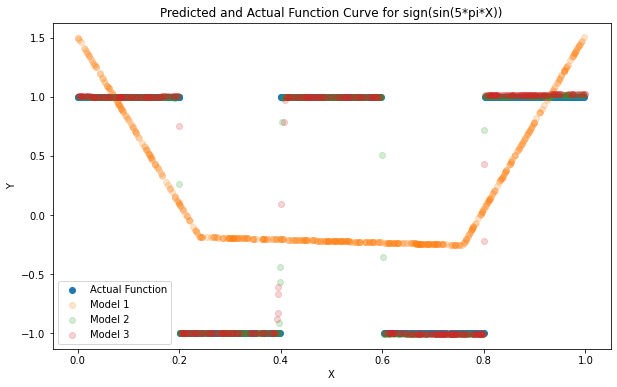

In [28]:
import matplotlib.pyplot as plt

plt_1 = plt.figure(figsize=(10, 6))

plt.title("Predicted and Actual Function Curve for sign(sin(5*pi*X))")

plt.scatter(ac_x_1[0].flatten(), ac_y_1[0].flatten(), label='Actual Function')
plt.scatter(ac_x_1[0].flatten(), p_y_1[0].flatten(), label="Model 1", alpha=0.2)
plt.scatter(ac_x_2[0].flatten(), p_y_2[0].flatten(), label="Model 2", alpha=0.2)
plt.scatter(ac_x_3[0].flatten(), p_y_3[0].flatten(), label="Model 3", alpha=0.2)
# naming the x axis
plt.xlabel('X')
# naming the y axis
plt.ylabel('Y')
 
# giving a title to my graph
plt.legend()
 
# function to show the plot
plt.show()

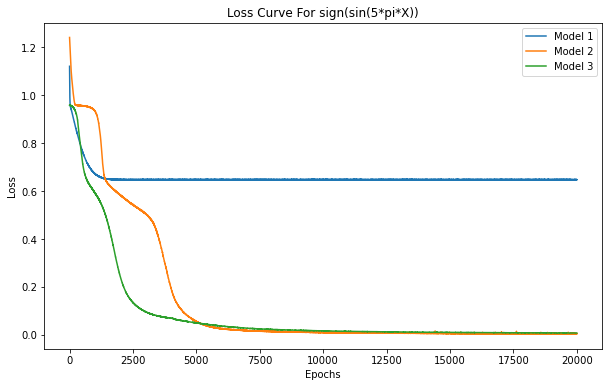

In [21]:
# plotting the points
plt_1 = plt.figure(figsize=(10, 6))
plt.title("Loss Curve For sign(sin(5*pi*X))")
plt.plot(np.array(t_ls_1), label="Model 1")
plt.plot(np.array(t_ls_2), label="Model 2")
plt.plot(np.array(t_ls_3), label="Model 3")
 
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Loss')

plt.legend()
 
plt.show()